In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier 
from IPython.display import Image  
from sklearn.tree import export_graphviz

from scipy import stats
import pydotplus
import pydot
import itertools as itr
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [44]:
print("Question 1")

givenItems=[0.1811,0.0775,0.1279,0.0045, 0.0001,0.9457,0.0021,0,0.0005,0.7305,0.8936]


print(givenItems)

LowerQuartile=np.percentile(givenItems,25)

UpperQuartile=np.percentile(givenItems,75)

InterQuartile=UpperQuartile-LowerQuartile


print("LowerQuartile: ",LowerQuartile)
print("UpperQuartile: ",UpperQuartile)
print("InterQuartile: ",InterQuartile)


Question 1
[0.1811, 0.0775, 0.1279, 0.0045, 0.0001, 0.9457, 0.0021, 0, 0.0005, 0.7305, 0.8936]
LowerQuartile:  0.0013
UpperQuartile:  0.45580000000000004
InterQuartile:  0.4545


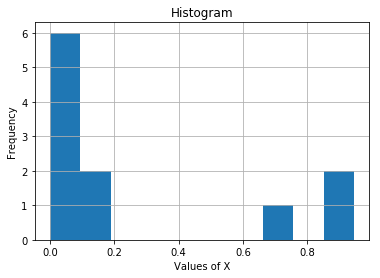

In [45]:
plt.hist(givenItems)
plt.title("Histogram")
plt.xlabel("Values of X")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [46]:
print("Question 2 Theoritically")


claim_data=np.array([['0', 6815,2254], ['1', 492,312],['2', 212,139],['3+', 37,41]])



claim_DataFrame=pd.DataFrame(data=claim_data,columns=['Number of Children Driving','No','Yes'])

print(claim_DataFrame)


claim_DataFrame=claim_DataFrame.set_index('Number of Children Driving')

print(claim_DataFrame)


Question 2 Theoritically
  Number of Children Driving    No   Yes
0                          0  6815  2254
1                          1   492   312
2                          2   212   139
3                         3+    37    41
                              No   Yes
Number of Children Driving            
0                           6815  2254
1                            492   312
2                            212   139
3+                            37    41


In [47]:
print("Question 2 Theoritically")
claim_DataFrame['No']=claim_DataFrame['No'].astype(int)

claim_DataFrame['Yes']=claim_DataFrame['Yes'].astype(int)

print(claim_DataFrame)


# total=claim_DataFrame.sum(axis=0)

# print(total)


Question 2 Theoritically
                              No   Yes
Number of Children Driving            
0                           6815  2254
1                            492   312
2                            212   139
3+                            37    41


In [48]:
print("Question 2 Theoritically")

claim_DataFrame["Total"] = claim_DataFrame["No"] + claim_DataFrame["Yes"]
claim_DataFrame.head()

Question 2 Theoritically


No   Yes  Total
Number of Children Driving                   
0                           6815  2254   9069
1                            492   312    804
2                            212   139    351
3+                            37    41     78

In [49]:
# claim_DataFrame = claim_DataFrame.drop('total', 1)
print("Question 2 Theoritically")
total=claim_DataFrame.sum(axis=0)

# print(total)


newclaim_DataFrame = claim_DataFrame.append({'No' : total['No'] , 'Yes' :total['Yes'],
                                             'Total' :total['Total']} , ignore_index=True)

print(newclaim_DataFrame)

Question 2 Theoritically
     No   Yes  Total
0  6815  2254   9069
1   492   312    804
2   212   139    351
3    37    41     78
4  7556  2746  10302


In [50]:
print("Question 2")

expectedCount_0_No=((newclaim_DataFrame['No'][4])*(newclaim_DataFrame['Total'][0]))/newclaim_DataFrame['Total'][4]
print(expectedCount_0_No)

expectedCount_0_Yes=((newclaim_DataFrame['Yes'][4])*(newclaim_DataFrame['Total'][0]))/newclaim_DataFrame['Total'][4]
print(expectedCount_0_Yes)


expectedCount_1_No=((newclaim_DataFrame['No'][4])*(newclaim_DataFrame['Total'][1]))/newclaim_DataFrame['Total'][4]
print(expectedCount_1_No)

expectedCount_1_Yes=((newclaim_DataFrame['Yes'][4])*(newclaim_DataFrame['Total'][1]))/newclaim_DataFrame['Total'][4]
print(expectedCount_1_Yes)

expectedCount_2_No=((newclaim_DataFrame['No'][4])*(newclaim_DataFrame['Total'][2]))/newclaim_DataFrame['Total'][4]
print(expectedCount_2_No)

expectedCount_2_Yes=((newclaim_DataFrame['Yes'][4])*(newclaim_DataFrame['Total'][2]))/newclaim_DataFrame['Total'][4]
print(expectedCount_2_Yes)


expectedCount_3_No=((newclaim_DataFrame['No'][4])*(newclaim_DataFrame['Total'][3]))/newclaim_DataFrame['Total'][4]
print(expectedCount_3_No)

expectedCount_3_Yes=((newclaim_DataFrame['Yes'][4])*(newclaim_DataFrame['Total'][3]))/newclaim_DataFrame['Total'][4]
print(expectedCount_3_Yes)




Question 2
6651.656377402446
2417.343622597554
589.693651718113
214.306348281887
257.44088526499706
93.55911473500291
57.2090856144438
20.790914385556203


In [51]:
print("Question 2 Theoritically")
chi_squared=0

chi_squared=((newclaim_DataFrame['No'][0]-expectedCount_0_No)**2)/expectedCount_0_No

chi_squared +=((newclaim_DataFrame['Yes'][0]-expectedCount_0_Yes)**2)/expectedCount_0_Yes
chi_squared +=((newclaim_DataFrame['No'][1]-expectedCount_1_No)**2)/expectedCount_1_No
chi_squared +=((newclaim_DataFrame['Yes'][1]-expectedCount_1_Yes)**2)/expectedCount_1_Yes
chi_squared +=((newclaim_DataFrame['No'][2]-expectedCount_2_No)**2)/expectedCount_2_No
chi_squared +=((newclaim_DataFrame['Yes'][2]-expectedCount_2_Yes)**2)/expectedCount_2_Yes
chi_squared +=((newclaim_DataFrame['No'][3]-expectedCount_3_No)**2)/expectedCount_3_No
chi_squared +=((newclaim_DataFrame['Yes'][3]-expectedCount_3_Yes)**2)/expectedCount_3_Yes
              
              
print("Chi Squared Statistic is: ",chi_squared)


Question 2 Theoritically
Chi Squared Statistic is:  132.64137110246577


In [65]:
print("Question 2")

observed=[[6815,2254],[492,312],[212,139],[37,41]]

chi2,p,dof,expected=stats.chi2_contingency(observed)

msg="Chi Squared Test Statistics: {}\np-value: {}\nDegrees of Freedom: {}\n"

print(msg.format(round(chi2,4),p,dof))

print("Expected Count contingency Table:\n",expected)

Question 2
Chi Squared Test Statistics: 132.6414
p-value: 1.4581753275490453e-28
Degrees of Freedom: 3

Expected Count contingency Table:
 [[6651.6563774  2417.3436226 ]
 [ 589.69365172  214.30634828]
 [ 257.44088526   93.55911474]
 [  57.20908561   20.79091439]]


In [53]:
print("Question 3")
nodeEntropy = 0  #Initialize Entropy

targetVariable_Cat_1=64

targetVariable_Cat_2=250

targetVariable_Cat_3=364

targetVariable_Cat_4=259

targetVariable_Cat_5=63


# total=targetVariable_Cat_1+targetVariable_Cat_2+targetVariable_Cat_3+targetVariable_Cat_4+targetVariable_Cat_5

targetVariables=[targetVariable_Cat_1,targetVariable_Cat_2,targetVariable_Cat_3,targetVariable_Cat_4,targetVariable_Cat_5]

total=np.sum(targetVariables)

for targetVariable in targetVariables:
    pij = targetVariable/total
    nodeEntropy += -pij*np.log2(pij)
    
print("Total: ",total)
print("Root Node Entropy is: ",nodeEntropy)
print("Root Node Entropy is: ",round(nodeEntropy,4))


Question 3
Total:  1000
Root Node Entropy is:  2.040578982772928
Root Node Entropy is:  2.0406


In [54]:
print("Question 3")

classif_Data=np.array([['I', 64], ['II',250],['III',364],['IV',259],['V',63]])

classif_DataFrame=pd.DataFrame(data=classif_Data,columns=[['Target Category','Frequency']])

print(classif_DataFrame)

Question 3
  Target Category Frequency
0               I        64
1              II       250
2             III       364
3              IV       259
4               V        63


Question 3 Classification tree


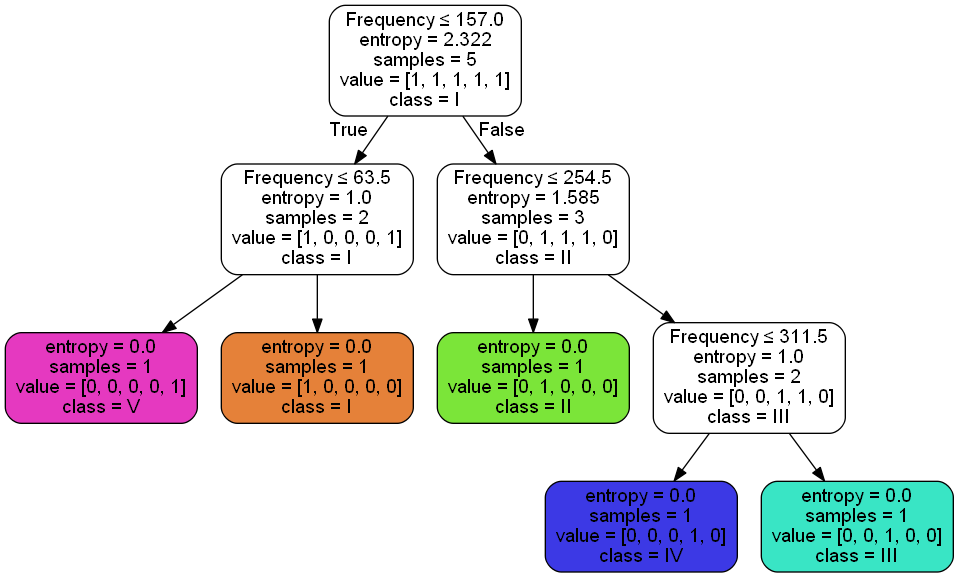

In [55]:
print("Question 3 Classification tree")

X_train=classif_DataFrame[['Frequency']]

y_train=classif_DataFrame[['Target Category']]


clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X_train,y_train)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Frequency'],
                class_names=classif_DataFrame['Target Category'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\classification_entropy.png')

Image(graph.create_png())

# print(graph)

# print(Image(graph.create_png()))


In [56]:
print("Question 4")

nodeGini=0

for targetVariable in targetVariables:
    pij = targetVariable/total
    nodeGini += -pij
    
print("Total: ",total)
print("Root Node Gini Index is: ",1-nodeGini)
print("Root Node Gini Index is: ",round(1-nodeGini,4))

Question 4
Total:  1000
Root Node Gini Index is:  2.0
Root Node Gini Index is:  2.0


Question 4 Classification Tree


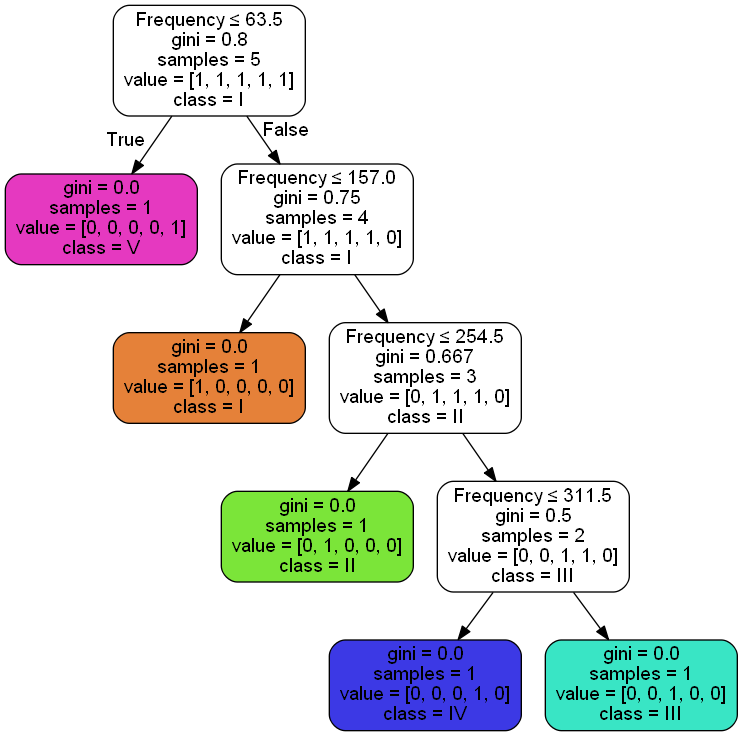

In [57]:
print("Question 4 Classification Tree")

clf = DecisionTreeClassifier(criterion="gini")

clf = clf.fit(X_train,y_train)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Frequency'],
                class_names=classif_DataFrame['Target Category'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Mid-Term\classification_gini.png')

Image(graph.create_png())

In [58]:
print("Question 5")



Question 5


In [66]:
print("Question 6")

logit_model=np.array([['I', 64], ['II',250],['III',364],['IV',259],['V',63]])

logit_model_DataFrame=pd.DataFrame(data=logit_model,columns=[['Target Category','Frequency']])

# logit_model_Data=logit_model

logit_model_DataFrame['Frequency']=logit_model_DataFrame['Frequency'].astype(int)

print(logit_model_DataFrame)



Question 6
  Target Category  Frequency
0               I         64
1              II        250
2             III        364
3              IV        259
4               V         63


In [73]:
print("Question 6")

totalObservation=sum(logit_model_DataFrame['Frequency'])

print("Total Observations: ",totalCount)


prob_I=logit_model_DataFrame['Frequency'][0]/totalObservation

prob_II=logit_model_DataFrame['Frequency'][1]/totalObservation

prob_III=logit_model_DataFrame['Frequency'][2]/totalObservation

prob_IV=logit_model_DataFrame['Frequency'][3]/totalObservation

prob_V=logit_model_DataFrame['Frequency'][4]/totalObservation

Intercept=np.array([np.log(prob_I/prob_III),np.log(prob_II/prob_III),np.log(prob_III/prob_III),np.log(prob_IV/prob_III),np.log(prob_V/prob_III)])


print(Intercept)


Question 6
Total Observations:  1000
[-1.73827078 -0.37569295  0.         -0.34032581 -1.75401914]


In [82]:
print("Question 7")

pred_prob=np.array([['Event', 0.8], ['Non-Event',0.5],['Non-Event',0.4],
                    ['Event',0.6],['Event',0.4],['Non-Event',0.7],['Event',0.0],
                    ['Non-Event',0.5],['Event',0.7],['Event',0.6]])

pred_probDataFrame=pd.DataFrame(data=pred_prob,columns=[['Observed Target Value','Predicted Event Probability']])


print("Original Table: \n",pred_probDataFrame)


Question 7
Original Table: 
   Observed Target Value Predicted Event Probability
0                 Event                         0.8
1             Non-Event                         0.5
2             Non-Event                         0.4
3                 Event                         0.6
4                 Event                         0.4
5             Non-Event                         0.7
6                 Event                         0.0
7             Non-Event                         0.5
8                 Event                         0.7
9                 Event                         0.6


In [88]:
print("Question 7")

newpred_probDataFrame=pred_probDataFrame.sort_values(by=['Observed Target Value','Predicted Event Probability'])

# newpred_probDataFrame=newpred_probDataFrame.set_index()
print("Sorted Table :\n",newpred_probDataFrame)

Question 7
Sorted Table :
   Observed Target Value Predicted Event Probability
6                 Event                         0.0
4                 Event                         0.4
3                 Event                         0.6
9                 Event                         0.6
8                 Event                         0.7
0                 Event                         0.8
2             Non-Event                         0.4
1             Non-Event                         0.5
7             Non-Event                         0.5
5             Non-Event                         0.7


In [90]:
print("Question 7")

AUC=0.5+0.5*(13-9)/24


print("Area Under Curve: ",round(AUC,4))

Question 7
Area Under Curve:  0.5833


In [97]:
print("Question 8")

NoOfObservations=len(newpred_probDataFrame)

print("No Of Observations: ",NoOfObservations)

Observed_proportion_of_Event=6/10

print("Observed proportion of Event: ",Observed_proportion_of_Event)

MissclassifiedObservation=5

print("MissclassifiedObservation: ",MissclassifiedObservation)

MissclassificationRate=(MissclassifiedObservation/NoOfObservations)*100

print("Miscalssification Rate is: ",MissclassificationRate)

Question 8
No Of Observations:  10
Observed proportion of Event:  0.6
MissclassifiedObservation:  5
Miscalssification Rate is:  50.0


In [106]:
print("Question 9")

print("All the possible itemsets: \n")

nogivenItems=list(range(1, 51))

print(nogivenItems)

# j=4
# while j<=len(nogivenItems):
    
comb=itr.combinations(nogivenItems,4)

countComb=[]

for i in comb:
    countComb.append(i)
    print(countComb.index(i)+1,i)
#     j=j+1
print("value of itemset: ",countComb.index(i)+1)


# print(comb)

Question 9
All the possible itemsets: 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
1 (1, 2, 3, 4)
2 (1, 2, 3, 5)
3 (1, 2, 3, 6)
4 (1, 2, 3, 7)
5 (1, 2, 3, 8)
6 (1, 2, 3, 9)
7 (1, 2, 3, 10)
8 (1, 2, 3, 11)
9 (1, 2, 3, 12)
10 (1, 2, 3, 13)
11 (1, 2, 3, 14)
12 (1, 2, 3, 15)
13 (1, 2, 3, 16)
14 (1, 2, 3, 17)
15 (1, 2, 3, 18)
16 (1, 2, 3, 19)
17 (1, 2, 3, 20)
18 (1, 2, 3, 21)
19 (1, 2, 3, 22)
20 (1, 2, 3, 23)
21 (1, 2, 3, 24)
22 (1, 2, 3, 25)
23 (1, 2, 3, 26)
24 (1, 2, 3, 27)
25 (1, 2, 3, 28)
26 (1, 2, 3, 29)
27 (1, 2, 3, 30)
28 (1, 2, 3, 31)
29 (1, 2, 3, 32)
30 (1, 2, 3, 33)
31 (1, 2, 3, 34)
32 (1, 2, 3, 35)
33 (1, 2, 3, 36)
34 (1, 2, 3, 37)
35 (1, 2, 3, 38)
36 (1, 2, 3, 39)
37 (1, 2, 3, 40)
38 (1, 2, 3, 41)
39 (1, 2, 3, 42)
40 (1, 2, 3, 43)
41 (1, 2, 3, 44)
42 (1, 2, 3, 45)
43 (1, 2, 3, 46)
44 (1, 2, 3, 47)
45 (1, 2, 3, 48)
46 (1, 2, 3, 49)
4

764 (1, 2, 23, 37)
765 (1, 2, 23, 38)
766 (1, 2, 23, 39)
767 (1, 2, 23, 40)
768 (1, 2, 23, 41)
769 (1, 2, 23, 42)
770 (1, 2, 23, 43)
771 (1, 2, 23, 44)
772 (1, 2, 23, 45)
773 (1, 2, 23, 46)
774 (1, 2, 23, 47)
775 (1, 2, 23, 48)
776 (1, 2, 23, 49)
777 (1, 2, 23, 50)
778 (1, 2, 24, 25)
779 (1, 2, 24, 26)
780 (1, 2, 24, 27)
781 (1, 2, 24, 28)
782 (1, 2, 24, 29)
783 (1, 2, 24, 30)
784 (1, 2, 24, 31)
785 (1, 2, 24, 32)
786 (1, 2, 24, 33)
787 (1, 2, 24, 34)
788 (1, 2, 24, 35)
789 (1, 2, 24, 36)
790 (1, 2, 24, 37)
791 (1, 2, 24, 38)
792 (1, 2, 24, 39)
793 (1, 2, 24, 40)
794 (1, 2, 24, 41)
795 (1, 2, 24, 42)
796 (1, 2, 24, 43)
797 (1, 2, 24, 44)
798 (1, 2, 24, 45)
799 (1, 2, 24, 46)
800 (1, 2, 24, 47)
801 (1, 2, 24, 48)
802 (1, 2, 24, 49)
803 (1, 2, 24, 50)
804 (1, 2, 25, 26)
805 (1, 2, 25, 27)
806 (1, 2, 25, 28)
807 (1, 2, 25, 29)
808 (1, 2, 25, 30)
809 (1, 2, 25, 31)
810 (1, 2, 25, 32)
811 (1, 2, 25, 33)
812 (1, 2, 25, 34)
813 (1, 2, 25, 35)
814 (1, 2, 25, 36)
815 (1, 2, 25, 37)
816 (1, 2, 2

1984 (1, 3, 29, 35)
1985 (1, 3, 29, 36)
1986 (1, 3, 29, 37)
1987 (1, 3, 29, 38)
1988 (1, 3, 29, 39)
1989 (1, 3, 29, 40)
1990 (1, 3, 29, 41)
1991 (1, 3, 29, 42)
1992 (1, 3, 29, 43)
1993 (1, 3, 29, 44)
1994 (1, 3, 29, 45)
1995 (1, 3, 29, 46)
1996 (1, 3, 29, 47)
1997 (1, 3, 29, 48)
1998 (1, 3, 29, 49)
1999 (1, 3, 29, 50)
2000 (1, 3, 30, 31)
2001 (1, 3, 30, 32)
2002 (1, 3, 30, 33)
2003 (1, 3, 30, 34)
2004 (1, 3, 30, 35)
2005 (1, 3, 30, 36)
2006 (1, 3, 30, 37)
2007 (1, 3, 30, 38)
2008 (1, 3, 30, 39)
2009 (1, 3, 30, 40)
2010 (1, 3, 30, 41)
2011 (1, 3, 30, 42)
2012 (1, 3, 30, 43)
2013 (1, 3, 30, 44)
2014 (1, 3, 30, 45)
2015 (1, 3, 30, 46)
2016 (1, 3, 30, 47)
2017 (1, 3, 30, 48)
2018 (1, 3, 30, 49)
2019 (1, 3, 30, 50)
2020 (1, 3, 31, 32)
2021 (1, 3, 31, 33)
2022 (1, 3, 31, 34)
2023 (1, 3, 31, 35)
2024 (1, 3, 31, 36)
2025 (1, 3, 31, 37)
2026 (1, 3, 31, 38)
2027 (1, 3, 31, 39)
2028 (1, 3, 31, 40)
2029 (1, 3, 31, 41)
2030 (1, 3, 31, 42)
2031 (1, 3, 31, 43)
2032 (1, 3, 31, 44)
2033 (1, 3, 31, 45)


3194 (1, 4, 40, 45)
3195 (1, 4, 40, 46)
3196 (1, 4, 40, 47)
3197 (1, 4, 40, 48)
3198 (1, 4, 40, 49)
3199 (1, 4, 40, 50)
3200 (1, 4, 41, 42)
3201 (1, 4, 41, 43)
3202 (1, 4, 41, 44)
3203 (1, 4, 41, 45)
3204 (1, 4, 41, 46)
3205 (1, 4, 41, 47)
3206 (1, 4, 41, 48)
3207 (1, 4, 41, 49)
3208 (1, 4, 41, 50)
3209 (1, 4, 42, 43)
3210 (1, 4, 42, 44)
3211 (1, 4, 42, 45)
3212 (1, 4, 42, 46)
3213 (1, 4, 42, 47)
3214 (1, 4, 42, 48)
3215 (1, 4, 42, 49)
3216 (1, 4, 42, 50)
3217 (1, 4, 43, 44)
3218 (1, 4, 43, 45)
3219 (1, 4, 43, 46)
3220 (1, 4, 43, 47)
3221 (1, 4, 43, 48)
3222 (1, 4, 43, 49)
3223 (1, 4, 43, 50)
3224 (1, 4, 44, 45)
3225 (1, 4, 44, 46)
3226 (1, 4, 44, 47)
3227 (1, 4, 44, 48)
3228 (1, 4, 44, 49)
3229 (1, 4, 44, 50)
3230 (1, 4, 45, 46)
3231 (1, 4, 45, 47)
3232 (1, 4, 45, 48)
3233 (1, 4, 45, 49)
3234 (1, 4, 45, 50)
3235 (1, 4, 46, 47)
3236 (1, 4, 46, 48)
3237 (1, 4, 46, 49)
3238 (1, 4, 46, 50)
3239 (1, 4, 47, 48)
3240 (1, 4, 47, 49)
3241 (1, 4, 47, 50)
3242 (1, 4, 48, 49)
3243 (1, 4, 48, 50)


3962 (1, 5, 27, 31)
3963 (1, 5, 27, 32)
3964 (1, 5, 27, 33)
3965 (1, 5, 27, 34)
3966 (1, 5, 27, 35)
3967 (1, 5, 27, 36)
3968 (1, 5, 27, 37)
3969 (1, 5, 27, 38)
3970 (1, 5, 27, 39)
3971 (1, 5, 27, 40)
3972 (1, 5, 27, 41)
3973 (1, 5, 27, 42)
3974 (1, 5, 27, 43)
3975 (1, 5, 27, 44)
3976 (1, 5, 27, 45)
3977 (1, 5, 27, 46)
3978 (1, 5, 27, 47)
3979 (1, 5, 27, 48)
3980 (1, 5, 27, 49)
3981 (1, 5, 27, 50)
3982 (1, 5, 28, 29)
3983 (1, 5, 28, 30)
3984 (1, 5, 28, 31)
3985 (1, 5, 28, 32)
3986 (1, 5, 28, 33)
3987 (1, 5, 28, 34)
3988 (1, 5, 28, 35)
3989 (1, 5, 28, 36)
3990 (1, 5, 28, 37)
3991 (1, 5, 28, 38)
3992 (1, 5, 28, 39)
3993 (1, 5, 28, 40)
3994 (1, 5, 28, 41)
3995 (1, 5, 28, 42)
3996 (1, 5, 28, 43)
3997 (1, 5, 28, 44)
3998 (1, 5, 28, 45)
3999 (1, 5, 28, 46)
4000 (1, 5, 28, 47)
4001 (1, 5, 28, 48)
4002 (1, 5, 28, 49)
4003 (1, 5, 28, 50)
4004 (1, 5, 29, 30)
4005 (1, 5, 29, 31)
4006 (1, 5, 29, 32)
4007 (1, 5, 29, 33)
4008 (1, 5, 29, 34)
4009 (1, 5, 29, 35)
4010 (1, 5, 29, 36)
4011 (1, 5, 29, 37)


4871 (1, 6, 25, 41)
4872 (1, 6, 25, 42)
4873 (1, 6, 25, 43)
4874 (1, 6, 25, 44)
4875 (1, 6, 25, 45)
4876 (1, 6, 25, 46)
4877 (1, 6, 25, 47)
4878 (1, 6, 25, 48)
4879 (1, 6, 25, 49)
4880 (1, 6, 25, 50)
4881 (1, 6, 26, 27)
4882 (1, 6, 26, 28)
4883 (1, 6, 26, 29)
4884 (1, 6, 26, 30)
4885 (1, 6, 26, 31)
4886 (1, 6, 26, 32)
4887 (1, 6, 26, 33)
4888 (1, 6, 26, 34)
4889 (1, 6, 26, 35)
4890 (1, 6, 26, 36)
4891 (1, 6, 26, 37)
4892 (1, 6, 26, 38)
4893 (1, 6, 26, 39)
4894 (1, 6, 26, 40)
4895 (1, 6, 26, 41)
4896 (1, 6, 26, 42)
4897 (1, 6, 26, 43)
4898 (1, 6, 26, 44)
4899 (1, 6, 26, 45)
4900 (1, 6, 26, 46)
4901 (1, 6, 26, 47)
4902 (1, 6, 26, 48)
4903 (1, 6, 26, 49)
4904 (1, 6, 26, 50)
4905 (1, 6, 27, 28)
4906 (1, 6, 27, 29)
4907 (1, 6, 27, 30)
4908 (1, 6, 27, 31)
4909 (1, 6, 27, 32)
4910 (1, 6, 27, 33)
4911 (1, 6, 27, 34)
4912 (1, 6, 27, 35)
4913 (1, 6, 27, 36)
4914 (1, 6, 27, 37)
4915 (1, 6, 27, 38)
4916 (1, 6, 27, 39)
4917 (1, 6, 27, 40)
4918 (1, 6, 27, 41)
4919 (1, 6, 27, 42)
4920 (1, 6, 27, 43)


5717 (1, 7, 23, 35)
5718 (1, 7, 23, 36)
5719 (1, 7, 23, 37)
5720 (1, 7, 23, 38)
5721 (1, 7, 23, 39)
5722 (1, 7, 23, 40)
5723 (1, 7, 23, 41)
5724 (1, 7, 23, 42)
5725 (1, 7, 23, 43)
5726 (1, 7, 23, 44)
5727 (1, 7, 23, 45)
5728 (1, 7, 23, 46)
5729 (1, 7, 23, 47)
5730 (1, 7, 23, 48)
5731 (1, 7, 23, 49)
5732 (1, 7, 23, 50)
5733 (1, 7, 24, 25)
5734 (1, 7, 24, 26)
5735 (1, 7, 24, 27)
5736 (1, 7, 24, 28)
5737 (1, 7, 24, 29)
5738 (1, 7, 24, 30)
5739 (1, 7, 24, 31)
5740 (1, 7, 24, 32)
5741 (1, 7, 24, 33)
5742 (1, 7, 24, 34)
5743 (1, 7, 24, 35)
5744 (1, 7, 24, 36)
5745 (1, 7, 24, 37)
5746 (1, 7, 24, 38)
5747 (1, 7, 24, 39)
5748 (1, 7, 24, 40)
5749 (1, 7, 24, 41)
5750 (1, 7, 24, 42)
5751 (1, 7, 24, 43)
5752 (1, 7, 24, 44)
5753 (1, 7, 24, 45)
5754 (1, 7, 24, 46)
5755 (1, 7, 24, 47)
5756 (1, 7, 24, 48)
5757 (1, 7, 24, 49)
5758 (1, 7, 24, 50)
5759 (1, 7, 25, 26)
5760 (1, 7, 25, 27)
5761 (1, 7, 25, 28)
5762 (1, 7, 25, 29)
5763 (1, 7, 25, 30)
5764 (1, 7, 25, 31)
5765 (1, 7, 25, 32)
5766 (1, 7, 25, 33)


6473 (1, 8, 19, 44)
6474 (1, 8, 19, 45)
6475 (1, 8, 19, 46)
6476 (1, 8, 19, 47)
6477 (1, 8, 19, 48)
6478 (1, 8, 19, 49)
6479 (1, 8, 19, 50)
6480 (1, 8, 20, 21)
6481 (1, 8, 20, 22)
6482 (1, 8, 20, 23)
6483 (1, 8, 20, 24)
6484 (1, 8, 20, 25)
6485 (1, 8, 20, 26)
6486 (1, 8, 20, 27)
6487 (1, 8, 20, 28)
6488 (1, 8, 20, 29)
6489 (1, 8, 20, 30)
6490 (1, 8, 20, 31)
6491 (1, 8, 20, 32)
6492 (1, 8, 20, 33)
6493 (1, 8, 20, 34)
6494 (1, 8, 20, 35)
6495 (1, 8, 20, 36)
6496 (1, 8, 20, 37)
6497 (1, 8, 20, 38)
6498 (1, 8, 20, 39)
6499 (1, 8, 20, 40)
6500 (1, 8, 20, 41)
6501 (1, 8, 20, 42)
6502 (1, 8, 20, 43)
6503 (1, 8, 20, 44)
6504 (1, 8, 20, 45)
6505 (1, 8, 20, 46)
6506 (1, 8, 20, 47)
6507 (1, 8, 20, 48)
6508 (1, 8, 20, 49)
6509 (1, 8, 20, 50)
6510 (1, 8, 21, 22)
6511 (1, 8, 21, 23)
6512 (1, 8, 21, 24)
6513 (1, 8, 21, 25)
6514 (1, 8, 21, 26)
6515 (1, 8, 21, 27)
6516 (1, 8, 21, 28)
6517 (1, 8, 21, 29)
6518 (1, 8, 21, 30)
6519 (1, 8, 21, 31)
6520 (1, 8, 21, 32)
6521 (1, 8, 21, 33)
6522 (1, 8, 21, 34)


7463 (1, 9, 25, 49)
7464 (1, 9, 25, 50)
7465 (1, 9, 26, 27)
7466 (1, 9, 26, 28)
7467 (1, 9, 26, 29)
7468 (1, 9, 26, 30)
7469 (1, 9, 26, 31)
7470 (1, 9, 26, 32)
7471 (1, 9, 26, 33)
7472 (1, 9, 26, 34)
7473 (1, 9, 26, 35)
7474 (1, 9, 26, 36)
7475 (1, 9, 26, 37)
7476 (1, 9, 26, 38)
7477 (1, 9, 26, 39)
7478 (1, 9, 26, 40)
7479 (1, 9, 26, 41)
7480 (1, 9, 26, 42)
7481 (1, 9, 26, 43)
7482 (1, 9, 26, 44)
7483 (1, 9, 26, 45)
7484 (1, 9, 26, 46)
7485 (1, 9, 26, 47)
7486 (1, 9, 26, 48)
7487 (1, 9, 26, 49)
7488 (1, 9, 26, 50)
7489 (1, 9, 27, 28)
7490 (1, 9, 27, 29)
7491 (1, 9, 27, 30)
7492 (1, 9, 27, 31)
7493 (1, 9, 27, 32)
7494 (1, 9, 27, 33)
7495 (1, 9, 27, 34)
7496 (1, 9, 27, 35)
7497 (1, 9, 27, 36)
7498 (1, 9, 27, 37)
7499 (1, 9, 27, 38)
7500 (1, 9, 27, 39)
7501 (1, 9, 27, 40)
7502 (1, 9, 27, 41)
7503 (1, 9, 27, 42)
7504 (1, 9, 27, 43)
7505 (1, 9, 27, 44)
7506 (1, 9, 27, 45)
7507 (1, 9, 27, 46)
7508 (1, 9, 27, 47)
7509 (1, 9, 27, 48)
7510 (1, 9, 27, 49)
7511 (1, 9, 27, 50)
7512 (1, 9, 28, 29)


8274 (1, 10, 27, 33)
8275 (1, 10, 27, 34)
8276 (1, 10, 27, 35)
8277 (1, 10, 27, 36)
8278 (1, 10, 27, 37)
8279 (1, 10, 27, 38)
8280 (1, 10, 27, 39)
8281 (1, 10, 27, 40)
8282 (1, 10, 27, 41)
8283 (1, 10, 27, 42)
8284 (1, 10, 27, 43)
8285 (1, 10, 27, 44)
8286 (1, 10, 27, 45)
8287 (1, 10, 27, 46)
8288 (1, 10, 27, 47)
8289 (1, 10, 27, 48)
8290 (1, 10, 27, 49)
8291 (1, 10, 27, 50)
8292 (1, 10, 28, 29)
8293 (1, 10, 28, 30)
8294 (1, 10, 28, 31)
8295 (1, 10, 28, 32)
8296 (1, 10, 28, 33)
8297 (1, 10, 28, 34)
8298 (1, 10, 28, 35)
8299 (1, 10, 28, 36)
8300 (1, 10, 28, 37)
8301 (1, 10, 28, 38)
8302 (1, 10, 28, 39)
8303 (1, 10, 28, 40)
8304 (1, 10, 28, 41)
8305 (1, 10, 28, 42)
8306 (1, 10, 28, 43)
8307 (1, 10, 28, 44)
8308 (1, 10, 28, 45)
8309 (1, 10, 28, 46)
8310 (1, 10, 28, 47)
8311 (1, 10, 28, 48)
8312 (1, 10, 28, 49)
8313 (1, 10, 28, 50)
8314 (1, 10, 29, 30)
8315 (1, 10, 29, 31)
8316 (1, 10, 29, 32)
8317 (1, 10, 29, 33)
8318 (1, 10, 29, 34)
8319 (1, 10, 29, 35)
8320 (1, 10, 29, 36)
8321 (1, 10, 

9185 (1, 11, 36, 41)
9186 (1, 11, 36, 42)
9187 (1, 11, 36, 43)
9188 (1, 11, 36, 44)
9189 (1, 11, 36, 45)
9190 (1, 11, 36, 46)
9191 (1, 11, 36, 47)
9192 (1, 11, 36, 48)
9193 (1, 11, 36, 49)
9194 (1, 11, 36, 50)
9195 (1, 11, 37, 38)
9196 (1, 11, 37, 39)
9197 (1, 11, 37, 40)
9198 (1, 11, 37, 41)
9199 (1, 11, 37, 42)
9200 (1, 11, 37, 43)
9201 (1, 11, 37, 44)
9202 (1, 11, 37, 45)
9203 (1, 11, 37, 46)
9204 (1, 11, 37, 47)
9205 (1, 11, 37, 48)
9206 (1, 11, 37, 49)
9207 (1, 11, 37, 50)
9208 (1, 11, 38, 39)
9209 (1, 11, 38, 40)
9210 (1, 11, 38, 41)
9211 (1, 11, 38, 42)
9212 (1, 11, 38, 43)
9213 (1, 11, 38, 44)
9214 (1, 11, 38, 45)
9215 (1, 11, 38, 46)
9216 (1, 11, 38, 47)
9217 (1, 11, 38, 48)
9218 (1, 11, 38, 49)
9219 (1, 11, 38, 50)
9220 (1, 11, 39, 40)
9221 (1, 11, 39, 41)
9222 (1, 11, 39, 42)
9223 (1, 11, 39, 43)
9224 (1, 11, 39, 44)
9225 (1, 11, 39, 45)
9226 (1, 11, 39, 46)
9227 (1, 11, 39, 47)
9228 (1, 11, 39, 48)
9229 (1, 11, 39, 49)
9230 (1, 11, 39, 50)
9231 (1, 11, 40, 41)
9232 (1, 11, 

9827 (1, 12, 32, 42)
9828 (1, 12, 32, 43)
9829 (1, 12, 32, 44)
9830 (1, 12, 32, 45)
9831 (1, 12, 32, 46)
9832 (1, 12, 32, 47)
9833 (1, 12, 32, 48)
9834 (1, 12, 32, 49)
9835 (1, 12, 32, 50)
9836 (1, 12, 33, 34)
9837 (1, 12, 33, 35)
9838 (1, 12, 33, 36)
9839 (1, 12, 33, 37)
9840 (1, 12, 33, 38)
9841 (1, 12, 33, 39)
9842 (1, 12, 33, 40)
9843 (1, 12, 33, 41)
9844 (1, 12, 33, 42)
9845 (1, 12, 33, 43)
9846 (1, 12, 33, 44)
9847 (1, 12, 33, 45)
9848 (1, 12, 33, 46)
9849 (1, 12, 33, 47)
9850 (1, 12, 33, 48)
9851 (1, 12, 33, 49)
9852 (1, 12, 33, 50)
9853 (1, 12, 34, 35)
9854 (1, 12, 34, 36)
9855 (1, 12, 34, 37)
9856 (1, 12, 34, 38)
9857 (1, 12, 34, 39)
9858 (1, 12, 34, 40)
9859 (1, 12, 34, 41)
9860 (1, 12, 34, 42)
9861 (1, 12, 34, 43)
9862 (1, 12, 34, 44)
9863 (1, 12, 34, 45)
9864 (1, 12, 34, 46)
9865 (1, 12, 34, 47)
9866 (1, 12, 34, 48)
9867 (1, 12, 34, 49)
9868 (1, 12, 34, 50)
9869 (1, 12, 35, 36)
9870 (1, 12, 35, 37)
9871 (1, 12, 35, 38)
9872 (1, 12, 35, 39)
9873 (1, 12, 35, 40)
9874 (1, 12, 

10501 (1, 13, 32, 50)
10502 (1, 13, 33, 34)
10503 (1, 13, 33, 35)
10504 (1, 13, 33, 36)
10505 (1, 13, 33, 37)
10506 (1, 13, 33, 38)
10507 (1, 13, 33, 39)
10508 (1, 13, 33, 40)
10509 (1, 13, 33, 41)
10510 (1, 13, 33, 42)
10511 (1, 13, 33, 43)
10512 (1, 13, 33, 44)
10513 (1, 13, 33, 45)
10514 (1, 13, 33, 46)
10515 (1, 13, 33, 47)
10516 (1, 13, 33, 48)
10517 (1, 13, 33, 49)
10518 (1, 13, 33, 50)
10519 (1, 13, 34, 35)
10520 (1, 13, 34, 36)
10521 (1, 13, 34, 37)
10522 (1, 13, 34, 38)
10523 (1, 13, 34, 39)
10524 (1, 13, 34, 40)
10525 (1, 13, 34, 41)
10526 (1, 13, 34, 42)
10527 (1, 13, 34, 43)
10528 (1, 13, 34, 44)
10529 (1, 13, 34, 45)
10530 (1, 13, 34, 46)
10531 (1, 13, 34, 47)
10532 (1, 13, 34, 48)
10533 (1, 13, 34, 49)
10534 (1, 13, 34, 50)
10535 (1, 13, 35, 36)
10536 (1, 13, 35, 37)
10537 (1, 13, 35, 38)
10538 (1, 13, 35, 39)
10539 (1, 13, 35, 40)
10540 (1, 13, 35, 41)
10541 (1, 13, 35, 42)
10542 (1, 13, 35, 43)
10543 (1, 13, 35, 44)
10544 (1, 13, 35, 45)
10545 (1, 13, 35, 46)
10546 (1, 

11217 (1, 14, 38, 49)
11218 (1, 14, 38, 50)
11219 (1, 14, 39, 40)
11220 (1, 14, 39, 41)
11221 (1, 14, 39, 42)
11222 (1, 14, 39, 43)
11223 (1, 14, 39, 44)
11224 (1, 14, 39, 45)
11225 (1, 14, 39, 46)
11226 (1, 14, 39, 47)
11227 (1, 14, 39, 48)
11228 (1, 14, 39, 49)
11229 (1, 14, 39, 50)
11230 (1, 14, 40, 41)
11231 (1, 14, 40, 42)
11232 (1, 14, 40, 43)
11233 (1, 14, 40, 44)
11234 (1, 14, 40, 45)
11235 (1, 14, 40, 46)
11236 (1, 14, 40, 47)
11237 (1, 14, 40, 48)
11238 (1, 14, 40, 49)
11239 (1, 14, 40, 50)
11240 (1, 14, 41, 42)
11241 (1, 14, 41, 43)
11242 (1, 14, 41, 44)
11243 (1, 14, 41, 45)
11244 (1, 14, 41, 46)
11245 (1, 14, 41, 47)
11246 (1, 14, 41, 48)
11247 (1, 14, 41, 49)
11248 (1, 14, 41, 50)
11249 (1, 14, 42, 43)
11250 (1, 14, 42, 44)
11251 (1, 14, 42, 45)
11252 (1, 14, 42, 46)
11253 (1, 14, 42, 47)
11254 (1, 14, 42, 48)
11255 (1, 14, 42, 49)
11256 (1, 14, 42, 50)
11257 (1, 14, 43, 44)
11258 (1, 14, 43, 45)
11259 (1, 14, 43, 46)
11260 (1, 14, 43, 47)
11261 (1, 14, 43, 48)
11262 (1, 

12128 (1, 16, 25, 38)
12129 (1, 16, 25, 39)
12130 (1, 16, 25, 40)
12131 (1, 16, 25, 41)
12132 (1, 16, 25, 42)
12133 (1, 16, 25, 43)
12134 (1, 16, 25, 44)
12135 (1, 16, 25, 45)
12136 (1, 16, 25, 46)
12137 (1, 16, 25, 47)
12138 (1, 16, 25, 48)
12139 (1, 16, 25, 49)
12140 (1, 16, 25, 50)
12141 (1, 16, 26, 27)
12142 (1, 16, 26, 28)
12143 (1, 16, 26, 29)
12144 (1, 16, 26, 30)
12145 (1, 16, 26, 31)
12146 (1, 16, 26, 32)
12147 (1, 16, 26, 33)
12148 (1, 16, 26, 34)
12149 (1, 16, 26, 35)
12150 (1, 16, 26, 36)
12151 (1, 16, 26, 37)
12152 (1, 16, 26, 38)
12153 (1, 16, 26, 39)
12154 (1, 16, 26, 40)
12155 (1, 16, 26, 41)
12156 (1, 16, 26, 42)
12157 (1, 16, 26, 43)
12158 (1, 16, 26, 44)
12159 (1, 16, 26, 45)
12160 (1, 16, 26, 46)
12161 (1, 16, 26, 47)
12162 (1, 16, 26, 48)
12163 (1, 16, 26, 49)
12164 (1, 16, 26, 50)
12165 (1, 16, 27, 28)
12166 (1, 16, 27, 29)
12167 (1, 16, 27, 30)
12168 (1, 16, 27, 31)
12169 (1, 16, 27, 32)
12170 (1, 16, 27, 33)
12171 (1, 16, 27, 34)
12172 (1, 16, 27, 35)
12173 (1, 

12710 (1, 17, 27, 45)
12711 (1, 17, 27, 46)
12712 (1, 17, 27, 47)
12713 (1, 17, 27, 48)
12714 (1, 17, 27, 49)
12715 (1, 17, 27, 50)
12716 (1, 17, 28, 29)
12717 (1, 17, 28, 30)
12718 (1, 17, 28, 31)
12719 (1, 17, 28, 32)
12720 (1, 17, 28, 33)
12721 (1, 17, 28, 34)
12722 (1, 17, 28, 35)
12723 (1, 17, 28, 36)
12724 (1, 17, 28, 37)
12725 (1, 17, 28, 38)
12726 (1, 17, 28, 39)
12727 (1, 17, 28, 40)
12728 (1, 17, 28, 41)
12729 (1, 17, 28, 42)
12730 (1, 17, 28, 43)
12731 (1, 17, 28, 44)
12732 (1, 17, 28, 45)
12733 (1, 17, 28, 46)
12734 (1, 17, 28, 47)
12735 (1, 17, 28, 48)
12736 (1, 17, 28, 49)
12737 (1, 17, 28, 50)
12738 (1, 17, 29, 30)
12739 (1, 17, 29, 31)
12740 (1, 17, 29, 32)
12741 (1, 17, 29, 33)
12742 (1, 17, 29, 34)
12743 (1, 17, 29, 35)
12744 (1, 17, 29, 36)
12745 (1, 17, 29, 37)
12746 (1, 17, 29, 38)
12747 (1, 17, 29, 39)
12748 (1, 17, 29, 40)
12749 (1, 17, 29, 41)
12750 (1, 17, 29, 42)
12751 (1, 17, 29, 43)
12752 (1, 17, 29, 44)
12753 (1, 17, 29, 45)
12754 (1, 17, 29, 46)
12755 (1, 

13462 (1, 18, 48, 49)
13463 (1, 18, 48, 50)
13464 (1, 18, 49, 50)
13465 (1, 19, 20, 21)
13466 (1, 19, 20, 22)
13467 (1, 19, 20, 23)
13468 (1, 19, 20, 24)
13469 (1, 19, 20, 25)
13470 (1, 19, 20, 26)
13471 (1, 19, 20, 27)
13472 (1, 19, 20, 28)
13473 (1, 19, 20, 29)
13474 (1, 19, 20, 30)
13475 (1, 19, 20, 31)
13476 (1, 19, 20, 32)
13477 (1, 19, 20, 33)
13478 (1, 19, 20, 34)
13479 (1, 19, 20, 35)
13480 (1, 19, 20, 36)
13481 (1, 19, 20, 37)
13482 (1, 19, 20, 38)
13483 (1, 19, 20, 39)
13484 (1, 19, 20, 40)
13485 (1, 19, 20, 41)
13486 (1, 19, 20, 42)
13487 (1, 19, 20, 43)
13488 (1, 19, 20, 44)
13489 (1, 19, 20, 45)
13490 (1, 19, 20, 46)
13491 (1, 19, 20, 47)
13492 (1, 19, 20, 48)
13493 (1, 19, 20, 49)
13494 (1, 19, 20, 50)
13495 (1, 19, 21, 22)
13496 (1, 19, 21, 23)
13497 (1, 19, 21, 24)
13498 (1, 19, 21, 25)
13499 (1, 19, 21, 26)
13500 (1, 19, 21, 27)
13501 (1, 19, 21, 28)
13502 (1, 19, 21, 29)
13503 (1, 19, 21, 30)
13504 (1, 19, 21, 31)
13505 (1, 19, 21, 32)
13506 (1, 19, 21, 33)
13507 (1, 

14210 (1, 20, 32, 49)
14211 (1, 20, 32, 50)
14212 (1, 20, 33, 34)
14213 (1, 20, 33, 35)
14214 (1, 20, 33, 36)
14215 (1, 20, 33, 37)
14216 (1, 20, 33, 38)
14217 (1, 20, 33, 39)
14218 (1, 20, 33, 40)
14219 (1, 20, 33, 41)
14220 (1, 20, 33, 42)
14221 (1, 20, 33, 43)
14222 (1, 20, 33, 44)
14223 (1, 20, 33, 45)
14224 (1, 20, 33, 46)
14225 (1, 20, 33, 47)
14226 (1, 20, 33, 48)
14227 (1, 20, 33, 49)
14228 (1, 20, 33, 50)
14229 (1, 20, 34, 35)
14230 (1, 20, 34, 36)
14231 (1, 20, 34, 37)
14232 (1, 20, 34, 38)
14233 (1, 20, 34, 39)
14234 (1, 20, 34, 40)
14235 (1, 20, 34, 41)
14236 (1, 20, 34, 42)
14237 (1, 20, 34, 43)
14238 (1, 20, 34, 44)
14239 (1, 20, 34, 45)
14240 (1, 20, 34, 46)
14241 (1, 20, 34, 47)
14242 (1, 20, 34, 48)
14243 (1, 20, 34, 49)
14244 (1, 20, 34, 50)
14245 (1, 20, 35, 36)
14246 (1, 20, 35, 37)
14247 (1, 20, 35, 38)
14248 (1, 20, 35, 39)
14249 (1, 20, 35, 40)
14250 (1, 20, 35, 41)
14251 (1, 20, 35, 42)
14252 (1, 20, 35, 43)
14253 (1, 20, 35, 44)
14254 (1, 20, 35, 45)
14255 (1, 

14960 (1, 22, 31, 33)
14961 (1, 22, 31, 34)
14962 (1, 22, 31, 35)
14963 (1, 22, 31, 36)
14964 (1, 22, 31, 37)
14965 (1, 22, 31, 38)
14966 (1, 22, 31, 39)
14967 (1, 22, 31, 40)
14968 (1, 22, 31, 41)
14969 (1, 22, 31, 42)
14970 (1, 22, 31, 43)
14971 (1, 22, 31, 44)
14972 (1, 22, 31, 45)
14973 (1, 22, 31, 46)
14974 (1, 22, 31, 47)
14975 (1, 22, 31, 48)
14976 (1, 22, 31, 49)
14977 (1, 22, 31, 50)
14978 (1, 22, 32, 33)
14979 (1, 22, 32, 34)
14980 (1, 22, 32, 35)
14981 (1, 22, 32, 36)
14982 (1, 22, 32, 37)
14983 (1, 22, 32, 38)
14984 (1, 22, 32, 39)
14985 (1, 22, 32, 40)
14986 (1, 22, 32, 41)
14987 (1, 22, 32, 42)
14988 (1, 22, 32, 43)
14989 (1, 22, 32, 44)
14990 (1, 22, 32, 45)
14991 (1, 22, 32, 46)
14992 (1, 22, 32, 47)
14993 (1, 22, 32, 48)
14994 (1, 22, 32, 49)
14995 (1, 22, 32, 50)
14996 (1, 22, 33, 34)
14997 (1, 22, 33, 35)
14998 (1, 22, 33, 36)
14999 (1, 22, 33, 37)
15000 (1, 22, 33, 38)
15001 (1, 22, 33, 39)
15002 (1, 22, 33, 40)
15003 (1, 22, 33, 41)
15004 (1, 22, 33, 42)
15005 (1, 

15709 (1, 24, 35, 40)
15710 (1, 24, 35, 41)
15711 (1, 24, 35, 42)
15712 (1, 24, 35, 43)
15713 (1, 24, 35, 44)
15714 (1, 24, 35, 45)
15715 (1, 24, 35, 46)
15716 (1, 24, 35, 47)
15717 (1, 24, 35, 48)
15718 (1, 24, 35, 49)
15719 (1, 24, 35, 50)
15720 (1, 24, 36, 37)
15721 (1, 24, 36, 38)
15722 (1, 24, 36, 39)
15723 (1, 24, 36, 40)
15724 (1, 24, 36, 41)
15725 (1, 24, 36, 42)
15726 (1, 24, 36, 43)
15727 (1, 24, 36, 44)
15728 (1, 24, 36, 45)
15729 (1, 24, 36, 46)
15730 (1, 24, 36, 47)
15731 (1, 24, 36, 48)
15732 (1, 24, 36, 49)
15733 (1, 24, 36, 50)
15734 (1, 24, 37, 38)
15735 (1, 24, 37, 39)
15736 (1, 24, 37, 40)
15737 (1, 24, 37, 41)
15738 (1, 24, 37, 42)
15739 (1, 24, 37, 43)
15740 (1, 24, 37, 44)
15741 (1, 24, 37, 45)
15742 (1, 24, 37, 46)
15743 (1, 24, 37, 47)
15744 (1, 24, 37, 48)
15745 (1, 24, 37, 49)
15746 (1, 24, 37, 50)
15747 (1, 24, 38, 39)
15748 (1, 24, 38, 40)
15749 (1, 24, 38, 41)
15750 (1, 24, 38, 42)
15751 (1, 24, 38, 43)
15752 (1, 24, 38, 44)
15753 (1, 24, 38, 45)
15754 (1, 

16459 (1, 27, 30, 46)
16460 (1, 27, 30, 47)
16461 (1, 27, 30, 48)
16462 (1, 27, 30, 49)
16463 (1, 27, 30, 50)
16464 (1, 27, 31, 32)
16465 (1, 27, 31, 33)
16466 (1, 27, 31, 34)
16467 (1, 27, 31, 35)
16468 (1, 27, 31, 36)
16469 (1, 27, 31, 37)
16470 (1, 27, 31, 38)
16471 (1, 27, 31, 39)
16472 (1, 27, 31, 40)
16473 (1, 27, 31, 41)
16474 (1, 27, 31, 42)
16475 (1, 27, 31, 43)
16476 (1, 27, 31, 44)
16477 (1, 27, 31, 45)
16478 (1, 27, 31, 46)
16479 (1, 27, 31, 47)
16480 (1, 27, 31, 48)
16481 (1, 27, 31, 49)
16482 (1, 27, 31, 50)
16483 (1, 27, 32, 33)
16484 (1, 27, 32, 34)
16485 (1, 27, 32, 35)
16486 (1, 27, 32, 36)
16487 (1, 27, 32, 37)
16488 (1, 27, 32, 38)
16489 (1, 27, 32, 39)
16490 (1, 27, 32, 40)
16491 (1, 27, 32, 41)
16492 (1, 27, 32, 42)
16493 (1, 27, 32, 43)
16494 (1, 27, 32, 44)
16495 (1, 27, 32, 45)
16496 (1, 27, 32, 46)
16497 (1, 27, 32, 47)
16498 (1, 27, 32, 48)
16499 (1, 27, 32, 49)
16500 (1, 27, 32, 50)
16501 (1, 27, 33, 34)
16502 (1, 27, 33, 35)
16503 (1, 27, 33, 36)
16504 (1, 

17209 (1, 30, 38, 41)
17210 (1, 30, 38, 42)
17211 (1, 30, 38, 43)
17212 (1, 30, 38, 44)
17213 (1, 30, 38, 45)
17214 (1, 30, 38, 46)
17215 (1, 30, 38, 47)
17216 (1, 30, 38, 48)
17217 (1, 30, 38, 49)
17218 (1, 30, 38, 50)
17219 (1, 30, 39, 40)
17220 (1, 30, 39, 41)
17221 (1, 30, 39, 42)
17222 (1, 30, 39, 43)
17223 (1, 30, 39, 44)
17224 (1, 30, 39, 45)
17225 (1, 30, 39, 46)
17226 (1, 30, 39, 47)
17227 (1, 30, 39, 48)
17228 (1, 30, 39, 49)
17229 (1, 30, 39, 50)
17230 (1, 30, 40, 41)
17231 (1, 30, 40, 42)
17232 (1, 30, 40, 43)
17233 (1, 30, 40, 44)
17234 (1, 30, 40, 45)
17235 (1, 30, 40, 46)
17236 (1, 30, 40, 47)
17237 (1, 30, 40, 48)
17238 (1, 30, 40, 49)
17239 (1, 30, 40, 50)
17240 (1, 30, 41, 42)
17241 (1, 30, 41, 43)
17242 (1, 30, 41, 44)
17243 (1, 30, 41, 45)
17244 (1, 30, 41, 46)
17245 (1, 30, 41, 47)
17246 (1, 30, 41, 48)
17247 (1, 30, 41, 49)
17248 (1, 30, 41, 50)
17249 (1, 30, 42, 43)
17250 (1, 30, 42, 44)
17251 (1, 30, 42, 45)
17252 (1, 30, 42, 46)
17253 (1, 30, 42, 47)
17254 (1, 

17913 (1, 35, 39, 49)
17914 (1, 35, 39, 50)
17915 (1, 35, 40, 41)
17916 (1, 35, 40, 42)
17917 (1, 35, 40, 43)
17918 (1, 35, 40, 44)
17919 (1, 35, 40, 45)
17920 (1, 35, 40, 46)
17921 (1, 35, 40, 47)
17922 (1, 35, 40, 48)
17923 (1, 35, 40, 49)
17924 (1, 35, 40, 50)
17925 (1, 35, 41, 42)
17926 (1, 35, 41, 43)
17927 (1, 35, 41, 44)
17928 (1, 35, 41, 45)
17929 (1, 35, 41, 46)
17930 (1, 35, 41, 47)
17931 (1, 35, 41, 48)
17932 (1, 35, 41, 49)
17933 (1, 35, 41, 50)
17934 (1, 35, 42, 43)
17935 (1, 35, 42, 44)
17936 (1, 35, 42, 45)
17937 (1, 35, 42, 46)
17938 (1, 35, 42, 47)
17939 (1, 35, 42, 48)
17940 (1, 35, 42, 49)
17941 (1, 35, 42, 50)
17942 (1, 35, 43, 44)
17943 (1, 35, 43, 45)
17944 (1, 35, 43, 46)
17945 (1, 35, 43, 47)
17946 (1, 35, 43, 48)
17947 (1, 35, 43, 49)
17948 (1, 35, 43, 50)
17949 (1, 35, 44, 45)
17950 (1, 35, 44, 46)
17951 (1, 35, 44, 47)
17952 (1, 35, 44, 48)
17953 (1, 35, 44, 49)
17954 (1, 35, 44, 50)
17955 (1, 35, 45, 46)
17956 (1, 35, 45, 47)
17957 (1, 35, 45, 48)
17958 (1, 

18461 (2, 3, 4, 41)
18462 (2, 3, 4, 42)
18463 (2, 3, 4, 43)
18464 (2, 3, 4, 44)
18465 (2, 3, 4, 45)
18466 (2, 3, 4, 46)
18467 (2, 3, 4, 47)
18468 (2, 3, 4, 48)
18469 (2, 3, 4, 49)
18470 (2, 3, 4, 50)
18471 (2, 3, 5, 6)
18472 (2, 3, 5, 7)
18473 (2, 3, 5, 8)
18474 (2, 3, 5, 9)
18475 (2, 3, 5, 10)
18476 (2, 3, 5, 11)
18477 (2, 3, 5, 12)
18478 (2, 3, 5, 13)
18479 (2, 3, 5, 14)
18480 (2, 3, 5, 15)
18481 (2, 3, 5, 16)
18482 (2, 3, 5, 17)
18483 (2, 3, 5, 18)
18484 (2, 3, 5, 19)
18485 (2, 3, 5, 20)
18486 (2, 3, 5, 21)
18487 (2, 3, 5, 22)
18488 (2, 3, 5, 23)
18489 (2, 3, 5, 24)
18490 (2, 3, 5, 25)
18491 (2, 3, 5, 26)
18492 (2, 3, 5, 27)
18493 (2, 3, 5, 28)
18494 (2, 3, 5, 29)
18495 (2, 3, 5, 30)
18496 (2, 3, 5, 31)
18497 (2, 3, 5, 32)
18498 (2, 3, 5, 33)
18499 (2, 3, 5, 34)
18500 (2, 3, 5, 35)
18501 (2, 3, 5, 36)
18502 (2, 3, 5, 37)
18503 (2, 3, 5, 38)
18504 (2, 3, 5, 39)
18505 (2, 3, 5, 40)
18506 (2, 3, 5, 41)
18507 (2, 3, 5, 42)
18508 (2, 3, 5, 43)
18509 (2, 3, 5, 44)
18510 (2, 3, 5, 45)
1851

19209 (2, 3, 26, 30)
19210 (2, 3, 26, 31)
19211 (2, 3, 26, 32)
19212 (2, 3, 26, 33)
19213 (2, 3, 26, 34)
19214 (2, 3, 26, 35)
19215 (2, 3, 26, 36)
19216 (2, 3, 26, 37)
19217 (2, 3, 26, 38)
19218 (2, 3, 26, 39)
19219 (2, 3, 26, 40)
19220 (2, 3, 26, 41)
19221 (2, 3, 26, 42)
19222 (2, 3, 26, 43)
19223 (2, 3, 26, 44)
19224 (2, 3, 26, 45)
19225 (2, 3, 26, 46)
19226 (2, 3, 26, 47)
19227 (2, 3, 26, 48)
19228 (2, 3, 26, 49)
19229 (2, 3, 26, 50)
19230 (2, 3, 27, 28)
19231 (2, 3, 27, 29)
19232 (2, 3, 27, 30)
19233 (2, 3, 27, 31)
19234 (2, 3, 27, 32)
19235 (2, 3, 27, 33)
19236 (2, 3, 27, 34)
19237 (2, 3, 27, 35)
19238 (2, 3, 27, 36)
19239 (2, 3, 27, 37)
19240 (2, 3, 27, 38)
19241 (2, 3, 27, 39)
19242 (2, 3, 27, 40)
19243 (2, 3, 27, 41)
19244 (2, 3, 27, 42)
19245 (2, 3, 27, 43)
19246 (2, 3, 27, 44)
19247 (2, 3, 27, 45)
19248 (2, 3, 27, 46)
19249 (2, 3, 27, 47)
19250 (2, 3, 27, 48)
19251 (2, 3, 27, 49)
19252 (2, 3, 27, 50)
19253 (2, 3, 28, 29)
19254 (2, 3, 28, 30)
19255 (2, 3, 28, 31)
19256 (2, 3, 

19918 (2, 4, 15, 23)
19919 (2, 4, 15, 24)
19920 (2, 4, 15, 25)
19921 (2, 4, 15, 26)
19922 (2, 4, 15, 27)
19923 (2, 4, 15, 28)
19924 (2, 4, 15, 29)
19925 (2, 4, 15, 30)
19926 (2, 4, 15, 31)
19927 (2, 4, 15, 32)
19928 (2, 4, 15, 33)
19929 (2, 4, 15, 34)
19930 (2, 4, 15, 35)
19931 (2, 4, 15, 36)
19932 (2, 4, 15, 37)
19933 (2, 4, 15, 38)
19934 (2, 4, 15, 39)
19935 (2, 4, 15, 40)
19936 (2, 4, 15, 41)
19937 (2, 4, 15, 42)
19938 (2, 4, 15, 43)
19939 (2, 4, 15, 44)
19940 (2, 4, 15, 45)
19941 (2, 4, 15, 46)
19942 (2, 4, 15, 47)
19943 (2, 4, 15, 48)
19944 (2, 4, 15, 49)
19945 (2, 4, 15, 50)
19946 (2, 4, 16, 17)
19947 (2, 4, 16, 18)
19948 (2, 4, 16, 19)
19949 (2, 4, 16, 20)
19950 (2, 4, 16, 21)
19951 (2, 4, 16, 22)
19952 (2, 4, 16, 23)
19953 (2, 4, 16, 24)
19954 (2, 4, 16, 25)
19955 (2, 4, 16, 26)
19956 (2, 4, 16, 27)
19957 (2, 4, 16, 28)
19958 (2, 4, 16, 29)
19959 (2, 4, 16, 30)
19960 (2, 4, 16, 31)
19961 (2, 4, 16, 32)
19962 (2, 4, 16, 33)
19963 (2, 4, 16, 34)
19964 (2, 4, 16, 35)
19965 (2, 4, 

20459 (2, 4, 37, 47)
20460 (2, 4, 37, 48)
20461 (2, 4, 37, 49)
20462 (2, 4, 37, 50)
20463 (2, 4, 38, 39)
20464 (2, 4, 38, 40)
20465 (2, 4, 38, 41)
20466 (2, 4, 38, 42)
20467 (2, 4, 38, 43)
20468 (2, 4, 38, 44)
20469 (2, 4, 38, 45)
20470 (2, 4, 38, 46)
20471 (2, 4, 38, 47)
20472 (2, 4, 38, 48)
20473 (2, 4, 38, 49)
20474 (2, 4, 38, 50)
20475 (2, 4, 39, 40)
20476 (2, 4, 39, 41)
20477 (2, 4, 39, 42)
20478 (2, 4, 39, 43)
20479 (2, 4, 39, 44)
20480 (2, 4, 39, 45)
20481 (2, 4, 39, 46)
20482 (2, 4, 39, 47)
20483 (2, 4, 39, 48)
20484 (2, 4, 39, 49)
20485 (2, 4, 39, 50)
20486 (2, 4, 40, 41)
20487 (2, 4, 40, 42)
20488 (2, 4, 40, 43)
20489 (2, 4, 40, 44)
20490 (2, 4, 40, 45)
20491 (2, 4, 40, 46)
20492 (2, 4, 40, 47)
20493 (2, 4, 40, 48)
20494 (2, 4, 40, 49)
20495 (2, 4, 40, 50)
20496 (2, 4, 41, 42)
20497 (2, 4, 41, 43)
20498 (2, 4, 41, 44)
20499 (2, 4, 41, 45)
20500 (2, 4, 41, 46)
20501 (2, 4, 41, 47)
20502 (2, 4, 41, 48)
20503 (2, 4, 41, 49)
20504 (2, 4, 41, 50)
20505 (2, 4, 42, 43)
20506 (2, 4, 

21207 (2, 5, 25, 27)
21208 (2, 5, 25, 28)
21209 (2, 5, 25, 29)
21210 (2, 5, 25, 30)
21211 (2, 5, 25, 31)
21212 (2, 5, 25, 32)
21213 (2, 5, 25, 33)
21214 (2, 5, 25, 34)
21215 (2, 5, 25, 35)
21216 (2, 5, 25, 36)
21217 (2, 5, 25, 37)
21218 (2, 5, 25, 38)
21219 (2, 5, 25, 39)
21220 (2, 5, 25, 40)
21221 (2, 5, 25, 41)
21222 (2, 5, 25, 42)
21223 (2, 5, 25, 43)
21224 (2, 5, 25, 44)
21225 (2, 5, 25, 45)
21226 (2, 5, 25, 46)
21227 (2, 5, 25, 47)
21228 (2, 5, 25, 48)
21229 (2, 5, 25, 49)
21230 (2, 5, 25, 50)
21231 (2, 5, 26, 27)
21232 (2, 5, 26, 28)
21233 (2, 5, 26, 29)
21234 (2, 5, 26, 30)
21235 (2, 5, 26, 31)
21236 (2, 5, 26, 32)
21237 (2, 5, 26, 33)
21238 (2, 5, 26, 34)
21239 (2, 5, 26, 35)
21240 (2, 5, 26, 36)
21241 (2, 5, 26, 37)
21242 (2, 5, 26, 38)
21243 (2, 5, 26, 39)
21244 (2, 5, 26, 40)
21245 (2, 5, 26, 41)
21246 (2, 5, 26, 42)
21247 (2, 5, 26, 43)
21248 (2, 5, 26, 44)
21249 (2, 5, 26, 45)
21250 (2, 5, 26, 46)
21251 (2, 5, 26, 47)
21252 (2, 5, 26, 48)
21253 (2, 5, 26, 49)
21254 (2, 5, 

21843 (2, 6, 14, 47)
21844 (2, 6, 14, 48)
21845 (2, 6, 14, 49)
21846 (2, 6, 14, 50)
21847 (2, 6, 15, 16)
21848 (2, 6, 15, 17)
21849 (2, 6, 15, 18)
21850 (2, 6, 15, 19)
21851 (2, 6, 15, 20)
21852 (2, 6, 15, 21)
21853 (2, 6, 15, 22)
21854 (2, 6, 15, 23)
21855 (2, 6, 15, 24)
21856 (2, 6, 15, 25)
21857 (2, 6, 15, 26)
21858 (2, 6, 15, 27)
21859 (2, 6, 15, 28)
21860 (2, 6, 15, 29)
21861 (2, 6, 15, 30)
21862 (2, 6, 15, 31)
21863 (2, 6, 15, 32)
21864 (2, 6, 15, 33)
21865 (2, 6, 15, 34)
21866 (2, 6, 15, 35)
21867 (2, 6, 15, 36)
21868 (2, 6, 15, 37)
21869 (2, 6, 15, 38)
21870 (2, 6, 15, 39)
21871 (2, 6, 15, 40)
21872 (2, 6, 15, 41)
21873 (2, 6, 15, 42)
21874 (2, 6, 15, 43)
21875 (2, 6, 15, 44)
21876 (2, 6, 15, 45)
21877 (2, 6, 15, 46)
21878 (2, 6, 15, 47)
21879 (2, 6, 15, 48)
21880 (2, 6, 15, 49)
21881 (2, 6, 15, 50)
21882 (2, 6, 16, 17)
21883 (2, 6, 16, 18)
21884 (2, 6, 16, 19)
21885 (2, 6, 16, 20)
21886 (2, 6, 16, 21)
21887 (2, 6, 16, 22)
21888 (2, 6, 16, 23)
21889 (2, 6, 16, 24)
21890 (2, 6, 

22459 (2, 6, 44, 48)
22460 (2, 6, 44, 49)
22461 (2, 6, 44, 50)
22462 (2, 6, 45, 46)
22463 (2, 6, 45, 47)
22464 (2, 6, 45, 48)
22465 (2, 6, 45, 49)
22466 (2, 6, 45, 50)
22467 (2, 6, 46, 47)
22468 (2, 6, 46, 48)
22469 (2, 6, 46, 49)
22470 (2, 6, 46, 50)
22471 (2, 6, 47, 48)
22472 (2, 6, 47, 49)
22473 (2, 6, 47, 50)
22474 (2, 6, 48, 49)
22475 (2, 6, 48, 50)
22476 (2, 6, 49, 50)
22477 (2, 7, 8, 9)
22478 (2, 7, 8, 10)
22479 (2, 7, 8, 11)
22480 (2, 7, 8, 12)
22481 (2, 7, 8, 13)
22482 (2, 7, 8, 14)
22483 (2, 7, 8, 15)
22484 (2, 7, 8, 16)
22485 (2, 7, 8, 17)
22486 (2, 7, 8, 18)
22487 (2, 7, 8, 19)
22488 (2, 7, 8, 20)
22489 (2, 7, 8, 21)
22490 (2, 7, 8, 22)
22491 (2, 7, 8, 23)
22492 (2, 7, 8, 24)
22493 (2, 7, 8, 25)
22494 (2, 7, 8, 26)
22495 (2, 7, 8, 27)
22496 (2, 7, 8, 28)
22497 (2, 7, 8, 29)
22498 (2, 7, 8, 30)
22499 (2, 7, 8, 31)
22500 (2, 7, 8, 32)
22501 (2, 7, 8, 33)
22502 (2, 7, 8, 34)
22503 (2, 7, 8, 35)
22504 (2, 7, 8, 36)
22505 (2, 7, 8, 37)
22506 (2, 7, 8, 38)
22507 (2, 7, 8, 39)
225

23153 (2, 7, 29, 34)
23154 (2, 7, 29, 35)
23155 (2, 7, 29, 36)
23156 (2, 7, 29, 37)
23157 (2, 7, 29, 38)
23158 (2, 7, 29, 39)
23159 (2, 7, 29, 40)
23160 (2, 7, 29, 41)
23161 (2, 7, 29, 42)
23162 (2, 7, 29, 43)
23163 (2, 7, 29, 44)
23164 (2, 7, 29, 45)
23165 (2, 7, 29, 46)
23166 (2, 7, 29, 47)
23167 (2, 7, 29, 48)
23168 (2, 7, 29, 49)
23169 (2, 7, 29, 50)
23170 (2, 7, 30, 31)
23171 (2, 7, 30, 32)
23172 (2, 7, 30, 33)
23173 (2, 7, 30, 34)
23174 (2, 7, 30, 35)
23175 (2, 7, 30, 36)
23176 (2, 7, 30, 37)
23177 (2, 7, 30, 38)
23178 (2, 7, 30, 39)
23179 (2, 7, 30, 40)
23180 (2, 7, 30, 41)
23181 (2, 7, 30, 42)
23182 (2, 7, 30, 43)
23183 (2, 7, 30, 44)
23184 (2, 7, 30, 45)
23185 (2, 7, 30, 46)
23186 (2, 7, 30, 47)
23187 (2, 7, 30, 48)
23188 (2, 7, 30, 49)
23189 (2, 7, 30, 50)
23190 (2, 7, 31, 32)
23191 (2, 7, 31, 33)
23192 (2, 7, 31, 34)
23193 (2, 7, 31, 35)
23194 (2, 7, 31, 36)
23195 (2, 7, 31, 37)
23196 (2, 7, 31, 38)
23197 (2, 7, 31, 39)
23198 (2, 7, 31, 40)
23199 (2, 7, 31, 41)
23200 (2, 7, 

23706 (2, 8, 17, 44)
23707 (2, 8, 17, 45)
23708 (2, 8, 17, 46)
23709 (2, 8, 17, 47)
23710 (2, 8, 17, 48)
23711 (2, 8, 17, 49)
23712 (2, 8, 17, 50)
23713 (2, 8, 18, 19)
23714 (2, 8, 18, 20)
23715 (2, 8, 18, 21)
23716 (2, 8, 18, 22)
23717 (2, 8, 18, 23)
23718 (2, 8, 18, 24)
23719 (2, 8, 18, 25)
23720 (2, 8, 18, 26)
23721 (2, 8, 18, 27)
23722 (2, 8, 18, 28)
23723 (2, 8, 18, 29)
23724 (2, 8, 18, 30)
23725 (2, 8, 18, 31)
23726 (2, 8, 18, 32)
23727 (2, 8, 18, 33)
23728 (2, 8, 18, 34)
23729 (2, 8, 18, 35)
23730 (2, 8, 18, 36)
23731 (2, 8, 18, 37)
23732 (2, 8, 18, 38)
23733 (2, 8, 18, 39)
23734 (2, 8, 18, 40)
23735 (2, 8, 18, 41)
23736 (2, 8, 18, 42)
23737 (2, 8, 18, 43)
23738 (2, 8, 18, 44)
23739 (2, 8, 18, 45)
23740 (2, 8, 18, 46)
23741 (2, 8, 18, 47)
23742 (2, 8, 18, 48)
23743 (2, 8, 18, 49)
23744 (2, 8, 18, 50)
23745 (2, 8, 19, 20)
23746 (2, 8, 19, 21)
23747 (2, 8, 19, 22)
23748 (2, 8, 19, 23)
23749 (2, 8, 19, 24)
23750 (2, 8, 19, 25)
23751 (2, 8, 19, 26)
23752 (2, 8, 19, 27)
23753 (2, 8, 

24217 (2, 8, 43, 48)
24218 (2, 8, 43, 49)
24219 (2, 8, 43, 50)
24220 (2, 8, 44, 45)
24221 (2, 8, 44, 46)
24222 (2, 8, 44, 47)
24223 (2, 8, 44, 48)
24224 (2, 8, 44, 49)
24225 (2, 8, 44, 50)
24226 (2, 8, 45, 46)
24227 (2, 8, 45, 47)
24228 (2, 8, 45, 48)
24229 (2, 8, 45, 49)
24230 (2, 8, 45, 50)
24231 (2, 8, 46, 47)
24232 (2, 8, 46, 48)
24233 (2, 8, 46, 49)
24234 (2, 8, 46, 50)
24235 (2, 8, 47, 48)
24236 (2, 8, 47, 49)
24237 (2, 8, 47, 50)
24238 (2, 8, 48, 49)
24239 (2, 8, 48, 50)
24240 (2, 8, 49, 50)
24241 (2, 9, 10, 11)
24242 (2, 9, 10, 12)
24243 (2, 9, 10, 13)
24244 (2, 9, 10, 14)
24245 (2, 9, 10, 15)
24246 (2, 9, 10, 16)
24247 (2, 9, 10, 17)
24248 (2, 9, 10, 18)
24249 (2, 9, 10, 19)
24250 (2, 9, 10, 20)
24251 (2, 9, 10, 21)
24252 (2, 9, 10, 22)
24253 (2, 9, 10, 23)
24254 (2, 9, 10, 24)
24255 (2, 9, 10, 25)
24256 (2, 9, 10, 26)
24257 (2, 9, 10, 27)
24258 (2, 9, 10, 28)
24259 (2, 9, 10, 29)
24260 (2, 9, 10, 30)
24261 (2, 9, 10, 31)
24262 (2, 9, 10, 32)
24263 (2, 9, 10, 33)
24264 (2, 9, 

24924 (2, 9, 33, 50)
24925 (2, 9, 34, 35)
24926 (2, 9, 34, 36)
24927 (2, 9, 34, 37)
24928 (2, 9, 34, 38)
24929 (2, 9, 34, 39)
24930 (2, 9, 34, 40)
24931 (2, 9, 34, 41)
24932 (2, 9, 34, 42)
24933 (2, 9, 34, 43)
24934 (2, 9, 34, 44)
24935 (2, 9, 34, 45)
24936 (2, 9, 34, 46)
24937 (2, 9, 34, 47)
24938 (2, 9, 34, 48)
24939 (2, 9, 34, 49)
24940 (2, 9, 34, 50)
24941 (2, 9, 35, 36)
24942 (2, 9, 35, 37)
24943 (2, 9, 35, 38)
24944 (2, 9, 35, 39)
24945 (2, 9, 35, 40)
24946 (2, 9, 35, 41)
24947 (2, 9, 35, 42)
24948 (2, 9, 35, 43)
24949 (2, 9, 35, 44)
24950 (2, 9, 35, 45)
24951 (2, 9, 35, 46)
24952 (2, 9, 35, 47)
24953 (2, 9, 35, 48)
24954 (2, 9, 35, 49)
24955 (2, 9, 35, 50)
24956 (2, 9, 36, 37)
24957 (2, 9, 36, 38)
24958 (2, 9, 36, 39)
24959 (2, 9, 36, 40)
24960 (2, 9, 36, 41)
24961 (2, 9, 36, 42)
24962 (2, 9, 36, 43)
24963 (2, 9, 36, 44)
24964 (2, 9, 36, 45)
24965 (2, 9, 36, 46)
24966 (2, 9, 36, 47)
24967 (2, 9, 36, 48)
24968 (2, 9, 36, 49)
24969 (2, 9, 36, 50)
24970 (2, 9, 37, 38)
24971 (2, 9, 

25367 (2, 10, 19, 42)
25368 (2, 10, 19, 43)
25369 (2, 10, 19, 44)
25370 (2, 10, 19, 45)
25371 (2, 10, 19, 46)
25372 (2, 10, 19, 47)
25373 (2, 10, 19, 48)
25374 (2, 10, 19, 49)
25375 (2, 10, 19, 50)
25376 (2, 10, 20, 21)
25377 (2, 10, 20, 22)
25378 (2, 10, 20, 23)
25379 (2, 10, 20, 24)
25380 (2, 10, 20, 25)
25381 (2, 10, 20, 26)
25382 (2, 10, 20, 27)
25383 (2, 10, 20, 28)
25384 (2, 10, 20, 29)
25385 (2, 10, 20, 30)
25386 (2, 10, 20, 31)
25387 (2, 10, 20, 32)
25388 (2, 10, 20, 33)
25389 (2, 10, 20, 34)
25390 (2, 10, 20, 35)
25391 (2, 10, 20, 36)
25392 (2, 10, 20, 37)
25393 (2, 10, 20, 38)
25394 (2, 10, 20, 39)
25395 (2, 10, 20, 40)
25396 (2, 10, 20, 41)
25397 (2, 10, 20, 42)
25398 (2, 10, 20, 43)
25399 (2, 10, 20, 44)
25400 (2, 10, 20, 45)
25401 (2, 10, 20, 46)
25402 (2, 10, 20, 47)
25403 (2, 10, 20, 48)
25404 (2, 10, 20, 49)
25405 (2, 10, 20, 50)
25406 (2, 10, 21, 22)
25407 (2, 10, 21, 23)
25408 (2, 10, 21, 24)
25409 (2, 10, 21, 25)
25410 (2, 10, 21, 26)
25411 (2, 10, 21, 27)
25412 (2, 

25955 (2, 11, 15, 19)
25956 (2, 11, 15, 20)
25957 (2, 11, 15, 21)
25958 (2, 11, 15, 22)
25959 (2, 11, 15, 23)
25960 (2, 11, 15, 24)
25961 (2, 11, 15, 25)
25962 (2, 11, 15, 26)
25963 (2, 11, 15, 27)
25964 (2, 11, 15, 28)
25965 (2, 11, 15, 29)
25966 (2, 11, 15, 30)
25967 (2, 11, 15, 31)
25968 (2, 11, 15, 32)
25969 (2, 11, 15, 33)
25970 (2, 11, 15, 34)
25971 (2, 11, 15, 35)
25972 (2, 11, 15, 36)
25973 (2, 11, 15, 37)
25974 (2, 11, 15, 38)
25975 (2, 11, 15, 39)
25976 (2, 11, 15, 40)
25977 (2, 11, 15, 41)
25978 (2, 11, 15, 42)
25979 (2, 11, 15, 43)
25980 (2, 11, 15, 44)
25981 (2, 11, 15, 45)
25982 (2, 11, 15, 46)
25983 (2, 11, 15, 47)
25984 (2, 11, 15, 48)
25985 (2, 11, 15, 49)
25986 (2, 11, 15, 50)
25987 (2, 11, 16, 17)
25988 (2, 11, 16, 18)
25989 (2, 11, 16, 19)
25990 (2, 11, 16, 20)
25991 (2, 11, 16, 21)
25992 (2, 11, 16, 22)
25993 (2, 11, 16, 23)
25994 (2, 11, 16, 24)
25995 (2, 11, 16, 25)
25996 (2, 11, 16, 26)
25997 (2, 11, 16, 27)
25998 (2, 11, 16, 28)
25999 (2, 11, 16, 29)
26000 (2, 

26457 (2, 11, 34, 46)
26458 (2, 11, 34, 47)
26459 (2, 11, 34, 48)
26460 (2, 11, 34, 49)
26461 (2, 11, 34, 50)
26462 (2, 11, 35, 36)
26463 (2, 11, 35, 37)
26464 (2, 11, 35, 38)
26465 (2, 11, 35, 39)
26466 (2, 11, 35, 40)
26467 (2, 11, 35, 41)
26468 (2, 11, 35, 42)
26469 (2, 11, 35, 43)
26470 (2, 11, 35, 44)
26471 (2, 11, 35, 45)
26472 (2, 11, 35, 46)
26473 (2, 11, 35, 47)
26474 (2, 11, 35, 48)
26475 (2, 11, 35, 49)
26476 (2, 11, 35, 50)
26477 (2, 11, 36, 37)
26478 (2, 11, 36, 38)
26479 (2, 11, 36, 39)
26480 (2, 11, 36, 40)
26481 (2, 11, 36, 41)
26482 (2, 11, 36, 42)
26483 (2, 11, 36, 43)
26484 (2, 11, 36, 44)
26485 (2, 11, 36, 45)
26486 (2, 11, 36, 46)
26487 (2, 11, 36, 47)
26488 (2, 11, 36, 48)
26489 (2, 11, 36, 49)
26490 (2, 11, 36, 50)
26491 (2, 11, 37, 38)
26492 (2, 11, 37, 39)
26493 (2, 11, 37, 40)
26494 (2, 11, 37, 41)
26495 (2, 11, 37, 42)
26496 (2, 11, 37, 43)
26497 (2, 11, 37, 44)
26498 (2, 11, 37, 45)
26499 (2, 11, 37, 46)
26500 (2, 11, 37, 47)
26501 (2, 11, 37, 48)
26502 (2, 

26962 (2, 12, 25, 28)
26963 (2, 12, 25, 29)
26964 (2, 12, 25, 30)
26965 (2, 12, 25, 31)
26966 (2, 12, 25, 32)
26967 (2, 12, 25, 33)
26968 (2, 12, 25, 34)
26969 (2, 12, 25, 35)
26970 (2, 12, 25, 36)
26971 (2, 12, 25, 37)
26972 (2, 12, 25, 38)
26973 (2, 12, 25, 39)
26974 (2, 12, 25, 40)
26975 (2, 12, 25, 41)
26976 (2, 12, 25, 42)
26977 (2, 12, 25, 43)
26978 (2, 12, 25, 44)
26979 (2, 12, 25, 45)
26980 (2, 12, 25, 46)
26981 (2, 12, 25, 47)
26982 (2, 12, 25, 48)
26983 (2, 12, 25, 49)
26984 (2, 12, 25, 50)
26985 (2, 12, 26, 27)
26986 (2, 12, 26, 28)
26987 (2, 12, 26, 29)
26988 (2, 12, 26, 30)
26989 (2, 12, 26, 31)
26990 (2, 12, 26, 32)
26991 (2, 12, 26, 33)
26992 (2, 12, 26, 34)
26993 (2, 12, 26, 35)
26994 (2, 12, 26, 36)
26995 (2, 12, 26, 37)
26996 (2, 12, 26, 38)
26997 (2, 12, 26, 39)
26998 (2, 12, 26, 40)
26999 (2, 12, 26, 41)
27000 (2, 12, 26, 42)
27001 (2, 12, 26, 43)
27002 (2, 12, 26, 44)
27003 (2, 12, 26, 45)
27004 (2, 12, 26, 46)
27005 (2, 12, 26, 47)
27006 (2, 12, 26, 48)
27007 (2, 

27463 (2, 13, 19, 28)
27464 (2, 13, 19, 29)
27465 (2, 13, 19, 30)
27466 (2, 13, 19, 31)
27467 (2, 13, 19, 32)
27468 (2, 13, 19, 33)
27469 (2, 13, 19, 34)
27470 (2, 13, 19, 35)
27471 (2, 13, 19, 36)
27472 (2, 13, 19, 37)
27473 (2, 13, 19, 38)
27474 (2, 13, 19, 39)
27475 (2, 13, 19, 40)
27476 (2, 13, 19, 41)
27477 (2, 13, 19, 42)
27478 (2, 13, 19, 43)
27479 (2, 13, 19, 44)
27480 (2, 13, 19, 45)
27481 (2, 13, 19, 46)
27482 (2, 13, 19, 47)
27483 (2, 13, 19, 48)
27484 (2, 13, 19, 49)
27485 (2, 13, 19, 50)
27486 (2, 13, 20, 21)
27487 (2, 13, 20, 22)
27488 (2, 13, 20, 23)
27489 (2, 13, 20, 24)
27490 (2, 13, 20, 25)
27491 (2, 13, 20, 26)
27492 (2, 13, 20, 27)
27493 (2, 13, 20, 28)
27494 (2, 13, 20, 29)
27495 (2, 13, 20, 30)
27496 (2, 13, 20, 31)
27497 (2, 13, 20, 32)
27498 (2, 13, 20, 33)
27499 (2, 13, 20, 34)
27500 (2, 13, 20, 35)
27501 (2, 13, 20, 36)
27502 (2, 13, 20, 37)
27503 (2, 13, 20, 38)
27504 (2, 13, 20, 39)
27505 (2, 13, 20, 40)
27506 (2, 13, 20, 41)
27507 (2, 13, 20, 42)
27508 (2, 

28205 (2, 14, 23, 26)
28206 (2, 14, 23, 27)
28207 (2, 14, 23, 28)
28208 (2, 14, 23, 29)
28209 (2, 14, 23, 30)
28210 (2, 14, 23, 31)
28211 (2, 14, 23, 32)
28212 (2, 14, 23, 33)
28213 (2, 14, 23, 34)
28214 (2, 14, 23, 35)
28215 (2, 14, 23, 36)
28216 (2, 14, 23, 37)
28217 (2, 14, 23, 38)
28218 (2, 14, 23, 39)
28219 (2, 14, 23, 40)
28220 (2, 14, 23, 41)
28221 (2, 14, 23, 42)
28222 (2, 14, 23, 43)
28223 (2, 14, 23, 44)
28224 (2, 14, 23, 45)
28225 (2, 14, 23, 46)
28226 (2, 14, 23, 47)
28227 (2, 14, 23, 48)
28228 (2, 14, 23, 49)
28229 (2, 14, 23, 50)
28230 (2, 14, 24, 25)
28231 (2, 14, 24, 26)
28232 (2, 14, 24, 27)
28233 (2, 14, 24, 28)
28234 (2, 14, 24, 29)
28235 (2, 14, 24, 30)
28236 (2, 14, 24, 31)
28237 (2, 14, 24, 32)
28238 (2, 14, 24, 33)
28239 (2, 14, 24, 34)
28240 (2, 14, 24, 35)
28241 (2, 14, 24, 36)
28242 (2, 14, 24, 37)
28243 (2, 14, 24, 38)
28244 (2, 14, 24, 39)
28245 (2, 14, 24, 40)
28246 (2, 14, 24, 41)
28247 (2, 14, 24, 42)
28248 (2, 14, 24, 43)
28249 (2, 14, 24, 44)
28250 (2, 

28706 (2, 15, 19, 46)
28707 (2, 15, 19, 47)
28708 (2, 15, 19, 48)
28709 (2, 15, 19, 49)
28710 (2, 15, 19, 50)
28711 (2, 15, 20, 21)
28712 (2, 15, 20, 22)
28713 (2, 15, 20, 23)
28714 (2, 15, 20, 24)
28715 (2, 15, 20, 25)
28716 (2, 15, 20, 26)
28717 (2, 15, 20, 27)
28718 (2, 15, 20, 28)
28719 (2, 15, 20, 29)
28720 (2, 15, 20, 30)
28721 (2, 15, 20, 31)
28722 (2, 15, 20, 32)
28723 (2, 15, 20, 33)
28724 (2, 15, 20, 34)
28725 (2, 15, 20, 35)
28726 (2, 15, 20, 36)
28727 (2, 15, 20, 37)
28728 (2, 15, 20, 38)
28729 (2, 15, 20, 39)
28730 (2, 15, 20, 40)
28731 (2, 15, 20, 41)
28732 (2, 15, 20, 42)
28733 (2, 15, 20, 43)
28734 (2, 15, 20, 44)
28735 (2, 15, 20, 45)
28736 (2, 15, 20, 46)
28737 (2, 15, 20, 47)
28738 (2, 15, 20, 48)
28739 (2, 15, 20, 49)
28740 (2, 15, 20, 50)
28741 (2, 15, 21, 22)
28742 (2, 15, 21, 23)
28743 (2, 15, 21, 24)
28744 (2, 15, 21, 25)
28745 (2, 15, 21, 26)
28746 (2, 15, 21, 27)
28747 (2, 15, 21, 28)
28748 (2, 15, 21, 29)
28749 (2, 15, 21, 30)
28750 (2, 15, 21, 31)
28751 (2, 

29214 (2, 16, 18, 24)
29215 (2, 16, 18, 25)
29216 (2, 16, 18, 26)
29217 (2, 16, 18, 27)
29218 (2, 16, 18, 28)
29219 (2, 16, 18, 29)
29220 (2, 16, 18, 30)
29221 (2, 16, 18, 31)
29222 (2, 16, 18, 32)
29223 (2, 16, 18, 33)
29224 (2, 16, 18, 34)
29225 (2, 16, 18, 35)
29226 (2, 16, 18, 36)
29227 (2, 16, 18, 37)
29228 (2, 16, 18, 38)
29229 (2, 16, 18, 39)
29230 (2, 16, 18, 40)
29231 (2, 16, 18, 41)
29232 (2, 16, 18, 42)
29233 (2, 16, 18, 43)
29234 (2, 16, 18, 44)
29235 (2, 16, 18, 45)
29236 (2, 16, 18, 46)
29237 (2, 16, 18, 47)
29238 (2, 16, 18, 48)
29239 (2, 16, 18, 49)
29240 (2, 16, 18, 50)
29241 (2, 16, 19, 20)
29242 (2, 16, 19, 21)
29243 (2, 16, 19, 22)
29244 (2, 16, 19, 23)
29245 (2, 16, 19, 24)
29246 (2, 16, 19, 25)
29247 (2, 16, 19, 26)
29248 (2, 16, 19, 27)
29249 (2, 16, 19, 28)
29250 (2, 16, 19, 29)
29251 (2, 16, 19, 30)
29252 (2, 16, 19, 31)
29253 (2, 16, 19, 32)
29254 (2, 16, 19, 33)
29255 (2, 16, 19, 34)
29256 (2, 16, 19, 35)
29257 (2, 16, 19, 36)
29258 (2, 16, 19, 37)
29259 (2, 

29717 (2, 16, 44, 46)
29718 (2, 16, 44, 47)
29719 (2, 16, 44, 48)
29720 (2, 16, 44, 49)
29721 (2, 16, 44, 50)
29722 (2, 16, 45, 46)
29723 (2, 16, 45, 47)
29724 (2, 16, 45, 48)
29725 (2, 16, 45, 49)
29726 (2, 16, 45, 50)
29727 (2, 16, 46, 47)
29728 (2, 16, 46, 48)
29729 (2, 16, 46, 49)
29730 (2, 16, 46, 50)
29731 (2, 16, 47, 48)
29732 (2, 16, 47, 49)
29733 (2, 16, 47, 50)
29734 (2, 16, 48, 49)
29735 (2, 16, 48, 50)
29736 (2, 16, 49, 50)
29737 (2, 17, 18, 19)
29738 (2, 17, 18, 20)
29739 (2, 17, 18, 21)
29740 (2, 17, 18, 22)
29741 (2, 17, 18, 23)
29742 (2, 17, 18, 24)
29743 (2, 17, 18, 25)
29744 (2, 17, 18, 26)
29745 (2, 17, 18, 27)
29746 (2, 17, 18, 28)
29747 (2, 17, 18, 29)
29748 (2, 17, 18, 30)
29749 (2, 17, 18, 31)
29750 (2, 17, 18, 32)
29751 (2, 17, 18, 33)
29752 (2, 17, 18, 34)
29753 (2, 17, 18, 35)
29754 (2, 17, 18, 36)
29755 (2, 17, 18, 37)
29756 (2, 17, 18, 38)
29757 (2, 17, 18, 39)
29758 (2, 17, 18, 40)
29759 (2, 17, 18, 41)
29760 (2, 17, 18, 42)
29761 (2, 17, 18, 43)
29762 (2, 

30216 (2, 17, 40, 47)
30217 (2, 17, 40, 48)
30218 (2, 17, 40, 49)
30219 (2, 17, 40, 50)
30220 (2, 17, 41, 42)
30221 (2, 17, 41, 43)
30222 (2, 17, 41, 44)
30223 (2, 17, 41, 45)
30224 (2, 17, 41, 46)
30225 (2, 17, 41, 47)
30226 (2, 17, 41, 48)
30227 (2, 17, 41, 49)
30228 (2, 17, 41, 50)
30229 (2, 17, 42, 43)
30230 (2, 17, 42, 44)
30231 (2, 17, 42, 45)
30232 (2, 17, 42, 46)
30233 (2, 17, 42, 47)
30234 (2, 17, 42, 48)
30235 (2, 17, 42, 49)
30236 (2, 17, 42, 50)
30237 (2, 17, 43, 44)
30238 (2, 17, 43, 45)
30239 (2, 17, 43, 46)
30240 (2, 17, 43, 47)
30241 (2, 17, 43, 48)
30242 (2, 17, 43, 49)
30243 (2, 17, 43, 50)
30244 (2, 17, 44, 45)
30245 (2, 17, 44, 46)
30246 (2, 17, 44, 47)
30247 (2, 17, 44, 48)
30248 (2, 17, 44, 49)
30249 (2, 17, 44, 50)
30250 (2, 17, 45, 46)
30251 (2, 17, 45, 47)
30252 (2, 17, 45, 48)
30253 (2, 17, 45, 49)
30254 (2, 17, 45, 50)
30255 (2, 17, 46, 47)
30256 (2, 17, 46, 48)
30257 (2, 17, 46, 49)
30258 (2, 17, 46, 50)
30259 (2, 17, 47, 48)
30260 (2, 17, 47, 49)
30261 (2, 

30714 (2, 18, 40, 49)
30715 (2, 18, 40, 50)
30716 (2, 18, 41, 42)
30717 (2, 18, 41, 43)
30718 (2, 18, 41, 44)
30719 (2, 18, 41, 45)
30720 (2, 18, 41, 46)
30721 (2, 18, 41, 47)
30722 (2, 18, 41, 48)
30723 (2, 18, 41, 49)
30724 (2, 18, 41, 50)
30725 (2, 18, 42, 43)
30726 (2, 18, 42, 44)
30727 (2, 18, 42, 45)
30728 (2, 18, 42, 46)
30729 (2, 18, 42, 47)
30730 (2, 18, 42, 48)
30731 (2, 18, 42, 49)
30732 (2, 18, 42, 50)
30733 (2, 18, 43, 44)
30734 (2, 18, 43, 45)
30735 (2, 18, 43, 46)
30736 (2, 18, 43, 47)
30737 (2, 18, 43, 48)
30738 (2, 18, 43, 49)
30739 (2, 18, 43, 50)
30740 (2, 18, 44, 45)
30741 (2, 18, 44, 46)
30742 (2, 18, 44, 47)
30743 (2, 18, 44, 48)
30744 (2, 18, 44, 49)
30745 (2, 18, 44, 50)
30746 (2, 18, 45, 46)
30747 (2, 18, 45, 47)
30748 (2, 18, 45, 48)
30749 (2, 18, 45, 49)
30750 (2, 18, 45, 50)
30751 (2, 18, 46, 47)
30752 (2, 18, 46, 48)
30753 (2, 18, 46, 49)
30754 (2, 18, 46, 50)
30755 (2, 18, 47, 48)
30756 (2, 18, 47, 49)
30757 (2, 18, 47, 50)
30758 (2, 18, 48, 49)
30759 (2, 

31213 (2, 19, 45, 48)
31214 (2, 19, 45, 49)
31215 (2, 19, 45, 50)
31216 (2, 19, 46, 47)
31217 (2, 19, 46, 48)
31218 (2, 19, 46, 49)
31219 (2, 19, 46, 50)
31220 (2, 19, 47, 48)
31221 (2, 19, 47, 49)
31222 (2, 19, 47, 50)
31223 (2, 19, 48, 49)
31224 (2, 19, 48, 50)
31225 (2, 19, 49, 50)
31226 (2, 20, 21, 22)
31227 (2, 20, 21, 23)
31228 (2, 20, 21, 24)
31229 (2, 20, 21, 25)
31230 (2, 20, 21, 26)
31231 (2, 20, 21, 27)
31232 (2, 20, 21, 28)
31233 (2, 20, 21, 29)
31234 (2, 20, 21, 30)
31235 (2, 20, 21, 31)
31236 (2, 20, 21, 32)
31237 (2, 20, 21, 33)
31238 (2, 20, 21, 34)
31239 (2, 20, 21, 35)
31240 (2, 20, 21, 36)
31241 (2, 20, 21, 37)
31242 (2, 20, 21, 38)
31243 (2, 20, 21, 39)
31244 (2, 20, 21, 40)
31245 (2, 20, 21, 41)
31246 (2, 20, 21, 42)
31247 (2, 20, 21, 43)
31248 (2, 20, 21, 44)
31249 (2, 20, 21, 45)
31250 (2, 20, 21, 46)
31251 (2, 20, 21, 47)
31252 (2, 20, 21, 48)
31253 (2, 20, 21, 49)
31254 (2, 20, 21, 50)
31255 (2, 20, 22, 23)
31256 (2, 20, 22, 24)
31257 (2, 20, 22, 25)
31258 (2, 

31714 (2, 21, 23, 49)
31715 (2, 21, 23, 50)
31716 (2, 21, 24, 25)
31717 (2, 21, 24, 26)
31718 (2, 21, 24, 27)
31719 (2, 21, 24, 28)
31720 (2, 21, 24, 29)
31721 (2, 21, 24, 30)
31722 (2, 21, 24, 31)
31723 (2, 21, 24, 32)
31724 (2, 21, 24, 33)
31725 (2, 21, 24, 34)
31726 (2, 21, 24, 35)
31727 (2, 21, 24, 36)
31728 (2, 21, 24, 37)
31729 (2, 21, 24, 38)
31730 (2, 21, 24, 39)
31731 (2, 21, 24, 40)
31732 (2, 21, 24, 41)
31733 (2, 21, 24, 42)
31734 (2, 21, 24, 43)
31735 (2, 21, 24, 44)
31736 (2, 21, 24, 45)
31737 (2, 21, 24, 46)
31738 (2, 21, 24, 47)
31739 (2, 21, 24, 48)
31740 (2, 21, 24, 49)
31741 (2, 21, 24, 50)
31742 (2, 21, 25, 26)
31743 (2, 21, 25, 27)
31744 (2, 21, 25, 28)
31745 (2, 21, 25, 29)
31746 (2, 21, 25, 30)
31747 (2, 21, 25, 31)
31748 (2, 21, 25, 32)
31749 (2, 21, 25, 33)
31750 (2, 21, 25, 34)
31751 (2, 21, 25, 35)
31752 (2, 21, 25, 36)
31753 (2, 21, 25, 37)
31754 (2, 21, 25, 38)
31755 (2, 21, 25, 39)
31756 (2, 21, 25, 40)
31757 (2, 21, 25, 41)
31758 (2, 21, 25, 42)
31759 (2, 

32211 (2, 22, 28, 48)
32212 (2, 22, 28, 49)
32213 (2, 22, 28, 50)
32214 (2, 22, 29, 30)
32215 (2, 22, 29, 31)
32216 (2, 22, 29, 32)
32217 (2, 22, 29, 33)
32218 (2, 22, 29, 34)
32219 (2, 22, 29, 35)
32220 (2, 22, 29, 36)
32221 (2, 22, 29, 37)
32222 (2, 22, 29, 38)
32223 (2, 22, 29, 39)
32224 (2, 22, 29, 40)
32225 (2, 22, 29, 41)
32226 (2, 22, 29, 42)
32227 (2, 22, 29, 43)
32228 (2, 22, 29, 44)
32229 (2, 22, 29, 45)
32230 (2, 22, 29, 46)
32231 (2, 22, 29, 47)
32232 (2, 22, 29, 48)
32233 (2, 22, 29, 49)
32234 (2, 22, 29, 50)
32235 (2, 22, 30, 31)
32236 (2, 22, 30, 32)
32237 (2, 22, 30, 33)
32238 (2, 22, 30, 34)
32239 (2, 22, 30, 35)
32240 (2, 22, 30, 36)
32241 (2, 22, 30, 37)
32242 (2, 22, 30, 38)
32243 (2, 22, 30, 39)
32244 (2, 22, 30, 40)
32245 (2, 22, 30, 41)
32246 (2, 22, 30, 42)
32247 (2, 22, 30, 43)
32248 (2, 22, 30, 44)
32249 (2, 22, 30, 45)
32250 (2, 22, 30, 46)
32251 (2, 22, 30, 47)
32252 (2, 22, 30, 48)
32253 (2, 22, 30, 49)
32254 (2, 22, 30, 50)
32255 (2, 22, 31, 32)
32256 (2, 

32710 (2, 23, 37, 43)
32711 (2, 23, 37, 44)
32712 (2, 23, 37, 45)
32713 (2, 23, 37, 46)
32714 (2, 23, 37, 47)
32715 (2, 23, 37, 48)
32716 (2, 23, 37, 49)
32717 (2, 23, 37, 50)
32718 (2, 23, 38, 39)
32719 (2, 23, 38, 40)
32720 (2, 23, 38, 41)
32721 (2, 23, 38, 42)
32722 (2, 23, 38, 43)
32723 (2, 23, 38, 44)
32724 (2, 23, 38, 45)
32725 (2, 23, 38, 46)
32726 (2, 23, 38, 47)
32727 (2, 23, 38, 48)
32728 (2, 23, 38, 49)
32729 (2, 23, 38, 50)
32730 (2, 23, 39, 40)
32731 (2, 23, 39, 41)
32732 (2, 23, 39, 42)
32733 (2, 23, 39, 43)
32734 (2, 23, 39, 44)
32735 (2, 23, 39, 45)
32736 (2, 23, 39, 46)
32737 (2, 23, 39, 47)
32738 (2, 23, 39, 48)
32739 (2, 23, 39, 49)
32740 (2, 23, 39, 50)
32741 (2, 23, 40, 41)
32742 (2, 23, 40, 42)
32743 (2, 23, 40, 43)
32744 (2, 23, 40, 44)
32745 (2, 23, 40, 45)
32746 (2, 23, 40, 46)
32747 (2, 23, 40, 47)
32748 (2, 23, 40, 48)
32749 (2, 23, 40, 49)
32750 (2, 23, 40, 50)
32751 (2, 23, 41, 42)
32752 (2, 23, 41, 43)
32753 (2, 23, 41, 44)
32754 (2, 23, 41, 45)
32755 (2, 

33210 (2, 25, 29, 50)
33211 (2, 25, 30, 31)
33212 (2, 25, 30, 32)
33213 (2, 25, 30, 33)
33214 (2, 25, 30, 34)
33215 (2, 25, 30, 35)
33216 (2, 25, 30, 36)
33217 (2, 25, 30, 37)
33218 (2, 25, 30, 38)
33219 (2, 25, 30, 39)
33220 (2, 25, 30, 40)
33221 (2, 25, 30, 41)
33222 (2, 25, 30, 42)
33223 (2, 25, 30, 43)
33224 (2, 25, 30, 44)
33225 (2, 25, 30, 45)
33226 (2, 25, 30, 46)
33227 (2, 25, 30, 47)
33228 (2, 25, 30, 48)
33229 (2, 25, 30, 49)
33230 (2, 25, 30, 50)
33231 (2, 25, 31, 32)
33232 (2, 25, 31, 33)
33233 (2, 25, 31, 34)
33234 (2, 25, 31, 35)
33235 (2, 25, 31, 36)
33236 (2, 25, 31, 37)
33237 (2, 25, 31, 38)
33238 (2, 25, 31, 39)
33239 (2, 25, 31, 40)
33240 (2, 25, 31, 41)
33241 (2, 25, 31, 42)
33242 (2, 25, 31, 43)
33243 (2, 25, 31, 44)
33244 (2, 25, 31, 45)
33245 (2, 25, 31, 46)
33246 (2, 25, 31, 47)
33247 (2, 25, 31, 48)
33248 (2, 25, 31, 49)
33249 (2, 25, 31, 50)
33250 (2, 25, 32, 33)
33251 (2, 25, 32, 34)
33252 (2, 25, 32, 35)
33253 (2, 25, 32, 36)
33254 (2, 25, 32, 37)
33255 (2, 

33711 (2, 27, 28, 43)
33712 (2, 27, 28, 44)
33713 (2, 27, 28, 45)
33714 (2, 27, 28, 46)
33715 (2, 27, 28, 47)
33716 (2, 27, 28, 48)
33717 (2, 27, 28, 49)
33718 (2, 27, 28, 50)
33719 (2, 27, 29, 30)
33720 (2, 27, 29, 31)
33721 (2, 27, 29, 32)
33722 (2, 27, 29, 33)
33723 (2, 27, 29, 34)
33724 (2, 27, 29, 35)
33725 (2, 27, 29, 36)
33726 (2, 27, 29, 37)
33727 (2, 27, 29, 38)
33728 (2, 27, 29, 39)
33729 (2, 27, 29, 40)
33730 (2, 27, 29, 41)
33731 (2, 27, 29, 42)
33732 (2, 27, 29, 43)
33733 (2, 27, 29, 44)
33734 (2, 27, 29, 45)
33735 (2, 27, 29, 46)
33736 (2, 27, 29, 47)
33737 (2, 27, 29, 48)
33738 (2, 27, 29, 49)
33739 (2, 27, 29, 50)
33740 (2, 27, 30, 31)
33741 (2, 27, 30, 32)
33742 (2, 27, 30, 33)
33743 (2, 27, 30, 34)
33744 (2, 27, 30, 35)
33745 (2, 27, 30, 36)
33746 (2, 27, 30, 37)
33747 (2, 27, 30, 38)
33748 (2, 27, 30, 39)
33749 (2, 27, 30, 40)
33750 (2, 27, 30, 41)
33751 (2, 27, 30, 42)
33752 (2, 27, 30, 43)
33753 (2, 27, 30, 44)
33754 (2, 27, 30, 45)
33755 (2, 27, 30, 46)
33756 (2, 

34210 (2, 29, 31, 41)
34211 (2, 29, 31, 42)
34212 (2, 29, 31, 43)
34213 (2, 29, 31, 44)
34214 (2, 29, 31, 45)
34215 (2, 29, 31, 46)
34216 (2, 29, 31, 47)
34217 (2, 29, 31, 48)
34218 (2, 29, 31, 49)
34219 (2, 29, 31, 50)
34220 (2, 29, 32, 33)
34221 (2, 29, 32, 34)
34222 (2, 29, 32, 35)
34223 (2, 29, 32, 36)
34224 (2, 29, 32, 37)
34225 (2, 29, 32, 38)
34226 (2, 29, 32, 39)
34227 (2, 29, 32, 40)
34228 (2, 29, 32, 41)
34229 (2, 29, 32, 42)
34230 (2, 29, 32, 43)
34231 (2, 29, 32, 44)
34232 (2, 29, 32, 45)
34233 (2, 29, 32, 46)
34234 (2, 29, 32, 47)
34235 (2, 29, 32, 48)
34236 (2, 29, 32, 49)
34237 (2, 29, 32, 50)
34238 (2, 29, 33, 34)
34239 (2, 29, 33, 35)
34240 (2, 29, 33, 36)
34241 (2, 29, 33, 37)
34242 (2, 29, 33, 38)
34243 (2, 29, 33, 39)
34244 (2, 29, 33, 40)
34245 (2, 29, 33, 41)
34246 (2, 29, 33, 42)
34247 (2, 29, 33, 43)
34248 (2, 29, 33, 44)
34249 (2, 29, 33, 45)
34250 (2, 29, 33, 46)
34251 (2, 29, 33, 47)
34252 (2, 29, 33, 48)
34253 (2, 29, 33, 49)
34254 (2, 29, 33, 50)
34255 (2, 

34706 (2, 31, 40, 50)
34707 (2, 31, 41, 42)
34708 (2, 31, 41, 43)
34709 (2, 31, 41, 44)
34710 (2, 31, 41, 45)
34711 (2, 31, 41, 46)
34712 (2, 31, 41, 47)
34713 (2, 31, 41, 48)
34714 (2, 31, 41, 49)
34715 (2, 31, 41, 50)
34716 (2, 31, 42, 43)
34717 (2, 31, 42, 44)
34718 (2, 31, 42, 45)
34719 (2, 31, 42, 46)
34720 (2, 31, 42, 47)
34721 (2, 31, 42, 48)
34722 (2, 31, 42, 49)
34723 (2, 31, 42, 50)
34724 (2, 31, 43, 44)
34725 (2, 31, 43, 45)
34726 (2, 31, 43, 46)
34727 (2, 31, 43, 47)
34728 (2, 31, 43, 48)
34729 (2, 31, 43, 49)
34730 (2, 31, 43, 50)
34731 (2, 31, 44, 45)
34732 (2, 31, 44, 46)
34733 (2, 31, 44, 47)
34734 (2, 31, 44, 48)
34735 (2, 31, 44, 49)
34736 (2, 31, 44, 50)
34737 (2, 31, 45, 46)
34738 (2, 31, 45, 47)
34739 (2, 31, 45, 48)
34740 (2, 31, 45, 49)
34741 (2, 31, 45, 50)
34742 (2, 31, 46, 47)
34743 (2, 31, 46, 48)
34744 (2, 31, 46, 49)
34745 (2, 31, 46, 50)
34746 (2, 31, 47, 48)
34747 (2, 31, 47, 49)
34748 (2, 31, 47, 50)
34749 (2, 31, 48, 49)
34750 (2, 31, 48, 50)
34751 (2, 

35205 (2, 35, 39, 45)
35206 (2, 35, 39, 46)
35207 (2, 35, 39, 47)
35208 (2, 35, 39, 48)
35209 (2, 35, 39, 49)
35210 (2, 35, 39, 50)
35211 (2, 35, 40, 41)
35212 (2, 35, 40, 42)
35213 (2, 35, 40, 43)
35214 (2, 35, 40, 44)
35215 (2, 35, 40, 45)
35216 (2, 35, 40, 46)
35217 (2, 35, 40, 47)
35218 (2, 35, 40, 48)
35219 (2, 35, 40, 49)
35220 (2, 35, 40, 50)
35221 (2, 35, 41, 42)
35222 (2, 35, 41, 43)
35223 (2, 35, 41, 44)
35224 (2, 35, 41, 45)
35225 (2, 35, 41, 46)
35226 (2, 35, 41, 47)
35227 (2, 35, 41, 48)
35228 (2, 35, 41, 49)
35229 (2, 35, 41, 50)
35230 (2, 35, 42, 43)
35231 (2, 35, 42, 44)
35232 (2, 35, 42, 45)
35233 (2, 35, 42, 46)
35234 (2, 35, 42, 47)
35235 (2, 35, 42, 48)
35236 (2, 35, 42, 49)
35237 (2, 35, 42, 50)
35238 (2, 35, 43, 44)
35239 (2, 35, 43, 45)
35240 (2, 35, 43, 46)
35241 (2, 35, 43, 47)
35242 (2, 35, 43, 48)
35243 (2, 35, 43, 49)
35244 (2, 35, 43, 50)
35245 (2, 35, 44, 45)
35246 (2, 35, 44, 46)
35247 (2, 35, 44, 47)
35248 (2, 35, 44, 48)
35249 (2, 35, 44, 49)
35250 (2, 

35710 (2, 45, 49, 50)
35711 (2, 46, 47, 48)
35712 (2, 46, 47, 49)
35713 (2, 46, 47, 50)
35714 (2, 46, 48, 49)
35715 (2, 46, 48, 50)
35716 (2, 46, 49, 50)
35717 (2, 47, 48, 49)
35718 (2, 47, 48, 50)
35719 (2, 47, 49, 50)
35720 (2, 48, 49, 50)
35721 (3, 4, 5, 6)
35722 (3, 4, 5, 7)
35723 (3, 4, 5, 8)
35724 (3, 4, 5, 9)
35725 (3, 4, 5, 10)
35726 (3, 4, 5, 11)
35727 (3, 4, 5, 12)
35728 (3, 4, 5, 13)
35729 (3, 4, 5, 14)
35730 (3, 4, 5, 15)
35731 (3, 4, 5, 16)
35732 (3, 4, 5, 17)
35733 (3, 4, 5, 18)
35734 (3, 4, 5, 19)
35735 (3, 4, 5, 20)
35736 (3, 4, 5, 21)
35737 (3, 4, 5, 22)
35738 (3, 4, 5, 23)
35739 (3, 4, 5, 24)
35740 (3, 4, 5, 25)
35741 (3, 4, 5, 26)
35742 (3, 4, 5, 27)
35743 (3, 4, 5, 28)
35744 (3, 4, 5, 29)
35745 (3, 4, 5, 30)
35746 (3, 4, 5, 31)
35747 (3, 4, 5, 32)
35748 (3, 4, 5, 33)
35749 (3, 4, 5, 34)
35750 (3, 4, 5, 35)
35751 (3, 4, 5, 36)
35752 (3, 4, 5, 37)
35753 (3, 4, 5, 38)
35754 (3, 4, 5, 39)
35755 (3, 4, 5, 40)
35756 (3, 4, 5, 41)
35757 (3, 4, 5, 42)
35758 (3, 4, 5, 43)
35

36206 (3, 4, 17, 29)
36207 (3, 4, 17, 30)
36208 (3, 4, 17, 31)
36209 (3, 4, 17, 32)
36210 (3, 4, 17, 33)
36211 (3, 4, 17, 34)
36212 (3, 4, 17, 35)
36213 (3, 4, 17, 36)
36214 (3, 4, 17, 37)
36215 (3, 4, 17, 38)
36216 (3, 4, 17, 39)
36217 (3, 4, 17, 40)
36218 (3, 4, 17, 41)
36219 (3, 4, 17, 42)
36220 (3, 4, 17, 43)
36221 (3, 4, 17, 44)
36222 (3, 4, 17, 45)
36223 (3, 4, 17, 46)
36224 (3, 4, 17, 47)
36225 (3, 4, 17, 48)
36226 (3, 4, 17, 49)
36227 (3, 4, 17, 50)
36228 (3, 4, 18, 19)
36229 (3, 4, 18, 20)
36230 (3, 4, 18, 21)
36231 (3, 4, 18, 22)
36232 (3, 4, 18, 23)
36233 (3, 4, 18, 24)
36234 (3, 4, 18, 25)
36235 (3, 4, 18, 26)
36236 (3, 4, 18, 27)
36237 (3, 4, 18, 28)
36238 (3, 4, 18, 29)
36239 (3, 4, 18, 30)
36240 (3, 4, 18, 31)
36241 (3, 4, 18, 32)
36242 (3, 4, 18, 33)
36243 (3, 4, 18, 34)
36244 (3, 4, 18, 35)
36245 (3, 4, 18, 36)
36246 (3, 4, 18, 37)
36247 (3, 4, 18, 38)
36248 (3, 4, 18, 39)
36249 (3, 4, 18, 40)
36250 (3, 4, 18, 41)
36251 (3, 4, 18, 42)
36252 (3, 4, 18, 43)
36253 (3, 4, 

36704 (3, 4, 40, 44)
36705 (3, 4, 40, 45)
36706 (3, 4, 40, 46)
36707 (3, 4, 40, 47)
36708 (3, 4, 40, 48)
36709 (3, 4, 40, 49)
36710 (3, 4, 40, 50)
36711 (3, 4, 41, 42)
36712 (3, 4, 41, 43)
36713 (3, 4, 41, 44)
36714 (3, 4, 41, 45)
36715 (3, 4, 41, 46)
36716 (3, 4, 41, 47)
36717 (3, 4, 41, 48)
36718 (3, 4, 41, 49)
36719 (3, 4, 41, 50)
36720 (3, 4, 42, 43)
36721 (3, 4, 42, 44)
36722 (3, 4, 42, 45)
36723 (3, 4, 42, 46)
36724 (3, 4, 42, 47)
36725 (3, 4, 42, 48)
36726 (3, 4, 42, 49)
36727 (3, 4, 42, 50)
36728 (3, 4, 43, 44)
36729 (3, 4, 43, 45)
36730 (3, 4, 43, 46)
36731 (3, 4, 43, 47)
36732 (3, 4, 43, 48)
36733 (3, 4, 43, 49)
36734 (3, 4, 43, 50)
36735 (3, 4, 44, 45)
36736 (3, 4, 44, 46)
36737 (3, 4, 44, 47)
36738 (3, 4, 44, 48)
36739 (3, 4, 44, 49)
36740 (3, 4, 44, 50)
36741 (3, 4, 45, 46)
36742 (3, 4, 45, 47)
36743 (3, 4, 45, 48)
36744 (3, 4, 45, 49)
36745 (3, 4, 45, 50)
36746 (3, 4, 46, 47)
36747 (3, 4, 46, 48)
36748 (3, 4, 46, 49)
36749 (3, 4, 46, 50)
36750 (3, 4, 47, 48)
36751 (3, 4, 

37206 (3, 5, 17, 39)
37207 (3, 5, 17, 40)
37208 (3, 5, 17, 41)
37209 (3, 5, 17, 42)
37210 (3, 5, 17, 43)
37211 (3, 5, 17, 44)
37212 (3, 5, 17, 45)
37213 (3, 5, 17, 46)
37214 (3, 5, 17, 47)
37215 (3, 5, 17, 48)
37216 (3, 5, 17, 49)
37217 (3, 5, 17, 50)
37218 (3, 5, 18, 19)
37219 (3, 5, 18, 20)
37220 (3, 5, 18, 21)
37221 (3, 5, 18, 22)
37222 (3, 5, 18, 23)
37223 (3, 5, 18, 24)
37224 (3, 5, 18, 25)
37225 (3, 5, 18, 26)
37226 (3, 5, 18, 27)
37227 (3, 5, 18, 28)
37228 (3, 5, 18, 29)
37229 (3, 5, 18, 30)
37230 (3, 5, 18, 31)
37231 (3, 5, 18, 32)
37232 (3, 5, 18, 33)
37233 (3, 5, 18, 34)
37234 (3, 5, 18, 35)
37235 (3, 5, 18, 36)
37236 (3, 5, 18, 37)
37237 (3, 5, 18, 38)
37238 (3, 5, 18, 39)
37239 (3, 5, 18, 40)
37240 (3, 5, 18, 41)
37241 (3, 5, 18, 42)
37242 (3, 5, 18, 43)
37243 (3, 5, 18, 44)
37244 (3, 5, 18, 45)
37245 (3, 5, 18, 46)
37246 (3, 5, 18, 47)
37247 (3, 5, 18, 48)
37248 (3, 5, 18, 49)
37249 (3, 5, 18, 50)
37250 (3, 5, 19, 20)
37251 (3, 5, 19, 21)
37252 (3, 5, 19, 22)
37253 (3, 5, 

37711 (3, 5, 42, 44)
37712 (3, 5, 42, 45)
37713 (3, 5, 42, 46)
37714 (3, 5, 42, 47)
37715 (3, 5, 42, 48)
37716 (3, 5, 42, 49)
37717 (3, 5, 42, 50)
37718 (3, 5, 43, 44)
37719 (3, 5, 43, 45)
37720 (3, 5, 43, 46)
37721 (3, 5, 43, 47)
37722 (3, 5, 43, 48)
37723 (3, 5, 43, 49)
37724 (3, 5, 43, 50)
37725 (3, 5, 44, 45)
37726 (3, 5, 44, 46)
37727 (3, 5, 44, 47)
37728 (3, 5, 44, 48)
37729 (3, 5, 44, 49)
37730 (3, 5, 44, 50)
37731 (3, 5, 45, 46)
37732 (3, 5, 45, 47)
37733 (3, 5, 45, 48)
37734 (3, 5, 45, 49)
37735 (3, 5, 45, 50)
37736 (3, 5, 46, 47)
37737 (3, 5, 46, 48)
37738 (3, 5, 46, 49)
37739 (3, 5, 46, 50)
37740 (3, 5, 47, 48)
37741 (3, 5, 47, 49)
37742 (3, 5, 47, 50)
37743 (3, 5, 48, 49)
37744 (3, 5, 48, 50)
37745 (3, 5, 49, 50)
37746 (3, 6, 7, 8)
37747 (3, 6, 7, 9)
37748 (3, 6, 7, 10)
37749 (3, 6, 7, 11)
37750 (3, 6, 7, 12)
37751 (3, 6, 7, 13)
37752 (3, 6, 7, 14)
37753 (3, 6, 7, 15)
37754 (3, 6, 7, 16)
37755 (3, 6, 7, 17)
37756 (3, 6, 7, 18)
37757 (3, 6, 7, 19)
37758 (3, 6, 7, 20)
37759 (

38204 (3, 6, 19, 28)
38205 (3, 6, 19, 29)
38206 (3, 6, 19, 30)
38207 (3, 6, 19, 31)
38208 (3, 6, 19, 32)
38209 (3, 6, 19, 33)
38210 (3, 6, 19, 34)
38211 (3, 6, 19, 35)
38212 (3, 6, 19, 36)
38213 (3, 6, 19, 37)
38214 (3, 6, 19, 38)
38215 (3, 6, 19, 39)
38216 (3, 6, 19, 40)
38217 (3, 6, 19, 41)
38218 (3, 6, 19, 42)
38219 (3, 6, 19, 43)
38220 (3, 6, 19, 44)
38221 (3, 6, 19, 45)
38222 (3, 6, 19, 46)
38223 (3, 6, 19, 47)
38224 (3, 6, 19, 48)
38225 (3, 6, 19, 49)
38226 (3, 6, 19, 50)
38227 (3, 6, 20, 21)
38228 (3, 6, 20, 22)
38229 (3, 6, 20, 23)
38230 (3, 6, 20, 24)
38231 (3, 6, 20, 25)
38232 (3, 6, 20, 26)
38233 (3, 6, 20, 27)
38234 (3, 6, 20, 28)
38235 (3, 6, 20, 29)
38236 (3, 6, 20, 30)
38237 (3, 6, 20, 31)
38238 (3, 6, 20, 32)
38239 (3, 6, 20, 33)
38240 (3, 6, 20, 34)
38241 (3, 6, 20, 35)
38242 (3, 6, 20, 36)
38243 (3, 6, 20, 37)
38244 (3, 6, 20, 38)
38245 (3, 6, 20, 39)
38246 (3, 6, 20, 40)
38247 (3, 6, 20, 41)
38248 (3, 6, 20, 42)
38249 (3, 6, 20, 43)
38250 (3, 6, 20, 44)
38251 (3, 6, 

38710 (3, 7, 8, 27)
38711 (3, 7, 8, 28)
38712 (3, 7, 8, 29)
38713 (3, 7, 8, 30)
38714 (3, 7, 8, 31)
38715 (3, 7, 8, 32)
38716 (3, 7, 8, 33)
38717 (3, 7, 8, 34)
38718 (3, 7, 8, 35)
38719 (3, 7, 8, 36)
38720 (3, 7, 8, 37)
38721 (3, 7, 8, 38)
38722 (3, 7, 8, 39)
38723 (3, 7, 8, 40)
38724 (3, 7, 8, 41)
38725 (3, 7, 8, 42)
38726 (3, 7, 8, 43)
38727 (3, 7, 8, 44)
38728 (3, 7, 8, 45)
38729 (3, 7, 8, 46)
38730 (3, 7, 8, 47)
38731 (3, 7, 8, 48)
38732 (3, 7, 8, 49)
38733 (3, 7, 8, 50)
38734 (3, 7, 9, 10)
38735 (3, 7, 9, 11)
38736 (3, 7, 9, 12)
38737 (3, 7, 9, 13)
38738 (3, 7, 9, 14)
38739 (3, 7, 9, 15)
38740 (3, 7, 9, 16)
38741 (3, 7, 9, 17)
38742 (3, 7, 9, 18)
38743 (3, 7, 9, 19)
38744 (3, 7, 9, 20)
38745 (3, 7, 9, 21)
38746 (3, 7, 9, 22)
38747 (3, 7, 9, 23)
38748 (3, 7, 9, 24)
38749 (3, 7, 9, 25)
38750 (3, 7, 9, 26)
38751 (3, 7, 9, 27)
38752 (3, 7, 9, 28)
38753 (3, 7, 9, 29)
38754 (3, 7, 9, 30)
38755 (3, 7, 9, 31)
38756 (3, 7, 9, 32)
38757 (3, 7, 9, 33)
38758 (3, 7, 9, 34)
38759 (3, 7, 9, 35)


39207 (3, 7, 22, 41)
39208 (3, 7, 22, 42)
39209 (3, 7, 22, 43)
39210 (3, 7, 22, 44)
39211 (3, 7, 22, 45)
39212 (3, 7, 22, 46)
39213 (3, 7, 22, 47)
39214 (3, 7, 22, 48)
39215 (3, 7, 22, 49)
39216 (3, 7, 22, 50)
39217 (3, 7, 23, 24)
39218 (3, 7, 23, 25)
39219 (3, 7, 23, 26)
39220 (3, 7, 23, 27)
39221 (3, 7, 23, 28)
39222 (3, 7, 23, 29)
39223 (3, 7, 23, 30)
39224 (3, 7, 23, 31)
39225 (3, 7, 23, 32)
39226 (3, 7, 23, 33)
39227 (3, 7, 23, 34)
39228 (3, 7, 23, 35)
39229 (3, 7, 23, 36)
39230 (3, 7, 23, 37)
39231 (3, 7, 23, 38)
39232 (3, 7, 23, 39)
39233 (3, 7, 23, 40)
39234 (3, 7, 23, 41)
39235 (3, 7, 23, 42)
39236 (3, 7, 23, 43)
39237 (3, 7, 23, 44)
39238 (3, 7, 23, 45)
39239 (3, 7, 23, 46)
39240 (3, 7, 23, 47)
39241 (3, 7, 23, 48)
39242 (3, 7, 23, 49)
39243 (3, 7, 23, 50)
39244 (3, 7, 24, 25)
39245 (3, 7, 24, 26)
39246 (3, 7, 24, 27)
39247 (3, 7, 24, 28)
39248 (3, 7, 24, 29)
39249 (3, 7, 24, 30)
39250 (3, 7, 24, 31)
39251 (3, 7, 24, 32)
39252 (3, 7, 24, 33)
39253 (3, 7, 24, 34)
39254 (3, 7, 

39708 (3, 8, 11, 44)
39709 (3, 8, 11, 45)
39710 (3, 8, 11, 46)
39711 (3, 8, 11, 47)
39712 (3, 8, 11, 48)
39713 (3, 8, 11, 49)
39714 (3, 8, 11, 50)
39715 (3, 8, 12, 13)
39716 (3, 8, 12, 14)
39717 (3, 8, 12, 15)
39718 (3, 8, 12, 16)
39719 (3, 8, 12, 17)
39720 (3, 8, 12, 18)
39721 (3, 8, 12, 19)
39722 (3, 8, 12, 20)
39723 (3, 8, 12, 21)
39724 (3, 8, 12, 22)
39725 (3, 8, 12, 23)
39726 (3, 8, 12, 24)
39727 (3, 8, 12, 25)
39728 (3, 8, 12, 26)
39729 (3, 8, 12, 27)
39730 (3, 8, 12, 28)
39731 (3, 8, 12, 29)
39732 (3, 8, 12, 30)
39733 (3, 8, 12, 31)
39734 (3, 8, 12, 32)
39735 (3, 8, 12, 33)
39736 (3, 8, 12, 34)
39737 (3, 8, 12, 35)
39738 (3, 8, 12, 36)
39739 (3, 8, 12, 37)
39740 (3, 8, 12, 38)
39741 (3, 8, 12, 39)
39742 (3, 8, 12, 40)
39743 (3, 8, 12, 41)
39744 (3, 8, 12, 42)
39745 (3, 8, 12, 43)
39746 (3, 8, 12, 44)
39747 (3, 8, 12, 45)
39748 (3, 8, 12, 46)
39749 (3, 8, 12, 47)
39750 (3, 8, 12, 48)
39751 (3, 8, 12, 49)
39752 (3, 8, 12, 50)
39753 (3, 8, 13, 14)
39754 (3, 8, 13, 15)
39755 (3, 8, 

40206 (3, 8, 28, 32)
40207 (3, 8, 28, 33)
40208 (3, 8, 28, 34)
40209 (3, 8, 28, 35)
40210 (3, 8, 28, 36)
40211 (3, 8, 28, 37)
40212 (3, 8, 28, 38)
40213 (3, 8, 28, 39)
40214 (3, 8, 28, 40)
40215 (3, 8, 28, 41)
40216 (3, 8, 28, 42)
40217 (3, 8, 28, 43)
40218 (3, 8, 28, 44)
40219 (3, 8, 28, 45)
40220 (3, 8, 28, 46)
40221 (3, 8, 28, 47)
40222 (3, 8, 28, 48)
40223 (3, 8, 28, 49)
40224 (3, 8, 28, 50)
40225 (3, 8, 29, 30)
40226 (3, 8, 29, 31)
40227 (3, 8, 29, 32)
40228 (3, 8, 29, 33)
40229 (3, 8, 29, 34)
40230 (3, 8, 29, 35)
40231 (3, 8, 29, 36)
40232 (3, 8, 29, 37)
40233 (3, 8, 29, 38)
40234 (3, 8, 29, 39)
40235 (3, 8, 29, 40)
40236 (3, 8, 29, 41)
40237 (3, 8, 29, 42)
40238 (3, 8, 29, 43)
40239 (3, 8, 29, 44)
40240 (3, 8, 29, 45)
40241 (3, 8, 29, 46)
40242 (3, 8, 29, 47)
40243 (3, 8, 29, 48)
40244 (3, 8, 29, 49)
40245 (3, 8, 29, 50)
40246 (3, 8, 30, 31)
40247 (3, 8, 30, 32)
40248 (3, 8, 30, 33)
40249 (3, 8, 30, 34)
40250 (3, 8, 30, 35)
40251 (3, 8, 30, 36)
40252 (3, 8, 30, 37)
40253 (3, 8, 

40706 (3, 9, 16, 42)
40707 (3, 9, 16, 43)
40708 (3, 9, 16, 44)
40709 (3, 9, 16, 45)
40710 (3, 9, 16, 46)
40711 (3, 9, 16, 47)
40712 (3, 9, 16, 48)
40713 (3, 9, 16, 49)
40714 (3, 9, 16, 50)
40715 (3, 9, 17, 18)
40716 (3, 9, 17, 19)
40717 (3, 9, 17, 20)
40718 (3, 9, 17, 21)
40719 (3, 9, 17, 22)
40720 (3, 9, 17, 23)
40721 (3, 9, 17, 24)
40722 (3, 9, 17, 25)
40723 (3, 9, 17, 26)
40724 (3, 9, 17, 27)
40725 (3, 9, 17, 28)
40726 (3, 9, 17, 29)
40727 (3, 9, 17, 30)
40728 (3, 9, 17, 31)
40729 (3, 9, 17, 32)
40730 (3, 9, 17, 33)
40731 (3, 9, 17, 34)
40732 (3, 9, 17, 35)
40733 (3, 9, 17, 36)
40734 (3, 9, 17, 37)
40735 (3, 9, 17, 38)
40736 (3, 9, 17, 39)
40737 (3, 9, 17, 40)
40738 (3, 9, 17, 41)
40739 (3, 9, 17, 42)
40740 (3, 9, 17, 43)
40741 (3, 9, 17, 44)
40742 (3, 9, 17, 45)
40743 (3, 9, 17, 46)
40744 (3, 9, 17, 47)
40745 (3, 9, 17, 48)
40746 (3, 9, 17, 49)
40747 (3, 9, 17, 50)
40748 (3, 9, 18, 19)
40749 (3, 9, 18, 20)
40750 (3, 9, 18, 21)
40751 (3, 9, 18, 22)
40752 (3, 9, 18, 23)
40753 (3, 9, 

41215 (3, 9, 39, 45)
41216 (3, 9, 39, 46)
41217 (3, 9, 39, 47)
41218 (3, 9, 39, 48)
41219 (3, 9, 39, 49)
41220 (3, 9, 39, 50)
41221 (3, 9, 40, 41)
41222 (3, 9, 40, 42)
41223 (3, 9, 40, 43)
41224 (3, 9, 40, 44)
41225 (3, 9, 40, 45)
41226 (3, 9, 40, 46)
41227 (3, 9, 40, 47)
41228 (3, 9, 40, 48)
41229 (3, 9, 40, 49)
41230 (3, 9, 40, 50)
41231 (3, 9, 41, 42)
41232 (3, 9, 41, 43)
41233 (3, 9, 41, 44)
41234 (3, 9, 41, 45)
41235 (3, 9, 41, 46)
41236 (3, 9, 41, 47)
41237 (3, 9, 41, 48)
41238 (3, 9, 41, 49)
41239 (3, 9, 41, 50)
41240 (3, 9, 42, 43)
41241 (3, 9, 42, 44)
41242 (3, 9, 42, 45)
41243 (3, 9, 42, 46)
41244 (3, 9, 42, 47)
41245 (3, 9, 42, 48)
41246 (3, 9, 42, 49)
41247 (3, 9, 42, 50)
41248 (3, 9, 43, 44)
41249 (3, 9, 43, 45)
41250 (3, 9, 43, 46)
41251 (3, 9, 43, 47)
41252 (3, 9, 43, 48)
41253 (3, 9, 43, 49)
41254 (3, 9, 43, 50)
41255 (3, 9, 44, 45)
41256 (3, 9, 44, 46)
41257 (3, 9, 44, 47)
41258 (3, 9, 44, 48)
41259 (3, 9, 44, 49)
41260 (3, 9, 44, 50)
41261 (3, 9, 45, 46)
41262 (3, 9, 

41706 (3, 10, 24, 26)
41707 (3, 10, 24, 27)
41708 (3, 10, 24, 28)
41709 (3, 10, 24, 29)
41710 (3, 10, 24, 30)
41711 (3, 10, 24, 31)
41712 (3, 10, 24, 32)
41713 (3, 10, 24, 33)
41714 (3, 10, 24, 34)
41715 (3, 10, 24, 35)
41716 (3, 10, 24, 36)
41717 (3, 10, 24, 37)
41718 (3, 10, 24, 38)
41719 (3, 10, 24, 39)
41720 (3, 10, 24, 40)
41721 (3, 10, 24, 41)
41722 (3, 10, 24, 42)
41723 (3, 10, 24, 43)
41724 (3, 10, 24, 44)
41725 (3, 10, 24, 45)
41726 (3, 10, 24, 46)
41727 (3, 10, 24, 47)
41728 (3, 10, 24, 48)
41729 (3, 10, 24, 49)
41730 (3, 10, 24, 50)
41731 (3, 10, 25, 26)
41732 (3, 10, 25, 27)
41733 (3, 10, 25, 28)
41734 (3, 10, 25, 29)
41735 (3, 10, 25, 30)
41736 (3, 10, 25, 31)
41737 (3, 10, 25, 32)
41738 (3, 10, 25, 33)
41739 (3, 10, 25, 34)
41740 (3, 10, 25, 35)
41741 (3, 10, 25, 36)
41742 (3, 10, 25, 37)
41743 (3, 10, 25, 38)
41744 (3, 10, 25, 39)
41745 (3, 10, 25, 40)
41746 (3, 10, 25, 41)
41747 (3, 10, 25, 42)
41748 (3, 10, 25, 43)
41749 (3, 10, 25, 44)
41750 (3, 10, 25, 45)
41751 (3, 

42205 (3, 11, 16, 20)
42206 (3, 11, 16, 21)
42207 (3, 11, 16, 22)
42208 (3, 11, 16, 23)
42209 (3, 11, 16, 24)
42210 (3, 11, 16, 25)
42211 (3, 11, 16, 26)
42212 (3, 11, 16, 27)
42213 (3, 11, 16, 28)
42214 (3, 11, 16, 29)
42215 (3, 11, 16, 30)
42216 (3, 11, 16, 31)
42217 (3, 11, 16, 32)
42218 (3, 11, 16, 33)
42219 (3, 11, 16, 34)
42220 (3, 11, 16, 35)
42221 (3, 11, 16, 36)
42222 (3, 11, 16, 37)
42223 (3, 11, 16, 38)
42224 (3, 11, 16, 39)
42225 (3, 11, 16, 40)
42226 (3, 11, 16, 41)
42227 (3, 11, 16, 42)
42228 (3, 11, 16, 43)
42229 (3, 11, 16, 44)
42230 (3, 11, 16, 45)
42231 (3, 11, 16, 46)
42232 (3, 11, 16, 47)
42233 (3, 11, 16, 48)
42234 (3, 11, 16, 49)
42235 (3, 11, 16, 50)
42236 (3, 11, 17, 18)
42237 (3, 11, 17, 19)
42238 (3, 11, 17, 20)
42239 (3, 11, 17, 21)
42240 (3, 11, 17, 22)
42241 (3, 11, 17, 23)
42242 (3, 11, 17, 24)
42243 (3, 11, 17, 25)
42244 (3, 11, 17, 26)
42245 (3, 11, 17, 27)
42246 (3, 11, 17, 28)
42247 (3, 11, 17, 29)
42248 (3, 11, 17, 30)
42249 (3, 11, 17, 31)
42250 (3, 

42707 (3, 11, 37, 39)
42708 (3, 11, 37, 40)
42709 (3, 11, 37, 41)
42710 (3, 11, 37, 42)
42711 (3, 11, 37, 43)
42712 (3, 11, 37, 44)
42713 (3, 11, 37, 45)
42714 (3, 11, 37, 46)
42715 (3, 11, 37, 47)
42716 (3, 11, 37, 48)
42717 (3, 11, 37, 49)
42718 (3, 11, 37, 50)
42719 (3, 11, 38, 39)
42720 (3, 11, 38, 40)
42721 (3, 11, 38, 41)
42722 (3, 11, 38, 42)
42723 (3, 11, 38, 43)
42724 (3, 11, 38, 44)
42725 (3, 11, 38, 45)
42726 (3, 11, 38, 46)
42727 (3, 11, 38, 47)
42728 (3, 11, 38, 48)
42729 (3, 11, 38, 49)
42730 (3, 11, 38, 50)
42731 (3, 11, 39, 40)
42732 (3, 11, 39, 41)
42733 (3, 11, 39, 42)
42734 (3, 11, 39, 43)
42735 (3, 11, 39, 44)
42736 (3, 11, 39, 45)
42737 (3, 11, 39, 46)
42738 (3, 11, 39, 47)
42739 (3, 11, 39, 48)
42740 (3, 11, 39, 49)
42741 (3, 11, 39, 50)
42742 (3, 11, 40, 41)
42743 (3, 11, 40, 42)
42744 (3, 11, 40, 43)
42745 (3, 11, 40, 44)
42746 (3, 11, 40, 45)
42747 (3, 11, 40, 46)
42748 (3, 11, 40, 47)
42749 (3, 11, 40, 48)
42750 (3, 11, 40, 49)
42751 (3, 11, 40, 50)
42752 (3, 

43208 (3, 12, 26, 35)
43209 (3, 12, 26, 36)
43210 (3, 12, 26, 37)
43211 (3, 12, 26, 38)
43212 (3, 12, 26, 39)
43213 (3, 12, 26, 40)
43214 (3, 12, 26, 41)
43215 (3, 12, 26, 42)
43216 (3, 12, 26, 43)
43217 (3, 12, 26, 44)
43218 (3, 12, 26, 45)
43219 (3, 12, 26, 46)
43220 (3, 12, 26, 47)
43221 (3, 12, 26, 48)
43222 (3, 12, 26, 49)
43223 (3, 12, 26, 50)
43224 (3, 12, 27, 28)
43225 (3, 12, 27, 29)
43226 (3, 12, 27, 30)
43227 (3, 12, 27, 31)
43228 (3, 12, 27, 32)
43229 (3, 12, 27, 33)
43230 (3, 12, 27, 34)
43231 (3, 12, 27, 35)
43232 (3, 12, 27, 36)
43233 (3, 12, 27, 37)
43234 (3, 12, 27, 38)
43235 (3, 12, 27, 39)
43236 (3, 12, 27, 40)
43237 (3, 12, 27, 41)
43238 (3, 12, 27, 42)
43239 (3, 12, 27, 43)
43240 (3, 12, 27, 44)
43241 (3, 12, 27, 45)
43242 (3, 12, 27, 46)
43243 (3, 12, 27, 47)
43244 (3, 12, 27, 48)
43245 (3, 12, 27, 49)
43246 (3, 12, 27, 50)
43247 (3, 12, 28, 29)
43248 (3, 12, 28, 30)
43249 (3, 12, 28, 31)
43250 (3, 12, 28, 32)
43251 (3, 12, 28, 33)
43252 (3, 12, 28, 34)
43253 (3, 

43708 (3, 13, 20, 28)
43709 (3, 13, 20, 29)
43710 (3, 13, 20, 30)
43711 (3, 13, 20, 31)
43712 (3, 13, 20, 32)
43713 (3, 13, 20, 33)
43714 (3, 13, 20, 34)
43715 (3, 13, 20, 35)
43716 (3, 13, 20, 36)
43717 (3, 13, 20, 37)
43718 (3, 13, 20, 38)
43719 (3, 13, 20, 39)
43720 (3, 13, 20, 40)
43721 (3, 13, 20, 41)
43722 (3, 13, 20, 42)
43723 (3, 13, 20, 43)
43724 (3, 13, 20, 44)
43725 (3, 13, 20, 45)
43726 (3, 13, 20, 46)
43727 (3, 13, 20, 47)
43728 (3, 13, 20, 48)
43729 (3, 13, 20, 49)
43730 (3, 13, 20, 50)
43731 (3, 13, 21, 22)
43732 (3, 13, 21, 23)
43733 (3, 13, 21, 24)
43734 (3, 13, 21, 25)
43735 (3, 13, 21, 26)
43736 (3, 13, 21, 27)
43737 (3, 13, 21, 28)
43738 (3, 13, 21, 29)
43739 (3, 13, 21, 30)
43740 (3, 13, 21, 31)
43741 (3, 13, 21, 32)
43742 (3, 13, 21, 33)
43743 (3, 13, 21, 34)
43744 (3, 13, 21, 35)
43745 (3, 13, 21, 36)
43746 (3, 13, 21, 37)
43747 (3, 13, 21, 38)
43748 (3, 13, 21, 39)
43749 (3, 13, 21, 40)
43750 (3, 13, 21, 41)
43751 (3, 13, 21, 42)
43752 (3, 13, 21, 43)
43753 (3, 

44204 (3, 14, 16, 20)
44205 (3, 14, 16, 21)
44206 (3, 14, 16, 22)
44207 (3, 14, 16, 23)
44208 (3, 14, 16, 24)
44209 (3, 14, 16, 25)
44210 (3, 14, 16, 26)
44211 (3, 14, 16, 27)
44212 (3, 14, 16, 28)
44213 (3, 14, 16, 29)
44214 (3, 14, 16, 30)
44215 (3, 14, 16, 31)
44216 (3, 14, 16, 32)
44217 (3, 14, 16, 33)
44218 (3, 14, 16, 34)
44219 (3, 14, 16, 35)
44220 (3, 14, 16, 36)
44221 (3, 14, 16, 37)
44222 (3, 14, 16, 38)
44223 (3, 14, 16, 39)
44224 (3, 14, 16, 40)
44225 (3, 14, 16, 41)
44226 (3, 14, 16, 42)
44227 (3, 14, 16, 43)
44228 (3, 14, 16, 44)
44229 (3, 14, 16, 45)
44230 (3, 14, 16, 46)
44231 (3, 14, 16, 47)
44232 (3, 14, 16, 48)
44233 (3, 14, 16, 49)
44234 (3, 14, 16, 50)
44235 (3, 14, 17, 18)
44236 (3, 14, 17, 19)
44237 (3, 14, 17, 20)
44238 (3, 14, 17, 21)
44239 (3, 14, 17, 22)
44240 (3, 14, 17, 23)
44241 (3, 14, 17, 24)
44242 (3, 14, 17, 25)
44243 (3, 14, 17, 26)
44244 (3, 14, 17, 27)
44245 (3, 14, 17, 28)
44246 (3, 14, 17, 29)
44247 (3, 14, 17, 30)
44248 (3, 14, 17, 31)
44249 (3, 

44709 (3, 14, 37, 42)
44710 (3, 14, 37, 43)
44711 (3, 14, 37, 44)
44712 (3, 14, 37, 45)
44713 (3, 14, 37, 46)
44714 (3, 14, 37, 47)
44715 (3, 14, 37, 48)
44716 (3, 14, 37, 49)
44717 (3, 14, 37, 50)
44718 (3, 14, 38, 39)
44719 (3, 14, 38, 40)
44720 (3, 14, 38, 41)
44721 (3, 14, 38, 42)
44722 (3, 14, 38, 43)
44723 (3, 14, 38, 44)
44724 (3, 14, 38, 45)
44725 (3, 14, 38, 46)
44726 (3, 14, 38, 47)
44727 (3, 14, 38, 48)
44728 (3, 14, 38, 49)
44729 (3, 14, 38, 50)
44730 (3, 14, 39, 40)
44731 (3, 14, 39, 41)
44732 (3, 14, 39, 42)
44733 (3, 14, 39, 43)
44734 (3, 14, 39, 44)
44735 (3, 14, 39, 45)
44736 (3, 14, 39, 46)
44737 (3, 14, 39, 47)
44738 (3, 14, 39, 48)
44739 (3, 14, 39, 49)
44740 (3, 14, 39, 50)
44741 (3, 14, 40, 41)
44742 (3, 14, 40, 42)
44743 (3, 14, 40, 43)
44744 (3, 14, 40, 44)
44745 (3, 14, 40, 45)
44746 (3, 14, 40, 46)
44747 (3, 14, 40, 47)
44748 (3, 14, 40, 48)
44749 (3, 14, 40, 49)
44750 (3, 14, 40, 50)
44751 (3, 14, 41, 42)
44752 (3, 14, 41, 43)
44753 (3, 14, 41, 44)
44754 (3, 

45208 (3, 15, 31, 39)
45209 (3, 15, 31, 40)
45210 (3, 15, 31, 41)
45211 (3, 15, 31, 42)
45212 (3, 15, 31, 43)
45213 (3, 15, 31, 44)
45214 (3, 15, 31, 45)
45215 (3, 15, 31, 46)
45216 (3, 15, 31, 47)
45217 (3, 15, 31, 48)
45218 (3, 15, 31, 49)
45219 (3, 15, 31, 50)
45220 (3, 15, 32, 33)
45221 (3, 15, 32, 34)
45222 (3, 15, 32, 35)
45223 (3, 15, 32, 36)
45224 (3, 15, 32, 37)
45225 (3, 15, 32, 38)
45226 (3, 15, 32, 39)
45227 (3, 15, 32, 40)
45228 (3, 15, 32, 41)
45229 (3, 15, 32, 42)
45230 (3, 15, 32, 43)
45231 (3, 15, 32, 44)
45232 (3, 15, 32, 45)
45233 (3, 15, 32, 46)
45234 (3, 15, 32, 47)
45235 (3, 15, 32, 48)
45236 (3, 15, 32, 49)
45237 (3, 15, 32, 50)
45238 (3, 15, 33, 34)
45239 (3, 15, 33, 35)
45240 (3, 15, 33, 36)
45241 (3, 15, 33, 37)
45242 (3, 15, 33, 38)
45243 (3, 15, 33, 39)
45244 (3, 15, 33, 40)
45245 (3, 15, 33, 41)
45246 (3, 15, 33, 42)
45247 (3, 15, 33, 43)
45248 (3, 15, 33, 44)
45249 (3, 15, 33, 45)
45250 (3, 15, 33, 46)
45251 (3, 15, 33, 47)
45252 (3, 15, 33, 48)
45253 (3, 

45706 (3, 16, 28, 36)
45707 (3, 16, 28, 37)
45708 (3, 16, 28, 38)
45709 (3, 16, 28, 39)
45710 (3, 16, 28, 40)
45711 (3, 16, 28, 41)
45712 (3, 16, 28, 42)
45713 (3, 16, 28, 43)
45714 (3, 16, 28, 44)
45715 (3, 16, 28, 45)
45716 (3, 16, 28, 46)
45717 (3, 16, 28, 47)
45718 (3, 16, 28, 48)
45719 (3, 16, 28, 49)
45720 (3, 16, 28, 50)
45721 (3, 16, 29, 30)
45722 (3, 16, 29, 31)
45723 (3, 16, 29, 32)
45724 (3, 16, 29, 33)
45725 (3, 16, 29, 34)
45726 (3, 16, 29, 35)
45727 (3, 16, 29, 36)
45728 (3, 16, 29, 37)
45729 (3, 16, 29, 38)
45730 (3, 16, 29, 39)
45731 (3, 16, 29, 40)
45732 (3, 16, 29, 41)
45733 (3, 16, 29, 42)
45734 (3, 16, 29, 43)
45735 (3, 16, 29, 44)
45736 (3, 16, 29, 45)
45737 (3, 16, 29, 46)
45738 (3, 16, 29, 47)
45739 (3, 16, 29, 48)
45740 (3, 16, 29, 49)
45741 (3, 16, 29, 50)
45742 (3, 16, 30, 31)
45743 (3, 16, 30, 32)
45744 (3, 16, 30, 33)
45745 (3, 16, 30, 34)
45746 (3, 16, 30, 35)
45747 (3, 16, 30, 36)
45748 (3, 16, 30, 37)
45749 (3, 16, 30, 38)
45750 (3, 16, 30, 39)
45751 (3, 

46204 (3, 17, 27, 28)
46205 (3, 17, 27, 29)
46206 (3, 17, 27, 30)
46207 (3, 17, 27, 31)
46208 (3, 17, 27, 32)
46209 (3, 17, 27, 33)
46210 (3, 17, 27, 34)
46211 (3, 17, 27, 35)
46212 (3, 17, 27, 36)
46213 (3, 17, 27, 37)
46214 (3, 17, 27, 38)
46215 (3, 17, 27, 39)
46216 (3, 17, 27, 40)
46217 (3, 17, 27, 41)
46218 (3, 17, 27, 42)
46219 (3, 17, 27, 43)
46220 (3, 17, 27, 44)
46221 (3, 17, 27, 45)
46222 (3, 17, 27, 46)
46223 (3, 17, 27, 47)
46224 (3, 17, 27, 48)
46225 (3, 17, 27, 49)
46226 (3, 17, 27, 50)
46227 (3, 17, 28, 29)
46228 (3, 17, 28, 30)
46229 (3, 17, 28, 31)
46230 (3, 17, 28, 32)
46231 (3, 17, 28, 33)
46232 (3, 17, 28, 34)
46233 (3, 17, 28, 35)
46234 (3, 17, 28, 36)
46235 (3, 17, 28, 37)
46236 (3, 17, 28, 38)
46237 (3, 17, 28, 39)
46238 (3, 17, 28, 40)
46239 (3, 17, 28, 41)
46240 (3, 17, 28, 42)
46241 (3, 17, 28, 43)
46242 (3, 17, 28, 44)
46243 (3, 17, 28, 45)
46244 (3, 17, 28, 46)
46245 (3, 17, 28, 47)
46246 (3, 17, 28, 48)
46247 (3, 17, 28, 49)
46248 (3, 17, 28, 50)
46249 (3, 

46711 (3, 18, 27, 39)
46712 (3, 18, 27, 40)
46713 (3, 18, 27, 41)
46714 (3, 18, 27, 42)
46715 (3, 18, 27, 43)
46716 (3, 18, 27, 44)
46717 (3, 18, 27, 45)
46718 (3, 18, 27, 46)
46719 (3, 18, 27, 47)
46720 (3, 18, 27, 48)
46721 (3, 18, 27, 49)
46722 (3, 18, 27, 50)
46723 (3, 18, 28, 29)
46724 (3, 18, 28, 30)
46725 (3, 18, 28, 31)
46726 (3, 18, 28, 32)
46727 (3, 18, 28, 33)
46728 (3, 18, 28, 34)
46729 (3, 18, 28, 35)
46730 (3, 18, 28, 36)
46731 (3, 18, 28, 37)
46732 (3, 18, 28, 38)
46733 (3, 18, 28, 39)
46734 (3, 18, 28, 40)
46735 (3, 18, 28, 41)
46736 (3, 18, 28, 42)
46737 (3, 18, 28, 43)
46738 (3, 18, 28, 44)
46739 (3, 18, 28, 45)
46740 (3, 18, 28, 46)
46741 (3, 18, 28, 47)
46742 (3, 18, 28, 48)
46743 (3, 18, 28, 49)
46744 (3, 18, 28, 50)
46745 (3, 18, 29, 30)
46746 (3, 18, 29, 31)
46747 (3, 18, 29, 32)
46748 (3, 18, 29, 33)
46749 (3, 18, 29, 34)
46750 (3, 18, 29, 35)
46751 (3, 18, 29, 36)
46752 (3, 18, 29, 37)
46753 (3, 18, 29, 38)
46754 (3, 18, 29, 39)
46755 (3, 18, 29, 40)
46756 (3, 

47204 (3, 19, 28, 45)
47205 (3, 19, 28, 46)
47206 (3, 19, 28, 47)
47207 (3, 19, 28, 48)
47208 (3, 19, 28, 49)
47209 (3, 19, 28, 50)
47210 (3, 19, 29, 30)
47211 (3, 19, 29, 31)
47212 (3, 19, 29, 32)
47213 (3, 19, 29, 33)
47214 (3, 19, 29, 34)
47215 (3, 19, 29, 35)
47216 (3, 19, 29, 36)
47217 (3, 19, 29, 37)
47218 (3, 19, 29, 38)
47219 (3, 19, 29, 39)
47220 (3, 19, 29, 40)
47221 (3, 19, 29, 41)
47222 (3, 19, 29, 42)
47223 (3, 19, 29, 43)
47224 (3, 19, 29, 44)
47225 (3, 19, 29, 45)
47226 (3, 19, 29, 46)
47227 (3, 19, 29, 47)
47228 (3, 19, 29, 48)
47229 (3, 19, 29, 49)
47230 (3, 19, 29, 50)
47231 (3, 19, 30, 31)
47232 (3, 19, 30, 32)
47233 (3, 19, 30, 33)
47234 (3, 19, 30, 34)
47235 (3, 19, 30, 35)
47236 (3, 19, 30, 36)
47237 (3, 19, 30, 37)
47238 (3, 19, 30, 38)
47239 (3, 19, 30, 39)
47240 (3, 19, 30, 40)
47241 (3, 19, 30, 41)
47242 (3, 19, 30, 42)
47243 (3, 19, 30, 43)
47244 (3, 19, 30, 44)
47245 (3, 19, 30, 45)
47246 (3, 19, 30, 46)
47247 (3, 19, 30, 47)
47248 (3, 19, 30, 48)
47249 (3, 

47711 (3, 20, 32, 39)
47712 (3, 20, 32, 40)
47713 (3, 20, 32, 41)
47714 (3, 20, 32, 42)
47715 (3, 20, 32, 43)
47716 (3, 20, 32, 44)
47717 (3, 20, 32, 45)
47718 (3, 20, 32, 46)
47719 (3, 20, 32, 47)
47720 (3, 20, 32, 48)
47721 (3, 20, 32, 49)
47722 (3, 20, 32, 50)
47723 (3, 20, 33, 34)
47724 (3, 20, 33, 35)
47725 (3, 20, 33, 36)
47726 (3, 20, 33, 37)
47727 (3, 20, 33, 38)
47728 (3, 20, 33, 39)
47729 (3, 20, 33, 40)
47730 (3, 20, 33, 41)
47731 (3, 20, 33, 42)
47732 (3, 20, 33, 43)
47733 (3, 20, 33, 44)
47734 (3, 20, 33, 45)
47735 (3, 20, 33, 46)
47736 (3, 20, 33, 47)
47737 (3, 20, 33, 48)
47738 (3, 20, 33, 49)
47739 (3, 20, 33, 50)
47740 (3, 20, 34, 35)
47741 (3, 20, 34, 36)
47742 (3, 20, 34, 37)
47743 (3, 20, 34, 38)
47744 (3, 20, 34, 39)
47745 (3, 20, 34, 40)
47746 (3, 20, 34, 41)
47747 (3, 20, 34, 42)
47748 (3, 20, 34, 43)
47749 (3, 20, 34, 44)
47750 (3, 20, 34, 45)
47751 (3, 20, 34, 46)
47752 (3, 20, 34, 47)
47753 (3, 20, 34, 48)
47754 (3, 20, 34, 49)
47755 (3, 20, 34, 50)
47756 (3, 

48208 (3, 21, 38, 43)
48209 (3, 21, 38, 44)
48210 (3, 21, 38, 45)
48211 (3, 21, 38, 46)
48212 (3, 21, 38, 47)
48213 (3, 21, 38, 48)
48214 (3, 21, 38, 49)
48215 (3, 21, 38, 50)
48216 (3, 21, 39, 40)
48217 (3, 21, 39, 41)
48218 (3, 21, 39, 42)
48219 (3, 21, 39, 43)
48220 (3, 21, 39, 44)
48221 (3, 21, 39, 45)
48222 (3, 21, 39, 46)
48223 (3, 21, 39, 47)
48224 (3, 21, 39, 48)
48225 (3, 21, 39, 49)
48226 (3, 21, 39, 50)
48227 (3, 21, 40, 41)
48228 (3, 21, 40, 42)
48229 (3, 21, 40, 43)
48230 (3, 21, 40, 44)
48231 (3, 21, 40, 45)
48232 (3, 21, 40, 46)
48233 (3, 21, 40, 47)
48234 (3, 21, 40, 48)
48235 (3, 21, 40, 49)
48236 (3, 21, 40, 50)
48237 (3, 21, 41, 42)
48238 (3, 21, 41, 43)
48239 (3, 21, 41, 44)
48240 (3, 21, 41, 45)
48241 (3, 21, 41, 46)
48242 (3, 21, 41, 47)
48243 (3, 21, 41, 48)
48244 (3, 21, 41, 49)
48245 (3, 21, 41, 50)
48246 (3, 21, 42, 43)
48247 (3, 21, 42, 44)
48248 (3, 21, 42, 45)
48249 (3, 21, 42, 46)
48250 (3, 21, 42, 47)
48251 (3, 21, 42, 48)
48252 (3, 21, 42, 49)
48253 (3, 

48703 (3, 23, 25, 43)
48704 (3, 23, 25, 44)
48705 (3, 23, 25, 45)
48706 (3, 23, 25, 46)
48707 (3, 23, 25, 47)
48708 (3, 23, 25, 48)
48709 (3, 23, 25, 49)
48710 (3, 23, 25, 50)
48711 (3, 23, 26, 27)
48712 (3, 23, 26, 28)
48713 (3, 23, 26, 29)
48714 (3, 23, 26, 30)
48715 (3, 23, 26, 31)
48716 (3, 23, 26, 32)
48717 (3, 23, 26, 33)
48718 (3, 23, 26, 34)
48719 (3, 23, 26, 35)
48720 (3, 23, 26, 36)
48721 (3, 23, 26, 37)
48722 (3, 23, 26, 38)
48723 (3, 23, 26, 39)
48724 (3, 23, 26, 40)
48725 (3, 23, 26, 41)
48726 (3, 23, 26, 42)
48727 (3, 23, 26, 43)
48728 (3, 23, 26, 44)
48729 (3, 23, 26, 45)
48730 (3, 23, 26, 46)
48731 (3, 23, 26, 47)
48732 (3, 23, 26, 48)
48733 (3, 23, 26, 49)
48734 (3, 23, 26, 50)
48735 (3, 23, 27, 28)
48736 (3, 23, 27, 29)
48737 (3, 23, 27, 30)
48738 (3, 23, 27, 31)
48739 (3, 23, 27, 32)
48740 (3, 23, 27, 33)
48741 (3, 23, 27, 34)
48742 (3, 23, 27, 35)
48743 (3, 23, 27, 36)
48744 (3, 23, 27, 37)
48745 (3, 23, 27, 38)
48746 (3, 23, 27, 39)
48747 (3, 23, 27, 40)
48748 (3, 

49444 (3, 25, 30, 49)
49445 (3, 25, 30, 50)
49446 (3, 25, 31, 32)
49447 (3, 25, 31, 33)
49448 (3, 25, 31, 34)
49449 (3, 25, 31, 35)
49450 (3, 25, 31, 36)
49451 (3, 25, 31, 37)
49452 (3, 25, 31, 38)
49453 (3, 25, 31, 39)
49454 (3, 25, 31, 40)
49455 (3, 25, 31, 41)
49456 (3, 25, 31, 42)
49457 (3, 25, 31, 43)
49458 (3, 25, 31, 44)
49459 (3, 25, 31, 45)
49460 (3, 25, 31, 46)
49461 (3, 25, 31, 47)
49462 (3, 25, 31, 48)
49463 (3, 25, 31, 49)
49464 (3, 25, 31, 50)
49465 (3, 25, 32, 33)
49466 (3, 25, 32, 34)
49467 (3, 25, 32, 35)
49468 (3, 25, 32, 36)
49469 (3, 25, 32, 37)
49470 (3, 25, 32, 38)
49471 (3, 25, 32, 39)
49472 (3, 25, 32, 40)
49473 (3, 25, 32, 41)
49474 (3, 25, 32, 42)
49475 (3, 25, 32, 43)
49476 (3, 25, 32, 44)
49477 (3, 25, 32, 45)
49478 (3, 25, 32, 46)
49479 (3, 25, 32, 47)
49480 (3, 25, 32, 48)
49481 (3, 25, 32, 49)
49482 (3, 25, 32, 50)
49483 (3, 25, 33, 34)
49484 (3, 25, 33, 35)
49485 (3, 25, 33, 36)
49486 (3, 25, 33, 37)
49487 (3, 25, 33, 38)
49488 (3, 25, 33, 39)
49489 (3, 

49943 (3, 27, 29, 39)
49944 (3, 27, 29, 40)
49945 (3, 27, 29, 41)
49946 (3, 27, 29, 42)
49947 (3, 27, 29, 43)
49948 (3, 27, 29, 44)
49949 (3, 27, 29, 45)
49950 (3, 27, 29, 46)
49951 (3, 27, 29, 47)
49952 (3, 27, 29, 48)
49953 (3, 27, 29, 49)
49954 (3, 27, 29, 50)
49955 (3, 27, 30, 31)
49956 (3, 27, 30, 32)
49957 (3, 27, 30, 33)
49958 (3, 27, 30, 34)
49959 (3, 27, 30, 35)
49960 (3, 27, 30, 36)
49961 (3, 27, 30, 37)
49962 (3, 27, 30, 38)
49963 (3, 27, 30, 39)
49964 (3, 27, 30, 40)
49965 (3, 27, 30, 41)
49966 (3, 27, 30, 42)
49967 (3, 27, 30, 43)
49968 (3, 27, 30, 44)
49969 (3, 27, 30, 45)
49970 (3, 27, 30, 46)
49971 (3, 27, 30, 47)
49972 (3, 27, 30, 48)
49973 (3, 27, 30, 49)
49974 (3, 27, 30, 50)
49975 (3, 27, 31, 32)
49976 (3, 27, 31, 33)
49977 (3, 27, 31, 34)
49978 (3, 27, 31, 35)
49979 (3, 27, 31, 36)
49980 (3, 27, 31, 37)
49981 (3, 27, 31, 38)
49982 (3, 27, 31, 39)
49983 (3, 27, 31, 40)
49984 (3, 27, 31, 41)
49985 (3, 27, 31, 42)
49986 (3, 27, 31, 43)
49987 (3, 27, 31, 44)
49988 (3, 

50706 (3, 30, 37, 39)
50707 (3, 30, 37, 40)
50708 (3, 30, 37, 41)
50709 (3, 30, 37, 42)
50710 (3, 30, 37, 43)
50711 (3, 30, 37, 44)
50712 (3, 30, 37, 45)
50713 (3, 30, 37, 46)
50714 (3, 30, 37, 47)
50715 (3, 30, 37, 48)
50716 (3, 30, 37, 49)
50717 (3, 30, 37, 50)
50718 (3, 30, 38, 39)
50719 (3, 30, 38, 40)
50720 (3, 30, 38, 41)
50721 (3, 30, 38, 42)
50722 (3, 30, 38, 43)
50723 (3, 30, 38, 44)
50724 (3, 30, 38, 45)
50725 (3, 30, 38, 46)
50726 (3, 30, 38, 47)
50727 (3, 30, 38, 48)
50728 (3, 30, 38, 49)
50729 (3, 30, 38, 50)
50730 (3, 30, 39, 40)
50731 (3, 30, 39, 41)
50732 (3, 30, 39, 42)
50733 (3, 30, 39, 43)
50734 (3, 30, 39, 44)
50735 (3, 30, 39, 45)
50736 (3, 30, 39, 46)
50737 (3, 30, 39, 47)
50738 (3, 30, 39, 48)
50739 (3, 30, 39, 49)
50740 (3, 30, 39, 50)
50741 (3, 30, 40, 41)
50742 (3, 30, 40, 42)
50743 (3, 30, 40, 43)
50744 (3, 30, 40, 44)
50745 (3, 30, 40, 45)
50746 (3, 30, 40, 46)
50747 (3, 30, 40, 47)
50748 (3, 30, 40, 48)
50749 (3, 30, 40, 49)
50750 (3, 30, 40, 50)
50751 (3, 

51201 (3, 33, 40, 41)
51202 (3, 33, 40, 42)
51203 (3, 33, 40, 43)
51204 (3, 33, 40, 44)
51205 (3, 33, 40, 45)
51206 (3, 33, 40, 46)
51207 (3, 33, 40, 47)
51208 (3, 33, 40, 48)
51209 (3, 33, 40, 49)
51210 (3, 33, 40, 50)
51211 (3, 33, 41, 42)
51212 (3, 33, 41, 43)
51213 (3, 33, 41, 44)
51214 (3, 33, 41, 45)
51215 (3, 33, 41, 46)
51216 (3, 33, 41, 47)
51217 (3, 33, 41, 48)
51218 (3, 33, 41, 49)
51219 (3, 33, 41, 50)
51220 (3, 33, 42, 43)
51221 (3, 33, 42, 44)
51222 (3, 33, 42, 45)
51223 (3, 33, 42, 46)
51224 (3, 33, 42, 47)
51225 (3, 33, 42, 48)
51226 (3, 33, 42, 49)
51227 (3, 33, 42, 50)
51228 (3, 33, 43, 44)
51229 (3, 33, 43, 45)
51230 (3, 33, 43, 46)
51231 (3, 33, 43, 47)
51232 (3, 33, 43, 48)
51233 (3, 33, 43, 49)
51234 (3, 33, 43, 50)
51235 (3, 33, 44, 45)
51236 (3, 33, 44, 46)
51237 (3, 33, 44, 47)
51238 (3, 33, 44, 48)
51239 (3, 33, 44, 49)
51240 (3, 33, 44, 50)
51241 (3, 33, 45, 46)
51242 (3, 33, 45, 47)
51243 (3, 33, 45, 48)
51244 (3, 33, 45, 49)
51245 (3, 33, 45, 50)
51246 (3, 

51699 (3, 38, 44, 49)
51700 (3, 38, 44, 50)
51701 (3, 38, 45, 46)
51702 (3, 38, 45, 47)
51703 (3, 38, 45, 48)
51704 (3, 38, 45, 49)
51705 (3, 38, 45, 50)
51706 (3, 38, 46, 47)
51707 (3, 38, 46, 48)
51708 (3, 38, 46, 49)
51709 (3, 38, 46, 50)
51710 (3, 38, 47, 48)
51711 (3, 38, 47, 49)
51712 (3, 38, 47, 50)
51713 (3, 38, 48, 49)
51714 (3, 38, 48, 50)
51715 (3, 38, 49, 50)
51716 (3, 39, 40, 41)
51717 (3, 39, 40, 42)
51718 (3, 39, 40, 43)
51719 (3, 39, 40, 44)
51720 (3, 39, 40, 45)
51721 (3, 39, 40, 46)
51722 (3, 39, 40, 47)
51723 (3, 39, 40, 48)
51724 (3, 39, 40, 49)
51725 (3, 39, 40, 50)
51726 (3, 39, 41, 42)
51727 (3, 39, 41, 43)
51728 (3, 39, 41, 44)
51729 (3, 39, 41, 45)
51730 (3, 39, 41, 46)
51731 (3, 39, 41, 47)
51732 (3, 39, 41, 48)
51733 (3, 39, 41, 49)
51734 (3, 39, 41, 50)
51735 (3, 39, 42, 43)
51736 (3, 39, 42, 44)
51737 (3, 39, 42, 45)
51738 (3, 39, 42, 46)
51739 (3, 39, 42, 47)
51740 (3, 39, 42, 48)
51741 (3, 39, 42, 49)
51742 (3, 39, 42, 50)
51743 (3, 39, 43, 44)
51744 (3, 

52207 (4, 5, 12, 35)
52208 (4, 5, 12, 36)
52209 (4, 5, 12, 37)
52210 (4, 5, 12, 38)
52211 (4, 5, 12, 39)
52212 (4, 5, 12, 40)
52213 (4, 5, 12, 41)
52214 (4, 5, 12, 42)
52215 (4, 5, 12, 43)
52216 (4, 5, 12, 44)
52217 (4, 5, 12, 45)
52218 (4, 5, 12, 46)
52219 (4, 5, 12, 47)
52220 (4, 5, 12, 48)
52221 (4, 5, 12, 49)
52222 (4, 5, 12, 50)
52223 (4, 5, 13, 14)
52224 (4, 5, 13, 15)
52225 (4, 5, 13, 16)
52226 (4, 5, 13, 17)
52227 (4, 5, 13, 18)
52228 (4, 5, 13, 19)
52229 (4, 5, 13, 20)
52230 (4, 5, 13, 21)
52231 (4, 5, 13, 22)
52232 (4, 5, 13, 23)
52233 (4, 5, 13, 24)
52234 (4, 5, 13, 25)
52235 (4, 5, 13, 26)
52236 (4, 5, 13, 27)
52237 (4, 5, 13, 28)
52238 (4, 5, 13, 29)
52239 (4, 5, 13, 30)
52240 (4, 5, 13, 31)
52241 (4, 5, 13, 32)
52242 (4, 5, 13, 33)
52243 (4, 5, 13, 34)
52244 (4, 5, 13, 35)
52245 (4, 5, 13, 36)
52246 (4, 5, 13, 37)
52247 (4, 5, 13, 38)
52248 (4, 5, 13, 39)
52249 (4, 5, 13, 40)
52250 (4, 5, 13, 41)
52251 (4, 5, 13, 42)
52252 (4, 5, 13, 43)
52253 (4, 5, 13, 44)
52254 (4, 5, 

52703 (4, 5, 29, 38)
52704 (4, 5, 29, 39)
52705 (4, 5, 29, 40)
52706 (4, 5, 29, 41)
52707 (4, 5, 29, 42)
52708 (4, 5, 29, 43)
52709 (4, 5, 29, 44)
52710 (4, 5, 29, 45)
52711 (4, 5, 29, 46)
52712 (4, 5, 29, 47)
52713 (4, 5, 29, 48)
52714 (4, 5, 29, 49)
52715 (4, 5, 29, 50)
52716 (4, 5, 30, 31)
52717 (4, 5, 30, 32)
52718 (4, 5, 30, 33)
52719 (4, 5, 30, 34)
52720 (4, 5, 30, 35)
52721 (4, 5, 30, 36)
52722 (4, 5, 30, 37)
52723 (4, 5, 30, 38)
52724 (4, 5, 30, 39)
52725 (4, 5, 30, 40)
52726 (4, 5, 30, 41)
52727 (4, 5, 30, 42)
52728 (4, 5, 30, 43)
52729 (4, 5, 30, 44)
52730 (4, 5, 30, 45)
52731 (4, 5, 30, 46)
52732 (4, 5, 30, 47)
52733 (4, 5, 30, 48)
52734 (4, 5, 30, 49)
52735 (4, 5, 30, 50)
52736 (4, 5, 31, 32)
52737 (4, 5, 31, 33)
52738 (4, 5, 31, 34)
52739 (4, 5, 31, 35)
52740 (4, 5, 31, 36)
52741 (4, 5, 31, 37)
52742 (4, 5, 31, 38)
52743 (4, 5, 31, 39)
52744 (4, 5, 31, 40)
52745 (4, 5, 31, 41)
52746 (4, 5, 31, 42)
52747 (4, 5, 31, 43)
52748 (4, 5, 31, 44)
52749 (4, 5, 31, 45)
52750 (4, 5, 

53197 (4, 6, 13, 42)
53198 (4, 6, 13, 43)
53199 (4, 6, 13, 44)
53200 (4, 6, 13, 45)
53201 (4, 6, 13, 46)
53202 (4, 6, 13, 47)
53203 (4, 6, 13, 48)
53204 (4, 6, 13, 49)
53205 (4, 6, 13, 50)
53206 (4, 6, 14, 15)
53207 (4, 6, 14, 16)
53208 (4, 6, 14, 17)
53209 (4, 6, 14, 18)
53210 (4, 6, 14, 19)
53211 (4, 6, 14, 20)
53212 (4, 6, 14, 21)
53213 (4, 6, 14, 22)
53214 (4, 6, 14, 23)
53215 (4, 6, 14, 24)
53216 (4, 6, 14, 25)
53217 (4, 6, 14, 26)
53218 (4, 6, 14, 27)
53219 (4, 6, 14, 28)
53220 (4, 6, 14, 29)
53221 (4, 6, 14, 30)
53222 (4, 6, 14, 31)
53223 (4, 6, 14, 32)
53224 (4, 6, 14, 33)
53225 (4, 6, 14, 34)
53226 (4, 6, 14, 35)
53227 (4, 6, 14, 36)
53228 (4, 6, 14, 37)
53229 (4, 6, 14, 38)
53230 (4, 6, 14, 39)
53231 (4, 6, 14, 40)
53232 (4, 6, 14, 41)
53233 (4, 6, 14, 42)
53234 (4, 6, 14, 43)
53235 (4, 6, 14, 44)
53236 (4, 6, 14, 45)
53237 (4, 6, 14, 46)
53238 (4, 6, 14, 47)
53239 (4, 6, 14, 48)
53240 (4, 6, 14, 49)
53241 (4, 6, 14, 50)
53242 (4, 6, 15, 16)
53243 (4, 6, 15, 17)
53244 (4, 6, 

53698 (4, 6, 31, 48)
53699 (4, 6, 31, 49)
53700 (4, 6, 31, 50)
53701 (4, 6, 32, 33)
53702 (4, 6, 32, 34)
53703 (4, 6, 32, 35)
53704 (4, 6, 32, 36)
53705 (4, 6, 32, 37)
53706 (4, 6, 32, 38)
53707 (4, 6, 32, 39)
53708 (4, 6, 32, 40)
53709 (4, 6, 32, 41)
53710 (4, 6, 32, 42)
53711 (4, 6, 32, 43)
53712 (4, 6, 32, 44)
53713 (4, 6, 32, 45)
53714 (4, 6, 32, 46)
53715 (4, 6, 32, 47)
53716 (4, 6, 32, 48)
53717 (4, 6, 32, 49)
53718 (4, 6, 32, 50)
53719 (4, 6, 33, 34)
53720 (4, 6, 33, 35)
53721 (4, 6, 33, 36)
53722 (4, 6, 33, 37)
53723 (4, 6, 33, 38)
53724 (4, 6, 33, 39)
53725 (4, 6, 33, 40)
53726 (4, 6, 33, 41)
53727 (4, 6, 33, 42)
53728 (4, 6, 33, 43)
53729 (4, 6, 33, 44)
53730 (4, 6, 33, 45)
53731 (4, 6, 33, 46)
53732 (4, 6, 33, 47)
53733 (4, 6, 33, 48)
53734 (4, 6, 33, 49)
53735 (4, 6, 33, 50)
53736 (4, 6, 34, 35)
53737 (4, 6, 34, 36)
53738 (4, 6, 34, 37)
53739 (4, 6, 34, 38)
53740 (4, 6, 34, 39)
53741 (4, 6, 34, 40)
53742 (4, 6, 34, 41)
53743 (4, 6, 34, 42)
53744 (4, 6, 34, 43)
53745 (4, 6, 

54197 (4, 7, 16, 34)
54198 (4, 7, 16, 35)
54199 (4, 7, 16, 36)
54200 (4, 7, 16, 37)
54201 (4, 7, 16, 38)
54202 (4, 7, 16, 39)
54203 (4, 7, 16, 40)
54204 (4, 7, 16, 41)
54205 (4, 7, 16, 42)
54206 (4, 7, 16, 43)
54207 (4, 7, 16, 44)
54208 (4, 7, 16, 45)
54209 (4, 7, 16, 46)
54210 (4, 7, 16, 47)
54211 (4, 7, 16, 48)
54212 (4, 7, 16, 49)
54213 (4, 7, 16, 50)
54214 (4, 7, 17, 18)
54215 (4, 7, 17, 19)
54216 (4, 7, 17, 20)
54217 (4, 7, 17, 21)
54218 (4, 7, 17, 22)
54219 (4, 7, 17, 23)
54220 (4, 7, 17, 24)
54221 (4, 7, 17, 25)
54222 (4, 7, 17, 26)
54223 (4, 7, 17, 27)
54224 (4, 7, 17, 28)
54225 (4, 7, 17, 29)
54226 (4, 7, 17, 30)
54227 (4, 7, 17, 31)
54228 (4, 7, 17, 32)
54229 (4, 7, 17, 33)
54230 (4, 7, 17, 34)
54231 (4, 7, 17, 35)
54232 (4, 7, 17, 36)
54233 (4, 7, 17, 37)
54234 (4, 7, 17, 38)
54235 (4, 7, 17, 39)
54236 (4, 7, 17, 40)
54237 (4, 7, 17, 41)
54238 (4, 7, 17, 42)
54239 (4, 7, 17, 43)
54240 (4, 7, 17, 44)
54241 (4, 7, 17, 45)
54242 (4, 7, 17, 46)
54243 (4, 7, 17, 47)
54244 (4, 7, 

54700 (4, 7, 38, 42)
54701 (4, 7, 38, 43)
54702 (4, 7, 38, 44)
54703 (4, 7, 38, 45)
54704 (4, 7, 38, 46)
54705 (4, 7, 38, 47)
54706 (4, 7, 38, 48)
54707 (4, 7, 38, 49)
54708 (4, 7, 38, 50)
54709 (4, 7, 39, 40)
54710 (4, 7, 39, 41)
54711 (4, 7, 39, 42)
54712 (4, 7, 39, 43)
54713 (4, 7, 39, 44)
54714 (4, 7, 39, 45)
54715 (4, 7, 39, 46)
54716 (4, 7, 39, 47)
54717 (4, 7, 39, 48)
54718 (4, 7, 39, 49)
54719 (4, 7, 39, 50)
54720 (4, 7, 40, 41)
54721 (4, 7, 40, 42)
54722 (4, 7, 40, 43)
54723 (4, 7, 40, 44)
54724 (4, 7, 40, 45)
54725 (4, 7, 40, 46)
54726 (4, 7, 40, 47)
54727 (4, 7, 40, 48)
54728 (4, 7, 40, 49)
54729 (4, 7, 40, 50)
54730 (4, 7, 41, 42)
54731 (4, 7, 41, 43)
54732 (4, 7, 41, 44)
54733 (4, 7, 41, 45)
54734 (4, 7, 41, 46)
54735 (4, 7, 41, 47)
54736 (4, 7, 41, 48)
54737 (4, 7, 41, 49)
54738 (4, 7, 41, 50)
54739 (4, 7, 42, 43)
54740 (4, 7, 42, 44)
54741 (4, 7, 42, 45)
54742 (4, 7, 42, 46)
54743 (4, 7, 42, 47)
54744 (4, 7, 42, 48)
54745 (4, 7, 42, 49)
54746 (4, 7, 42, 50)
54747 (4, 7, 

55200 (4, 8, 20, 50)
55201 (4, 8, 21, 22)
55202 (4, 8, 21, 23)
55203 (4, 8, 21, 24)
55204 (4, 8, 21, 25)
55205 (4, 8, 21, 26)
55206 (4, 8, 21, 27)
55207 (4, 8, 21, 28)
55208 (4, 8, 21, 29)
55209 (4, 8, 21, 30)
55210 (4, 8, 21, 31)
55211 (4, 8, 21, 32)
55212 (4, 8, 21, 33)
55213 (4, 8, 21, 34)
55214 (4, 8, 21, 35)
55215 (4, 8, 21, 36)
55216 (4, 8, 21, 37)
55217 (4, 8, 21, 38)
55218 (4, 8, 21, 39)
55219 (4, 8, 21, 40)
55220 (4, 8, 21, 41)
55221 (4, 8, 21, 42)
55222 (4, 8, 21, 43)
55223 (4, 8, 21, 44)
55224 (4, 8, 21, 45)
55225 (4, 8, 21, 46)
55226 (4, 8, 21, 47)
55227 (4, 8, 21, 48)
55228 (4, 8, 21, 49)
55229 (4, 8, 21, 50)
55230 (4, 8, 22, 23)
55231 (4, 8, 22, 24)
55232 (4, 8, 22, 25)
55233 (4, 8, 22, 26)
55234 (4, 8, 22, 27)
55235 (4, 8, 22, 28)
55236 (4, 8, 22, 29)
55237 (4, 8, 22, 30)
55238 (4, 8, 22, 31)
55239 (4, 8, 22, 32)
55240 (4, 8, 22, 33)
55241 (4, 8, 22, 34)
55242 (4, 8, 22, 35)
55243 (4, 8, 22, 36)
55244 (4, 8, 22, 37)
55245 (4, 8, 22, 38)
55246 (4, 8, 22, 39)
55247 (4, 8, 

55695 (4, 9, 11, 31)
55696 (4, 9, 11, 32)
55697 (4, 9, 11, 33)
55698 (4, 9, 11, 34)
55699 (4, 9, 11, 35)
55700 (4, 9, 11, 36)
55701 (4, 9, 11, 37)
55702 (4, 9, 11, 38)
55703 (4, 9, 11, 39)
55704 (4, 9, 11, 40)
55705 (4, 9, 11, 41)
55706 (4, 9, 11, 42)
55707 (4, 9, 11, 43)
55708 (4, 9, 11, 44)
55709 (4, 9, 11, 45)
55710 (4, 9, 11, 46)
55711 (4, 9, 11, 47)
55712 (4, 9, 11, 48)
55713 (4, 9, 11, 49)
55714 (4, 9, 11, 50)
55715 (4, 9, 12, 13)
55716 (4, 9, 12, 14)
55717 (4, 9, 12, 15)
55718 (4, 9, 12, 16)
55719 (4, 9, 12, 17)
55720 (4, 9, 12, 18)
55721 (4, 9, 12, 19)
55722 (4, 9, 12, 20)
55723 (4, 9, 12, 21)
55724 (4, 9, 12, 22)
55725 (4, 9, 12, 23)
55726 (4, 9, 12, 24)
55727 (4, 9, 12, 25)
55728 (4, 9, 12, 26)
55729 (4, 9, 12, 27)
55730 (4, 9, 12, 28)
55731 (4, 9, 12, 29)
55732 (4, 9, 12, 30)
55733 (4, 9, 12, 31)
55734 (4, 9, 12, 32)
55735 (4, 9, 12, 33)
55736 (4, 9, 12, 34)
55737 (4, 9, 12, 35)
55738 (4, 9, 12, 36)
55739 (4, 9, 12, 37)
55740 (4, 9, 12, 38)
55741 (4, 9, 12, 39)
55742 (4, 9, 

56203 (4, 9, 28, 29)
56204 (4, 9, 28, 30)
56205 (4, 9, 28, 31)
56206 (4, 9, 28, 32)
56207 (4, 9, 28, 33)
56208 (4, 9, 28, 34)
56209 (4, 9, 28, 35)
56210 (4, 9, 28, 36)
56211 (4, 9, 28, 37)
56212 (4, 9, 28, 38)
56213 (4, 9, 28, 39)
56214 (4, 9, 28, 40)
56215 (4, 9, 28, 41)
56216 (4, 9, 28, 42)
56217 (4, 9, 28, 43)
56218 (4, 9, 28, 44)
56219 (4, 9, 28, 45)
56220 (4, 9, 28, 46)
56221 (4, 9, 28, 47)
56222 (4, 9, 28, 48)
56223 (4, 9, 28, 49)
56224 (4, 9, 28, 50)
56225 (4, 9, 29, 30)
56226 (4, 9, 29, 31)
56227 (4, 9, 29, 32)
56228 (4, 9, 29, 33)
56229 (4, 9, 29, 34)
56230 (4, 9, 29, 35)
56231 (4, 9, 29, 36)
56232 (4, 9, 29, 37)
56233 (4, 9, 29, 38)
56234 (4, 9, 29, 39)
56235 (4, 9, 29, 40)
56236 (4, 9, 29, 41)
56237 (4, 9, 29, 42)
56238 (4, 9, 29, 43)
56239 (4, 9, 29, 44)
56240 (4, 9, 29, 45)
56241 (4, 9, 29, 46)
56242 (4, 9, 29, 47)
56243 (4, 9, 29, 48)
56244 (4, 9, 29, 49)
56245 (4, 9, 29, 50)
56246 (4, 9, 30, 31)
56247 (4, 9, 30, 32)
56248 (4, 9, 30, 33)
56249 (4, 9, 30, 34)
56250 (4, 9, 

56696 (4, 10, 17, 39)
56697 (4, 10, 17, 40)
56698 (4, 10, 17, 41)
56699 (4, 10, 17, 42)
56700 (4, 10, 17, 43)
56701 (4, 10, 17, 44)
56702 (4, 10, 17, 45)
56703 (4, 10, 17, 46)
56704 (4, 10, 17, 47)
56705 (4, 10, 17, 48)
56706 (4, 10, 17, 49)
56707 (4, 10, 17, 50)
56708 (4, 10, 18, 19)
56709 (4, 10, 18, 20)
56710 (4, 10, 18, 21)
56711 (4, 10, 18, 22)
56712 (4, 10, 18, 23)
56713 (4, 10, 18, 24)
56714 (4, 10, 18, 25)
56715 (4, 10, 18, 26)
56716 (4, 10, 18, 27)
56717 (4, 10, 18, 28)
56718 (4, 10, 18, 29)
56719 (4, 10, 18, 30)
56720 (4, 10, 18, 31)
56721 (4, 10, 18, 32)
56722 (4, 10, 18, 33)
56723 (4, 10, 18, 34)
56724 (4, 10, 18, 35)
56725 (4, 10, 18, 36)
56726 (4, 10, 18, 37)
56727 (4, 10, 18, 38)
56728 (4, 10, 18, 39)
56729 (4, 10, 18, 40)
56730 (4, 10, 18, 41)
56731 (4, 10, 18, 42)
56732 (4, 10, 18, 43)
56733 (4, 10, 18, 44)
56734 (4, 10, 18, 45)
56735 (4, 10, 18, 46)
56736 (4, 10, 18, 47)
56737 (4, 10, 18, 48)
56738 (4, 10, 18, 49)
56739 (4, 10, 18, 50)
56740 (4, 10, 19, 20)
56741 (4, 

57199 (4, 10, 41, 50)
57200 (4, 10, 42, 43)
57201 (4, 10, 42, 44)
57202 (4, 10, 42, 45)
57203 (4, 10, 42, 46)
57204 (4, 10, 42, 47)
57205 (4, 10, 42, 48)
57206 (4, 10, 42, 49)
57207 (4, 10, 42, 50)
57208 (4, 10, 43, 44)
57209 (4, 10, 43, 45)
57210 (4, 10, 43, 46)
57211 (4, 10, 43, 47)
57212 (4, 10, 43, 48)
57213 (4, 10, 43, 49)
57214 (4, 10, 43, 50)
57215 (4, 10, 44, 45)
57216 (4, 10, 44, 46)
57217 (4, 10, 44, 47)
57218 (4, 10, 44, 48)
57219 (4, 10, 44, 49)
57220 (4, 10, 44, 50)
57221 (4, 10, 45, 46)
57222 (4, 10, 45, 47)
57223 (4, 10, 45, 48)
57224 (4, 10, 45, 49)
57225 (4, 10, 45, 50)
57226 (4, 10, 46, 47)
57227 (4, 10, 46, 48)
57228 (4, 10, 46, 49)
57229 (4, 10, 46, 50)
57230 (4, 10, 47, 48)
57231 (4, 10, 47, 49)
57232 (4, 10, 47, 50)
57233 (4, 10, 48, 49)
57234 (4, 10, 48, 50)
57235 (4, 10, 49, 50)
57236 (4, 11, 12, 13)
57237 (4, 11, 12, 14)
57238 (4, 11, 12, 15)
57239 (4, 11, 12, 16)
57240 (4, 11, 12, 17)
57241 (4, 11, 12, 18)
57242 (4, 11, 12, 19)
57243 (4, 11, 12, 20)
57244 (4, 

57697 (4, 11, 26, 47)
57698 (4, 11, 26, 48)
57699 (4, 11, 26, 49)
57700 (4, 11, 26, 50)
57701 (4, 11, 27, 28)
57702 (4, 11, 27, 29)
57703 (4, 11, 27, 30)
57704 (4, 11, 27, 31)
57705 (4, 11, 27, 32)
57706 (4, 11, 27, 33)
57707 (4, 11, 27, 34)
57708 (4, 11, 27, 35)
57709 (4, 11, 27, 36)
57710 (4, 11, 27, 37)
57711 (4, 11, 27, 38)
57712 (4, 11, 27, 39)
57713 (4, 11, 27, 40)
57714 (4, 11, 27, 41)
57715 (4, 11, 27, 42)
57716 (4, 11, 27, 43)
57717 (4, 11, 27, 44)
57718 (4, 11, 27, 45)
57719 (4, 11, 27, 46)
57720 (4, 11, 27, 47)
57721 (4, 11, 27, 48)
57722 (4, 11, 27, 49)
57723 (4, 11, 27, 50)
57724 (4, 11, 28, 29)
57725 (4, 11, 28, 30)
57726 (4, 11, 28, 31)
57727 (4, 11, 28, 32)
57728 (4, 11, 28, 33)
57729 (4, 11, 28, 34)
57730 (4, 11, 28, 35)
57731 (4, 11, 28, 36)
57732 (4, 11, 28, 37)
57733 (4, 11, 28, 38)
57734 (4, 11, 28, 39)
57735 (4, 11, 28, 40)
57736 (4, 11, 28, 41)
57737 (4, 11, 28, 42)
57738 (4, 11, 28, 43)
57739 (4, 11, 28, 44)
57740 (4, 11, 28, 45)
57741 (4, 11, 28, 46)
57742 (4, 

58201 (4, 12, 19, 37)
58202 (4, 12, 19, 38)
58203 (4, 12, 19, 39)
58204 (4, 12, 19, 40)
58205 (4, 12, 19, 41)
58206 (4, 12, 19, 42)
58207 (4, 12, 19, 43)
58208 (4, 12, 19, 44)
58209 (4, 12, 19, 45)
58210 (4, 12, 19, 46)
58211 (4, 12, 19, 47)
58212 (4, 12, 19, 48)
58213 (4, 12, 19, 49)
58214 (4, 12, 19, 50)
58215 (4, 12, 20, 21)
58216 (4, 12, 20, 22)
58217 (4, 12, 20, 23)
58218 (4, 12, 20, 24)
58219 (4, 12, 20, 25)
58220 (4, 12, 20, 26)
58221 (4, 12, 20, 27)
58222 (4, 12, 20, 28)
58223 (4, 12, 20, 29)
58224 (4, 12, 20, 30)
58225 (4, 12, 20, 31)
58226 (4, 12, 20, 32)
58227 (4, 12, 20, 33)
58228 (4, 12, 20, 34)
58229 (4, 12, 20, 35)
58230 (4, 12, 20, 36)
58231 (4, 12, 20, 37)
58232 (4, 12, 20, 38)
58233 (4, 12, 20, 39)
58234 (4, 12, 20, 40)
58235 (4, 12, 20, 41)
58236 (4, 12, 20, 42)
58237 (4, 12, 20, 43)
58238 (4, 12, 20, 44)
58239 (4, 12, 20, 45)
58240 (4, 12, 20, 46)
58241 (4, 12, 20, 47)
58242 (4, 12, 20, 48)
58243 (4, 12, 20, 49)
58244 (4, 12, 20, 50)
58245 (4, 12, 21, 22)
58246 (4, 

58707 (4, 13, 14, 42)
58708 (4, 13, 14, 43)
58709 (4, 13, 14, 44)
58710 (4, 13, 14, 45)
58711 (4, 13, 14, 46)
58712 (4, 13, 14, 47)
58713 (4, 13, 14, 48)
58714 (4, 13, 14, 49)
58715 (4, 13, 14, 50)
58716 (4, 13, 15, 16)
58717 (4, 13, 15, 17)
58718 (4, 13, 15, 18)
58719 (4, 13, 15, 19)
58720 (4, 13, 15, 20)
58721 (4, 13, 15, 21)
58722 (4, 13, 15, 22)
58723 (4, 13, 15, 23)
58724 (4, 13, 15, 24)
58725 (4, 13, 15, 25)
58726 (4, 13, 15, 26)
58727 (4, 13, 15, 27)
58728 (4, 13, 15, 28)
58729 (4, 13, 15, 29)
58730 (4, 13, 15, 30)
58731 (4, 13, 15, 31)
58732 (4, 13, 15, 32)
58733 (4, 13, 15, 33)
58734 (4, 13, 15, 34)
58735 (4, 13, 15, 35)
58736 (4, 13, 15, 36)
58737 (4, 13, 15, 37)
58738 (4, 13, 15, 38)
58739 (4, 13, 15, 39)
58740 (4, 13, 15, 40)
58741 (4, 13, 15, 41)
58742 (4, 13, 15, 42)
58743 (4, 13, 15, 43)
58744 (4, 13, 15, 44)
58745 (4, 13, 15, 45)
58746 (4, 13, 15, 46)
58747 (4, 13, 15, 47)
58748 (4, 13, 15, 48)
58749 (4, 13, 15, 49)
58750 (4, 13, 15, 50)
58751 (4, 13, 16, 17)
58752 (4, 

59194 (4, 13, 33, 35)
59195 (4, 13, 33, 36)
59196 (4, 13, 33, 37)
59197 (4, 13, 33, 38)
59198 (4, 13, 33, 39)
59199 (4, 13, 33, 40)
59200 (4, 13, 33, 41)
59201 (4, 13, 33, 42)
59202 (4, 13, 33, 43)
59203 (4, 13, 33, 44)
59204 (4, 13, 33, 45)
59205 (4, 13, 33, 46)
59206 (4, 13, 33, 47)
59207 (4, 13, 33, 48)
59208 (4, 13, 33, 49)
59209 (4, 13, 33, 50)
59210 (4, 13, 34, 35)
59211 (4, 13, 34, 36)
59212 (4, 13, 34, 37)
59213 (4, 13, 34, 38)
59214 (4, 13, 34, 39)
59215 (4, 13, 34, 40)
59216 (4, 13, 34, 41)
59217 (4, 13, 34, 42)
59218 (4, 13, 34, 43)
59219 (4, 13, 34, 44)
59220 (4, 13, 34, 45)
59221 (4, 13, 34, 46)
59222 (4, 13, 34, 47)
59223 (4, 13, 34, 48)
59224 (4, 13, 34, 49)
59225 (4, 13, 34, 50)
59226 (4, 13, 35, 36)
59227 (4, 13, 35, 37)
59228 (4, 13, 35, 38)
59229 (4, 13, 35, 39)
59230 (4, 13, 35, 40)
59231 (4, 13, 35, 41)
59232 (4, 13, 35, 42)
59233 (4, 13, 35, 43)
59234 (4, 13, 35, 44)
59235 (4, 13, 35, 45)
59236 (4, 13, 35, 46)
59237 (4, 13, 35, 47)
59238 (4, 13, 35, 48)
59239 (4, 

59697 (4, 14, 26, 48)
59698 (4, 14, 26, 49)
59699 (4, 14, 26, 50)
59700 (4, 14, 27, 28)
59701 (4, 14, 27, 29)
59702 (4, 14, 27, 30)
59703 (4, 14, 27, 31)
59704 (4, 14, 27, 32)
59705 (4, 14, 27, 33)
59706 (4, 14, 27, 34)
59707 (4, 14, 27, 35)
59708 (4, 14, 27, 36)
59709 (4, 14, 27, 37)
59710 (4, 14, 27, 38)
59711 (4, 14, 27, 39)
59712 (4, 14, 27, 40)
59713 (4, 14, 27, 41)
59714 (4, 14, 27, 42)
59715 (4, 14, 27, 43)
59716 (4, 14, 27, 44)
59717 (4, 14, 27, 45)
59718 (4, 14, 27, 46)
59719 (4, 14, 27, 47)
59720 (4, 14, 27, 48)
59721 (4, 14, 27, 49)
59722 (4, 14, 27, 50)
59723 (4, 14, 28, 29)
59724 (4, 14, 28, 30)
59725 (4, 14, 28, 31)
59726 (4, 14, 28, 32)
59727 (4, 14, 28, 33)
59728 (4, 14, 28, 34)
59729 (4, 14, 28, 35)
59730 (4, 14, 28, 36)
59731 (4, 14, 28, 37)
59732 (4, 14, 28, 38)
59733 (4, 14, 28, 39)
59734 (4, 14, 28, 40)
59735 (4, 14, 28, 41)
59736 (4, 14, 28, 42)
59737 (4, 14, 28, 43)
59738 (4, 14, 28, 44)
59739 (4, 14, 28, 45)
59740 (4, 14, 28, 46)
59741 (4, 14, 28, 47)
59742 (4, 

60199 (4, 15, 23, 30)
60200 (4, 15, 23, 31)
60201 (4, 15, 23, 32)
60202 (4, 15, 23, 33)
60203 (4, 15, 23, 34)
60204 (4, 15, 23, 35)
60205 (4, 15, 23, 36)
60206 (4, 15, 23, 37)
60207 (4, 15, 23, 38)
60208 (4, 15, 23, 39)
60209 (4, 15, 23, 40)
60210 (4, 15, 23, 41)
60211 (4, 15, 23, 42)
60212 (4, 15, 23, 43)
60213 (4, 15, 23, 44)
60214 (4, 15, 23, 45)
60215 (4, 15, 23, 46)
60216 (4, 15, 23, 47)
60217 (4, 15, 23, 48)
60218 (4, 15, 23, 49)
60219 (4, 15, 23, 50)
60220 (4, 15, 24, 25)
60221 (4, 15, 24, 26)
60222 (4, 15, 24, 27)
60223 (4, 15, 24, 28)
60224 (4, 15, 24, 29)
60225 (4, 15, 24, 30)
60226 (4, 15, 24, 31)
60227 (4, 15, 24, 32)
60228 (4, 15, 24, 33)
60229 (4, 15, 24, 34)
60230 (4, 15, 24, 35)
60231 (4, 15, 24, 36)
60232 (4, 15, 24, 37)
60233 (4, 15, 24, 38)
60234 (4, 15, 24, 39)
60235 (4, 15, 24, 40)
60236 (4, 15, 24, 41)
60237 (4, 15, 24, 42)
60238 (4, 15, 24, 43)
60239 (4, 15, 24, 44)
60240 (4, 15, 24, 45)
60241 (4, 15, 24, 46)
60242 (4, 15, 24, 47)
60243 (4, 15, 24, 48)
60244 (4, 

60697 (4, 16, 21, 22)
60698 (4, 16, 21, 23)
60699 (4, 16, 21, 24)
60700 (4, 16, 21, 25)
60701 (4, 16, 21, 26)
60702 (4, 16, 21, 27)
60703 (4, 16, 21, 28)
60704 (4, 16, 21, 29)
60705 (4, 16, 21, 30)
60706 (4, 16, 21, 31)
60707 (4, 16, 21, 32)
60708 (4, 16, 21, 33)
60709 (4, 16, 21, 34)
60710 (4, 16, 21, 35)
60711 (4, 16, 21, 36)
60712 (4, 16, 21, 37)
60713 (4, 16, 21, 38)
60714 (4, 16, 21, 39)
60715 (4, 16, 21, 40)
60716 (4, 16, 21, 41)
60717 (4, 16, 21, 42)
60718 (4, 16, 21, 43)
60719 (4, 16, 21, 44)
60720 (4, 16, 21, 45)
60721 (4, 16, 21, 46)
60722 (4, 16, 21, 47)
60723 (4, 16, 21, 48)
60724 (4, 16, 21, 49)
60725 (4, 16, 21, 50)
60726 (4, 16, 22, 23)
60727 (4, 16, 22, 24)
60728 (4, 16, 22, 25)
60729 (4, 16, 22, 26)
60730 (4, 16, 22, 27)
60731 (4, 16, 22, 28)
60732 (4, 16, 22, 29)
60733 (4, 16, 22, 30)
60734 (4, 16, 22, 31)
60735 (4, 16, 22, 32)
60736 (4, 16, 22, 33)
60737 (4, 16, 22, 34)
60738 (4, 16, 22, 35)
60739 (4, 16, 22, 36)
60740 (4, 16, 22, 37)
60741 (4, 16, 22, 38)
60742 (4, 

61197 (4, 17, 20, 23)
61198 (4, 17, 20, 24)
61199 (4, 17, 20, 25)
61200 (4, 17, 20, 26)
61201 (4, 17, 20, 27)
61202 (4, 17, 20, 28)
61203 (4, 17, 20, 29)
61204 (4, 17, 20, 30)
61205 (4, 17, 20, 31)
61206 (4, 17, 20, 32)
61207 (4, 17, 20, 33)
61208 (4, 17, 20, 34)
61209 (4, 17, 20, 35)
61210 (4, 17, 20, 36)
61211 (4, 17, 20, 37)
61212 (4, 17, 20, 38)
61213 (4, 17, 20, 39)
61214 (4, 17, 20, 40)
61215 (4, 17, 20, 41)
61216 (4, 17, 20, 42)
61217 (4, 17, 20, 43)
61218 (4, 17, 20, 44)
61219 (4, 17, 20, 45)
61220 (4, 17, 20, 46)
61221 (4, 17, 20, 47)
61222 (4, 17, 20, 48)
61223 (4, 17, 20, 49)
61224 (4, 17, 20, 50)
61225 (4, 17, 21, 22)
61226 (4, 17, 21, 23)
61227 (4, 17, 21, 24)
61228 (4, 17, 21, 25)
61229 (4, 17, 21, 26)
61230 (4, 17, 21, 27)
61231 (4, 17, 21, 28)
61232 (4, 17, 21, 29)
61233 (4, 17, 21, 30)
61234 (4, 17, 21, 31)
61235 (4, 17, 21, 32)
61236 (4, 17, 21, 33)
61237 (4, 17, 21, 34)
61238 (4, 17, 21, 35)
61239 (4, 17, 21, 36)
61240 (4, 17, 21, 37)
61241 (4, 17, 21, 38)
61242 (4, 

61691 (4, 18, 20, 21)
61692 (4, 18, 20, 22)
61693 (4, 18, 20, 23)
61694 (4, 18, 20, 24)
61695 (4, 18, 20, 25)
61696 (4, 18, 20, 26)
61697 (4, 18, 20, 27)
61698 (4, 18, 20, 28)
61699 (4, 18, 20, 29)
61700 (4, 18, 20, 30)
61701 (4, 18, 20, 31)
61702 (4, 18, 20, 32)
61703 (4, 18, 20, 33)
61704 (4, 18, 20, 34)
61705 (4, 18, 20, 35)
61706 (4, 18, 20, 36)
61707 (4, 18, 20, 37)
61708 (4, 18, 20, 38)
61709 (4, 18, 20, 39)
61710 (4, 18, 20, 40)
61711 (4, 18, 20, 41)
61712 (4, 18, 20, 42)
61713 (4, 18, 20, 43)
61714 (4, 18, 20, 44)
61715 (4, 18, 20, 45)
61716 (4, 18, 20, 46)
61717 (4, 18, 20, 47)
61718 (4, 18, 20, 48)
61719 (4, 18, 20, 49)
61720 (4, 18, 20, 50)
61721 (4, 18, 21, 22)
61722 (4, 18, 21, 23)
61723 (4, 18, 21, 24)
61724 (4, 18, 21, 25)
61725 (4, 18, 21, 26)
61726 (4, 18, 21, 27)
61727 (4, 18, 21, 28)
61728 (4, 18, 21, 29)
61729 (4, 18, 21, 30)
61730 (4, 18, 21, 31)
61731 (4, 18, 21, 32)
61732 (4, 18, 21, 33)
61733 (4, 18, 21, 34)
61734 (4, 18, 21, 35)
61735 (4, 18, 21, 36)
61736 (4, 

62193 (4, 19, 21, 29)
62194 (4, 19, 21, 30)
62195 (4, 19, 21, 31)
62196 (4, 19, 21, 32)
62197 (4, 19, 21, 33)
62198 (4, 19, 21, 34)
62199 (4, 19, 21, 35)
62200 (4, 19, 21, 36)
62201 (4, 19, 21, 37)
62202 (4, 19, 21, 38)
62203 (4, 19, 21, 39)
62204 (4, 19, 21, 40)
62205 (4, 19, 21, 41)
62206 (4, 19, 21, 42)
62207 (4, 19, 21, 43)
62208 (4, 19, 21, 44)
62209 (4, 19, 21, 45)
62210 (4, 19, 21, 46)
62211 (4, 19, 21, 47)
62212 (4, 19, 21, 48)
62213 (4, 19, 21, 49)
62214 (4, 19, 21, 50)
62215 (4, 19, 22, 23)
62216 (4, 19, 22, 24)
62217 (4, 19, 22, 25)
62218 (4, 19, 22, 26)
62219 (4, 19, 22, 27)
62220 (4, 19, 22, 28)
62221 (4, 19, 22, 29)
62222 (4, 19, 22, 30)
62223 (4, 19, 22, 31)
62224 (4, 19, 22, 32)
62225 (4, 19, 22, 33)
62226 (4, 19, 22, 34)
62227 (4, 19, 22, 35)
62228 (4, 19, 22, 36)
62229 (4, 19, 22, 37)
62230 (4, 19, 22, 38)
62231 (4, 19, 22, 39)
62232 (4, 19, 22, 40)
62233 (4, 19, 22, 41)
62234 (4, 19, 22, 42)
62235 (4, 19, 22, 43)
62236 (4, 19, 22, 44)
62237 (4, 19, 22, 45)
62238 (4, 

62692 (4, 20, 23, 38)
62693 (4, 20, 23, 39)
62694 (4, 20, 23, 40)
62695 (4, 20, 23, 41)
62696 (4, 20, 23, 42)
62697 (4, 20, 23, 43)
62698 (4, 20, 23, 44)
62699 (4, 20, 23, 45)
62700 (4, 20, 23, 46)
62701 (4, 20, 23, 47)
62702 (4, 20, 23, 48)
62703 (4, 20, 23, 49)
62704 (4, 20, 23, 50)
62705 (4, 20, 24, 25)
62706 (4, 20, 24, 26)
62707 (4, 20, 24, 27)
62708 (4, 20, 24, 28)
62709 (4, 20, 24, 29)
62710 (4, 20, 24, 30)
62711 (4, 20, 24, 31)
62712 (4, 20, 24, 32)
62713 (4, 20, 24, 33)
62714 (4, 20, 24, 34)
62715 (4, 20, 24, 35)
62716 (4, 20, 24, 36)
62717 (4, 20, 24, 37)
62718 (4, 20, 24, 38)
62719 (4, 20, 24, 39)
62720 (4, 20, 24, 40)
62721 (4, 20, 24, 41)
62722 (4, 20, 24, 42)
62723 (4, 20, 24, 43)
62724 (4, 20, 24, 44)
62725 (4, 20, 24, 45)
62726 (4, 20, 24, 46)
62727 (4, 20, 24, 47)
62728 (4, 20, 24, 48)
62729 (4, 20, 24, 49)
62730 (4, 20, 24, 50)
62731 (4, 20, 25, 26)
62732 (4, 20, 25, 27)
62733 (4, 20, 25, 28)
62734 (4, 20, 25, 29)
62735 (4, 20, 25, 30)
62736 (4, 20, 25, 31)
62737 (4, 

63189 (4, 21, 27, 31)
63190 (4, 21, 27, 32)
63191 (4, 21, 27, 33)
63192 (4, 21, 27, 34)
63193 (4, 21, 27, 35)
63194 (4, 21, 27, 36)
63195 (4, 21, 27, 37)
63196 (4, 21, 27, 38)
63197 (4, 21, 27, 39)
63198 (4, 21, 27, 40)
63199 (4, 21, 27, 41)
63200 (4, 21, 27, 42)
63201 (4, 21, 27, 43)
63202 (4, 21, 27, 44)
63203 (4, 21, 27, 45)
63204 (4, 21, 27, 46)
63205 (4, 21, 27, 47)
63206 (4, 21, 27, 48)
63207 (4, 21, 27, 49)
63208 (4, 21, 27, 50)
63209 (4, 21, 28, 29)
63210 (4, 21, 28, 30)
63211 (4, 21, 28, 31)
63212 (4, 21, 28, 32)
63213 (4, 21, 28, 33)
63214 (4, 21, 28, 34)
63215 (4, 21, 28, 35)
63216 (4, 21, 28, 36)
63217 (4, 21, 28, 37)
63218 (4, 21, 28, 38)
63219 (4, 21, 28, 39)
63220 (4, 21, 28, 40)
63221 (4, 21, 28, 41)
63222 (4, 21, 28, 42)
63223 (4, 21, 28, 43)
63224 (4, 21, 28, 44)
63225 (4, 21, 28, 45)
63226 (4, 21, 28, 46)
63227 (4, 21, 28, 47)
63228 (4, 21, 28, 48)
63229 (4, 21, 28, 49)
63230 (4, 21, 28, 50)
63231 (4, 21, 29, 30)
63232 (4, 21, 29, 31)
63233 (4, 21, 29, 32)
63234 (4, 

63695 (4, 22, 33, 42)
63696 (4, 22, 33, 43)
63697 (4, 22, 33, 44)
63698 (4, 22, 33, 45)
63699 (4, 22, 33, 46)
63700 (4, 22, 33, 47)
63701 (4, 22, 33, 48)
63702 (4, 22, 33, 49)
63703 (4, 22, 33, 50)
63704 (4, 22, 34, 35)
63705 (4, 22, 34, 36)
63706 (4, 22, 34, 37)
63707 (4, 22, 34, 38)
63708 (4, 22, 34, 39)
63709 (4, 22, 34, 40)
63710 (4, 22, 34, 41)
63711 (4, 22, 34, 42)
63712 (4, 22, 34, 43)
63713 (4, 22, 34, 44)
63714 (4, 22, 34, 45)
63715 (4, 22, 34, 46)
63716 (4, 22, 34, 47)
63717 (4, 22, 34, 48)
63718 (4, 22, 34, 49)
63719 (4, 22, 34, 50)
63720 (4, 22, 35, 36)
63721 (4, 22, 35, 37)
63722 (4, 22, 35, 38)
63723 (4, 22, 35, 39)
63724 (4, 22, 35, 40)
63725 (4, 22, 35, 41)
63726 (4, 22, 35, 42)
63727 (4, 22, 35, 43)
63728 (4, 22, 35, 44)
63729 (4, 22, 35, 45)
63730 (4, 22, 35, 46)
63731 (4, 22, 35, 47)
63732 (4, 22, 35, 48)
63733 (4, 22, 35, 49)
63734 (4, 22, 35, 50)
63735 (4, 22, 36, 37)
63736 (4, 22, 36, 38)
63737 (4, 22, 36, 39)
63738 (4, 22, 36, 40)
63739 (4, 22, 36, 41)
63740 (4, 

64192 (4, 24, 25, 27)
64193 (4, 24, 25, 28)
64194 (4, 24, 25, 29)
64195 (4, 24, 25, 30)
64196 (4, 24, 25, 31)
64197 (4, 24, 25, 32)
64198 (4, 24, 25, 33)
64199 (4, 24, 25, 34)
64200 (4, 24, 25, 35)
64201 (4, 24, 25, 36)
64202 (4, 24, 25, 37)
64203 (4, 24, 25, 38)
64204 (4, 24, 25, 39)
64205 (4, 24, 25, 40)
64206 (4, 24, 25, 41)
64207 (4, 24, 25, 42)
64208 (4, 24, 25, 43)
64209 (4, 24, 25, 44)
64210 (4, 24, 25, 45)
64211 (4, 24, 25, 46)
64212 (4, 24, 25, 47)
64213 (4, 24, 25, 48)
64214 (4, 24, 25, 49)
64215 (4, 24, 25, 50)
64216 (4, 24, 26, 27)
64217 (4, 24, 26, 28)
64218 (4, 24, 26, 29)
64219 (4, 24, 26, 30)
64220 (4, 24, 26, 31)
64221 (4, 24, 26, 32)
64222 (4, 24, 26, 33)
64223 (4, 24, 26, 34)
64224 (4, 24, 26, 35)
64225 (4, 24, 26, 36)
64226 (4, 24, 26, 37)
64227 (4, 24, 26, 38)
64228 (4, 24, 26, 39)
64229 (4, 24, 26, 40)
64230 (4, 24, 26, 41)
64231 (4, 24, 26, 42)
64232 (4, 24, 26, 43)
64233 (4, 24, 26, 44)
64234 (4, 24, 26, 45)
64235 (4, 24, 26, 46)
64236 (4, 24, 26, 47)
64237 (4, 

64695 (4, 25, 34, 50)
64696 (4, 25, 35, 36)
64697 (4, 25, 35, 37)
64698 (4, 25, 35, 38)
64699 (4, 25, 35, 39)
64700 (4, 25, 35, 40)
64701 (4, 25, 35, 41)
64702 (4, 25, 35, 42)
64703 (4, 25, 35, 43)
64704 (4, 25, 35, 44)
64705 (4, 25, 35, 45)
64706 (4, 25, 35, 46)
64707 (4, 25, 35, 47)
64708 (4, 25, 35, 48)
64709 (4, 25, 35, 49)
64710 (4, 25, 35, 50)
64711 (4, 25, 36, 37)
64712 (4, 25, 36, 38)
64713 (4, 25, 36, 39)
64714 (4, 25, 36, 40)
64715 (4, 25, 36, 41)
64716 (4, 25, 36, 42)
64717 (4, 25, 36, 43)
64718 (4, 25, 36, 44)
64719 (4, 25, 36, 45)
64720 (4, 25, 36, 46)
64721 (4, 25, 36, 47)
64722 (4, 25, 36, 48)
64723 (4, 25, 36, 49)
64724 (4, 25, 36, 50)
64725 (4, 25, 37, 38)
64726 (4, 25, 37, 39)
64727 (4, 25, 37, 40)
64728 (4, 25, 37, 41)
64729 (4, 25, 37, 42)
64730 (4, 25, 37, 43)
64731 (4, 25, 37, 44)
64732 (4, 25, 37, 45)
64733 (4, 25, 37, 46)
64734 (4, 25, 37, 47)
64735 (4, 25, 37, 48)
64736 (4, 25, 37, 49)
64737 (4, 25, 37, 50)
64738 (4, 25, 38, 39)
64739 (4, 25, 38, 40)
64740 (4, 

65192 (4, 27, 33, 34)
65193 (4, 27, 33, 35)
65194 (4, 27, 33, 36)
65195 (4, 27, 33, 37)
65196 (4, 27, 33, 38)
65197 (4, 27, 33, 39)
65198 (4, 27, 33, 40)
65199 (4, 27, 33, 41)
65200 (4, 27, 33, 42)
65201 (4, 27, 33, 43)
65202 (4, 27, 33, 44)
65203 (4, 27, 33, 45)
65204 (4, 27, 33, 46)
65205 (4, 27, 33, 47)
65206 (4, 27, 33, 48)
65207 (4, 27, 33, 49)
65208 (4, 27, 33, 50)
65209 (4, 27, 34, 35)
65210 (4, 27, 34, 36)
65211 (4, 27, 34, 37)
65212 (4, 27, 34, 38)
65213 (4, 27, 34, 39)
65214 (4, 27, 34, 40)
65215 (4, 27, 34, 41)
65216 (4, 27, 34, 42)
65217 (4, 27, 34, 43)
65218 (4, 27, 34, 44)
65219 (4, 27, 34, 45)
65220 (4, 27, 34, 46)
65221 (4, 27, 34, 47)
65222 (4, 27, 34, 48)
65223 (4, 27, 34, 49)
65224 (4, 27, 34, 50)
65225 (4, 27, 35, 36)
65226 (4, 27, 35, 37)
65227 (4, 27, 35, 38)
65228 (4, 27, 35, 39)
65229 (4, 27, 35, 40)
65230 (4, 27, 35, 41)
65231 (4, 27, 35, 42)
65232 (4, 27, 35, 43)
65233 (4, 27, 35, 44)
65234 (4, 27, 35, 45)
65235 (4, 27, 35, 46)
65236 (4, 27, 35, 47)
65237 (4, 

65698 (4, 29, 37, 41)
65699 (4, 29, 37, 42)
65700 (4, 29, 37, 43)
65701 (4, 29, 37, 44)
65702 (4, 29, 37, 45)
65703 (4, 29, 37, 46)
65704 (4, 29, 37, 47)
65705 (4, 29, 37, 48)
65706 (4, 29, 37, 49)
65707 (4, 29, 37, 50)
65708 (4, 29, 38, 39)
65709 (4, 29, 38, 40)
65710 (4, 29, 38, 41)
65711 (4, 29, 38, 42)
65712 (4, 29, 38, 43)
65713 (4, 29, 38, 44)
65714 (4, 29, 38, 45)
65715 (4, 29, 38, 46)
65716 (4, 29, 38, 47)
65717 (4, 29, 38, 48)
65718 (4, 29, 38, 49)
65719 (4, 29, 38, 50)
65720 (4, 29, 39, 40)
65721 (4, 29, 39, 41)
65722 (4, 29, 39, 42)
65723 (4, 29, 39, 43)
65724 (4, 29, 39, 44)
65725 (4, 29, 39, 45)
65726 (4, 29, 39, 46)
65727 (4, 29, 39, 47)
65728 (4, 29, 39, 48)
65729 (4, 29, 39, 49)
65730 (4, 29, 39, 50)
65731 (4, 29, 40, 41)
65732 (4, 29, 40, 42)
65733 (4, 29, 40, 43)
65734 (4, 29, 40, 44)
65735 (4, 29, 40, 45)
65736 (4, 29, 40, 46)
65737 (4, 29, 40, 47)
65738 (4, 29, 40, 48)
65739 (4, 29, 40, 49)
65740 (4, 29, 40, 50)
65741 (4, 29, 41, 42)
65742 (4, 29, 41, 43)
65743 (4, 

66191 (4, 32, 35, 47)
66192 (4, 32, 35, 48)
66193 (4, 32, 35, 49)
66194 (4, 32, 35, 50)
66195 (4, 32, 36, 37)
66196 (4, 32, 36, 38)
66197 (4, 32, 36, 39)
66198 (4, 32, 36, 40)
66199 (4, 32, 36, 41)
66200 (4, 32, 36, 42)
66201 (4, 32, 36, 43)
66202 (4, 32, 36, 44)
66203 (4, 32, 36, 45)
66204 (4, 32, 36, 46)
66205 (4, 32, 36, 47)
66206 (4, 32, 36, 48)
66207 (4, 32, 36, 49)
66208 (4, 32, 36, 50)
66209 (4, 32, 37, 38)
66210 (4, 32, 37, 39)
66211 (4, 32, 37, 40)
66212 (4, 32, 37, 41)
66213 (4, 32, 37, 42)
66214 (4, 32, 37, 43)
66215 (4, 32, 37, 44)
66216 (4, 32, 37, 45)
66217 (4, 32, 37, 46)
66218 (4, 32, 37, 47)
66219 (4, 32, 37, 48)
66220 (4, 32, 37, 49)
66221 (4, 32, 37, 50)
66222 (4, 32, 38, 39)
66223 (4, 32, 38, 40)
66224 (4, 32, 38, 41)
66225 (4, 32, 38, 42)
66226 (4, 32, 38, 43)
66227 (4, 32, 38, 44)
66228 (4, 32, 38, 45)
66229 (4, 32, 38, 46)
66230 (4, 32, 38, 47)
66231 (4, 32, 38, 48)
66232 (4, 32, 38, 49)
66233 (4, 32, 38, 50)
66234 (4, 32, 39, 40)
66235 (4, 32, 39, 41)
66236 (4, 

66689 (4, 36, 39, 43)
66690 (4, 36, 39, 44)
66691 (4, 36, 39, 45)
66692 (4, 36, 39, 46)
66693 (4, 36, 39, 47)
66694 (4, 36, 39, 48)
66695 (4, 36, 39, 49)
66696 (4, 36, 39, 50)
66697 (4, 36, 40, 41)
66698 (4, 36, 40, 42)
66699 (4, 36, 40, 43)
66700 (4, 36, 40, 44)
66701 (4, 36, 40, 45)
66702 (4, 36, 40, 46)
66703 (4, 36, 40, 47)
66704 (4, 36, 40, 48)
66705 (4, 36, 40, 49)
66706 (4, 36, 40, 50)
66707 (4, 36, 41, 42)
66708 (4, 36, 41, 43)
66709 (4, 36, 41, 44)
66710 (4, 36, 41, 45)
66711 (4, 36, 41, 46)
66712 (4, 36, 41, 47)
66713 (4, 36, 41, 48)
66714 (4, 36, 41, 49)
66715 (4, 36, 41, 50)
66716 (4, 36, 42, 43)
66717 (4, 36, 42, 44)
66718 (4, 36, 42, 45)
66719 (4, 36, 42, 46)
66720 (4, 36, 42, 47)
66721 (4, 36, 42, 48)
66722 (4, 36, 42, 49)
66723 (4, 36, 42, 50)
66724 (4, 36, 43, 44)
66725 (4, 36, 43, 45)
66726 (4, 36, 43, 46)
66727 (4, 36, 43, 47)
66728 (4, 36, 43, 48)
66729 (4, 36, 43, 49)
66730 (4, 36, 43, 50)
66731 (4, 36, 44, 45)
66732 (4, 36, 44, 46)
66733 (4, 36, 44, 47)
66734 (4, 

67190 (5, 6, 8, 40)
67191 (5, 6, 8, 41)
67192 (5, 6, 8, 42)
67193 (5, 6, 8, 43)
67194 (5, 6, 8, 44)
67195 (5, 6, 8, 45)
67196 (5, 6, 8, 46)
67197 (5, 6, 8, 47)
67198 (5, 6, 8, 48)
67199 (5, 6, 8, 49)
67200 (5, 6, 8, 50)
67201 (5, 6, 9, 10)
67202 (5, 6, 9, 11)
67203 (5, 6, 9, 12)
67204 (5, 6, 9, 13)
67205 (5, 6, 9, 14)
67206 (5, 6, 9, 15)
67207 (5, 6, 9, 16)
67208 (5, 6, 9, 17)
67209 (5, 6, 9, 18)
67210 (5, 6, 9, 19)
67211 (5, 6, 9, 20)
67212 (5, 6, 9, 21)
67213 (5, 6, 9, 22)
67214 (5, 6, 9, 23)
67215 (5, 6, 9, 24)
67216 (5, 6, 9, 25)
67217 (5, 6, 9, 26)
67218 (5, 6, 9, 27)
67219 (5, 6, 9, 28)
67220 (5, 6, 9, 29)
67221 (5, 6, 9, 30)
67222 (5, 6, 9, 31)
67223 (5, 6, 9, 32)
67224 (5, 6, 9, 33)
67225 (5, 6, 9, 34)
67226 (5, 6, 9, 35)
67227 (5, 6, 9, 36)
67228 (5, 6, 9, 37)
67229 (5, 6, 9, 38)
67230 (5, 6, 9, 39)
67231 (5, 6, 9, 40)
67232 (5, 6, 9, 41)
67233 (5, 6, 9, 42)
67234 (5, 6, 9, 43)
67235 (5, 6, 9, 44)
67236 (5, 6, 9, 45)
67237 (5, 6, 9, 46)
67238 (5, 6, 9, 47)
67239 (5, 6, 9, 48)


67693 (5, 6, 23, 33)
67694 (5, 6, 23, 34)
67695 (5, 6, 23, 35)
67696 (5, 6, 23, 36)
67697 (5, 6, 23, 37)
67698 (5, 6, 23, 38)
67699 (5, 6, 23, 39)
67700 (5, 6, 23, 40)
67701 (5, 6, 23, 41)
67702 (5, 6, 23, 42)
67703 (5, 6, 23, 43)
67704 (5, 6, 23, 44)
67705 (5, 6, 23, 45)
67706 (5, 6, 23, 46)
67707 (5, 6, 23, 47)
67708 (5, 6, 23, 48)
67709 (5, 6, 23, 49)
67710 (5, 6, 23, 50)
67711 (5, 6, 24, 25)
67712 (5, 6, 24, 26)
67713 (5, 6, 24, 27)
67714 (5, 6, 24, 28)
67715 (5, 6, 24, 29)
67716 (5, 6, 24, 30)
67717 (5, 6, 24, 31)
67718 (5, 6, 24, 32)
67719 (5, 6, 24, 33)
67720 (5, 6, 24, 34)
67721 (5, 6, 24, 35)
67722 (5, 6, 24, 36)
67723 (5, 6, 24, 37)
67724 (5, 6, 24, 38)
67725 (5, 6, 24, 39)
67726 (5, 6, 24, 40)
67727 (5, 6, 24, 41)
67728 (5, 6, 24, 42)
67729 (5, 6, 24, 43)
67730 (5, 6, 24, 44)
67731 (5, 6, 24, 45)
67732 (5, 6, 24, 46)
67733 (5, 6, 24, 47)
67734 (5, 6, 24, 48)
67735 (5, 6, 24, 49)
67736 (5, 6, 24, 50)
67737 (5, 6, 25, 26)
67738 (5, 6, 25, 27)
67739 (5, 6, 25, 28)
67740 (5, 6, 

68190 (5, 7, 11, 17)
68191 (5, 7, 11, 18)
68192 (5, 7, 11, 19)
68193 (5, 7, 11, 20)
68194 (5, 7, 11, 21)
68195 (5, 7, 11, 22)
68196 (5, 7, 11, 23)
68197 (5, 7, 11, 24)
68198 (5, 7, 11, 25)
68199 (5, 7, 11, 26)
68200 (5, 7, 11, 27)
68201 (5, 7, 11, 28)
68202 (5, 7, 11, 29)
68203 (5, 7, 11, 30)
68204 (5, 7, 11, 31)
68205 (5, 7, 11, 32)
68206 (5, 7, 11, 33)
68207 (5, 7, 11, 34)
68208 (5, 7, 11, 35)
68209 (5, 7, 11, 36)
68210 (5, 7, 11, 37)
68211 (5, 7, 11, 38)
68212 (5, 7, 11, 39)
68213 (5, 7, 11, 40)
68214 (5, 7, 11, 41)
68215 (5, 7, 11, 42)
68216 (5, 7, 11, 43)
68217 (5, 7, 11, 44)
68218 (5, 7, 11, 45)
68219 (5, 7, 11, 46)
68220 (5, 7, 11, 47)
68221 (5, 7, 11, 48)
68222 (5, 7, 11, 49)
68223 (5, 7, 11, 50)
68224 (5, 7, 12, 13)
68225 (5, 7, 12, 14)
68226 (5, 7, 12, 15)
68227 (5, 7, 12, 16)
68228 (5, 7, 12, 17)
68229 (5, 7, 12, 18)
68230 (5, 7, 12, 19)
68231 (5, 7, 12, 20)
68232 (5, 7, 12, 21)
68233 (5, 7, 12, 22)
68234 (5, 7, 12, 23)
68235 (5, 7, 12, 24)
68236 (5, 7, 12, 25)
68237 (5, 7, 

68692 (5, 7, 27, 31)
68693 (5, 7, 27, 32)
68694 (5, 7, 27, 33)
68695 (5, 7, 27, 34)
68696 (5, 7, 27, 35)
68697 (5, 7, 27, 36)
68698 (5, 7, 27, 37)
68699 (5, 7, 27, 38)
68700 (5, 7, 27, 39)
68701 (5, 7, 27, 40)
68702 (5, 7, 27, 41)
68703 (5, 7, 27, 42)
68704 (5, 7, 27, 43)
68705 (5, 7, 27, 44)
68706 (5, 7, 27, 45)
68707 (5, 7, 27, 46)
68708 (5, 7, 27, 47)
68709 (5, 7, 27, 48)
68710 (5, 7, 27, 49)
68711 (5, 7, 27, 50)
68712 (5, 7, 28, 29)
68713 (5, 7, 28, 30)
68714 (5, 7, 28, 31)
68715 (5, 7, 28, 32)
68716 (5, 7, 28, 33)
68717 (5, 7, 28, 34)
68718 (5, 7, 28, 35)
68719 (5, 7, 28, 36)
68720 (5, 7, 28, 37)
68721 (5, 7, 28, 38)
68722 (5, 7, 28, 39)
68723 (5, 7, 28, 40)
68724 (5, 7, 28, 41)
68725 (5, 7, 28, 42)
68726 (5, 7, 28, 43)
68727 (5, 7, 28, 44)
68728 (5, 7, 28, 45)
68729 (5, 7, 28, 46)
68730 (5, 7, 28, 47)
68731 (5, 7, 28, 48)
68732 (5, 7, 28, 49)
68733 (5, 7, 28, 50)
68734 (5, 7, 29, 30)
68735 (5, 7, 29, 31)
68736 (5, 7, 29, 32)
68737 (5, 7, 29, 33)
68738 (5, 7, 29, 34)
68739 (5, 7, 

69196 (5, 8, 15, 16)
69197 (5, 8, 15, 17)
69198 (5, 8, 15, 18)
69199 (5, 8, 15, 19)
69200 (5, 8, 15, 20)
69201 (5, 8, 15, 21)
69202 (5, 8, 15, 22)
69203 (5, 8, 15, 23)
69204 (5, 8, 15, 24)
69205 (5, 8, 15, 25)
69206 (5, 8, 15, 26)
69207 (5, 8, 15, 27)
69208 (5, 8, 15, 28)
69209 (5, 8, 15, 29)
69210 (5, 8, 15, 30)
69211 (5, 8, 15, 31)
69212 (5, 8, 15, 32)
69213 (5, 8, 15, 33)
69214 (5, 8, 15, 34)
69215 (5, 8, 15, 35)
69216 (5, 8, 15, 36)
69217 (5, 8, 15, 37)
69218 (5, 8, 15, 38)
69219 (5, 8, 15, 39)
69220 (5, 8, 15, 40)
69221 (5, 8, 15, 41)
69222 (5, 8, 15, 42)
69223 (5, 8, 15, 43)
69224 (5, 8, 15, 44)
69225 (5, 8, 15, 45)
69226 (5, 8, 15, 46)
69227 (5, 8, 15, 47)
69228 (5, 8, 15, 48)
69229 (5, 8, 15, 49)
69230 (5, 8, 15, 50)
69231 (5, 8, 16, 17)
69232 (5, 8, 16, 18)
69233 (5, 8, 16, 19)
69234 (5, 8, 16, 20)
69235 (5, 8, 16, 21)
69236 (5, 8, 16, 22)
69237 (5, 8, 16, 23)
69238 (5, 8, 16, 24)
69239 (5, 8, 16, 25)
69240 (5, 8, 16, 26)
69241 (5, 8, 16, 27)
69242 (5, 8, 16, 28)
69243 (5, 8, 

69687 (5, 8, 33, 48)
69688 (5, 8, 33, 49)
69689 (5, 8, 33, 50)
69690 (5, 8, 34, 35)
69691 (5, 8, 34, 36)
69692 (5, 8, 34, 37)
69693 (5, 8, 34, 38)
69694 (5, 8, 34, 39)
69695 (5, 8, 34, 40)
69696 (5, 8, 34, 41)
69697 (5, 8, 34, 42)
69698 (5, 8, 34, 43)
69699 (5, 8, 34, 44)
69700 (5, 8, 34, 45)
69701 (5, 8, 34, 46)
69702 (5, 8, 34, 47)
69703 (5, 8, 34, 48)
69704 (5, 8, 34, 49)
69705 (5, 8, 34, 50)
69706 (5, 8, 35, 36)
69707 (5, 8, 35, 37)
69708 (5, 8, 35, 38)
69709 (5, 8, 35, 39)
69710 (5, 8, 35, 40)
69711 (5, 8, 35, 41)
69712 (5, 8, 35, 42)
69713 (5, 8, 35, 43)
69714 (5, 8, 35, 44)
69715 (5, 8, 35, 45)
69716 (5, 8, 35, 46)
69717 (5, 8, 35, 47)
69718 (5, 8, 35, 48)
69719 (5, 8, 35, 49)
69720 (5, 8, 35, 50)
69721 (5, 8, 36, 37)
69722 (5, 8, 36, 38)
69723 (5, 8, 36, 39)
69724 (5, 8, 36, 40)
69725 (5, 8, 36, 41)
69726 (5, 8, 36, 42)
69727 (5, 8, 36, 43)
69728 (5, 8, 36, 44)
69729 (5, 8, 36, 45)
69730 (5, 8, 36, 46)
69731 (5, 8, 36, 47)
69732 (5, 8, 36, 48)
69733 (5, 8, 36, 49)
69734 (5, 8, 

70186 (5, 9, 20, 26)
70187 (5, 9, 20, 27)
70188 (5, 9, 20, 28)
70189 (5, 9, 20, 29)
70190 (5, 9, 20, 30)
70191 (5, 9, 20, 31)
70192 (5, 9, 20, 32)
70193 (5, 9, 20, 33)
70194 (5, 9, 20, 34)
70195 (5, 9, 20, 35)
70196 (5, 9, 20, 36)
70197 (5, 9, 20, 37)
70198 (5, 9, 20, 38)
70199 (5, 9, 20, 39)
70200 (5, 9, 20, 40)
70201 (5, 9, 20, 41)
70202 (5, 9, 20, 42)
70203 (5, 9, 20, 43)
70204 (5, 9, 20, 44)
70205 (5, 9, 20, 45)
70206 (5, 9, 20, 46)
70207 (5, 9, 20, 47)
70208 (5, 9, 20, 48)
70209 (5, 9, 20, 49)
70210 (5, 9, 20, 50)
70211 (5, 9, 21, 22)
70212 (5, 9, 21, 23)
70213 (5, 9, 21, 24)
70214 (5, 9, 21, 25)
70215 (5, 9, 21, 26)
70216 (5, 9, 21, 27)
70217 (5, 9, 21, 28)
70218 (5, 9, 21, 29)
70219 (5, 9, 21, 30)
70220 (5, 9, 21, 31)
70221 (5, 9, 21, 32)
70222 (5, 9, 21, 33)
70223 (5, 9, 21, 34)
70224 (5, 9, 21, 35)
70225 (5, 9, 21, 36)
70226 (5, 9, 21, 37)
70227 (5, 9, 21, 38)
70228 (5, 9, 21, 39)
70229 (5, 9, 21, 40)
70230 (5, 9, 21, 41)
70231 (5, 9, 21, 42)
70232 (5, 9, 21, 43)
70233 (5, 9, 

70689 (5, 10, 12, 17)
70690 (5, 10, 12, 18)
70691 (5, 10, 12, 19)
70692 (5, 10, 12, 20)
70693 (5, 10, 12, 21)
70694 (5, 10, 12, 22)
70695 (5, 10, 12, 23)
70696 (5, 10, 12, 24)
70697 (5, 10, 12, 25)
70698 (5, 10, 12, 26)
70699 (5, 10, 12, 27)
70700 (5, 10, 12, 28)
70701 (5, 10, 12, 29)
70702 (5, 10, 12, 30)
70703 (5, 10, 12, 31)
70704 (5, 10, 12, 32)
70705 (5, 10, 12, 33)
70706 (5, 10, 12, 34)
70707 (5, 10, 12, 35)
70708 (5, 10, 12, 36)
70709 (5, 10, 12, 37)
70710 (5, 10, 12, 38)
70711 (5, 10, 12, 39)
70712 (5, 10, 12, 40)
70713 (5, 10, 12, 41)
70714 (5, 10, 12, 42)
70715 (5, 10, 12, 43)
70716 (5, 10, 12, 44)
70717 (5, 10, 12, 45)
70718 (5, 10, 12, 46)
70719 (5, 10, 12, 47)
70720 (5, 10, 12, 48)
70721 (5, 10, 12, 49)
70722 (5, 10, 12, 50)
70723 (5, 10, 13, 14)
70724 (5, 10, 13, 15)
70725 (5, 10, 13, 16)
70726 (5, 10, 13, 17)
70727 (5, 10, 13, 18)
70728 (5, 10, 13, 19)
70729 (5, 10, 13, 20)
70730 (5, 10, 13, 21)
70731 (5, 10, 13, 22)
70732 (5, 10, 13, 23)
70733 (5, 10, 13, 24)
70734 (5, 

71187 (5, 10, 28, 43)
71188 (5, 10, 28, 44)
71189 (5, 10, 28, 45)
71190 (5, 10, 28, 46)
71191 (5, 10, 28, 47)
71192 (5, 10, 28, 48)
71193 (5, 10, 28, 49)
71194 (5, 10, 28, 50)
71195 (5, 10, 29, 30)
71196 (5, 10, 29, 31)
71197 (5, 10, 29, 32)
71198 (5, 10, 29, 33)
71199 (5, 10, 29, 34)
71200 (5, 10, 29, 35)
71201 (5, 10, 29, 36)
71202 (5, 10, 29, 37)
71203 (5, 10, 29, 38)
71204 (5, 10, 29, 39)
71205 (5, 10, 29, 40)
71206 (5, 10, 29, 41)
71207 (5, 10, 29, 42)
71208 (5, 10, 29, 43)
71209 (5, 10, 29, 44)
71210 (5, 10, 29, 45)
71211 (5, 10, 29, 46)
71212 (5, 10, 29, 47)
71213 (5, 10, 29, 48)
71214 (5, 10, 29, 49)
71215 (5, 10, 29, 50)
71216 (5, 10, 30, 31)
71217 (5, 10, 30, 32)
71218 (5, 10, 30, 33)
71219 (5, 10, 30, 34)
71220 (5, 10, 30, 35)
71221 (5, 10, 30, 36)
71222 (5, 10, 30, 37)
71223 (5, 10, 30, 38)
71224 (5, 10, 30, 39)
71225 (5, 10, 30, 40)
71226 (5, 10, 30, 41)
71227 (5, 10, 30, 42)
71228 (5, 10, 30, 43)
71229 (5, 10, 30, 44)
71230 (5, 10, 30, 45)
71231 (5, 10, 30, 46)
71232 (5, 

71691 (5, 11, 19, 40)
71692 (5, 11, 19, 41)
71693 (5, 11, 19, 42)
71694 (5, 11, 19, 43)
71695 (5, 11, 19, 44)
71696 (5, 11, 19, 45)
71697 (5, 11, 19, 46)
71698 (5, 11, 19, 47)
71699 (5, 11, 19, 48)
71700 (5, 11, 19, 49)
71701 (5, 11, 19, 50)
71702 (5, 11, 20, 21)
71703 (5, 11, 20, 22)
71704 (5, 11, 20, 23)
71705 (5, 11, 20, 24)
71706 (5, 11, 20, 25)
71707 (5, 11, 20, 26)
71708 (5, 11, 20, 27)
71709 (5, 11, 20, 28)
71710 (5, 11, 20, 29)
71711 (5, 11, 20, 30)
71712 (5, 11, 20, 31)
71713 (5, 11, 20, 32)
71714 (5, 11, 20, 33)
71715 (5, 11, 20, 34)
71716 (5, 11, 20, 35)
71717 (5, 11, 20, 36)
71718 (5, 11, 20, 37)
71719 (5, 11, 20, 38)
71720 (5, 11, 20, 39)
71721 (5, 11, 20, 40)
71722 (5, 11, 20, 41)
71723 (5, 11, 20, 42)
71724 (5, 11, 20, 43)
71725 (5, 11, 20, 44)
71726 (5, 11, 20, 45)
71727 (5, 11, 20, 46)
71728 (5, 11, 20, 47)
71729 (5, 11, 20, 48)
71730 (5, 11, 20, 49)
71731 (5, 11, 20, 50)
71732 (5, 11, 21, 22)
71733 (5, 11, 21, 23)
71734 (5, 11, 21, 24)
71735 (5, 11, 21, 25)
71736 (5, 

72185 (5, 12, 13, 32)
72186 (5, 12, 13, 33)
72187 (5, 12, 13, 34)
72188 (5, 12, 13, 35)
72189 (5, 12, 13, 36)
72190 (5, 12, 13, 37)
72191 (5, 12, 13, 38)
72192 (5, 12, 13, 39)
72193 (5, 12, 13, 40)
72194 (5, 12, 13, 41)
72195 (5, 12, 13, 42)
72196 (5, 12, 13, 43)
72197 (5, 12, 13, 44)
72198 (5, 12, 13, 45)
72199 (5, 12, 13, 46)
72200 (5, 12, 13, 47)
72201 (5, 12, 13, 48)
72202 (5, 12, 13, 49)
72203 (5, 12, 13, 50)
72204 (5, 12, 14, 15)
72205 (5, 12, 14, 16)
72206 (5, 12, 14, 17)
72207 (5, 12, 14, 18)
72208 (5, 12, 14, 19)
72209 (5, 12, 14, 20)
72210 (5, 12, 14, 21)
72211 (5, 12, 14, 22)
72212 (5, 12, 14, 23)
72213 (5, 12, 14, 24)
72214 (5, 12, 14, 25)
72215 (5, 12, 14, 26)
72216 (5, 12, 14, 27)
72217 (5, 12, 14, 28)
72218 (5, 12, 14, 29)
72219 (5, 12, 14, 30)
72220 (5, 12, 14, 31)
72221 (5, 12, 14, 32)
72222 (5, 12, 14, 33)
72223 (5, 12, 14, 34)
72224 (5, 12, 14, 35)
72225 (5, 12, 14, 36)
72226 (5, 12, 14, 37)
72227 (5, 12, 14, 38)
72228 (5, 12, 14, 39)
72229 (5, 12, 14, 40)
72230 (5, 

72687 (5, 12, 31, 39)
72688 (5, 12, 31, 40)
72689 (5, 12, 31, 41)
72690 (5, 12, 31, 42)
72691 (5, 12, 31, 43)
72692 (5, 12, 31, 44)
72693 (5, 12, 31, 45)
72694 (5, 12, 31, 46)
72695 (5, 12, 31, 47)
72696 (5, 12, 31, 48)
72697 (5, 12, 31, 49)
72698 (5, 12, 31, 50)
72699 (5, 12, 32, 33)
72700 (5, 12, 32, 34)
72701 (5, 12, 32, 35)
72702 (5, 12, 32, 36)
72703 (5, 12, 32, 37)
72704 (5, 12, 32, 38)
72705 (5, 12, 32, 39)
72706 (5, 12, 32, 40)
72707 (5, 12, 32, 41)
72708 (5, 12, 32, 42)
72709 (5, 12, 32, 43)
72710 (5, 12, 32, 44)
72711 (5, 12, 32, 45)
72712 (5, 12, 32, 46)
72713 (5, 12, 32, 47)
72714 (5, 12, 32, 48)
72715 (5, 12, 32, 49)
72716 (5, 12, 32, 50)
72717 (5, 12, 33, 34)
72718 (5, 12, 33, 35)
72719 (5, 12, 33, 36)
72720 (5, 12, 33, 37)
72721 (5, 12, 33, 38)
72722 (5, 12, 33, 39)
72723 (5, 12, 33, 40)
72724 (5, 12, 33, 41)
72725 (5, 12, 33, 42)
72726 (5, 12, 33, 43)
72727 (5, 12, 33, 44)
72728 (5, 12, 33, 45)
72729 (5, 12, 33, 46)
72730 (5, 12, 33, 47)
72731 (5, 12, 33, 48)
72732 (5, 

73190 (5, 13, 24, 30)
73191 (5, 13, 24, 31)
73192 (5, 13, 24, 32)
73193 (5, 13, 24, 33)
73194 (5, 13, 24, 34)
73195 (5, 13, 24, 35)
73196 (5, 13, 24, 36)
73197 (5, 13, 24, 37)
73198 (5, 13, 24, 38)
73199 (5, 13, 24, 39)
73200 (5, 13, 24, 40)
73201 (5, 13, 24, 41)
73202 (5, 13, 24, 42)
73203 (5, 13, 24, 43)
73204 (5, 13, 24, 44)
73205 (5, 13, 24, 45)
73206 (5, 13, 24, 46)
73207 (5, 13, 24, 47)
73208 (5, 13, 24, 48)
73209 (5, 13, 24, 49)
73210 (5, 13, 24, 50)
73211 (5, 13, 25, 26)
73212 (5, 13, 25, 27)
73213 (5, 13, 25, 28)
73214 (5, 13, 25, 29)
73215 (5, 13, 25, 30)
73216 (5, 13, 25, 31)
73217 (5, 13, 25, 32)
73218 (5, 13, 25, 33)
73219 (5, 13, 25, 34)
73220 (5, 13, 25, 35)
73221 (5, 13, 25, 36)
73222 (5, 13, 25, 37)
73223 (5, 13, 25, 38)
73224 (5, 13, 25, 39)
73225 (5, 13, 25, 40)
73226 (5, 13, 25, 41)
73227 (5, 13, 25, 42)
73228 (5, 13, 25, 43)
73229 (5, 13, 25, 44)
73230 (5, 13, 25, 45)
73231 (5, 13, 25, 46)
73232 (5, 13, 25, 47)
73233 (5, 13, 25, 48)
73234 (5, 13, 25, 49)
73235 (5, 

73683 (5, 14, 19, 33)
73684 (5, 14, 19, 34)
73685 (5, 14, 19, 35)
73686 (5, 14, 19, 36)
73687 (5, 14, 19, 37)
73688 (5, 14, 19, 38)
73689 (5, 14, 19, 39)
73690 (5, 14, 19, 40)
73691 (5, 14, 19, 41)
73692 (5, 14, 19, 42)
73693 (5, 14, 19, 43)
73694 (5, 14, 19, 44)
73695 (5, 14, 19, 45)
73696 (5, 14, 19, 46)
73697 (5, 14, 19, 47)
73698 (5, 14, 19, 48)
73699 (5, 14, 19, 49)
73700 (5, 14, 19, 50)
73701 (5, 14, 20, 21)
73702 (5, 14, 20, 22)
73703 (5, 14, 20, 23)
73704 (5, 14, 20, 24)
73705 (5, 14, 20, 25)
73706 (5, 14, 20, 26)
73707 (5, 14, 20, 27)
73708 (5, 14, 20, 28)
73709 (5, 14, 20, 29)
73710 (5, 14, 20, 30)
73711 (5, 14, 20, 31)
73712 (5, 14, 20, 32)
73713 (5, 14, 20, 33)
73714 (5, 14, 20, 34)
73715 (5, 14, 20, 35)
73716 (5, 14, 20, 36)
73717 (5, 14, 20, 37)
73718 (5, 14, 20, 38)
73719 (5, 14, 20, 39)
73720 (5, 14, 20, 40)
73721 (5, 14, 20, 41)
73722 (5, 14, 20, 42)
73723 (5, 14, 20, 43)
73724 (5, 14, 20, 44)
73725 (5, 14, 20, 45)
73726 (5, 14, 20, 46)
73727 (5, 14, 20, 47)
73728 (5, 

74189 (5, 15, 16, 40)
74190 (5, 15, 16, 41)
74191 (5, 15, 16, 42)
74192 (5, 15, 16, 43)
74193 (5, 15, 16, 44)
74194 (5, 15, 16, 45)
74195 (5, 15, 16, 46)
74196 (5, 15, 16, 47)
74197 (5, 15, 16, 48)
74198 (5, 15, 16, 49)
74199 (5, 15, 16, 50)
74200 (5, 15, 17, 18)
74201 (5, 15, 17, 19)
74202 (5, 15, 17, 20)
74203 (5, 15, 17, 21)
74204 (5, 15, 17, 22)
74205 (5, 15, 17, 23)
74206 (5, 15, 17, 24)
74207 (5, 15, 17, 25)
74208 (5, 15, 17, 26)
74209 (5, 15, 17, 27)
74210 (5, 15, 17, 28)
74211 (5, 15, 17, 29)
74212 (5, 15, 17, 30)
74213 (5, 15, 17, 31)
74214 (5, 15, 17, 32)
74215 (5, 15, 17, 33)
74216 (5, 15, 17, 34)
74217 (5, 15, 17, 35)
74218 (5, 15, 17, 36)
74219 (5, 15, 17, 37)
74220 (5, 15, 17, 38)
74221 (5, 15, 17, 39)
74222 (5, 15, 17, 40)
74223 (5, 15, 17, 41)
74224 (5, 15, 17, 42)
74225 (5, 15, 17, 43)
74226 (5, 15, 17, 44)
74227 (5, 15, 17, 45)
74228 (5, 15, 17, 46)
74229 (5, 15, 17, 47)
74230 (5, 15, 17, 48)
74231 (5, 15, 17, 49)
74232 (5, 15, 17, 50)
74233 (5, 15, 18, 19)
74234 (5, 

74686 (5, 15, 38, 42)
74687 (5, 15, 38, 43)
74688 (5, 15, 38, 44)
74689 (5, 15, 38, 45)
74690 (5, 15, 38, 46)
74691 (5, 15, 38, 47)
74692 (5, 15, 38, 48)
74693 (5, 15, 38, 49)
74694 (5, 15, 38, 50)
74695 (5, 15, 39, 40)
74696 (5, 15, 39, 41)
74697 (5, 15, 39, 42)
74698 (5, 15, 39, 43)
74699 (5, 15, 39, 44)
74700 (5, 15, 39, 45)
74701 (5, 15, 39, 46)
74702 (5, 15, 39, 47)
74703 (5, 15, 39, 48)
74704 (5, 15, 39, 49)
74705 (5, 15, 39, 50)
74706 (5, 15, 40, 41)
74707 (5, 15, 40, 42)
74708 (5, 15, 40, 43)
74709 (5, 15, 40, 44)
74710 (5, 15, 40, 45)
74711 (5, 15, 40, 46)
74712 (5, 15, 40, 47)
74713 (5, 15, 40, 48)
74714 (5, 15, 40, 49)
74715 (5, 15, 40, 50)
74716 (5, 15, 41, 42)
74717 (5, 15, 41, 43)
74718 (5, 15, 41, 44)
74719 (5, 15, 41, 45)
74720 (5, 15, 41, 46)
74721 (5, 15, 41, 47)
74722 (5, 15, 41, 48)
74723 (5, 15, 41, 49)
74724 (5, 15, 41, 50)
74725 (5, 15, 42, 43)
74726 (5, 15, 42, 44)
74727 (5, 15, 42, 45)
74728 (5, 15, 42, 46)
74729 (5, 15, 42, 47)
74730 (5, 15, 42, 48)
74731 (5, 

75186 (5, 16, 34, 35)
75187 (5, 16, 34, 36)
75188 (5, 16, 34, 37)
75189 (5, 16, 34, 38)
75190 (5, 16, 34, 39)
75191 (5, 16, 34, 40)
75192 (5, 16, 34, 41)
75193 (5, 16, 34, 42)
75194 (5, 16, 34, 43)
75195 (5, 16, 34, 44)
75196 (5, 16, 34, 45)
75197 (5, 16, 34, 46)
75198 (5, 16, 34, 47)
75199 (5, 16, 34, 48)
75200 (5, 16, 34, 49)
75201 (5, 16, 34, 50)
75202 (5, 16, 35, 36)
75203 (5, 16, 35, 37)
75204 (5, 16, 35, 38)
75205 (5, 16, 35, 39)
75206 (5, 16, 35, 40)
75207 (5, 16, 35, 41)
75208 (5, 16, 35, 42)
75209 (5, 16, 35, 43)
75210 (5, 16, 35, 44)
75211 (5, 16, 35, 45)
75212 (5, 16, 35, 46)
75213 (5, 16, 35, 47)
75214 (5, 16, 35, 48)
75215 (5, 16, 35, 49)
75216 (5, 16, 35, 50)
75217 (5, 16, 36, 37)
75218 (5, 16, 36, 38)
75219 (5, 16, 36, 39)
75220 (5, 16, 36, 40)
75221 (5, 16, 36, 41)
75222 (5, 16, 36, 42)
75223 (5, 16, 36, 43)
75224 (5, 16, 36, 44)
75225 (5, 16, 36, 45)
75226 (5, 16, 36, 46)
75227 (5, 16, 36, 47)
75228 (5, 16, 36, 48)
75229 (5, 16, 36, 49)
75230 (5, 16, 36, 50)
75231 (5, 

75687 (5, 17, 32, 41)
75688 (5, 17, 32, 42)
75689 (5, 17, 32, 43)
75690 (5, 17, 32, 44)
75691 (5, 17, 32, 45)
75692 (5, 17, 32, 46)
75693 (5, 17, 32, 47)
75694 (5, 17, 32, 48)
75695 (5, 17, 32, 49)
75696 (5, 17, 32, 50)
75697 (5, 17, 33, 34)
75698 (5, 17, 33, 35)
75699 (5, 17, 33, 36)
75700 (5, 17, 33, 37)
75701 (5, 17, 33, 38)
75702 (5, 17, 33, 39)
75703 (5, 17, 33, 40)
75704 (5, 17, 33, 41)
75705 (5, 17, 33, 42)
75706 (5, 17, 33, 43)
75707 (5, 17, 33, 44)
75708 (5, 17, 33, 45)
75709 (5, 17, 33, 46)
75710 (5, 17, 33, 47)
75711 (5, 17, 33, 48)
75712 (5, 17, 33, 49)
75713 (5, 17, 33, 50)
75714 (5, 17, 34, 35)
75715 (5, 17, 34, 36)
75716 (5, 17, 34, 37)
75717 (5, 17, 34, 38)
75718 (5, 17, 34, 39)
75719 (5, 17, 34, 40)
75720 (5, 17, 34, 41)
75721 (5, 17, 34, 42)
75722 (5, 17, 34, 43)
75723 (5, 17, 34, 44)
75724 (5, 17, 34, 45)
75725 (5, 17, 34, 46)
75726 (5, 17, 34, 47)
75727 (5, 17, 34, 48)
75728 (5, 17, 34, 49)
75729 (5, 17, 34, 50)
75730 (5, 17, 35, 36)
75731 (5, 17, 35, 37)
75732 (5, 

76188 (5, 18, 32, 46)
76189 (5, 18, 32, 47)
76190 (5, 18, 32, 48)
76191 (5, 18, 32, 49)
76192 (5, 18, 32, 50)
76193 (5, 18, 33, 34)
76194 (5, 18, 33, 35)
76195 (5, 18, 33, 36)
76196 (5, 18, 33, 37)
76197 (5, 18, 33, 38)
76198 (5, 18, 33, 39)
76199 (5, 18, 33, 40)
76200 (5, 18, 33, 41)
76201 (5, 18, 33, 42)
76202 (5, 18, 33, 43)
76203 (5, 18, 33, 44)
76204 (5, 18, 33, 45)
76205 (5, 18, 33, 46)
76206 (5, 18, 33, 47)
76207 (5, 18, 33, 48)
76208 (5, 18, 33, 49)
76209 (5, 18, 33, 50)
76210 (5, 18, 34, 35)
76211 (5, 18, 34, 36)
76212 (5, 18, 34, 37)
76213 (5, 18, 34, 38)
76214 (5, 18, 34, 39)
76215 (5, 18, 34, 40)
76216 (5, 18, 34, 41)
76217 (5, 18, 34, 42)
76218 (5, 18, 34, 43)
76219 (5, 18, 34, 44)
76220 (5, 18, 34, 45)
76221 (5, 18, 34, 46)
76222 (5, 18, 34, 47)
76223 (5, 18, 34, 48)
76224 (5, 18, 34, 49)
76225 (5, 18, 34, 50)
76226 (5, 18, 35, 36)
76227 (5, 18, 35, 37)
76228 (5, 18, 35, 38)
76229 (5, 18, 35, 39)
76230 (5, 18, 35, 40)
76231 (5, 18, 35, 41)
76232 (5, 18, 35, 42)
76233 (5, 

76687 (5, 19, 34, 47)
76688 (5, 19, 34, 48)
76689 (5, 19, 34, 49)
76690 (5, 19, 34, 50)
76691 (5, 19, 35, 36)
76692 (5, 19, 35, 37)
76693 (5, 19, 35, 38)
76694 (5, 19, 35, 39)
76695 (5, 19, 35, 40)
76696 (5, 19, 35, 41)
76697 (5, 19, 35, 42)
76698 (5, 19, 35, 43)
76699 (5, 19, 35, 44)
76700 (5, 19, 35, 45)
76701 (5, 19, 35, 46)
76702 (5, 19, 35, 47)
76703 (5, 19, 35, 48)
76704 (5, 19, 35, 49)
76705 (5, 19, 35, 50)
76706 (5, 19, 36, 37)
76707 (5, 19, 36, 38)
76708 (5, 19, 36, 39)
76709 (5, 19, 36, 40)
76710 (5, 19, 36, 41)
76711 (5, 19, 36, 42)
76712 (5, 19, 36, 43)
76713 (5, 19, 36, 44)
76714 (5, 19, 36, 45)
76715 (5, 19, 36, 46)
76716 (5, 19, 36, 47)
76717 (5, 19, 36, 48)
76718 (5, 19, 36, 49)
76719 (5, 19, 36, 50)
76720 (5, 19, 37, 38)
76721 (5, 19, 37, 39)
76722 (5, 19, 37, 40)
76723 (5, 19, 37, 41)
76724 (5, 19, 37, 42)
76725 (5, 19, 37, 43)
76726 (5, 19, 37, 44)
76727 (5, 19, 37, 45)
76728 (5, 19, 37, 46)
76729 (5, 19, 37, 47)
76730 (5, 19, 37, 48)
76731 (5, 19, 37, 49)
76732 (5, 

77191 (5, 20, 40, 41)
77192 (5, 20, 40, 42)
77193 (5, 20, 40, 43)
77194 (5, 20, 40, 44)
77195 (5, 20, 40, 45)
77196 (5, 20, 40, 46)
77197 (5, 20, 40, 47)
77198 (5, 20, 40, 48)
77199 (5, 20, 40, 49)
77200 (5, 20, 40, 50)
77201 (5, 20, 41, 42)
77202 (5, 20, 41, 43)
77203 (5, 20, 41, 44)
77204 (5, 20, 41, 45)
77205 (5, 20, 41, 46)
77206 (5, 20, 41, 47)
77207 (5, 20, 41, 48)
77208 (5, 20, 41, 49)
77209 (5, 20, 41, 50)
77210 (5, 20, 42, 43)
77211 (5, 20, 42, 44)
77212 (5, 20, 42, 45)
77213 (5, 20, 42, 46)
77214 (5, 20, 42, 47)
77215 (5, 20, 42, 48)
77216 (5, 20, 42, 49)
77217 (5, 20, 42, 50)
77218 (5, 20, 43, 44)
77219 (5, 20, 43, 45)
77220 (5, 20, 43, 46)
77221 (5, 20, 43, 47)
77222 (5, 20, 43, 48)
77223 (5, 20, 43, 49)
77224 (5, 20, 43, 50)
77225 (5, 20, 44, 45)
77226 (5, 20, 44, 46)
77227 (5, 20, 44, 47)
77228 (5, 20, 44, 48)
77229 (5, 20, 44, 49)
77230 (5, 20, 44, 50)
77231 (5, 20, 45, 46)
77232 (5, 20, 45, 47)
77233 (5, 20, 45, 48)
77234 (5, 20, 45, 49)
77235 (5, 20, 45, 50)
77236 (5, 

77806 (5, 22, 29, 37)
77807 (5, 22, 29, 38)
77808 (5, 22, 29, 39)
77809 (5, 22, 29, 40)
77810 (5, 22, 29, 41)
77811 (5, 22, 29, 42)
77812 (5, 22, 29, 43)
77813 (5, 22, 29, 44)
77814 (5, 22, 29, 45)
77815 (5, 22, 29, 46)
77816 (5, 22, 29, 47)
77817 (5, 22, 29, 48)
77818 (5, 22, 29, 49)
77819 (5, 22, 29, 50)
77820 (5, 22, 30, 31)
77821 (5, 22, 30, 32)
77822 (5, 22, 30, 33)
77823 (5, 22, 30, 34)
77824 (5, 22, 30, 35)
77825 (5, 22, 30, 36)
77826 (5, 22, 30, 37)
77827 (5, 22, 30, 38)
77828 (5, 22, 30, 39)
77829 (5, 22, 30, 40)
77830 (5, 22, 30, 41)
77831 (5, 22, 30, 42)
77832 (5, 22, 30, 43)
77833 (5, 22, 30, 44)
77834 (5, 22, 30, 45)
77835 (5, 22, 30, 46)
77836 (5, 22, 30, 47)
77837 (5, 22, 30, 48)
77838 (5, 22, 30, 49)
77839 (5, 22, 30, 50)
77840 (5, 22, 31, 32)
77841 (5, 22, 31, 33)
77842 (5, 22, 31, 34)
77843 (5, 22, 31, 35)
77844 (5, 22, 31, 36)
77845 (5, 22, 31, 37)
77846 (5, 22, 31, 38)
77847 (5, 22, 31, 39)
77848 (5, 22, 31, 40)
77849 (5, 22, 31, 41)
77850 (5, 22, 31, 42)
77851 (5, 

78187 (5, 23, 30, 47)
78188 (5, 23, 30, 48)
78189 (5, 23, 30, 49)
78190 (5, 23, 30, 50)
78191 (5, 23, 31, 32)
78192 (5, 23, 31, 33)
78193 (5, 23, 31, 34)
78194 (5, 23, 31, 35)
78195 (5, 23, 31, 36)
78196 (5, 23, 31, 37)
78197 (5, 23, 31, 38)
78198 (5, 23, 31, 39)
78199 (5, 23, 31, 40)
78200 (5, 23, 31, 41)
78201 (5, 23, 31, 42)
78202 (5, 23, 31, 43)
78203 (5, 23, 31, 44)
78204 (5, 23, 31, 45)
78205 (5, 23, 31, 46)
78206 (5, 23, 31, 47)
78207 (5, 23, 31, 48)
78208 (5, 23, 31, 49)
78209 (5, 23, 31, 50)
78210 (5, 23, 32, 33)
78211 (5, 23, 32, 34)
78212 (5, 23, 32, 35)
78213 (5, 23, 32, 36)
78214 (5, 23, 32, 37)
78215 (5, 23, 32, 38)
78216 (5, 23, 32, 39)
78217 (5, 23, 32, 40)
78218 (5, 23, 32, 41)
78219 (5, 23, 32, 42)
78220 (5, 23, 32, 43)
78221 (5, 23, 32, 44)
78222 (5, 23, 32, 45)
78223 (5, 23, 32, 46)
78224 (5, 23, 32, 47)
78225 (5, 23, 32, 48)
78226 (5, 23, 32, 49)
78227 (5, 23, 32, 50)
78228 (5, 23, 33, 34)
78229 (5, 23, 33, 35)
78230 (5, 23, 33, 36)
78231 (5, 23, 33, 37)
78232 (5, 

78685 (5, 24, 44, 45)
78686 (5, 24, 44, 46)
78687 (5, 24, 44, 47)
78688 (5, 24, 44, 48)
78689 (5, 24, 44, 49)
78690 (5, 24, 44, 50)
78691 (5, 24, 45, 46)
78692 (5, 24, 45, 47)
78693 (5, 24, 45, 48)
78694 (5, 24, 45, 49)
78695 (5, 24, 45, 50)
78696 (5, 24, 46, 47)
78697 (5, 24, 46, 48)
78698 (5, 24, 46, 49)
78699 (5, 24, 46, 50)
78700 (5, 24, 47, 48)
78701 (5, 24, 47, 49)
78702 (5, 24, 47, 50)
78703 (5, 24, 48, 49)
78704 (5, 24, 48, 50)
78705 (5, 24, 49, 50)
78706 (5, 25, 26, 27)
78707 (5, 25, 26, 28)
78708 (5, 25, 26, 29)
78709 (5, 25, 26, 30)
78710 (5, 25, 26, 31)
78711 (5, 25, 26, 32)
78712 (5, 25, 26, 33)
78713 (5, 25, 26, 34)
78714 (5, 25, 26, 35)
78715 (5, 25, 26, 36)
78716 (5, 25, 26, 37)
78717 (5, 25, 26, 38)
78718 (5, 25, 26, 39)
78719 (5, 25, 26, 40)
78720 (5, 25, 26, 41)
78721 (5, 25, 26, 42)
78722 (5, 25, 26, 43)
78723 (5, 25, 26, 44)
78724 (5, 25, 26, 45)
78725 (5, 25, 26, 46)
78726 (5, 25, 26, 47)
78727 (5, 25, 26, 48)
78728 (5, 25, 26, 49)
78729 (5, 25, 26, 50)
78730 (5, 

79181 (5, 26, 36, 41)
79182 (5, 26, 36, 42)
79183 (5, 26, 36, 43)
79184 (5, 26, 36, 44)
79185 (5, 26, 36, 45)
79186 (5, 26, 36, 46)
79187 (5, 26, 36, 47)
79188 (5, 26, 36, 48)
79189 (5, 26, 36, 49)
79190 (5, 26, 36, 50)
79191 (5, 26, 37, 38)
79192 (5, 26, 37, 39)
79193 (5, 26, 37, 40)
79194 (5, 26, 37, 41)
79195 (5, 26, 37, 42)
79196 (5, 26, 37, 43)
79197 (5, 26, 37, 44)
79198 (5, 26, 37, 45)
79199 (5, 26, 37, 46)
79200 (5, 26, 37, 47)
79201 (5, 26, 37, 48)
79202 (5, 26, 37, 49)
79203 (5, 26, 37, 50)
79204 (5, 26, 38, 39)
79205 (5, 26, 38, 40)
79206 (5, 26, 38, 41)
79207 (5, 26, 38, 42)
79208 (5, 26, 38, 43)
79209 (5, 26, 38, 44)
79210 (5, 26, 38, 45)
79211 (5, 26, 38, 46)
79212 (5, 26, 38, 47)
79213 (5, 26, 38, 48)
79214 (5, 26, 38, 49)
79215 (5, 26, 38, 50)
79216 (5, 26, 39, 40)
79217 (5, 26, 39, 41)
79218 (5, 26, 39, 42)
79219 (5, 26, 39, 43)
79220 (5, 26, 39, 44)
79221 (5, 26, 39, 45)
79222 (5, 26, 39, 46)
79223 (5, 26, 39, 47)
79224 (5, 26, 39, 48)
79225 (5, 26, 39, 49)
79226 (5, 

79687 (5, 28, 37, 50)
79688 (5, 28, 38, 39)
79689 (5, 28, 38, 40)
79690 (5, 28, 38, 41)
79691 (5, 28, 38, 42)
79692 (5, 28, 38, 43)
79693 (5, 28, 38, 44)
79694 (5, 28, 38, 45)
79695 (5, 28, 38, 46)
79696 (5, 28, 38, 47)
79697 (5, 28, 38, 48)
79698 (5, 28, 38, 49)
79699 (5, 28, 38, 50)
79700 (5, 28, 39, 40)
79701 (5, 28, 39, 41)
79702 (5, 28, 39, 42)
79703 (5, 28, 39, 43)
79704 (5, 28, 39, 44)
79705 (5, 28, 39, 45)
79706 (5, 28, 39, 46)
79707 (5, 28, 39, 47)
79708 (5, 28, 39, 48)
79709 (5, 28, 39, 49)
79710 (5, 28, 39, 50)
79711 (5, 28, 40, 41)
79712 (5, 28, 40, 42)
79713 (5, 28, 40, 43)
79714 (5, 28, 40, 44)
79715 (5, 28, 40, 45)
79716 (5, 28, 40, 46)
79717 (5, 28, 40, 47)
79718 (5, 28, 40, 48)
79719 (5, 28, 40, 49)
79720 (5, 28, 40, 50)
79721 (5, 28, 41, 42)
79722 (5, 28, 41, 43)
79723 (5, 28, 41, 44)
79724 (5, 28, 41, 45)
79725 (5, 28, 41, 46)
79726 (5, 28, 41, 47)
79727 (5, 28, 41, 48)
79728 (5, 28, 41, 49)
79729 (5, 28, 41, 50)
79730 (5, 28, 42, 43)
79731 (5, 28, 42, 44)
79732 (5, 

80186 (5, 31, 33, 36)
80187 (5, 31, 33, 37)
80188 (5, 31, 33, 38)
80189 (5, 31, 33, 39)
80190 (5, 31, 33, 40)
80191 (5, 31, 33, 41)
80192 (5, 31, 33, 42)
80193 (5, 31, 33, 43)
80194 (5, 31, 33, 44)
80195 (5, 31, 33, 45)
80196 (5, 31, 33, 46)
80197 (5, 31, 33, 47)
80198 (5, 31, 33, 48)
80199 (5, 31, 33, 49)
80200 (5, 31, 33, 50)
80201 (5, 31, 34, 35)
80202 (5, 31, 34, 36)
80203 (5, 31, 34, 37)
80204 (5, 31, 34, 38)
80205 (5, 31, 34, 39)
80206 (5, 31, 34, 40)
80207 (5, 31, 34, 41)
80208 (5, 31, 34, 42)
80209 (5, 31, 34, 43)
80210 (5, 31, 34, 44)
80211 (5, 31, 34, 45)
80212 (5, 31, 34, 46)
80213 (5, 31, 34, 47)
80214 (5, 31, 34, 48)
80215 (5, 31, 34, 49)
80216 (5, 31, 34, 50)
80217 (5, 31, 35, 36)
80218 (5, 31, 35, 37)
80219 (5, 31, 35, 38)
80220 (5, 31, 35, 39)
80221 (5, 31, 35, 40)
80222 (5, 31, 35, 41)
80223 (5, 31, 35, 42)
80224 (5, 31, 35, 43)
80225 (5, 31, 35, 44)
80226 (5, 31, 35, 45)
80227 (5, 31, 35, 46)
80228 (5, 31, 35, 47)
80229 (5, 31, 35, 48)
80230 (5, 31, 35, 49)
80231 (5, 

80680 (5, 34, 39, 40)
80681 (5, 34, 39, 41)
80682 (5, 34, 39, 42)
80683 (5, 34, 39, 43)
80684 (5, 34, 39, 44)
80685 (5, 34, 39, 45)
80686 (5, 34, 39, 46)
80687 (5, 34, 39, 47)
80688 (5, 34, 39, 48)
80689 (5, 34, 39, 49)
80690 (5, 34, 39, 50)
80691 (5, 34, 40, 41)
80692 (5, 34, 40, 42)
80693 (5, 34, 40, 43)
80694 (5, 34, 40, 44)
80695 (5, 34, 40, 45)
80696 (5, 34, 40, 46)
80697 (5, 34, 40, 47)
80698 (5, 34, 40, 48)
80699 (5, 34, 40, 49)
80700 (5, 34, 40, 50)
80701 (5, 34, 41, 42)
80702 (5, 34, 41, 43)
80703 (5, 34, 41, 44)
80704 (5, 34, 41, 45)
80705 (5, 34, 41, 46)
80706 (5, 34, 41, 47)
80707 (5, 34, 41, 48)
80708 (5, 34, 41, 49)
80709 (5, 34, 41, 50)
80710 (5, 34, 42, 43)
80711 (5, 34, 42, 44)
80712 (5, 34, 42, 45)
80713 (5, 34, 42, 46)
80714 (5, 34, 42, 47)
80715 (5, 34, 42, 48)
80716 (5, 34, 42, 49)
80717 (5, 34, 42, 50)
80718 (5, 34, 43, 44)
80719 (5, 34, 43, 45)
80720 (5, 34, 43, 46)
80721 (5, 34, 43, 47)
80722 (5, 34, 43, 48)
80723 (5, 34, 43, 49)
80724 (5, 34, 43, 50)
80725 (5, 

81183 (5, 40, 48, 49)
81184 (5, 40, 48, 50)
81185 (5, 40, 49, 50)
81186 (5, 41, 42, 43)
81187 (5, 41, 42, 44)
81188 (5, 41, 42, 45)
81189 (5, 41, 42, 46)
81190 (5, 41, 42, 47)
81191 (5, 41, 42, 48)
81192 (5, 41, 42, 49)
81193 (5, 41, 42, 50)
81194 (5, 41, 43, 44)
81195 (5, 41, 43, 45)
81196 (5, 41, 43, 46)
81197 (5, 41, 43, 47)
81198 (5, 41, 43, 48)
81199 (5, 41, 43, 49)
81200 (5, 41, 43, 50)
81201 (5, 41, 44, 45)
81202 (5, 41, 44, 46)
81203 (5, 41, 44, 47)
81204 (5, 41, 44, 48)
81205 (5, 41, 44, 49)
81206 (5, 41, 44, 50)
81207 (5, 41, 45, 46)
81208 (5, 41, 45, 47)
81209 (5, 41, 45, 48)
81210 (5, 41, 45, 49)
81211 (5, 41, 45, 50)
81212 (5, 41, 46, 47)
81213 (5, 41, 46, 48)
81214 (5, 41, 46, 49)
81215 (5, 41, 46, 50)
81216 (5, 41, 47, 48)
81217 (5, 41, 47, 49)
81218 (5, 41, 47, 50)
81219 (5, 41, 48, 49)
81220 (5, 41, 48, 50)
81221 (5, 41, 49, 50)
81222 (5, 42, 43, 44)
81223 (5, 42, 43, 45)
81224 (5, 42, 43, 46)
81225 (5, 42, 43, 47)
81226 (5, 42, 43, 48)
81227 (5, 42, 43, 49)
81228 (5, 

81681 (6, 7, 18, 19)
81682 (6, 7, 18, 20)
81683 (6, 7, 18, 21)
81684 (6, 7, 18, 22)
81685 (6, 7, 18, 23)
81686 (6, 7, 18, 24)
81687 (6, 7, 18, 25)
81688 (6, 7, 18, 26)
81689 (6, 7, 18, 27)
81690 (6, 7, 18, 28)
81691 (6, 7, 18, 29)
81692 (6, 7, 18, 30)
81693 (6, 7, 18, 31)
81694 (6, 7, 18, 32)
81695 (6, 7, 18, 33)
81696 (6, 7, 18, 34)
81697 (6, 7, 18, 35)
81698 (6, 7, 18, 36)
81699 (6, 7, 18, 37)
81700 (6, 7, 18, 38)
81701 (6, 7, 18, 39)
81702 (6, 7, 18, 40)
81703 (6, 7, 18, 41)
81704 (6, 7, 18, 42)
81705 (6, 7, 18, 43)
81706 (6, 7, 18, 44)
81707 (6, 7, 18, 45)
81708 (6, 7, 18, 46)
81709 (6, 7, 18, 47)
81710 (6, 7, 18, 48)
81711 (6, 7, 18, 49)
81712 (6, 7, 18, 50)
81713 (6, 7, 19, 20)
81714 (6, 7, 19, 21)
81715 (6, 7, 19, 22)
81716 (6, 7, 19, 23)
81717 (6, 7, 19, 24)
81718 (6, 7, 19, 25)
81719 (6, 7, 19, 26)
81720 (6, 7, 19, 27)
81721 (6, 7, 19, 28)
81722 (6, 7, 19, 29)
81723 (6, 7, 19, 30)
81724 (6, 7, 19, 31)
81725 (6, 7, 19, 32)
81726 (6, 7, 19, 33)
81727 (6, 7, 19, 34)
81728 (6, 7, 

82184 (6, 7, 43, 47)
82185 (6, 7, 43, 48)
82186 (6, 7, 43, 49)
82187 (6, 7, 43, 50)
82188 (6, 7, 44, 45)
82189 (6, 7, 44, 46)
82190 (6, 7, 44, 47)
82191 (6, 7, 44, 48)
82192 (6, 7, 44, 49)
82193 (6, 7, 44, 50)
82194 (6, 7, 45, 46)
82195 (6, 7, 45, 47)
82196 (6, 7, 45, 48)
82197 (6, 7, 45, 49)
82198 (6, 7, 45, 50)
82199 (6, 7, 46, 47)
82200 (6, 7, 46, 48)
82201 (6, 7, 46, 49)
82202 (6, 7, 46, 50)
82203 (6, 7, 47, 48)
82204 (6, 7, 47, 49)
82205 (6, 7, 47, 50)
82206 (6, 7, 48, 49)
82207 (6, 7, 48, 50)
82208 (6, 7, 49, 50)
82209 (6, 8, 9, 10)
82210 (6, 8, 9, 11)
82211 (6, 8, 9, 12)
82212 (6, 8, 9, 13)
82213 (6, 8, 9, 14)
82214 (6, 8, 9, 15)
82215 (6, 8, 9, 16)
82216 (6, 8, 9, 17)
82217 (6, 8, 9, 18)
82218 (6, 8, 9, 19)
82219 (6, 8, 9, 20)
82220 (6, 8, 9, 21)
82221 (6, 8, 9, 22)
82222 (6, 8, 9, 23)
82223 (6, 8, 9, 24)
82224 (6, 8, 9, 25)
82225 (6, 8, 9, 26)
82226 (6, 8, 9, 27)
82227 (6, 8, 9, 28)
82228 (6, 8, 9, 29)
82229 (6, 8, 9, 30)
82230 (6, 8, 9, 31)
82231 (6, 8, 9, 32)
82232 (6, 8, 9,

82689 (6, 8, 22, 48)
82690 (6, 8, 22, 49)
82691 (6, 8, 22, 50)
82692 (6, 8, 23, 24)
82693 (6, 8, 23, 25)
82694 (6, 8, 23, 26)
82695 (6, 8, 23, 27)
82696 (6, 8, 23, 28)
82697 (6, 8, 23, 29)
82698 (6, 8, 23, 30)
82699 (6, 8, 23, 31)
82700 (6, 8, 23, 32)
82701 (6, 8, 23, 33)
82702 (6, 8, 23, 34)
82703 (6, 8, 23, 35)
82704 (6, 8, 23, 36)
82705 (6, 8, 23, 37)
82706 (6, 8, 23, 38)
82707 (6, 8, 23, 39)
82708 (6, 8, 23, 40)
82709 (6, 8, 23, 41)
82710 (6, 8, 23, 42)
82711 (6, 8, 23, 43)
82712 (6, 8, 23, 44)
82713 (6, 8, 23, 45)
82714 (6, 8, 23, 46)
82715 (6, 8, 23, 47)
82716 (6, 8, 23, 48)
82717 (6, 8, 23, 49)
82718 (6, 8, 23, 50)
82719 (6, 8, 24, 25)
82720 (6, 8, 24, 26)
82721 (6, 8, 24, 27)
82722 (6, 8, 24, 28)
82723 (6, 8, 24, 29)
82724 (6, 8, 24, 30)
82725 (6, 8, 24, 31)
82726 (6, 8, 24, 32)
82727 (6, 8, 24, 33)
82728 (6, 8, 24, 34)
82729 (6, 8, 24, 35)
82730 (6, 8, 24, 36)
82731 (6, 8, 24, 37)
82732 (6, 8, 24, 38)
82733 (6, 8, 24, 39)
82734 (6, 8, 24, 40)
82735 (6, 8, 24, 41)
82736 (6, 8, 

83178 (6, 9, 12, 42)
83179 (6, 9, 12, 43)
83180 (6, 9, 12, 44)
83181 (6, 9, 12, 45)
83182 (6, 9, 12, 46)
83183 (6, 9, 12, 47)
83184 (6, 9, 12, 48)
83185 (6, 9, 12, 49)
83186 (6, 9, 12, 50)
83187 (6, 9, 13, 14)
83188 (6, 9, 13, 15)
83189 (6, 9, 13, 16)
83190 (6, 9, 13, 17)
83191 (6, 9, 13, 18)
83192 (6, 9, 13, 19)
83193 (6, 9, 13, 20)
83194 (6, 9, 13, 21)
83195 (6, 9, 13, 22)
83196 (6, 9, 13, 23)
83197 (6, 9, 13, 24)
83198 (6, 9, 13, 25)
83199 (6, 9, 13, 26)
83200 (6, 9, 13, 27)
83201 (6, 9, 13, 28)
83202 (6, 9, 13, 29)
83203 (6, 9, 13, 30)
83204 (6, 9, 13, 31)
83205 (6, 9, 13, 32)
83206 (6, 9, 13, 33)
83207 (6, 9, 13, 34)
83208 (6, 9, 13, 35)
83209 (6, 9, 13, 36)
83210 (6, 9, 13, 37)
83211 (6, 9, 13, 38)
83212 (6, 9, 13, 39)
83213 (6, 9, 13, 40)
83214 (6, 9, 13, 41)
83215 (6, 9, 13, 42)
83216 (6, 9, 13, 43)
83217 (6, 9, 13, 44)
83218 (6, 9, 13, 45)
83219 (6, 9, 13, 46)
83220 (6, 9, 13, 47)
83221 (6, 9, 13, 48)
83222 (6, 9, 13, 49)
83223 (6, 9, 13, 50)
83224 (6, 9, 14, 15)
83225 (6, 9, 

83679 (6, 9, 29, 50)
83680 (6, 9, 30, 31)
83681 (6, 9, 30, 32)
83682 (6, 9, 30, 33)
83683 (6, 9, 30, 34)
83684 (6, 9, 30, 35)
83685 (6, 9, 30, 36)
83686 (6, 9, 30, 37)
83687 (6, 9, 30, 38)
83688 (6, 9, 30, 39)
83689 (6, 9, 30, 40)
83690 (6, 9, 30, 41)
83691 (6, 9, 30, 42)
83692 (6, 9, 30, 43)
83693 (6, 9, 30, 44)
83694 (6, 9, 30, 45)
83695 (6, 9, 30, 46)
83696 (6, 9, 30, 47)
83697 (6, 9, 30, 48)
83698 (6, 9, 30, 49)
83699 (6, 9, 30, 50)
83700 (6, 9, 31, 32)
83701 (6, 9, 31, 33)
83702 (6, 9, 31, 34)
83703 (6, 9, 31, 35)
83704 (6, 9, 31, 36)
83705 (6, 9, 31, 37)
83706 (6, 9, 31, 38)
83707 (6, 9, 31, 39)
83708 (6, 9, 31, 40)
83709 (6, 9, 31, 41)
83710 (6, 9, 31, 42)
83711 (6, 9, 31, 43)
83712 (6, 9, 31, 44)
83713 (6, 9, 31, 45)
83714 (6, 9, 31, 46)
83715 (6, 9, 31, 47)
83716 (6, 9, 31, 48)
83717 (6, 9, 31, 49)
83718 (6, 9, 31, 50)
83719 (6, 9, 32, 33)
83720 (6, 9, 32, 34)
83721 (6, 9, 32, 35)
83722 (6, 9, 32, 36)
83723 (6, 9, 32, 37)
83724 (6, 9, 32, 38)
83725 (6, 9, 32, 39)
83726 (6, 9, 

84180 (6, 10, 19, 26)
84181 (6, 10, 19, 27)
84182 (6, 10, 19, 28)
84183 (6, 10, 19, 29)
84184 (6, 10, 19, 30)
84185 (6, 10, 19, 31)
84186 (6, 10, 19, 32)
84187 (6, 10, 19, 33)
84188 (6, 10, 19, 34)
84189 (6, 10, 19, 35)
84190 (6, 10, 19, 36)
84191 (6, 10, 19, 37)
84192 (6, 10, 19, 38)
84193 (6, 10, 19, 39)
84194 (6, 10, 19, 40)
84195 (6, 10, 19, 41)
84196 (6, 10, 19, 42)
84197 (6, 10, 19, 43)
84198 (6, 10, 19, 44)
84199 (6, 10, 19, 45)
84200 (6, 10, 19, 46)
84201 (6, 10, 19, 47)
84202 (6, 10, 19, 48)
84203 (6, 10, 19, 49)
84204 (6, 10, 19, 50)
84205 (6, 10, 20, 21)
84206 (6, 10, 20, 22)
84207 (6, 10, 20, 23)
84208 (6, 10, 20, 24)
84209 (6, 10, 20, 25)
84210 (6, 10, 20, 26)
84211 (6, 10, 20, 27)
84212 (6, 10, 20, 28)
84213 (6, 10, 20, 29)
84214 (6, 10, 20, 30)
84215 (6, 10, 20, 31)
84216 (6, 10, 20, 32)
84217 (6, 10, 20, 33)
84218 (6, 10, 20, 34)
84219 (6, 10, 20, 35)
84220 (6, 10, 20, 36)
84221 (6, 10, 20, 37)
84222 (6, 10, 20, 38)
84223 (6, 10, 20, 39)
84224 (6, 10, 20, 40)
84225 (6, 

84679 (6, 11, 12, 22)
84680 (6, 11, 12, 23)
84681 (6, 11, 12, 24)
84682 (6, 11, 12, 25)
84683 (6, 11, 12, 26)
84684 (6, 11, 12, 27)
84685 (6, 11, 12, 28)
84686 (6, 11, 12, 29)
84687 (6, 11, 12, 30)
84688 (6, 11, 12, 31)
84689 (6, 11, 12, 32)
84690 (6, 11, 12, 33)
84691 (6, 11, 12, 34)
84692 (6, 11, 12, 35)
84693 (6, 11, 12, 36)
84694 (6, 11, 12, 37)
84695 (6, 11, 12, 38)
84696 (6, 11, 12, 39)
84697 (6, 11, 12, 40)
84698 (6, 11, 12, 41)
84699 (6, 11, 12, 42)
84700 (6, 11, 12, 43)
84701 (6, 11, 12, 44)
84702 (6, 11, 12, 45)
84703 (6, 11, 12, 46)
84704 (6, 11, 12, 47)
84705 (6, 11, 12, 48)
84706 (6, 11, 12, 49)
84707 (6, 11, 12, 50)
84708 (6, 11, 13, 14)
84709 (6, 11, 13, 15)
84710 (6, 11, 13, 16)
84711 (6, 11, 13, 17)
84712 (6, 11, 13, 18)
84713 (6, 11, 13, 19)
84714 (6, 11, 13, 20)
84715 (6, 11, 13, 21)
84716 (6, 11, 13, 22)
84717 (6, 11, 13, 23)
84718 (6, 11, 13, 24)
84719 (6, 11, 13, 25)
84720 (6, 11, 13, 26)
84721 (6, 11, 13, 27)
84722 (6, 11, 13, 28)
84723 (6, 11, 13, 29)
84724 (6, 

85180 (6, 11, 29, 30)
85181 (6, 11, 29, 31)
85182 (6, 11, 29, 32)
85183 (6, 11, 29, 33)
85184 (6, 11, 29, 34)
85185 (6, 11, 29, 35)
85186 (6, 11, 29, 36)
85187 (6, 11, 29, 37)
85188 (6, 11, 29, 38)
85189 (6, 11, 29, 39)
85190 (6, 11, 29, 40)
85191 (6, 11, 29, 41)
85192 (6, 11, 29, 42)
85193 (6, 11, 29, 43)
85194 (6, 11, 29, 44)
85195 (6, 11, 29, 45)
85196 (6, 11, 29, 46)
85197 (6, 11, 29, 47)
85198 (6, 11, 29, 48)
85199 (6, 11, 29, 49)
85200 (6, 11, 29, 50)
85201 (6, 11, 30, 31)
85202 (6, 11, 30, 32)
85203 (6, 11, 30, 33)
85204 (6, 11, 30, 34)
85205 (6, 11, 30, 35)
85206 (6, 11, 30, 36)
85207 (6, 11, 30, 37)
85208 (6, 11, 30, 38)
85209 (6, 11, 30, 39)
85210 (6, 11, 30, 40)
85211 (6, 11, 30, 41)
85212 (6, 11, 30, 42)
85213 (6, 11, 30, 43)
85214 (6, 11, 30, 44)
85215 (6, 11, 30, 45)
85216 (6, 11, 30, 46)
85217 (6, 11, 30, 47)
85218 (6, 11, 30, 48)
85219 (6, 11, 30, 49)
85220 (6, 11, 30, 50)
85221 (6, 11, 31, 32)
85222 (6, 11, 31, 33)
85223 (6, 11, 31, 34)
85224 (6, 11, 31, 35)
85225 (6, 

85688 (6, 12, 21, 31)
85689 (6, 12, 21, 32)
85690 (6, 12, 21, 33)
85691 (6, 12, 21, 34)
85692 (6, 12, 21, 35)
85693 (6, 12, 21, 36)
85694 (6, 12, 21, 37)
85695 (6, 12, 21, 38)
85696 (6, 12, 21, 39)
85697 (6, 12, 21, 40)
85698 (6, 12, 21, 41)
85699 (6, 12, 21, 42)
85700 (6, 12, 21, 43)
85701 (6, 12, 21, 44)
85702 (6, 12, 21, 45)
85703 (6, 12, 21, 46)
85704 (6, 12, 21, 47)
85705 (6, 12, 21, 48)
85706 (6, 12, 21, 49)
85707 (6, 12, 21, 50)
85708 (6, 12, 22, 23)
85709 (6, 12, 22, 24)
85710 (6, 12, 22, 25)
85711 (6, 12, 22, 26)
85712 (6, 12, 22, 27)
85713 (6, 12, 22, 28)
85714 (6, 12, 22, 29)
85715 (6, 12, 22, 30)
85716 (6, 12, 22, 31)
85717 (6, 12, 22, 32)
85718 (6, 12, 22, 33)
85719 (6, 12, 22, 34)
85720 (6, 12, 22, 35)
85721 (6, 12, 22, 36)
85722 (6, 12, 22, 37)
85723 (6, 12, 22, 38)
85724 (6, 12, 22, 39)
85725 (6, 12, 22, 40)
85726 (6, 12, 22, 41)
85727 (6, 12, 22, 42)
85728 (6, 12, 22, 43)
85729 (6, 12, 22, 44)
85730 (6, 12, 22, 45)
85731 (6, 12, 22, 46)
85732 (6, 12, 22, 47)
85733 (6, 

86177 (6, 13, 15, 43)
86178 (6, 13, 15, 44)
86179 (6, 13, 15, 45)
86180 (6, 13, 15, 46)
86181 (6, 13, 15, 47)
86182 (6, 13, 15, 48)
86183 (6, 13, 15, 49)
86184 (6, 13, 15, 50)
86185 (6, 13, 16, 17)
86186 (6, 13, 16, 18)
86187 (6, 13, 16, 19)
86188 (6, 13, 16, 20)
86189 (6, 13, 16, 21)
86190 (6, 13, 16, 22)
86191 (6, 13, 16, 23)
86192 (6, 13, 16, 24)
86193 (6, 13, 16, 25)
86194 (6, 13, 16, 26)
86195 (6, 13, 16, 27)
86196 (6, 13, 16, 28)
86197 (6, 13, 16, 29)
86198 (6, 13, 16, 30)
86199 (6, 13, 16, 31)
86200 (6, 13, 16, 32)
86201 (6, 13, 16, 33)
86202 (6, 13, 16, 34)
86203 (6, 13, 16, 35)
86204 (6, 13, 16, 36)
86205 (6, 13, 16, 37)
86206 (6, 13, 16, 38)
86207 (6, 13, 16, 39)
86208 (6, 13, 16, 40)
86209 (6, 13, 16, 41)
86210 (6, 13, 16, 42)
86211 (6, 13, 16, 43)
86212 (6, 13, 16, 44)
86213 (6, 13, 16, 45)
86214 (6, 13, 16, 46)
86215 (6, 13, 16, 47)
86216 (6, 13, 16, 48)
86217 (6, 13, 16, 49)
86218 (6, 13, 16, 50)
86219 (6, 13, 17, 18)
86220 (6, 13, 17, 19)
86221 (6, 13, 17, 20)
86222 (6, 

86681 (6, 13, 36, 43)
86682 (6, 13, 36, 44)
86683 (6, 13, 36, 45)
86684 (6, 13, 36, 46)
86685 (6, 13, 36, 47)
86686 (6, 13, 36, 48)
86687 (6, 13, 36, 49)
86688 (6, 13, 36, 50)
86689 (6, 13, 37, 38)
86690 (6, 13, 37, 39)
86691 (6, 13, 37, 40)
86692 (6, 13, 37, 41)
86693 (6, 13, 37, 42)
86694 (6, 13, 37, 43)
86695 (6, 13, 37, 44)
86696 (6, 13, 37, 45)
86697 (6, 13, 37, 46)
86698 (6, 13, 37, 47)
86699 (6, 13, 37, 48)
86700 (6, 13, 37, 49)
86701 (6, 13, 37, 50)
86702 (6, 13, 38, 39)
86703 (6, 13, 38, 40)
86704 (6, 13, 38, 41)
86705 (6, 13, 38, 42)
86706 (6, 13, 38, 43)
86707 (6, 13, 38, 44)
86708 (6, 13, 38, 45)
86709 (6, 13, 38, 46)
86710 (6, 13, 38, 47)
86711 (6, 13, 38, 48)
86712 (6, 13, 38, 49)
86713 (6, 13, 38, 50)
86714 (6, 13, 39, 40)
86715 (6, 13, 39, 41)
86716 (6, 13, 39, 42)
86717 (6, 13, 39, 43)
86718 (6, 13, 39, 44)
86719 (6, 13, 39, 45)
86720 (6, 13, 39, 46)
86721 (6, 13, 39, 47)
86722 (6, 13, 39, 48)
86723 (6, 13, 39, 49)
86724 (6, 13, 39, 50)
86725 (6, 13, 40, 41)
86726 (6, 

87187 (6, 14, 29, 38)
87188 (6, 14, 29, 39)
87189 (6, 14, 29, 40)
87190 (6, 14, 29, 41)
87191 (6, 14, 29, 42)
87192 (6, 14, 29, 43)
87193 (6, 14, 29, 44)
87194 (6, 14, 29, 45)
87195 (6, 14, 29, 46)
87196 (6, 14, 29, 47)
87197 (6, 14, 29, 48)
87198 (6, 14, 29, 49)
87199 (6, 14, 29, 50)
87200 (6, 14, 30, 31)
87201 (6, 14, 30, 32)
87202 (6, 14, 30, 33)
87203 (6, 14, 30, 34)
87204 (6, 14, 30, 35)
87205 (6, 14, 30, 36)
87206 (6, 14, 30, 37)
87207 (6, 14, 30, 38)
87208 (6, 14, 30, 39)
87209 (6, 14, 30, 40)
87210 (6, 14, 30, 41)
87211 (6, 14, 30, 42)
87212 (6, 14, 30, 43)
87213 (6, 14, 30, 44)
87214 (6, 14, 30, 45)
87215 (6, 14, 30, 46)
87216 (6, 14, 30, 47)
87217 (6, 14, 30, 48)
87218 (6, 14, 30, 49)
87219 (6, 14, 30, 50)
87220 (6, 14, 31, 32)
87221 (6, 14, 31, 33)
87222 (6, 14, 31, 34)
87223 (6, 14, 31, 35)
87224 (6, 14, 31, 36)
87225 (6, 14, 31, 37)
87226 (6, 14, 31, 38)
87227 (6, 14, 31, 39)
87228 (6, 14, 31, 40)
87229 (6, 14, 31, 41)
87230 (6, 14, 31, 42)
87231 (6, 14, 31, 43)
87232 (6, 

87677 (6, 15, 24, 48)
87678 (6, 15, 24, 49)
87679 (6, 15, 24, 50)
87680 (6, 15, 25, 26)
87681 (6, 15, 25, 27)
87682 (6, 15, 25, 28)
87683 (6, 15, 25, 29)
87684 (6, 15, 25, 30)
87685 (6, 15, 25, 31)
87686 (6, 15, 25, 32)
87687 (6, 15, 25, 33)
87688 (6, 15, 25, 34)
87689 (6, 15, 25, 35)
87690 (6, 15, 25, 36)
87691 (6, 15, 25, 37)
87692 (6, 15, 25, 38)
87693 (6, 15, 25, 39)
87694 (6, 15, 25, 40)
87695 (6, 15, 25, 41)
87696 (6, 15, 25, 42)
87697 (6, 15, 25, 43)
87698 (6, 15, 25, 44)
87699 (6, 15, 25, 45)
87700 (6, 15, 25, 46)
87701 (6, 15, 25, 47)
87702 (6, 15, 25, 48)
87703 (6, 15, 25, 49)
87704 (6, 15, 25, 50)
87705 (6, 15, 26, 27)
87706 (6, 15, 26, 28)
87707 (6, 15, 26, 29)
87708 (6, 15, 26, 30)
87709 (6, 15, 26, 31)
87710 (6, 15, 26, 32)
87711 (6, 15, 26, 33)
87712 (6, 15, 26, 34)
87713 (6, 15, 26, 35)
87714 (6, 15, 26, 36)
87715 (6, 15, 26, 37)
87716 (6, 15, 26, 38)
87717 (6, 15, 26, 39)
87718 (6, 15, 26, 40)
87719 (6, 15, 26, 41)
87720 (6, 15, 26, 42)
87721 (6, 15, 26, 43)
87722 (6, 

88179 (6, 16, 22, 42)
88180 (6, 16, 22, 43)
88181 (6, 16, 22, 44)
88182 (6, 16, 22, 45)
88183 (6, 16, 22, 46)
88184 (6, 16, 22, 47)
88185 (6, 16, 22, 48)
88186 (6, 16, 22, 49)
88187 (6, 16, 22, 50)
88188 (6, 16, 23, 24)
88189 (6, 16, 23, 25)
88190 (6, 16, 23, 26)
88191 (6, 16, 23, 27)
88192 (6, 16, 23, 28)
88193 (6, 16, 23, 29)
88194 (6, 16, 23, 30)
88195 (6, 16, 23, 31)
88196 (6, 16, 23, 32)
88197 (6, 16, 23, 33)
88198 (6, 16, 23, 34)
88199 (6, 16, 23, 35)
88200 (6, 16, 23, 36)
88201 (6, 16, 23, 37)
88202 (6, 16, 23, 38)
88203 (6, 16, 23, 39)
88204 (6, 16, 23, 40)
88205 (6, 16, 23, 41)
88206 (6, 16, 23, 42)
88207 (6, 16, 23, 43)
88208 (6, 16, 23, 44)
88209 (6, 16, 23, 45)
88210 (6, 16, 23, 46)
88211 (6, 16, 23, 47)
88212 (6, 16, 23, 48)
88213 (6, 16, 23, 49)
88214 (6, 16, 23, 50)
88215 (6, 16, 24, 25)
88216 (6, 16, 24, 26)
88217 (6, 16, 24, 27)
88218 (6, 16, 24, 28)
88219 (6, 16, 24, 29)
88220 (6, 16, 24, 30)
88221 (6, 16, 24, 31)
88222 (6, 16, 24, 32)
88223 (6, 16, 24, 33)
88224 (6, 

88675 (6, 17, 21, 38)
88676 (6, 17, 21, 39)
88677 (6, 17, 21, 40)
88678 (6, 17, 21, 41)
88679 (6, 17, 21, 42)
88680 (6, 17, 21, 43)
88681 (6, 17, 21, 44)
88682 (6, 17, 21, 45)
88683 (6, 17, 21, 46)
88684 (6, 17, 21, 47)
88685 (6, 17, 21, 48)
88686 (6, 17, 21, 49)
88687 (6, 17, 21, 50)
88688 (6, 17, 22, 23)
88689 (6, 17, 22, 24)
88690 (6, 17, 22, 25)
88691 (6, 17, 22, 26)
88692 (6, 17, 22, 27)
88693 (6, 17, 22, 28)
88694 (6, 17, 22, 29)
88695 (6, 17, 22, 30)
88696 (6, 17, 22, 31)
88697 (6, 17, 22, 32)
88698 (6, 17, 22, 33)
88699 (6, 17, 22, 34)
88700 (6, 17, 22, 35)
88701 (6, 17, 22, 36)
88702 (6, 17, 22, 37)
88703 (6, 17, 22, 38)
88704 (6, 17, 22, 39)
88705 (6, 17, 22, 40)
88706 (6, 17, 22, 41)
88707 (6, 17, 22, 42)
88708 (6, 17, 22, 43)
88709 (6, 17, 22, 44)
88710 (6, 17, 22, 45)
88711 (6, 17, 22, 46)
88712 (6, 17, 22, 47)
88713 (6, 17, 22, 48)
88714 (6, 17, 22, 49)
88715 (6, 17, 22, 50)
88716 (6, 17, 23, 24)
88717 (6, 17, 23, 25)
88718 (6, 17, 23, 26)
88719 (6, 17, 23, 27)
88720 (6, 

89178 (6, 18, 21, 45)
89179 (6, 18, 21, 46)
89180 (6, 18, 21, 47)
89181 (6, 18, 21, 48)
89182 (6, 18, 21, 49)
89183 (6, 18, 21, 50)
89184 (6, 18, 22, 23)
89185 (6, 18, 22, 24)
89186 (6, 18, 22, 25)
89187 (6, 18, 22, 26)
89188 (6, 18, 22, 27)
89189 (6, 18, 22, 28)
89190 (6, 18, 22, 29)
89191 (6, 18, 22, 30)
89192 (6, 18, 22, 31)
89193 (6, 18, 22, 32)
89194 (6, 18, 22, 33)
89195 (6, 18, 22, 34)
89196 (6, 18, 22, 35)
89197 (6, 18, 22, 36)
89198 (6, 18, 22, 37)
89199 (6, 18, 22, 38)
89200 (6, 18, 22, 39)
89201 (6, 18, 22, 40)
89202 (6, 18, 22, 41)
89203 (6, 18, 22, 42)
89204 (6, 18, 22, 43)
89205 (6, 18, 22, 44)
89206 (6, 18, 22, 45)
89207 (6, 18, 22, 46)
89208 (6, 18, 22, 47)
89209 (6, 18, 22, 48)
89210 (6, 18, 22, 49)
89211 (6, 18, 22, 50)
89212 (6, 18, 23, 24)
89213 (6, 18, 23, 25)
89214 (6, 18, 23, 26)
89215 (6, 18, 23, 27)
89216 (6, 18, 23, 28)
89217 (6, 18, 23, 29)
89218 (6, 18, 23, 30)
89219 (6, 18, 23, 31)
89220 (6, 18, 23, 32)
89221 (6, 18, 23, 33)
89222 (6, 18, 23, 34)
89223 (6, 

89678 (6, 19, 23, 25)
89679 (6, 19, 23, 26)
89680 (6, 19, 23, 27)
89681 (6, 19, 23, 28)
89682 (6, 19, 23, 29)
89683 (6, 19, 23, 30)
89684 (6, 19, 23, 31)
89685 (6, 19, 23, 32)
89686 (6, 19, 23, 33)
89687 (6, 19, 23, 34)
89688 (6, 19, 23, 35)
89689 (6, 19, 23, 36)
89690 (6, 19, 23, 37)
89691 (6, 19, 23, 38)
89692 (6, 19, 23, 39)
89693 (6, 19, 23, 40)
89694 (6, 19, 23, 41)
89695 (6, 19, 23, 42)
89696 (6, 19, 23, 43)
89697 (6, 19, 23, 44)
89698 (6, 19, 23, 45)
89699 (6, 19, 23, 46)
89700 (6, 19, 23, 47)
89701 (6, 19, 23, 48)
89702 (6, 19, 23, 49)
89703 (6, 19, 23, 50)
89704 (6, 19, 24, 25)
89705 (6, 19, 24, 26)
89706 (6, 19, 24, 27)
89707 (6, 19, 24, 28)
89708 (6, 19, 24, 29)
89709 (6, 19, 24, 30)
89710 (6, 19, 24, 31)
89711 (6, 19, 24, 32)
89712 (6, 19, 24, 33)
89713 (6, 19, 24, 34)
89714 (6, 19, 24, 35)
89715 (6, 19, 24, 36)
89716 (6, 19, 24, 37)
89717 (6, 19, 24, 38)
89718 (6, 19, 24, 39)
89719 (6, 19, 24, 40)
89720 (6, 19, 24, 41)
89721 (6, 19, 24, 42)
89722 (6, 19, 24, 43)
89723 (6, 

90180 (6, 20, 25, 41)
90181 (6, 20, 25, 42)
90182 (6, 20, 25, 43)
90183 (6, 20, 25, 44)
90184 (6, 20, 25, 45)
90185 (6, 20, 25, 46)
90186 (6, 20, 25, 47)
90187 (6, 20, 25, 48)
90188 (6, 20, 25, 49)
90189 (6, 20, 25, 50)
90190 (6, 20, 26, 27)
90191 (6, 20, 26, 28)
90192 (6, 20, 26, 29)
90193 (6, 20, 26, 30)
90194 (6, 20, 26, 31)
90195 (6, 20, 26, 32)
90196 (6, 20, 26, 33)
90197 (6, 20, 26, 34)
90198 (6, 20, 26, 35)
90199 (6, 20, 26, 36)
90200 (6, 20, 26, 37)
90201 (6, 20, 26, 38)
90202 (6, 20, 26, 39)
90203 (6, 20, 26, 40)
90204 (6, 20, 26, 41)
90205 (6, 20, 26, 42)
90206 (6, 20, 26, 43)
90207 (6, 20, 26, 44)
90208 (6, 20, 26, 45)
90209 (6, 20, 26, 46)
90210 (6, 20, 26, 47)
90211 (6, 20, 26, 48)
90212 (6, 20, 26, 49)
90213 (6, 20, 26, 50)
90214 (6, 20, 27, 28)
90215 (6, 20, 27, 29)
90216 (6, 20, 27, 30)
90217 (6, 20, 27, 31)
90218 (6, 20, 27, 32)
90219 (6, 20, 27, 33)
90220 (6, 20, 27, 34)
90221 (6, 20, 27, 35)
90222 (6, 20, 27, 36)
90223 (6, 20, 27, 37)
90224 (6, 20, 27, 38)
90225 (6, 

90678 (6, 21, 29, 43)
90679 (6, 21, 29, 44)
90680 (6, 21, 29, 45)
90681 (6, 21, 29, 46)
90682 (6, 21, 29, 47)
90683 (6, 21, 29, 48)
90684 (6, 21, 29, 49)
90685 (6, 21, 29, 50)
90686 (6, 21, 30, 31)
90687 (6, 21, 30, 32)
90688 (6, 21, 30, 33)
90689 (6, 21, 30, 34)
90690 (6, 21, 30, 35)
90691 (6, 21, 30, 36)
90692 (6, 21, 30, 37)
90693 (6, 21, 30, 38)
90694 (6, 21, 30, 39)
90695 (6, 21, 30, 40)
90696 (6, 21, 30, 41)
90697 (6, 21, 30, 42)
90698 (6, 21, 30, 43)
90699 (6, 21, 30, 44)
90700 (6, 21, 30, 45)
90701 (6, 21, 30, 46)
90702 (6, 21, 30, 47)
90703 (6, 21, 30, 48)
90704 (6, 21, 30, 49)
90705 (6, 21, 30, 50)
90706 (6, 21, 31, 32)
90707 (6, 21, 31, 33)
90708 (6, 21, 31, 34)
90709 (6, 21, 31, 35)
90710 (6, 21, 31, 36)
90711 (6, 21, 31, 37)
90712 (6, 21, 31, 38)
90713 (6, 21, 31, 39)
90714 (6, 21, 31, 40)
90715 (6, 21, 31, 41)
90716 (6, 21, 31, 42)
90717 (6, 21, 31, 43)
90718 (6, 21, 31, 44)
90719 (6, 21, 31, 45)
90720 (6, 21, 31, 46)
90721 (6, 21, 31, 47)
90722 (6, 21, 31, 48)
90723 (6, 

91175 (6, 22, 36, 43)
91176 (6, 22, 36, 44)
91177 (6, 22, 36, 45)
91178 (6, 22, 36, 46)
91179 (6, 22, 36, 47)
91180 (6, 22, 36, 48)
91181 (6, 22, 36, 49)
91182 (6, 22, 36, 50)
91183 (6, 22, 37, 38)
91184 (6, 22, 37, 39)
91185 (6, 22, 37, 40)
91186 (6, 22, 37, 41)
91187 (6, 22, 37, 42)
91188 (6, 22, 37, 43)
91189 (6, 22, 37, 44)
91190 (6, 22, 37, 45)
91191 (6, 22, 37, 46)
91192 (6, 22, 37, 47)
91193 (6, 22, 37, 48)
91194 (6, 22, 37, 49)
91195 (6, 22, 37, 50)
91196 (6, 22, 38, 39)
91197 (6, 22, 38, 40)
91198 (6, 22, 38, 41)
91199 (6, 22, 38, 42)
91200 (6, 22, 38, 43)
91201 (6, 22, 38, 44)
91202 (6, 22, 38, 45)
91203 (6, 22, 38, 46)
91204 (6, 22, 38, 47)
91205 (6, 22, 38, 48)
91206 (6, 22, 38, 49)
91207 (6, 22, 38, 50)
91208 (6, 22, 39, 40)
91209 (6, 22, 39, 41)
91210 (6, 22, 39, 42)
91211 (6, 22, 39, 43)
91212 (6, 22, 39, 44)
91213 (6, 22, 39, 45)
91214 (6, 22, 39, 46)
91215 (6, 22, 39, 47)
91216 (6, 22, 39, 48)
91217 (6, 22, 39, 49)
91218 (6, 22, 39, 50)
91219 (6, 22, 40, 41)
91220 (6, 

91676 (6, 24, 27, 30)
91677 (6, 24, 27, 31)
91678 (6, 24, 27, 32)
91679 (6, 24, 27, 33)
91680 (6, 24, 27, 34)
91681 (6, 24, 27, 35)
91682 (6, 24, 27, 36)
91683 (6, 24, 27, 37)
91684 (6, 24, 27, 38)
91685 (6, 24, 27, 39)
91686 (6, 24, 27, 40)
91687 (6, 24, 27, 41)
91688 (6, 24, 27, 42)
91689 (6, 24, 27, 43)
91690 (6, 24, 27, 44)
91691 (6, 24, 27, 45)
91692 (6, 24, 27, 46)
91693 (6, 24, 27, 47)
91694 (6, 24, 27, 48)
91695 (6, 24, 27, 49)
91696 (6, 24, 27, 50)
91697 (6, 24, 28, 29)
91698 (6, 24, 28, 30)
91699 (6, 24, 28, 31)
91700 (6, 24, 28, 32)
91701 (6, 24, 28, 33)
91702 (6, 24, 28, 34)
91703 (6, 24, 28, 35)
91704 (6, 24, 28, 36)
91705 (6, 24, 28, 37)
91706 (6, 24, 28, 38)
91707 (6, 24, 28, 39)
91708 (6, 24, 28, 40)
91709 (6, 24, 28, 41)
91710 (6, 24, 28, 42)
91711 (6, 24, 28, 43)
91712 (6, 24, 28, 44)
91713 (6, 24, 28, 45)
91714 (6, 24, 28, 46)
91715 (6, 24, 28, 47)
91716 (6, 24, 28, 48)
91717 (6, 24, 28, 49)
91718 (6, 24, 28, 50)
91719 (6, 24, 29, 30)
91720 (6, 24, 29, 31)
91721 (6, 

92178 (6, 25, 38, 45)
92179 (6, 25, 38, 46)
92180 (6, 25, 38, 47)
92181 (6, 25, 38, 48)
92182 (6, 25, 38, 49)
92183 (6, 25, 38, 50)
92184 (6, 25, 39, 40)
92185 (6, 25, 39, 41)
92186 (6, 25, 39, 42)
92187 (6, 25, 39, 43)
92188 (6, 25, 39, 44)
92189 (6, 25, 39, 45)
92190 (6, 25, 39, 46)
92191 (6, 25, 39, 47)
92192 (6, 25, 39, 48)
92193 (6, 25, 39, 49)
92194 (6, 25, 39, 50)
92195 (6, 25, 40, 41)
92196 (6, 25, 40, 42)
92197 (6, 25, 40, 43)
92198 (6, 25, 40, 44)
92199 (6, 25, 40, 45)
92200 (6, 25, 40, 46)
92201 (6, 25, 40, 47)
92202 (6, 25, 40, 48)
92203 (6, 25, 40, 49)
92204 (6, 25, 40, 50)
92205 (6, 25, 41, 42)
92206 (6, 25, 41, 43)
92207 (6, 25, 41, 44)
92208 (6, 25, 41, 45)
92209 (6, 25, 41, 46)
92210 (6, 25, 41, 47)
92211 (6, 25, 41, 48)
92212 (6, 25, 41, 49)
92213 (6, 25, 41, 50)
92214 (6, 25, 42, 43)
92215 (6, 25, 42, 44)
92216 (6, 25, 42, 45)
92217 (6, 25, 42, 46)
92218 (6, 25, 42, 47)
92219 (6, 25, 42, 48)
92220 (6, 25, 42, 49)
92221 (6, 25, 42, 50)
92222 (6, 25, 43, 44)
92223 (6, 

92676 (6, 27, 36, 39)
92677 (6, 27, 36, 40)
92678 (6, 27, 36, 41)
92679 (6, 27, 36, 42)
92680 (6, 27, 36, 43)
92681 (6, 27, 36, 44)
92682 (6, 27, 36, 45)
92683 (6, 27, 36, 46)
92684 (6, 27, 36, 47)
92685 (6, 27, 36, 48)
92686 (6, 27, 36, 49)
92687 (6, 27, 36, 50)
92688 (6, 27, 37, 38)
92689 (6, 27, 37, 39)
92690 (6, 27, 37, 40)
92691 (6, 27, 37, 41)
92692 (6, 27, 37, 42)
92693 (6, 27, 37, 43)
92694 (6, 27, 37, 44)
92695 (6, 27, 37, 45)
92696 (6, 27, 37, 46)
92697 (6, 27, 37, 47)
92698 (6, 27, 37, 48)
92699 (6, 27, 37, 49)
92700 (6, 27, 37, 50)
92701 (6, 27, 38, 39)
92702 (6, 27, 38, 40)
92703 (6, 27, 38, 41)
92704 (6, 27, 38, 42)
92705 (6, 27, 38, 43)
92706 (6, 27, 38, 44)
92707 (6, 27, 38, 45)
92708 (6, 27, 38, 46)
92709 (6, 27, 38, 47)
92710 (6, 27, 38, 48)
92711 (6, 27, 38, 49)
92712 (6, 27, 38, 50)
92713 (6, 27, 39, 40)
92714 (6, 27, 39, 41)
92715 (6, 27, 39, 42)
92716 (6, 27, 39, 43)
92717 (6, 27, 39, 44)
92718 (6, 27, 39, 45)
92719 (6, 27, 39, 46)
92720 (6, 27, 39, 47)
92721 (6, 

93175 (6, 29, 41, 42)
93176 (6, 29, 41, 43)
93177 (6, 29, 41, 44)
93178 (6, 29, 41, 45)
93179 (6, 29, 41, 46)
93180 (6, 29, 41, 47)
93181 (6, 29, 41, 48)
93182 (6, 29, 41, 49)
93183 (6, 29, 41, 50)
93184 (6, 29, 42, 43)
93185 (6, 29, 42, 44)
93186 (6, 29, 42, 45)
93187 (6, 29, 42, 46)
93188 (6, 29, 42, 47)
93189 (6, 29, 42, 48)
93190 (6, 29, 42, 49)
93191 (6, 29, 42, 50)
93192 (6, 29, 43, 44)
93193 (6, 29, 43, 45)
93194 (6, 29, 43, 46)
93195 (6, 29, 43, 47)
93196 (6, 29, 43, 48)
93197 (6, 29, 43, 49)
93198 (6, 29, 43, 50)
93199 (6, 29, 44, 45)
93200 (6, 29, 44, 46)
93201 (6, 29, 44, 47)
93202 (6, 29, 44, 48)
93203 (6, 29, 44, 49)
93204 (6, 29, 44, 50)
93205 (6, 29, 45, 46)
93206 (6, 29, 45, 47)
93207 (6, 29, 45, 48)
93208 (6, 29, 45, 49)
93209 (6, 29, 45, 50)
93210 (6, 29, 46, 47)
93211 (6, 29, 46, 48)
93212 (6, 29, 46, 49)
93213 (6, 29, 46, 50)
93214 (6, 29, 47, 48)
93215 (6, 29, 47, 49)
93216 (6, 29, 47, 50)
93217 (6, 29, 48, 49)
93218 (6, 29, 48, 50)
93219 (6, 29, 49, 50)
93220 (6, 

93680 (6, 32, 40, 42)
93681 (6, 32, 40, 43)
93682 (6, 32, 40, 44)
93683 (6, 32, 40, 45)
93684 (6, 32, 40, 46)
93685 (6, 32, 40, 47)
93686 (6, 32, 40, 48)
93687 (6, 32, 40, 49)
93688 (6, 32, 40, 50)
93689 (6, 32, 41, 42)
93690 (6, 32, 41, 43)
93691 (6, 32, 41, 44)
93692 (6, 32, 41, 45)
93693 (6, 32, 41, 46)
93694 (6, 32, 41, 47)
93695 (6, 32, 41, 48)
93696 (6, 32, 41, 49)
93697 (6, 32, 41, 50)
93698 (6, 32, 42, 43)
93699 (6, 32, 42, 44)
93700 (6, 32, 42, 45)
93701 (6, 32, 42, 46)
93702 (6, 32, 42, 47)
93703 (6, 32, 42, 48)
93704 (6, 32, 42, 49)
93705 (6, 32, 42, 50)
93706 (6, 32, 43, 44)
93707 (6, 32, 43, 45)
93708 (6, 32, 43, 46)
93709 (6, 32, 43, 47)
93710 (6, 32, 43, 48)
93711 (6, 32, 43, 49)
93712 (6, 32, 43, 50)
93713 (6, 32, 44, 45)
93714 (6, 32, 44, 46)
93715 (6, 32, 44, 47)
93716 (6, 32, 44, 48)
93717 (6, 32, 44, 49)
93718 (6, 32, 44, 50)
93719 (6, 32, 45, 46)
93720 (6, 32, 45, 47)
93721 (6, 32, 45, 48)
93722 (6, 32, 45, 49)
93723 (6, 32, 45, 50)
93724 (6, 32, 46, 47)
93725 (6, 

94177 (6, 36, 46, 48)
94178 (6, 36, 46, 49)
94179 (6, 36, 46, 50)
94180 (6, 36, 47, 48)
94181 (6, 36, 47, 49)
94182 (6, 36, 47, 50)
94183 (6, 36, 48, 49)
94184 (6, 36, 48, 50)
94185 (6, 36, 49, 50)
94186 (6, 37, 38, 39)
94187 (6, 37, 38, 40)
94188 (6, 37, 38, 41)
94189 (6, 37, 38, 42)
94190 (6, 37, 38, 43)
94191 (6, 37, 38, 44)
94192 (6, 37, 38, 45)
94193 (6, 37, 38, 46)
94194 (6, 37, 38, 47)
94195 (6, 37, 38, 48)
94196 (6, 37, 38, 49)
94197 (6, 37, 38, 50)
94198 (6, 37, 39, 40)
94199 (6, 37, 39, 41)
94200 (6, 37, 39, 42)
94201 (6, 37, 39, 43)
94202 (6, 37, 39, 44)
94203 (6, 37, 39, 45)
94204 (6, 37, 39, 46)
94205 (6, 37, 39, 47)
94206 (6, 37, 39, 48)
94207 (6, 37, 39, 49)
94208 (6, 37, 39, 50)
94209 (6, 37, 40, 41)
94210 (6, 37, 40, 42)
94211 (6, 37, 40, 43)
94212 (6, 37, 40, 44)
94213 (6, 37, 40, 45)
94214 (6, 37, 40, 46)
94215 (6, 37, 40, 47)
94216 (6, 37, 40, 48)
94217 (6, 37, 40, 49)
94218 (6, 37, 40, 50)
94219 (6, 37, 41, 42)
94220 (6, 37, 41, 43)
94221 (6, 37, 41, 44)
94222 (6, 

94676 (7, 8, 12, 19)
94677 (7, 8, 12, 20)
94678 (7, 8, 12, 21)
94679 (7, 8, 12, 22)
94680 (7, 8, 12, 23)
94681 (7, 8, 12, 24)
94682 (7, 8, 12, 25)
94683 (7, 8, 12, 26)
94684 (7, 8, 12, 27)
94685 (7, 8, 12, 28)
94686 (7, 8, 12, 29)
94687 (7, 8, 12, 30)
94688 (7, 8, 12, 31)
94689 (7, 8, 12, 32)
94690 (7, 8, 12, 33)
94691 (7, 8, 12, 34)
94692 (7, 8, 12, 35)
94693 (7, 8, 12, 36)
94694 (7, 8, 12, 37)
94695 (7, 8, 12, 38)
94696 (7, 8, 12, 39)
94697 (7, 8, 12, 40)
94698 (7, 8, 12, 41)
94699 (7, 8, 12, 42)
94700 (7, 8, 12, 43)
94701 (7, 8, 12, 44)
94702 (7, 8, 12, 45)
94703 (7, 8, 12, 46)
94704 (7, 8, 12, 47)
94705 (7, 8, 12, 48)
94706 (7, 8, 12, 49)
94707 (7, 8, 12, 50)
94708 (7, 8, 13, 14)
94709 (7, 8, 13, 15)
94710 (7, 8, 13, 16)
94711 (7, 8, 13, 17)
94712 (7, 8, 13, 18)
94713 (7, 8, 13, 19)
94714 (7, 8, 13, 20)
94715 (7, 8, 13, 21)
94716 (7, 8, 13, 22)
94717 (7, 8, 13, 23)
94718 (7, 8, 13, 24)
94719 (7, 8, 13, 25)
94720 (7, 8, 13, 26)
94721 (7, 8, 13, 27)
94722 (7, 8, 13, 28)
94723 (7, 8, 

95176 (7, 8, 28, 47)
95177 (7, 8, 28, 48)
95178 (7, 8, 28, 49)
95179 (7, 8, 28, 50)
95180 (7, 8, 29, 30)
95181 (7, 8, 29, 31)
95182 (7, 8, 29, 32)
95183 (7, 8, 29, 33)
95184 (7, 8, 29, 34)
95185 (7, 8, 29, 35)
95186 (7, 8, 29, 36)
95187 (7, 8, 29, 37)
95188 (7, 8, 29, 38)
95189 (7, 8, 29, 39)
95190 (7, 8, 29, 40)
95191 (7, 8, 29, 41)
95192 (7, 8, 29, 42)
95193 (7, 8, 29, 43)
95194 (7, 8, 29, 44)
95195 (7, 8, 29, 45)
95196 (7, 8, 29, 46)
95197 (7, 8, 29, 47)
95198 (7, 8, 29, 48)
95199 (7, 8, 29, 49)
95200 (7, 8, 29, 50)
95201 (7, 8, 30, 31)
95202 (7, 8, 30, 32)
95203 (7, 8, 30, 33)
95204 (7, 8, 30, 34)
95205 (7, 8, 30, 35)
95206 (7, 8, 30, 36)
95207 (7, 8, 30, 37)
95208 (7, 8, 30, 38)
95209 (7, 8, 30, 39)
95210 (7, 8, 30, 40)
95211 (7, 8, 30, 41)
95212 (7, 8, 30, 42)
95213 (7, 8, 30, 43)
95214 (7, 8, 30, 44)
95215 (7, 8, 30, 45)
95216 (7, 8, 30, 46)
95217 (7, 8, 30, 47)
95218 (7, 8, 30, 48)
95219 (7, 8, 30, 49)
95220 (7, 8, 30, 50)
95221 (7, 8, 31, 32)
95222 (7, 8, 31, 33)
95223 (7, 8, 

95677 (7, 9, 17, 25)
95678 (7, 9, 17, 26)
95679 (7, 9, 17, 27)
95680 (7, 9, 17, 28)
95681 (7, 9, 17, 29)
95682 (7, 9, 17, 30)
95683 (7, 9, 17, 31)
95684 (7, 9, 17, 32)
95685 (7, 9, 17, 33)
95686 (7, 9, 17, 34)
95687 (7, 9, 17, 35)
95688 (7, 9, 17, 36)
95689 (7, 9, 17, 37)
95690 (7, 9, 17, 38)
95691 (7, 9, 17, 39)
95692 (7, 9, 17, 40)
95693 (7, 9, 17, 41)
95694 (7, 9, 17, 42)
95695 (7, 9, 17, 43)
95696 (7, 9, 17, 44)
95697 (7, 9, 17, 45)
95698 (7, 9, 17, 46)
95699 (7, 9, 17, 47)
95700 (7, 9, 17, 48)
95701 (7, 9, 17, 49)
95702 (7, 9, 17, 50)
95703 (7, 9, 18, 19)
95704 (7, 9, 18, 20)
95705 (7, 9, 18, 21)
95706 (7, 9, 18, 22)
95707 (7, 9, 18, 23)
95708 (7, 9, 18, 24)
95709 (7, 9, 18, 25)
95710 (7, 9, 18, 26)
95711 (7, 9, 18, 27)
95712 (7, 9, 18, 28)
95713 (7, 9, 18, 29)
95714 (7, 9, 18, 30)
95715 (7, 9, 18, 31)
95716 (7, 9, 18, 32)
95717 (7, 9, 18, 33)
95718 (7, 9, 18, 34)
95719 (7, 9, 18, 35)
95720 (7, 9, 18, 36)
95721 (7, 9, 18, 37)
95722 (7, 9, 18, 38)
95723 (7, 9, 18, 39)
95724 (7, 9, 

96175 (7, 9, 39, 50)
96176 (7, 9, 40, 41)
96177 (7, 9, 40, 42)
96178 (7, 9, 40, 43)
96179 (7, 9, 40, 44)
96180 (7, 9, 40, 45)
96181 (7, 9, 40, 46)
96182 (7, 9, 40, 47)
96183 (7, 9, 40, 48)
96184 (7, 9, 40, 49)
96185 (7, 9, 40, 50)
96186 (7, 9, 41, 42)
96187 (7, 9, 41, 43)
96188 (7, 9, 41, 44)
96189 (7, 9, 41, 45)
96190 (7, 9, 41, 46)
96191 (7, 9, 41, 47)
96192 (7, 9, 41, 48)
96193 (7, 9, 41, 49)
96194 (7, 9, 41, 50)
96195 (7, 9, 42, 43)
96196 (7, 9, 42, 44)
96197 (7, 9, 42, 45)
96198 (7, 9, 42, 46)
96199 (7, 9, 42, 47)
96200 (7, 9, 42, 48)
96201 (7, 9, 42, 49)
96202 (7, 9, 42, 50)
96203 (7, 9, 43, 44)
96204 (7, 9, 43, 45)
96205 (7, 9, 43, 46)
96206 (7, 9, 43, 47)
96207 (7, 9, 43, 48)
96208 (7, 9, 43, 49)
96209 (7, 9, 43, 50)
96210 (7, 9, 44, 45)
96211 (7, 9, 44, 46)
96212 (7, 9, 44, 47)
96213 (7, 9, 44, 48)
96214 (7, 9, 44, 49)
96215 (7, 9, 44, 50)
96216 (7, 9, 45, 46)
96217 (7, 9, 45, 47)
96218 (7, 9, 45, 48)
96219 (7, 9, 45, 49)
96220 (7, 9, 45, 50)
96221 (7, 9, 46, 47)
96222 (7, 9, 

96674 (7, 10, 24, 39)
96675 (7, 10, 24, 40)
96676 (7, 10, 24, 41)
96677 (7, 10, 24, 42)
96678 (7, 10, 24, 43)
96679 (7, 10, 24, 44)
96680 (7, 10, 24, 45)
96681 (7, 10, 24, 46)
96682 (7, 10, 24, 47)
96683 (7, 10, 24, 48)
96684 (7, 10, 24, 49)
96685 (7, 10, 24, 50)
96686 (7, 10, 25, 26)
96687 (7, 10, 25, 27)
96688 (7, 10, 25, 28)
96689 (7, 10, 25, 29)
96690 (7, 10, 25, 30)
96691 (7, 10, 25, 31)
96692 (7, 10, 25, 32)
96693 (7, 10, 25, 33)
96694 (7, 10, 25, 34)
96695 (7, 10, 25, 35)
96696 (7, 10, 25, 36)
96697 (7, 10, 25, 37)
96698 (7, 10, 25, 38)
96699 (7, 10, 25, 39)
96700 (7, 10, 25, 40)
96701 (7, 10, 25, 41)
96702 (7, 10, 25, 42)
96703 (7, 10, 25, 43)
96704 (7, 10, 25, 44)
96705 (7, 10, 25, 45)
96706 (7, 10, 25, 46)
96707 (7, 10, 25, 47)
96708 (7, 10, 25, 48)
96709 (7, 10, 25, 49)
96710 (7, 10, 25, 50)
96711 (7, 10, 26, 27)
96712 (7, 10, 26, 28)
96713 (7, 10, 26, 29)
96714 (7, 10, 26, 30)
96715 (7, 10, 26, 31)
96716 (7, 10, 26, 32)
96717 (7, 10, 26, 33)
96718 (7, 10, 26, 34)
96719 (7, 

97175 (7, 11, 16, 35)
97176 (7, 11, 16, 36)
97177 (7, 11, 16, 37)
97178 (7, 11, 16, 38)
97179 (7, 11, 16, 39)
97180 (7, 11, 16, 40)
97181 (7, 11, 16, 41)
97182 (7, 11, 16, 42)
97183 (7, 11, 16, 43)
97184 (7, 11, 16, 44)
97185 (7, 11, 16, 45)
97186 (7, 11, 16, 46)
97187 (7, 11, 16, 47)
97188 (7, 11, 16, 48)
97189 (7, 11, 16, 49)
97190 (7, 11, 16, 50)
97191 (7, 11, 17, 18)
97192 (7, 11, 17, 19)
97193 (7, 11, 17, 20)
97194 (7, 11, 17, 21)
97195 (7, 11, 17, 22)
97196 (7, 11, 17, 23)
97197 (7, 11, 17, 24)
97198 (7, 11, 17, 25)
97199 (7, 11, 17, 26)
97200 (7, 11, 17, 27)
97201 (7, 11, 17, 28)
97202 (7, 11, 17, 29)
97203 (7, 11, 17, 30)
97204 (7, 11, 17, 31)
97205 (7, 11, 17, 32)
97206 (7, 11, 17, 33)
97207 (7, 11, 17, 34)
97208 (7, 11, 17, 35)
97209 (7, 11, 17, 36)
97210 (7, 11, 17, 37)
97211 (7, 11, 17, 38)
97212 (7, 11, 17, 39)
97213 (7, 11, 17, 40)
97214 (7, 11, 17, 41)
97215 (7, 11, 17, 42)
97216 (7, 11, 17, 43)
97217 (7, 11, 17, 44)
97218 (7, 11, 17, 45)
97219 (7, 11, 17, 46)
97220 (7, 

97675 (7, 11, 38, 40)
97676 (7, 11, 38, 41)
97677 (7, 11, 38, 42)
97678 (7, 11, 38, 43)
97679 (7, 11, 38, 44)
97680 (7, 11, 38, 45)
97681 (7, 11, 38, 46)
97682 (7, 11, 38, 47)
97683 (7, 11, 38, 48)
97684 (7, 11, 38, 49)
97685 (7, 11, 38, 50)
97686 (7, 11, 39, 40)
97687 (7, 11, 39, 41)
97688 (7, 11, 39, 42)
97689 (7, 11, 39, 43)
97690 (7, 11, 39, 44)
97691 (7, 11, 39, 45)
97692 (7, 11, 39, 46)
97693 (7, 11, 39, 47)
97694 (7, 11, 39, 48)
97695 (7, 11, 39, 49)
97696 (7, 11, 39, 50)
97697 (7, 11, 40, 41)
97698 (7, 11, 40, 42)
97699 (7, 11, 40, 43)
97700 (7, 11, 40, 44)
97701 (7, 11, 40, 45)
97702 (7, 11, 40, 46)
97703 (7, 11, 40, 47)
97704 (7, 11, 40, 48)
97705 (7, 11, 40, 49)
97706 (7, 11, 40, 50)
97707 (7, 11, 41, 42)
97708 (7, 11, 41, 43)
97709 (7, 11, 41, 44)
97710 (7, 11, 41, 45)
97711 (7, 11, 41, 46)
97712 (7, 11, 41, 47)
97713 (7, 11, 41, 48)
97714 (7, 11, 41, 49)
97715 (7, 11, 41, 50)
97716 (7, 11, 42, 43)
97717 (7, 11, 42, 44)
97718 (7, 11, 42, 45)
97719 (7, 11, 42, 46)
97720 (7, 

98173 (7, 12, 26, 45)
98174 (7, 12, 26, 46)
98175 (7, 12, 26, 47)
98176 (7, 12, 26, 48)
98177 (7, 12, 26, 49)
98178 (7, 12, 26, 50)
98179 (7, 12, 27, 28)
98180 (7, 12, 27, 29)
98181 (7, 12, 27, 30)
98182 (7, 12, 27, 31)
98183 (7, 12, 27, 32)
98184 (7, 12, 27, 33)
98185 (7, 12, 27, 34)
98186 (7, 12, 27, 35)
98187 (7, 12, 27, 36)
98188 (7, 12, 27, 37)
98189 (7, 12, 27, 38)
98190 (7, 12, 27, 39)
98191 (7, 12, 27, 40)
98192 (7, 12, 27, 41)
98193 (7, 12, 27, 42)
98194 (7, 12, 27, 43)
98195 (7, 12, 27, 44)
98196 (7, 12, 27, 45)
98197 (7, 12, 27, 46)
98198 (7, 12, 27, 47)
98199 (7, 12, 27, 48)
98200 (7, 12, 27, 49)
98201 (7, 12, 27, 50)
98202 (7, 12, 28, 29)
98203 (7, 12, 28, 30)
98204 (7, 12, 28, 31)
98205 (7, 12, 28, 32)
98206 (7, 12, 28, 33)
98207 (7, 12, 28, 34)
98208 (7, 12, 28, 35)
98209 (7, 12, 28, 36)
98210 (7, 12, 28, 37)
98211 (7, 12, 28, 38)
98212 (7, 12, 28, 39)
98213 (7, 12, 28, 40)
98214 (7, 12, 28, 41)
98215 (7, 12, 28, 42)
98216 (7, 12, 28, 43)
98217 (7, 12, 28, 44)
98218 (7, 

98674 (7, 13, 20, 39)
98675 (7, 13, 20, 40)
98676 (7, 13, 20, 41)
98677 (7, 13, 20, 42)
98678 (7, 13, 20, 43)
98679 (7, 13, 20, 44)
98680 (7, 13, 20, 45)
98681 (7, 13, 20, 46)
98682 (7, 13, 20, 47)
98683 (7, 13, 20, 48)
98684 (7, 13, 20, 49)
98685 (7, 13, 20, 50)
98686 (7, 13, 21, 22)
98687 (7, 13, 21, 23)
98688 (7, 13, 21, 24)
98689 (7, 13, 21, 25)
98690 (7, 13, 21, 26)
98691 (7, 13, 21, 27)
98692 (7, 13, 21, 28)
98693 (7, 13, 21, 29)
98694 (7, 13, 21, 30)
98695 (7, 13, 21, 31)
98696 (7, 13, 21, 32)
98697 (7, 13, 21, 33)
98698 (7, 13, 21, 34)
98699 (7, 13, 21, 35)
98700 (7, 13, 21, 36)
98701 (7, 13, 21, 37)
98702 (7, 13, 21, 38)
98703 (7, 13, 21, 39)
98704 (7, 13, 21, 40)
98705 (7, 13, 21, 41)
98706 (7, 13, 21, 42)
98707 (7, 13, 21, 43)
98708 (7, 13, 21, 44)
98709 (7, 13, 21, 45)
98710 (7, 13, 21, 46)
98711 (7, 13, 21, 47)
98712 (7, 13, 21, 48)
98713 (7, 13, 21, 49)
98714 (7, 13, 21, 50)
98715 (7, 13, 22, 23)
98716 (7, 13, 22, 24)
98717 (7, 13, 22, 25)
98718 (7, 13, 22, 26)
98719 (7, 

99212 (7, 14, 17, 40)
99213 (7, 14, 17, 41)
99214 (7, 14, 17, 42)
99215 (7, 14, 17, 43)
99216 (7, 14, 17, 44)
99217 (7, 14, 17, 45)
99218 (7, 14, 17, 46)
99219 (7, 14, 17, 47)
99220 (7, 14, 17, 48)
99221 (7, 14, 17, 49)
99222 (7, 14, 17, 50)
99223 (7, 14, 18, 19)
99224 (7, 14, 18, 20)
99225 (7, 14, 18, 21)
99226 (7, 14, 18, 22)
99227 (7, 14, 18, 23)
99228 (7, 14, 18, 24)
99229 (7, 14, 18, 25)
99230 (7, 14, 18, 26)
99231 (7, 14, 18, 27)
99232 (7, 14, 18, 28)
99233 (7, 14, 18, 29)
99234 (7, 14, 18, 30)
99235 (7, 14, 18, 31)
99236 (7, 14, 18, 32)
99237 (7, 14, 18, 33)
99238 (7, 14, 18, 34)
99239 (7, 14, 18, 35)
99240 (7, 14, 18, 36)
99241 (7, 14, 18, 37)
99242 (7, 14, 18, 38)
99243 (7, 14, 18, 39)
99244 (7, 14, 18, 40)
99245 (7, 14, 18, 41)
99246 (7, 14, 18, 42)
99247 (7, 14, 18, 43)
99248 (7, 14, 18, 44)
99249 (7, 14, 18, 45)
99250 (7, 14, 18, 46)
99251 (7, 14, 18, 47)
99252 (7, 14, 18, 48)
99253 (7, 14, 18, 49)
99254 (7, 14, 18, 50)
99255 (7, 14, 19, 20)
99256 (7, 14, 19, 21)
99257 (7, 

99672 (7, 14, 37, 50)
99673 (7, 14, 38, 39)
99674 (7, 14, 38, 40)
99675 (7, 14, 38, 41)
99676 (7, 14, 38, 42)
99677 (7, 14, 38, 43)
99678 (7, 14, 38, 44)
99679 (7, 14, 38, 45)
99680 (7, 14, 38, 46)
99681 (7, 14, 38, 47)
99682 (7, 14, 38, 48)
99683 (7, 14, 38, 49)
99684 (7, 14, 38, 50)
99685 (7, 14, 39, 40)
99686 (7, 14, 39, 41)
99687 (7, 14, 39, 42)
99688 (7, 14, 39, 43)
99689 (7, 14, 39, 44)
99690 (7, 14, 39, 45)
99691 (7, 14, 39, 46)
99692 (7, 14, 39, 47)
99693 (7, 14, 39, 48)
99694 (7, 14, 39, 49)
99695 (7, 14, 39, 50)
99696 (7, 14, 40, 41)
99697 (7, 14, 40, 42)
99698 (7, 14, 40, 43)
99699 (7, 14, 40, 44)
99700 (7, 14, 40, 45)
99701 (7, 14, 40, 46)
99702 (7, 14, 40, 47)
99703 (7, 14, 40, 48)
99704 (7, 14, 40, 49)
99705 (7, 14, 40, 50)
99706 (7, 14, 41, 42)
99707 (7, 14, 41, 43)
99708 (7, 14, 41, 44)
99709 (7, 14, 41, 45)
99710 (7, 14, 41, 46)
99711 (7, 14, 41, 47)
99712 (7, 14, 41, 48)
99713 (7, 14, 41, 49)
99714 (7, 14, 41, 50)
99715 (7, 14, 42, 43)
99716 (7, 14, 42, 44)
99717 (7, 

100170 (7, 15, 31, 46)
100171 (7, 15, 31, 47)
100172 (7, 15, 31, 48)
100173 (7, 15, 31, 49)
100174 (7, 15, 31, 50)
100175 (7, 15, 32, 33)
100176 (7, 15, 32, 34)
100177 (7, 15, 32, 35)
100178 (7, 15, 32, 36)
100179 (7, 15, 32, 37)
100180 (7, 15, 32, 38)
100181 (7, 15, 32, 39)
100182 (7, 15, 32, 40)
100183 (7, 15, 32, 41)
100184 (7, 15, 32, 42)
100185 (7, 15, 32, 43)
100186 (7, 15, 32, 44)
100187 (7, 15, 32, 45)
100188 (7, 15, 32, 46)
100189 (7, 15, 32, 47)
100190 (7, 15, 32, 48)
100191 (7, 15, 32, 49)
100192 (7, 15, 32, 50)
100193 (7, 15, 33, 34)
100194 (7, 15, 33, 35)
100195 (7, 15, 33, 36)
100196 (7, 15, 33, 37)
100197 (7, 15, 33, 38)
100198 (7, 15, 33, 39)
100199 (7, 15, 33, 40)
100200 (7, 15, 33, 41)
100201 (7, 15, 33, 42)
100202 (7, 15, 33, 43)
100203 (7, 15, 33, 44)
100204 (7, 15, 33, 45)
100205 (7, 15, 33, 46)
100206 (7, 15, 33, 47)
100207 (7, 15, 33, 48)
100208 (7, 15, 33, 49)
100209 (7, 15, 33, 50)
100210 (7, 15, 34, 35)
100211 (7, 15, 34, 36)
100212 (7, 15, 34, 37)
100213 (7, 

100670 (7, 16, 28, 45)
100671 (7, 16, 28, 46)
100672 (7, 16, 28, 47)
100673 (7, 16, 28, 48)
100674 (7, 16, 28, 49)
100675 (7, 16, 28, 50)
100676 (7, 16, 29, 30)
100677 (7, 16, 29, 31)
100678 (7, 16, 29, 32)
100679 (7, 16, 29, 33)
100680 (7, 16, 29, 34)
100681 (7, 16, 29, 35)
100682 (7, 16, 29, 36)
100683 (7, 16, 29, 37)
100684 (7, 16, 29, 38)
100685 (7, 16, 29, 39)
100686 (7, 16, 29, 40)
100687 (7, 16, 29, 41)
100688 (7, 16, 29, 42)
100689 (7, 16, 29, 43)
100690 (7, 16, 29, 44)
100691 (7, 16, 29, 45)
100692 (7, 16, 29, 46)
100693 (7, 16, 29, 47)
100694 (7, 16, 29, 48)
100695 (7, 16, 29, 49)
100696 (7, 16, 29, 50)
100697 (7, 16, 30, 31)
100698 (7, 16, 30, 32)
100699 (7, 16, 30, 33)
100700 (7, 16, 30, 34)
100701 (7, 16, 30, 35)
100702 (7, 16, 30, 36)
100703 (7, 16, 30, 37)
100704 (7, 16, 30, 38)
100705 (7, 16, 30, 39)
100706 (7, 16, 30, 40)
100707 (7, 16, 30, 41)
100708 (7, 16, 30, 42)
100709 (7, 16, 30, 43)
100710 (7, 16, 30, 44)
100711 (7, 16, 30, 45)
100712 (7, 16, 30, 46)
100713 (7, 

101169 (7, 17, 27, 38)
101170 (7, 17, 27, 39)
101171 (7, 17, 27, 40)
101172 (7, 17, 27, 41)
101173 (7, 17, 27, 42)
101174 (7, 17, 27, 43)
101175 (7, 17, 27, 44)
101176 (7, 17, 27, 45)
101177 (7, 17, 27, 46)
101178 (7, 17, 27, 47)
101179 (7, 17, 27, 48)
101180 (7, 17, 27, 49)
101181 (7, 17, 27, 50)
101182 (7, 17, 28, 29)
101183 (7, 17, 28, 30)
101184 (7, 17, 28, 31)
101185 (7, 17, 28, 32)
101186 (7, 17, 28, 33)
101187 (7, 17, 28, 34)
101188 (7, 17, 28, 35)
101189 (7, 17, 28, 36)
101190 (7, 17, 28, 37)
101191 (7, 17, 28, 38)
101192 (7, 17, 28, 39)
101193 (7, 17, 28, 40)
101194 (7, 17, 28, 41)
101195 (7, 17, 28, 42)
101196 (7, 17, 28, 43)
101197 (7, 17, 28, 44)
101198 (7, 17, 28, 45)
101199 (7, 17, 28, 46)
101200 (7, 17, 28, 47)
101201 (7, 17, 28, 48)
101202 (7, 17, 28, 49)
101203 (7, 17, 28, 50)
101204 (7, 17, 29, 30)
101205 (7, 17, 29, 31)
101206 (7, 17, 29, 32)
101207 (7, 17, 29, 33)
101208 (7, 17, 29, 34)
101209 (7, 17, 29, 35)
101210 (7, 17, 29, 36)
101211 (7, 17, 29, 37)
101212 (7, 

101673 (7, 18, 27, 46)
101674 (7, 18, 27, 47)
101675 (7, 18, 27, 48)
101676 (7, 18, 27, 49)
101677 (7, 18, 27, 50)
101678 (7, 18, 28, 29)
101679 (7, 18, 28, 30)
101680 (7, 18, 28, 31)
101681 (7, 18, 28, 32)
101682 (7, 18, 28, 33)
101683 (7, 18, 28, 34)
101684 (7, 18, 28, 35)
101685 (7, 18, 28, 36)
101686 (7, 18, 28, 37)
101687 (7, 18, 28, 38)
101688 (7, 18, 28, 39)
101689 (7, 18, 28, 40)
101690 (7, 18, 28, 41)
101691 (7, 18, 28, 42)
101692 (7, 18, 28, 43)
101693 (7, 18, 28, 44)
101694 (7, 18, 28, 45)
101695 (7, 18, 28, 46)
101696 (7, 18, 28, 47)
101697 (7, 18, 28, 48)
101698 (7, 18, 28, 49)
101699 (7, 18, 28, 50)
101700 (7, 18, 29, 30)
101701 (7, 18, 29, 31)
101702 (7, 18, 29, 32)
101703 (7, 18, 29, 33)
101704 (7, 18, 29, 34)
101705 (7, 18, 29, 35)
101706 (7, 18, 29, 36)
101707 (7, 18, 29, 37)
101708 (7, 18, 29, 38)
101709 (7, 18, 29, 39)
101710 (7, 18, 29, 40)
101711 (7, 18, 29, 41)
101712 (7, 18, 29, 42)
101713 (7, 18, 29, 43)
101714 (7, 18, 29, 44)
101715 (7, 18, 29, 45)
101716 (7, 

102173 (7, 19, 29, 38)
102174 (7, 19, 29, 39)
102175 (7, 19, 29, 40)
102176 (7, 19, 29, 41)
102177 (7, 19, 29, 42)
102178 (7, 19, 29, 43)
102179 (7, 19, 29, 44)
102180 (7, 19, 29, 45)
102181 (7, 19, 29, 46)
102182 (7, 19, 29, 47)
102183 (7, 19, 29, 48)
102184 (7, 19, 29, 49)
102185 (7, 19, 29, 50)
102186 (7, 19, 30, 31)
102187 (7, 19, 30, 32)
102188 (7, 19, 30, 33)
102189 (7, 19, 30, 34)
102190 (7, 19, 30, 35)
102191 (7, 19, 30, 36)
102192 (7, 19, 30, 37)
102193 (7, 19, 30, 38)
102194 (7, 19, 30, 39)
102195 (7, 19, 30, 40)
102196 (7, 19, 30, 41)
102197 (7, 19, 30, 42)
102198 (7, 19, 30, 43)
102199 (7, 19, 30, 44)
102200 (7, 19, 30, 45)
102201 (7, 19, 30, 46)
102202 (7, 19, 30, 47)
102203 (7, 19, 30, 48)
102204 (7, 19, 30, 49)
102205 (7, 19, 30, 50)
102206 (7, 19, 31, 32)
102207 (7, 19, 31, 33)
102208 (7, 19, 31, 34)
102209 (7, 19, 31, 35)
102210 (7, 19, 31, 36)
102211 (7, 19, 31, 37)
102212 (7, 19, 31, 38)
102213 (7, 19, 31, 39)
102214 (7, 19, 31, 40)
102215 (7, 19, 31, 41)
102216 (7, 

102669 (7, 20, 32, 42)
102670 (7, 20, 32, 43)
102671 (7, 20, 32, 44)
102672 (7, 20, 32, 45)
102673 (7, 20, 32, 46)
102674 (7, 20, 32, 47)
102675 (7, 20, 32, 48)
102676 (7, 20, 32, 49)
102677 (7, 20, 32, 50)
102678 (7, 20, 33, 34)
102679 (7, 20, 33, 35)
102680 (7, 20, 33, 36)
102681 (7, 20, 33, 37)
102682 (7, 20, 33, 38)
102683 (7, 20, 33, 39)
102684 (7, 20, 33, 40)
102685 (7, 20, 33, 41)
102686 (7, 20, 33, 42)
102687 (7, 20, 33, 43)
102688 (7, 20, 33, 44)
102689 (7, 20, 33, 45)
102690 (7, 20, 33, 46)
102691 (7, 20, 33, 47)
102692 (7, 20, 33, 48)
102693 (7, 20, 33, 49)
102694 (7, 20, 33, 50)
102695 (7, 20, 34, 35)
102696 (7, 20, 34, 36)
102697 (7, 20, 34, 37)
102698 (7, 20, 34, 38)
102699 (7, 20, 34, 39)
102700 (7, 20, 34, 40)
102701 (7, 20, 34, 41)
102702 (7, 20, 34, 42)
102703 (7, 20, 34, 43)
102704 (7, 20, 34, 44)
102705 (7, 20, 34, 45)
102706 (7, 20, 34, 46)
102707 (7, 20, 34, 47)
102708 (7, 20, 34, 48)
102709 (7, 20, 34, 49)
102710 (7, 20, 34, 50)
102711 (7, 20, 35, 36)
102712 (7, 

103167 (7, 21, 38, 47)
103168 (7, 21, 38, 48)
103169 (7, 21, 38, 49)
103170 (7, 21, 38, 50)
103171 (7, 21, 39, 40)
103172 (7, 21, 39, 41)
103173 (7, 21, 39, 42)
103174 (7, 21, 39, 43)
103175 (7, 21, 39, 44)
103176 (7, 21, 39, 45)
103177 (7, 21, 39, 46)
103178 (7, 21, 39, 47)
103179 (7, 21, 39, 48)
103180 (7, 21, 39, 49)
103181 (7, 21, 39, 50)
103182 (7, 21, 40, 41)
103183 (7, 21, 40, 42)
103184 (7, 21, 40, 43)
103185 (7, 21, 40, 44)
103186 (7, 21, 40, 45)
103187 (7, 21, 40, 46)
103188 (7, 21, 40, 47)
103189 (7, 21, 40, 48)
103190 (7, 21, 40, 49)
103191 (7, 21, 40, 50)
103192 (7, 21, 41, 42)
103193 (7, 21, 41, 43)
103194 (7, 21, 41, 44)
103195 (7, 21, 41, 45)
103196 (7, 21, 41, 46)
103197 (7, 21, 41, 47)
103198 (7, 21, 41, 48)
103199 (7, 21, 41, 49)
103200 (7, 21, 41, 50)
103201 (7, 21, 42, 43)
103202 (7, 21, 42, 44)
103203 (7, 21, 42, 45)
103204 (7, 21, 42, 46)
103205 (7, 21, 42, 47)
103206 (7, 21, 42, 48)
103207 (7, 21, 42, 49)
103208 (7, 21, 42, 50)
103209 (7, 21, 43, 44)
103210 (7, 

103670 (7, 23, 26, 31)
103671 (7, 23, 26, 32)
103672 (7, 23, 26, 33)
103673 (7, 23, 26, 34)
103674 (7, 23, 26, 35)
103675 (7, 23, 26, 36)
103676 (7, 23, 26, 37)
103677 (7, 23, 26, 38)
103678 (7, 23, 26, 39)
103679 (7, 23, 26, 40)
103680 (7, 23, 26, 41)
103681 (7, 23, 26, 42)
103682 (7, 23, 26, 43)
103683 (7, 23, 26, 44)
103684 (7, 23, 26, 45)
103685 (7, 23, 26, 46)
103686 (7, 23, 26, 47)
103687 (7, 23, 26, 48)
103688 (7, 23, 26, 49)
103689 (7, 23, 26, 50)
103690 (7, 23, 27, 28)
103691 (7, 23, 27, 29)
103692 (7, 23, 27, 30)
103693 (7, 23, 27, 31)
103694 (7, 23, 27, 32)
103695 (7, 23, 27, 33)
103696 (7, 23, 27, 34)
103697 (7, 23, 27, 35)
103698 (7, 23, 27, 36)
103699 (7, 23, 27, 37)
103700 (7, 23, 27, 38)
103701 (7, 23, 27, 39)
103702 (7, 23, 27, 40)
103703 (7, 23, 27, 41)
103704 (7, 23, 27, 42)
103705 (7, 23, 27, 43)
103706 (7, 23, 27, 44)
103707 (7, 23, 27, 45)
103708 (7, 23, 27, 46)
103709 (7, 23, 27, 47)
103710 (7, 23, 27, 48)
103711 (7, 23, 27, 49)
103712 (7, 23, 27, 50)
103713 (7, 

104167 (7, 24, 34, 47)
104168 (7, 24, 34, 48)
104169 (7, 24, 34, 49)
104170 (7, 24, 34, 50)
104171 (7, 24, 35, 36)
104172 (7, 24, 35, 37)
104173 (7, 24, 35, 38)
104174 (7, 24, 35, 39)
104175 (7, 24, 35, 40)
104176 (7, 24, 35, 41)
104177 (7, 24, 35, 42)
104178 (7, 24, 35, 43)
104179 (7, 24, 35, 44)
104180 (7, 24, 35, 45)
104181 (7, 24, 35, 46)
104182 (7, 24, 35, 47)
104183 (7, 24, 35, 48)
104184 (7, 24, 35, 49)
104185 (7, 24, 35, 50)
104186 (7, 24, 36, 37)
104187 (7, 24, 36, 38)
104188 (7, 24, 36, 39)
104189 (7, 24, 36, 40)
104190 (7, 24, 36, 41)
104191 (7, 24, 36, 42)
104192 (7, 24, 36, 43)
104193 (7, 24, 36, 44)
104194 (7, 24, 36, 45)
104195 (7, 24, 36, 46)
104196 (7, 24, 36, 47)
104197 (7, 24, 36, 48)
104198 (7, 24, 36, 49)
104199 (7, 24, 36, 50)
104200 (7, 24, 37, 38)
104201 (7, 24, 37, 39)
104202 (7, 24, 37, 40)
104203 (7, 24, 37, 41)
104204 (7, 24, 37, 42)
104205 (7, 24, 37, 43)
104206 (7, 24, 37, 44)
104207 (7, 24, 37, 45)
104208 (7, 24, 37, 46)
104209 (7, 24, 37, 47)
104210 (7, 

104668 (7, 26, 30, 42)
104669 (7, 26, 30, 43)
104670 (7, 26, 30, 44)
104671 (7, 26, 30, 45)
104672 (7, 26, 30, 46)
104673 (7, 26, 30, 47)
104674 (7, 26, 30, 48)
104675 (7, 26, 30, 49)
104676 (7, 26, 30, 50)
104677 (7, 26, 31, 32)
104678 (7, 26, 31, 33)
104679 (7, 26, 31, 34)
104680 (7, 26, 31, 35)
104681 (7, 26, 31, 36)
104682 (7, 26, 31, 37)
104683 (7, 26, 31, 38)
104684 (7, 26, 31, 39)
104685 (7, 26, 31, 40)
104686 (7, 26, 31, 41)
104687 (7, 26, 31, 42)
104688 (7, 26, 31, 43)
104689 (7, 26, 31, 44)
104690 (7, 26, 31, 45)
104691 (7, 26, 31, 46)
104692 (7, 26, 31, 47)
104693 (7, 26, 31, 48)
104694 (7, 26, 31, 49)
104695 (7, 26, 31, 50)
104696 (7, 26, 32, 33)
104697 (7, 26, 32, 34)
104698 (7, 26, 32, 35)
104699 (7, 26, 32, 36)
104700 (7, 26, 32, 37)
104701 (7, 26, 32, 38)
104702 (7, 26, 32, 39)
104703 (7, 26, 32, 40)
104704 (7, 26, 32, 41)
104705 (7, 26, 32, 42)
104706 (7, 26, 32, 43)
104707 (7, 26, 32, 44)
104708 (7, 26, 32, 45)
104709 (7, 26, 32, 46)
104710 (7, 26, 32, 47)
104711 (7, 

105166 (7, 28, 31, 37)
105167 (7, 28, 31, 38)
105168 (7, 28, 31, 39)
105169 (7, 28, 31, 40)
105170 (7, 28, 31, 41)
105171 (7, 28, 31, 42)
105172 (7, 28, 31, 43)
105173 (7, 28, 31, 44)
105174 (7, 28, 31, 45)
105175 (7, 28, 31, 46)
105176 (7, 28, 31, 47)
105177 (7, 28, 31, 48)
105178 (7, 28, 31, 49)
105179 (7, 28, 31, 50)
105180 (7, 28, 32, 33)
105181 (7, 28, 32, 34)
105182 (7, 28, 32, 35)
105183 (7, 28, 32, 36)
105184 (7, 28, 32, 37)
105185 (7, 28, 32, 38)
105186 (7, 28, 32, 39)
105187 (7, 28, 32, 40)
105188 (7, 28, 32, 41)
105189 (7, 28, 32, 42)
105190 (7, 28, 32, 43)
105191 (7, 28, 32, 44)
105192 (7, 28, 32, 45)
105193 (7, 28, 32, 46)
105194 (7, 28, 32, 47)
105195 (7, 28, 32, 48)
105196 (7, 28, 32, 49)
105197 (7, 28, 32, 50)
105198 (7, 28, 33, 34)
105199 (7, 28, 33, 35)
105200 (7, 28, 33, 36)
105201 (7, 28, 33, 37)
105202 (7, 28, 33, 38)
105203 (7, 28, 33, 39)
105204 (7, 28, 33, 40)
105205 (7, 28, 33, 41)
105206 (7, 28, 33, 42)
105207 (7, 28, 33, 43)
105208 (7, 28, 33, 44)
105209 (7, 

105667 (7, 30, 37, 45)
105668 (7, 30, 37, 46)
105669 (7, 30, 37, 47)
105670 (7, 30, 37, 48)
105671 (7, 30, 37, 49)
105672 (7, 30, 37, 50)
105673 (7, 30, 38, 39)
105674 (7, 30, 38, 40)
105675 (7, 30, 38, 41)
105676 (7, 30, 38, 42)
105677 (7, 30, 38, 43)
105678 (7, 30, 38, 44)
105679 (7, 30, 38, 45)
105680 (7, 30, 38, 46)
105681 (7, 30, 38, 47)
105682 (7, 30, 38, 48)
105683 (7, 30, 38, 49)
105684 (7, 30, 38, 50)
105685 (7, 30, 39, 40)
105686 (7, 30, 39, 41)
105687 (7, 30, 39, 42)
105688 (7, 30, 39, 43)
105689 (7, 30, 39, 44)
105690 (7, 30, 39, 45)
105691 (7, 30, 39, 46)
105692 (7, 30, 39, 47)
105693 (7, 30, 39, 48)
105694 (7, 30, 39, 49)
105695 (7, 30, 39, 50)
105696 (7, 30, 40, 41)
105697 (7, 30, 40, 42)
105698 (7, 30, 40, 43)
105699 (7, 30, 40, 44)
105700 (7, 30, 40, 45)
105701 (7, 30, 40, 46)
105702 (7, 30, 40, 47)
105703 (7, 30, 40, 48)
105704 (7, 30, 40, 49)
105705 (7, 30, 40, 50)
105706 (7, 30, 41, 42)
105707 (7, 30, 41, 43)
105708 (7, 30, 41, 44)
105709 (7, 30, 41, 45)
105710 (7, 

106168 (7, 33, 41, 44)
106169 (7, 33, 41, 45)
106170 (7, 33, 41, 46)
106171 (7, 33, 41, 47)
106172 (7, 33, 41, 48)
106173 (7, 33, 41, 49)
106174 (7, 33, 41, 50)
106175 (7, 33, 42, 43)
106176 (7, 33, 42, 44)
106177 (7, 33, 42, 45)
106178 (7, 33, 42, 46)
106179 (7, 33, 42, 47)
106180 (7, 33, 42, 48)
106181 (7, 33, 42, 49)
106182 (7, 33, 42, 50)
106183 (7, 33, 43, 44)
106184 (7, 33, 43, 45)
106185 (7, 33, 43, 46)
106186 (7, 33, 43, 47)
106187 (7, 33, 43, 48)
106188 (7, 33, 43, 49)
106189 (7, 33, 43, 50)
106190 (7, 33, 44, 45)
106191 (7, 33, 44, 46)
106192 (7, 33, 44, 47)
106193 (7, 33, 44, 48)
106194 (7, 33, 44, 49)
106195 (7, 33, 44, 50)
106196 (7, 33, 45, 46)
106197 (7, 33, 45, 47)
106198 (7, 33, 45, 48)
106199 (7, 33, 45, 49)
106200 (7, 33, 45, 50)
106201 (7, 33, 46, 47)
106202 (7, 33, 46, 48)
106203 (7, 33, 46, 49)
106204 (7, 33, 46, 50)
106205 (7, 33, 47, 48)
106206 (7, 33, 47, 49)
106207 (7, 33, 47, 50)
106208 (7, 33, 48, 49)
106209 (7, 33, 48, 50)
106210 (7, 33, 49, 50)
106211 (7, 

106664 (7, 38, 46, 50)
106665 (7, 38, 47, 48)
106666 (7, 38, 47, 49)
106667 (7, 38, 47, 50)
106668 (7, 38, 48, 49)
106669 (7, 38, 48, 50)
106670 (7, 38, 49, 50)
106671 (7, 39, 40, 41)
106672 (7, 39, 40, 42)
106673 (7, 39, 40, 43)
106674 (7, 39, 40, 44)
106675 (7, 39, 40, 45)
106676 (7, 39, 40, 46)
106677 (7, 39, 40, 47)
106678 (7, 39, 40, 48)
106679 (7, 39, 40, 49)
106680 (7, 39, 40, 50)
106681 (7, 39, 41, 42)
106682 (7, 39, 41, 43)
106683 (7, 39, 41, 44)
106684 (7, 39, 41, 45)
106685 (7, 39, 41, 46)
106686 (7, 39, 41, 47)
106687 (7, 39, 41, 48)
106688 (7, 39, 41, 49)
106689 (7, 39, 41, 50)
106690 (7, 39, 42, 43)
106691 (7, 39, 42, 44)
106692 (7, 39, 42, 45)
106693 (7, 39, 42, 46)
106694 (7, 39, 42, 47)
106695 (7, 39, 42, 48)
106696 (7, 39, 42, 49)
106697 (7, 39, 42, 50)
106698 (7, 39, 43, 44)
106699 (7, 39, 43, 45)
106700 (7, 39, 43, 46)
106701 (7, 39, 43, 47)
106702 (7, 39, 43, 48)
106703 (7, 39, 43, 49)
106704 (7, 39, 43, 50)
106705 (7, 39, 44, 45)
106706 (7, 39, 44, 46)
106707 (7, 

107171 (8, 9, 17, 39)
107172 (8, 9, 17, 40)
107173 (8, 9, 17, 41)
107174 (8, 9, 17, 42)
107175 (8, 9, 17, 43)
107176 (8, 9, 17, 44)
107177 (8, 9, 17, 45)
107178 (8, 9, 17, 46)
107179 (8, 9, 17, 47)
107180 (8, 9, 17, 48)
107181 (8, 9, 17, 49)
107182 (8, 9, 17, 50)
107183 (8, 9, 18, 19)
107184 (8, 9, 18, 20)
107185 (8, 9, 18, 21)
107186 (8, 9, 18, 22)
107187 (8, 9, 18, 23)
107188 (8, 9, 18, 24)
107189 (8, 9, 18, 25)
107190 (8, 9, 18, 26)
107191 (8, 9, 18, 27)
107192 (8, 9, 18, 28)
107193 (8, 9, 18, 29)
107194 (8, 9, 18, 30)
107195 (8, 9, 18, 31)
107196 (8, 9, 18, 32)
107197 (8, 9, 18, 33)
107198 (8, 9, 18, 34)
107199 (8, 9, 18, 35)
107200 (8, 9, 18, 36)
107201 (8, 9, 18, 37)
107202 (8, 9, 18, 38)
107203 (8, 9, 18, 39)
107204 (8, 9, 18, 40)
107205 (8, 9, 18, 41)
107206 (8, 9, 18, 42)
107207 (8, 9, 18, 43)
107208 (8, 9, 18, 44)
107209 (8, 9, 18, 45)
107210 (8, 9, 18, 46)
107211 (8, 9, 18, 47)
107212 (8, 9, 18, 48)
107213 (8, 9, 18, 49)
107214 (8, 9, 18, 50)
107215 (8, 9, 19, 20)
107216 (8,

107668 (8, 9, 41, 44)
107669 (8, 9, 41, 45)
107670 (8, 9, 41, 46)
107671 (8, 9, 41, 47)
107672 (8, 9, 41, 48)
107673 (8, 9, 41, 49)
107674 (8, 9, 41, 50)
107675 (8, 9, 42, 43)
107676 (8, 9, 42, 44)
107677 (8, 9, 42, 45)
107678 (8, 9, 42, 46)
107679 (8, 9, 42, 47)
107680 (8, 9, 42, 48)
107681 (8, 9, 42, 49)
107682 (8, 9, 42, 50)
107683 (8, 9, 43, 44)
107684 (8, 9, 43, 45)
107685 (8, 9, 43, 46)
107686 (8, 9, 43, 47)
107687 (8, 9, 43, 48)
107688 (8, 9, 43, 49)
107689 (8, 9, 43, 50)
107690 (8, 9, 44, 45)
107691 (8, 9, 44, 46)
107692 (8, 9, 44, 47)
107693 (8, 9, 44, 48)
107694 (8, 9, 44, 49)
107695 (8, 9, 44, 50)
107696 (8, 9, 45, 46)
107697 (8, 9, 45, 47)
107698 (8, 9, 45, 48)
107699 (8, 9, 45, 49)
107700 (8, 9, 45, 50)
107701 (8, 9, 46, 47)
107702 (8, 9, 46, 48)
107703 (8, 9, 46, 49)
107704 (8, 9, 46, 50)
107705 (8, 9, 47, 48)
107706 (8, 9, 47, 49)
107707 (8, 9, 47, 50)
107708 (8, 9, 48, 49)
107709 (8, 9, 48, 50)
107710 (8, 9, 49, 50)
107711 (8, 10, 11, 12)
107712 (8, 10, 11, 13)
107713 (

108168 (8, 10, 25, 28)
108169 (8, 10, 25, 29)
108170 (8, 10, 25, 30)
108171 (8, 10, 25, 31)
108172 (8, 10, 25, 32)
108173 (8, 10, 25, 33)
108174 (8, 10, 25, 34)
108175 (8, 10, 25, 35)
108176 (8, 10, 25, 36)
108177 (8, 10, 25, 37)
108178 (8, 10, 25, 38)
108179 (8, 10, 25, 39)
108180 (8, 10, 25, 40)
108181 (8, 10, 25, 41)
108182 (8, 10, 25, 42)
108183 (8, 10, 25, 43)
108184 (8, 10, 25, 44)
108185 (8, 10, 25, 45)
108186 (8, 10, 25, 46)
108187 (8, 10, 25, 47)
108188 (8, 10, 25, 48)
108189 (8, 10, 25, 49)
108190 (8, 10, 25, 50)
108191 (8, 10, 26, 27)
108192 (8, 10, 26, 28)
108193 (8, 10, 26, 29)
108194 (8, 10, 26, 30)
108195 (8, 10, 26, 31)
108196 (8, 10, 26, 32)
108197 (8, 10, 26, 33)
108198 (8, 10, 26, 34)
108199 (8, 10, 26, 35)
108200 (8, 10, 26, 36)
108201 (8, 10, 26, 37)
108202 (8, 10, 26, 38)
108203 (8, 10, 26, 39)
108204 (8, 10, 26, 40)
108205 (8, 10, 26, 41)
108206 (8, 10, 26, 42)
108207 (8, 10, 26, 43)
108208 (8, 10, 26, 44)
108209 (8, 10, 26, 45)
108210 (8, 10, 26, 46)
108211 (8, 

108677 (8, 11, 17, 24)
108678 (8, 11, 17, 25)
108679 (8, 11, 17, 26)
108680 (8, 11, 17, 27)
108681 (8, 11, 17, 28)
108682 (8, 11, 17, 29)
108683 (8, 11, 17, 30)
108684 (8, 11, 17, 31)
108685 (8, 11, 17, 32)
108686 (8, 11, 17, 33)
108687 (8, 11, 17, 34)
108688 (8, 11, 17, 35)
108689 (8, 11, 17, 36)
108690 (8, 11, 17, 37)
108691 (8, 11, 17, 38)
108692 (8, 11, 17, 39)
108693 (8, 11, 17, 40)
108694 (8, 11, 17, 41)
108695 (8, 11, 17, 42)
108696 (8, 11, 17, 43)
108697 (8, 11, 17, 44)
108698 (8, 11, 17, 45)
108699 (8, 11, 17, 46)
108700 (8, 11, 17, 47)
108701 (8, 11, 17, 48)
108702 (8, 11, 17, 49)
108703 (8, 11, 17, 50)
108704 (8, 11, 18, 19)
108705 (8, 11, 18, 20)
108706 (8, 11, 18, 21)
108707 (8, 11, 18, 22)
108708 (8, 11, 18, 23)
108709 (8, 11, 18, 24)
108710 (8, 11, 18, 25)
108711 (8, 11, 18, 26)
108712 (8, 11, 18, 27)
108713 (8, 11, 18, 28)
108714 (8, 11, 18, 29)
108715 (8, 11, 18, 30)
108716 (8, 11, 18, 31)
108717 (8, 11, 18, 32)
108718 (8, 11, 18, 33)
108719 (8, 11, 18, 34)
108720 (8, 

109166 (8, 11, 39, 40)
109167 (8, 11, 39, 41)
109168 (8, 11, 39, 42)
109169 (8, 11, 39, 43)
109170 (8, 11, 39, 44)
109171 (8, 11, 39, 45)
109172 (8, 11, 39, 46)
109173 (8, 11, 39, 47)
109174 (8, 11, 39, 48)
109175 (8, 11, 39, 49)
109176 (8, 11, 39, 50)
109177 (8, 11, 40, 41)
109178 (8, 11, 40, 42)
109179 (8, 11, 40, 43)
109180 (8, 11, 40, 44)
109181 (8, 11, 40, 45)
109182 (8, 11, 40, 46)
109183 (8, 11, 40, 47)
109184 (8, 11, 40, 48)
109185 (8, 11, 40, 49)
109186 (8, 11, 40, 50)
109187 (8, 11, 41, 42)
109188 (8, 11, 41, 43)
109189 (8, 11, 41, 44)
109190 (8, 11, 41, 45)
109191 (8, 11, 41, 46)
109192 (8, 11, 41, 47)
109193 (8, 11, 41, 48)
109194 (8, 11, 41, 49)
109195 (8, 11, 41, 50)
109196 (8, 11, 42, 43)
109197 (8, 11, 42, 44)
109198 (8, 11, 42, 45)
109199 (8, 11, 42, 46)
109200 (8, 11, 42, 47)
109201 (8, 11, 42, 48)
109202 (8, 11, 42, 49)
109203 (8, 11, 42, 50)
109204 (8, 11, 43, 44)
109205 (8, 11, 43, 45)
109206 (8, 11, 43, 46)
109207 (8, 11, 43, 47)
109208 (8, 11, 43, 48)
109209 (8, 

109666 (8, 12, 27, 35)
109667 (8, 12, 27, 36)
109668 (8, 12, 27, 37)
109669 (8, 12, 27, 38)
109670 (8, 12, 27, 39)
109671 (8, 12, 27, 40)
109672 (8, 12, 27, 41)
109673 (8, 12, 27, 42)
109674 (8, 12, 27, 43)
109675 (8, 12, 27, 44)
109676 (8, 12, 27, 45)
109677 (8, 12, 27, 46)
109678 (8, 12, 27, 47)
109679 (8, 12, 27, 48)
109680 (8, 12, 27, 49)
109681 (8, 12, 27, 50)
109682 (8, 12, 28, 29)
109683 (8, 12, 28, 30)
109684 (8, 12, 28, 31)
109685 (8, 12, 28, 32)
109686 (8, 12, 28, 33)
109687 (8, 12, 28, 34)
109688 (8, 12, 28, 35)
109689 (8, 12, 28, 36)
109690 (8, 12, 28, 37)
109691 (8, 12, 28, 38)
109692 (8, 12, 28, 39)
109693 (8, 12, 28, 40)
109694 (8, 12, 28, 41)
109695 (8, 12, 28, 42)
109696 (8, 12, 28, 43)
109697 (8, 12, 28, 44)
109698 (8, 12, 28, 45)
109699 (8, 12, 28, 46)
109700 (8, 12, 28, 47)
109701 (8, 12, 28, 48)
109702 (8, 12, 28, 49)
109703 (8, 12, 28, 50)
109704 (8, 12, 29, 30)
109705 (8, 12, 29, 31)
109706 (8, 12, 29, 32)
109707 (8, 12, 29, 33)
109708 (8, 12, 29, 34)
109709 (8, 

110171 (8, 13, 21, 27)
110172 (8, 13, 21, 28)
110173 (8, 13, 21, 29)
110174 (8, 13, 21, 30)
110175 (8, 13, 21, 31)
110176 (8, 13, 21, 32)
110177 (8, 13, 21, 33)
110178 (8, 13, 21, 34)
110179 (8, 13, 21, 35)
110180 (8, 13, 21, 36)
110181 (8, 13, 21, 37)
110182 (8, 13, 21, 38)
110183 (8, 13, 21, 39)
110184 (8, 13, 21, 40)
110185 (8, 13, 21, 41)
110186 (8, 13, 21, 42)
110187 (8, 13, 21, 43)
110188 (8, 13, 21, 44)
110189 (8, 13, 21, 45)
110190 (8, 13, 21, 46)
110191 (8, 13, 21, 47)
110192 (8, 13, 21, 48)
110193 (8, 13, 21, 49)
110194 (8, 13, 21, 50)
110195 (8, 13, 22, 23)
110196 (8, 13, 22, 24)
110197 (8, 13, 22, 25)
110198 (8, 13, 22, 26)
110199 (8, 13, 22, 27)
110200 (8, 13, 22, 28)
110201 (8, 13, 22, 29)
110202 (8, 13, 22, 30)
110203 (8, 13, 22, 31)
110204 (8, 13, 22, 32)
110205 (8, 13, 22, 33)
110206 (8, 13, 22, 34)
110207 (8, 13, 22, 35)
110208 (8, 13, 22, 36)
110209 (8, 13, 22, 37)
110210 (8, 13, 22, 38)
110211 (8, 13, 22, 39)
110212 (8, 13, 22, 40)
110213 (8, 13, 22, 41)
110214 (8, 

110668 (8, 14, 16, 49)
110669 (8, 14, 16, 50)
110670 (8, 14, 17, 18)
110671 (8, 14, 17, 19)
110672 (8, 14, 17, 20)
110673 (8, 14, 17, 21)
110674 (8, 14, 17, 22)
110675 (8, 14, 17, 23)
110676 (8, 14, 17, 24)
110677 (8, 14, 17, 25)
110678 (8, 14, 17, 26)
110679 (8, 14, 17, 27)
110680 (8, 14, 17, 28)
110681 (8, 14, 17, 29)
110682 (8, 14, 17, 30)
110683 (8, 14, 17, 31)
110684 (8, 14, 17, 32)
110685 (8, 14, 17, 33)
110686 (8, 14, 17, 34)
110687 (8, 14, 17, 35)
110688 (8, 14, 17, 36)
110689 (8, 14, 17, 37)
110690 (8, 14, 17, 38)
110691 (8, 14, 17, 39)
110692 (8, 14, 17, 40)
110693 (8, 14, 17, 41)
110694 (8, 14, 17, 42)
110695 (8, 14, 17, 43)
110696 (8, 14, 17, 44)
110697 (8, 14, 17, 45)
110698 (8, 14, 17, 46)
110699 (8, 14, 17, 47)
110700 (8, 14, 17, 48)
110701 (8, 14, 17, 49)
110702 (8, 14, 17, 50)
110703 (8, 14, 18, 19)
110704 (8, 14, 18, 20)
110705 (8, 14, 18, 21)
110706 (8, 14, 18, 22)
110707 (8, 14, 18, 23)
110708 (8, 14, 18, 24)
110709 (8, 14, 18, 25)
110710 (8, 14, 18, 26)
110711 (8, 

111168 (8, 14, 39, 43)
111169 (8, 14, 39, 44)
111170 (8, 14, 39, 45)
111171 (8, 14, 39, 46)
111172 (8, 14, 39, 47)
111173 (8, 14, 39, 48)
111174 (8, 14, 39, 49)
111175 (8, 14, 39, 50)
111176 (8, 14, 40, 41)
111177 (8, 14, 40, 42)
111178 (8, 14, 40, 43)
111179 (8, 14, 40, 44)
111180 (8, 14, 40, 45)
111181 (8, 14, 40, 46)
111182 (8, 14, 40, 47)
111183 (8, 14, 40, 48)
111184 (8, 14, 40, 49)
111185 (8, 14, 40, 50)
111186 (8, 14, 41, 42)
111187 (8, 14, 41, 43)
111188 (8, 14, 41, 44)
111189 (8, 14, 41, 45)
111190 (8, 14, 41, 46)
111191 (8, 14, 41, 47)
111192 (8, 14, 41, 48)
111193 (8, 14, 41, 49)
111194 (8, 14, 41, 50)
111195 (8, 14, 42, 43)
111196 (8, 14, 42, 44)
111197 (8, 14, 42, 45)
111198 (8, 14, 42, 46)
111199 (8, 14, 42, 47)
111200 (8, 14, 42, 48)
111201 (8, 14, 42, 49)
111202 (8, 14, 42, 50)
111203 (8, 14, 43, 44)
111204 (8, 14, 43, 45)
111205 (8, 14, 43, 46)
111206 (8, 14, 43, 47)
111207 (8, 14, 43, 48)
111208 (8, 14, 43, 49)
111209 (8, 14, 43, 50)
111210 (8, 14, 44, 45)
111211 (8, 

111664 (8, 15, 32, 42)
111665 (8, 15, 32, 43)
111666 (8, 15, 32, 44)
111667 (8, 15, 32, 45)
111668 (8, 15, 32, 46)
111669 (8, 15, 32, 47)
111670 (8, 15, 32, 48)
111671 (8, 15, 32, 49)
111672 (8, 15, 32, 50)
111673 (8, 15, 33, 34)
111674 (8, 15, 33, 35)
111675 (8, 15, 33, 36)
111676 (8, 15, 33, 37)
111677 (8, 15, 33, 38)
111678 (8, 15, 33, 39)
111679 (8, 15, 33, 40)
111680 (8, 15, 33, 41)
111681 (8, 15, 33, 42)
111682 (8, 15, 33, 43)
111683 (8, 15, 33, 44)
111684 (8, 15, 33, 45)
111685 (8, 15, 33, 46)
111686 (8, 15, 33, 47)
111687 (8, 15, 33, 48)
111688 (8, 15, 33, 49)
111689 (8, 15, 33, 50)
111690 (8, 15, 34, 35)
111691 (8, 15, 34, 36)
111692 (8, 15, 34, 37)
111693 (8, 15, 34, 38)
111694 (8, 15, 34, 39)
111695 (8, 15, 34, 40)
111696 (8, 15, 34, 41)
111697 (8, 15, 34, 42)
111698 (8, 15, 34, 43)
111699 (8, 15, 34, 44)
111700 (8, 15, 34, 45)
111701 (8, 15, 34, 46)
111702 (8, 15, 34, 47)
111703 (8, 15, 34, 48)
111704 (8, 15, 34, 49)
111705 (8, 15, 34, 50)
111706 (8, 15, 35, 36)
111707 (8, 

112167 (8, 16, 29, 41)
112168 (8, 16, 29, 42)
112169 (8, 16, 29, 43)
112170 (8, 16, 29, 44)
112171 (8, 16, 29, 45)
112172 (8, 16, 29, 46)
112173 (8, 16, 29, 47)
112174 (8, 16, 29, 48)
112175 (8, 16, 29, 49)
112176 (8, 16, 29, 50)
112177 (8, 16, 30, 31)
112178 (8, 16, 30, 32)
112179 (8, 16, 30, 33)
112180 (8, 16, 30, 34)
112181 (8, 16, 30, 35)
112182 (8, 16, 30, 36)
112183 (8, 16, 30, 37)
112184 (8, 16, 30, 38)
112185 (8, 16, 30, 39)
112186 (8, 16, 30, 40)
112187 (8, 16, 30, 41)
112188 (8, 16, 30, 42)
112189 (8, 16, 30, 43)
112190 (8, 16, 30, 44)
112191 (8, 16, 30, 45)
112192 (8, 16, 30, 46)
112193 (8, 16, 30, 47)
112194 (8, 16, 30, 48)
112195 (8, 16, 30, 49)
112196 (8, 16, 30, 50)
112197 (8, 16, 31, 32)
112198 (8, 16, 31, 33)
112199 (8, 16, 31, 34)
112200 (8, 16, 31, 35)
112201 (8, 16, 31, 36)
112202 (8, 16, 31, 37)
112203 (8, 16, 31, 38)
112204 (8, 16, 31, 39)
112205 (8, 16, 31, 40)
112206 (8, 16, 31, 41)
112207 (8, 16, 31, 42)
112208 (8, 16, 31, 43)
112209 (8, 16, 31, 44)
112210 (8, 

112665 (8, 17, 28, 32)
112666 (8, 17, 28, 33)
112667 (8, 17, 28, 34)
112668 (8, 17, 28, 35)
112669 (8, 17, 28, 36)
112670 (8, 17, 28, 37)
112671 (8, 17, 28, 38)
112672 (8, 17, 28, 39)
112673 (8, 17, 28, 40)
112674 (8, 17, 28, 41)
112675 (8, 17, 28, 42)
112676 (8, 17, 28, 43)
112677 (8, 17, 28, 44)
112678 (8, 17, 28, 45)
112679 (8, 17, 28, 46)
112680 (8, 17, 28, 47)
112681 (8, 17, 28, 48)
112682 (8, 17, 28, 49)
112683 (8, 17, 28, 50)
112684 (8, 17, 29, 30)
112685 (8, 17, 29, 31)
112686 (8, 17, 29, 32)
112687 (8, 17, 29, 33)
112688 (8, 17, 29, 34)
112689 (8, 17, 29, 35)
112690 (8, 17, 29, 36)
112691 (8, 17, 29, 37)
112692 (8, 17, 29, 38)
112693 (8, 17, 29, 39)
112694 (8, 17, 29, 40)
112695 (8, 17, 29, 41)
112696 (8, 17, 29, 42)
112697 (8, 17, 29, 43)
112698 (8, 17, 29, 44)
112699 (8, 17, 29, 45)
112700 (8, 17, 29, 46)
112701 (8, 17, 29, 47)
112702 (8, 17, 29, 48)
112703 (8, 17, 29, 49)
112704 (8, 17, 29, 50)
112705 (8, 17, 30, 31)
112706 (8, 17, 30, 32)
112707 (8, 17, 30, 33)
112708 (8, 

113169 (8, 18, 28, 40)
113170 (8, 18, 28, 41)
113171 (8, 18, 28, 42)
113172 (8, 18, 28, 43)
113173 (8, 18, 28, 44)
113174 (8, 18, 28, 45)
113175 (8, 18, 28, 46)
113176 (8, 18, 28, 47)
113177 (8, 18, 28, 48)
113178 (8, 18, 28, 49)
113179 (8, 18, 28, 50)
113180 (8, 18, 29, 30)
113181 (8, 18, 29, 31)
113182 (8, 18, 29, 32)
113183 (8, 18, 29, 33)
113184 (8, 18, 29, 34)
113185 (8, 18, 29, 35)
113186 (8, 18, 29, 36)
113187 (8, 18, 29, 37)
113188 (8, 18, 29, 38)
113189 (8, 18, 29, 39)
113190 (8, 18, 29, 40)
113191 (8, 18, 29, 41)
113192 (8, 18, 29, 42)
113193 (8, 18, 29, 43)
113194 (8, 18, 29, 44)
113195 (8, 18, 29, 45)
113196 (8, 18, 29, 46)
113197 (8, 18, 29, 47)
113198 (8, 18, 29, 48)
113199 (8, 18, 29, 49)
113200 (8, 18, 29, 50)
113201 (8, 18, 30, 31)
113202 (8, 18, 30, 32)
113203 (8, 18, 30, 33)
113204 (8, 18, 30, 34)
113205 (8, 18, 30, 35)
113206 (8, 18, 30, 36)
113207 (8, 18, 30, 37)
113208 (8, 18, 30, 38)
113209 (8, 18, 30, 39)
113210 (8, 18, 30, 40)
113211 (8, 18, 30, 41)
113212 (8, 

113664 (8, 19, 29, 49)
113665 (8, 19, 29, 50)
113666 (8, 19, 30, 31)
113667 (8, 19, 30, 32)
113668 (8, 19, 30, 33)
113669 (8, 19, 30, 34)
113670 (8, 19, 30, 35)
113671 (8, 19, 30, 36)
113672 (8, 19, 30, 37)
113673 (8, 19, 30, 38)
113674 (8, 19, 30, 39)
113675 (8, 19, 30, 40)
113676 (8, 19, 30, 41)
113677 (8, 19, 30, 42)
113678 (8, 19, 30, 43)
113679 (8, 19, 30, 44)
113680 (8, 19, 30, 45)
113681 (8, 19, 30, 46)
113682 (8, 19, 30, 47)
113683 (8, 19, 30, 48)
113684 (8, 19, 30, 49)
113685 (8, 19, 30, 50)
113686 (8, 19, 31, 32)
113687 (8, 19, 31, 33)
113688 (8, 19, 31, 34)
113689 (8, 19, 31, 35)
113690 (8, 19, 31, 36)
113691 (8, 19, 31, 37)
113692 (8, 19, 31, 38)
113693 (8, 19, 31, 39)
113694 (8, 19, 31, 40)
113695 (8, 19, 31, 41)
113696 (8, 19, 31, 42)
113697 (8, 19, 31, 43)
113698 (8, 19, 31, 44)
113699 (8, 19, 31, 45)
113700 (8, 19, 31, 46)
113701 (8, 19, 31, 47)
113702 (8, 19, 31, 48)
113703 (8, 19, 31, 49)
113704 (8, 19, 31, 50)
113705 (8, 19, 32, 33)
113706 (8, 19, 32, 34)
113707 (8, 

114163 (8, 20, 33, 39)
114164 (8, 20, 33, 40)
114165 (8, 20, 33, 41)
114166 (8, 20, 33, 42)
114167 (8, 20, 33, 43)
114168 (8, 20, 33, 44)
114169 (8, 20, 33, 45)
114170 (8, 20, 33, 46)
114171 (8, 20, 33, 47)
114172 (8, 20, 33, 48)
114173 (8, 20, 33, 49)
114174 (8, 20, 33, 50)
114175 (8, 20, 34, 35)
114176 (8, 20, 34, 36)
114177 (8, 20, 34, 37)
114178 (8, 20, 34, 38)
114179 (8, 20, 34, 39)
114180 (8, 20, 34, 40)
114181 (8, 20, 34, 41)
114182 (8, 20, 34, 42)
114183 (8, 20, 34, 43)
114184 (8, 20, 34, 44)
114185 (8, 20, 34, 45)
114186 (8, 20, 34, 46)
114187 (8, 20, 34, 47)
114188 (8, 20, 34, 48)
114189 (8, 20, 34, 49)
114190 (8, 20, 34, 50)
114191 (8, 20, 35, 36)
114192 (8, 20, 35, 37)
114193 (8, 20, 35, 38)
114194 (8, 20, 35, 39)
114195 (8, 20, 35, 40)
114196 (8, 20, 35, 41)
114197 (8, 20, 35, 42)
114198 (8, 20, 35, 43)
114199 (8, 20, 35, 44)
114200 (8, 20, 35, 45)
114201 (8, 20, 35, 46)
114202 (8, 20, 35, 47)
114203 (8, 20, 35, 48)
114204 (8, 20, 35, 49)
114205 (8, 20, 35, 50)
114206 (8, 

114667 (8, 21, 40, 46)
114668 (8, 21, 40, 47)
114669 (8, 21, 40, 48)
114670 (8, 21, 40, 49)
114671 (8, 21, 40, 50)
114672 (8, 21, 41, 42)
114673 (8, 21, 41, 43)
114674 (8, 21, 41, 44)
114675 (8, 21, 41, 45)
114676 (8, 21, 41, 46)
114677 (8, 21, 41, 47)
114678 (8, 21, 41, 48)
114679 (8, 21, 41, 49)
114680 (8, 21, 41, 50)
114681 (8, 21, 42, 43)
114682 (8, 21, 42, 44)
114683 (8, 21, 42, 45)
114684 (8, 21, 42, 46)
114685 (8, 21, 42, 47)
114686 (8, 21, 42, 48)
114687 (8, 21, 42, 49)
114688 (8, 21, 42, 50)
114689 (8, 21, 43, 44)
114690 (8, 21, 43, 45)
114691 (8, 21, 43, 46)
114692 (8, 21, 43, 47)
114693 (8, 21, 43, 48)
114694 (8, 21, 43, 49)
114695 (8, 21, 43, 50)
114696 (8, 21, 44, 45)
114697 (8, 21, 44, 46)
114698 (8, 21, 44, 47)
114699 (8, 21, 44, 48)
114700 (8, 21, 44, 49)
114701 (8, 21, 44, 50)
114702 (8, 21, 45, 46)
114703 (8, 21, 45, 47)
114704 (8, 21, 45, 48)
114705 (8, 21, 45, 49)
114706 (8, 21, 45, 50)
114707 (8, 21, 46, 47)
114708 (8, 21, 46, 48)
114709 (8, 21, 46, 49)
114710 (8, 

115162 (8, 23, 26, 43)
115163 (8, 23, 26, 44)
115164 (8, 23, 26, 45)
115165 (8, 23, 26, 46)
115166 (8, 23, 26, 47)
115167 (8, 23, 26, 48)
115168 (8, 23, 26, 49)
115169 (8, 23, 26, 50)
115170 (8, 23, 27, 28)
115171 (8, 23, 27, 29)
115172 (8, 23, 27, 30)
115173 (8, 23, 27, 31)
115174 (8, 23, 27, 32)
115175 (8, 23, 27, 33)
115176 (8, 23, 27, 34)
115177 (8, 23, 27, 35)
115178 (8, 23, 27, 36)
115179 (8, 23, 27, 37)
115180 (8, 23, 27, 38)
115181 (8, 23, 27, 39)
115182 (8, 23, 27, 40)
115183 (8, 23, 27, 41)
115184 (8, 23, 27, 42)
115185 (8, 23, 27, 43)
115186 (8, 23, 27, 44)
115187 (8, 23, 27, 45)
115188 (8, 23, 27, 46)
115189 (8, 23, 27, 47)
115190 (8, 23, 27, 48)
115191 (8, 23, 27, 49)
115192 (8, 23, 27, 50)
115193 (8, 23, 28, 29)
115194 (8, 23, 28, 30)
115195 (8, 23, 28, 31)
115196 (8, 23, 28, 32)
115197 (8, 23, 28, 33)
115198 (8, 23, 28, 34)
115199 (8, 23, 28, 35)
115200 (8, 23, 28, 36)
115201 (8, 23, 28, 37)
115202 (8, 23, 28, 38)
115203 (8, 23, 28, 39)
115204 (8, 23, 28, 40)
115205 (8, 

115662 (8, 24, 35, 47)
115663 (8, 24, 35, 48)
115664 (8, 24, 35, 49)
115665 (8, 24, 35, 50)
115666 (8, 24, 36, 37)
115667 (8, 24, 36, 38)
115668 (8, 24, 36, 39)
115669 (8, 24, 36, 40)
115670 (8, 24, 36, 41)
115671 (8, 24, 36, 42)
115672 (8, 24, 36, 43)
115673 (8, 24, 36, 44)
115674 (8, 24, 36, 45)
115675 (8, 24, 36, 46)
115676 (8, 24, 36, 47)
115677 (8, 24, 36, 48)
115678 (8, 24, 36, 49)
115679 (8, 24, 36, 50)
115680 (8, 24, 37, 38)
115681 (8, 24, 37, 39)
115682 (8, 24, 37, 40)
115683 (8, 24, 37, 41)
115684 (8, 24, 37, 42)
115685 (8, 24, 37, 43)
115686 (8, 24, 37, 44)
115687 (8, 24, 37, 45)
115688 (8, 24, 37, 46)
115689 (8, 24, 37, 47)
115690 (8, 24, 37, 48)
115691 (8, 24, 37, 49)
115692 (8, 24, 37, 50)
115693 (8, 24, 38, 39)
115694 (8, 24, 38, 40)
115695 (8, 24, 38, 41)
115696 (8, 24, 38, 42)
115697 (8, 24, 38, 43)
115698 (8, 24, 38, 44)
115699 (8, 24, 38, 45)
115700 (8, 24, 38, 46)
115701 (8, 24, 38, 47)
115702 (8, 24, 38, 48)
115703 (8, 24, 38, 49)
115704 (8, 24, 38, 50)
115705 (8, 

116163 (8, 26, 31, 38)
116164 (8, 26, 31, 39)
116165 (8, 26, 31, 40)
116166 (8, 26, 31, 41)
116167 (8, 26, 31, 42)
116168 (8, 26, 31, 43)
116169 (8, 26, 31, 44)
116170 (8, 26, 31, 45)
116171 (8, 26, 31, 46)
116172 (8, 26, 31, 47)
116173 (8, 26, 31, 48)
116174 (8, 26, 31, 49)
116175 (8, 26, 31, 50)
116176 (8, 26, 32, 33)
116177 (8, 26, 32, 34)
116178 (8, 26, 32, 35)
116179 (8, 26, 32, 36)
116180 (8, 26, 32, 37)
116181 (8, 26, 32, 38)
116182 (8, 26, 32, 39)
116183 (8, 26, 32, 40)
116184 (8, 26, 32, 41)
116185 (8, 26, 32, 42)
116186 (8, 26, 32, 43)
116187 (8, 26, 32, 44)
116188 (8, 26, 32, 45)
116189 (8, 26, 32, 46)
116190 (8, 26, 32, 47)
116191 (8, 26, 32, 48)
116192 (8, 26, 32, 49)
116193 (8, 26, 32, 50)
116194 (8, 26, 33, 34)
116195 (8, 26, 33, 35)
116196 (8, 26, 33, 36)
116197 (8, 26, 33, 37)
116198 (8, 26, 33, 38)
116199 (8, 26, 33, 39)
116200 (8, 26, 33, 40)
116201 (8, 26, 33, 41)
116202 (8, 26, 33, 42)
116203 (8, 26, 33, 43)
116204 (8, 26, 33, 44)
116205 (8, 26, 33, 45)
116206 (8, 

116665 (8, 28, 32, 38)
116666 (8, 28, 32, 39)
116667 (8, 28, 32, 40)
116668 (8, 28, 32, 41)
116669 (8, 28, 32, 42)
116670 (8, 28, 32, 43)
116671 (8, 28, 32, 44)
116672 (8, 28, 32, 45)
116673 (8, 28, 32, 46)
116674 (8, 28, 32, 47)
116675 (8, 28, 32, 48)
116676 (8, 28, 32, 49)
116677 (8, 28, 32, 50)
116678 (8, 28, 33, 34)
116679 (8, 28, 33, 35)
116680 (8, 28, 33, 36)
116681 (8, 28, 33, 37)
116682 (8, 28, 33, 38)
116683 (8, 28, 33, 39)
116684 (8, 28, 33, 40)
116685 (8, 28, 33, 41)
116686 (8, 28, 33, 42)
116687 (8, 28, 33, 43)
116688 (8, 28, 33, 44)
116689 (8, 28, 33, 45)
116690 (8, 28, 33, 46)
116691 (8, 28, 33, 47)
116692 (8, 28, 33, 48)
116693 (8, 28, 33, 49)
116694 (8, 28, 33, 50)
116695 (8, 28, 34, 35)
116696 (8, 28, 34, 36)
116697 (8, 28, 34, 37)
116698 (8, 28, 34, 38)
116699 (8, 28, 34, 39)
116700 (8, 28, 34, 40)
116701 (8, 28, 34, 41)
116702 (8, 28, 34, 42)
116703 (8, 28, 34, 43)
116704 (8, 28, 34, 44)
116705 (8, 28, 34, 45)
116706 (8, 28, 34, 46)
116707 (8, 28, 34, 47)
116708 (8, 

117163 (8, 30, 38, 49)
117164 (8, 30, 38, 50)
117165 (8, 30, 39, 40)
117166 (8, 30, 39, 41)
117167 (8, 30, 39, 42)
117168 (8, 30, 39, 43)
117169 (8, 30, 39, 44)
117170 (8, 30, 39, 45)
117171 (8, 30, 39, 46)
117172 (8, 30, 39, 47)
117173 (8, 30, 39, 48)
117174 (8, 30, 39, 49)
117175 (8, 30, 39, 50)
117176 (8, 30, 40, 41)
117177 (8, 30, 40, 42)
117178 (8, 30, 40, 43)
117179 (8, 30, 40, 44)
117180 (8, 30, 40, 45)
117181 (8, 30, 40, 46)
117182 (8, 30, 40, 47)
117183 (8, 30, 40, 48)
117184 (8, 30, 40, 49)
117185 (8, 30, 40, 50)
117186 (8, 30, 41, 42)
117187 (8, 30, 41, 43)
117188 (8, 30, 41, 44)
117189 (8, 30, 41, 45)
117190 (8, 30, 41, 46)
117191 (8, 30, 41, 47)
117192 (8, 30, 41, 48)
117193 (8, 30, 41, 49)
117194 (8, 30, 41, 50)
117195 (8, 30, 42, 43)
117196 (8, 30, 42, 44)
117197 (8, 30, 42, 45)
117198 (8, 30, 42, 46)
117199 (8, 30, 42, 47)
117200 (8, 30, 42, 48)
117201 (8, 30, 42, 49)
117202 (8, 30, 42, 50)
117203 (8, 30, 43, 44)
117204 (8, 30, 43, 45)
117205 (8, 30, 43, 46)
117206 (8, 

117543 (8, 32, 45, 49)
117544 (8, 32, 45, 50)
117545 (8, 32, 46, 47)
117546 (8, 32, 46, 48)
117547 (8, 32, 46, 49)
117548 (8, 32, 46, 50)
117549 (8, 32, 47, 48)
117550 (8, 32, 47, 49)
117551 (8, 32, 47, 50)
117552 (8, 32, 48, 49)
117553 (8, 32, 48, 50)
117554 (8, 32, 49, 50)
117555 (8, 33, 34, 35)
117556 (8, 33, 34, 36)
117557 (8, 33, 34, 37)
117558 (8, 33, 34, 38)
117559 (8, 33, 34, 39)
117560 (8, 33, 34, 40)
117561 (8, 33, 34, 41)
117562 (8, 33, 34, 42)
117563 (8, 33, 34, 43)
117564 (8, 33, 34, 44)
117565 (8, 33, 34, 45)
117566 (8, 33, 34, 46)
117567 (8, 33, 34, 47)
117568 (8, 33, 34, 48)
117569 (8, 33, 34, 49)
117570 (8, 33, 34, 50)
117571 (8, 33, 35, 36)
117572 (8, 33, 35, 37)
117573 (8, 33, 35, 38)
117574 (8, 33, 35, 39)
117575 (8, 33, 35, 40)
117576 (8, 33, 35, 41)
117577 (8, 33, 35, 42)
117578 (8, 33, 35, 43)
117579 (8, 33, 35, 44)
117580 (8, 33, 35, 45)
117581 (8, 33, 35, 46)
117582 (8, 33, 35, 47)
117583 (8, 33, 35, 48)
117584 (8, 33, 35, 49)
117585 (8, 33, 35, 50)
117586 (8, 

118163 (8, 39, 41, 44)
118164 (8, 39, 41, 45)
118165 (8, 39, 41, 46)
118166 (8, 39, 41, 47)
118167 (8, 39, 41, 48)
118168 (8, 39, 41, 49)
118169 (8, 39, 41, 50)
118170 (8, 39, 42, 43)
118171 (8, 39, 42, 44)
118172 (8, 39, 42, 45)
118173 (8, 39, 42, 46)
118174 (8, 39, 42, 47)
118175 (8, 39, 42, 48)
118176 (8, 39, 42, 49)
118177 (8, 39, 42, 50)
118178 (8, 39, 43, 44)
118179 (8, 39, 43, 45)
118180 (8, 39, 43, 46)
118181 (8, 39, 43, 47)
118182 (8, 39, 43, 48)
118183 (8, 39, 43, 49)
118184 (8, 39, 43, 50)
118185 (8, 39, 44, 45)
118186 (8, 39, 44, 46)
118187 (8, 39, 44, 47)
118188 (8, 39, 44, 48)
118189 (8, 39, 44, 49)
118190 (8, 39, 44, 50)
118191 (8, 39, 45, 46)
118192 (8, 39, 45, 47)
118193 (8, 39, 45, 48)
118194 (8, 39, 45, 49)
118195 (8, 39, 45, 50)
118196 (8, 39, 46, 47)
118197 (8, 39, 46, 48)
118198 (8, 39, 46, 49)
118199 (8, 39, 46, 50)
118200 (8, 39, 47, 48)
118201 (8, 39, 47, 49)
118202 (8, 39, 47, 50)
118203 (8, 39, 48, 49)
118204 (8, 39, 48, 50)
118205 (8, 39, 49, 50)
118206 (8, 

118606 (9, 10, 17, 34)
118607 (9, 10, 17, 35)
118608 (9, 10, 17, 36)
118609 (9, 10, 17, 37)
118610 (9, 10, 17, 38)
118611 (9, 10, 17, 39)
118612 (9, 10, 17, 40)
118613 (9, 10, 17, 41)
118614 (9, 10, 17, 42)
118615 (9, 10, 17, 43)
118616 (9, 10, 17, 44)
118617 (9, 10, 17, 45)
118618 (9, 10, 17, 46)
118619 (9, 10, 17, 47)
118620 (9, 10, 17, 48)
118621 (9, 10, 17, 49)
118622 (9, 10, 17, 50)
118623 (9, 10, 18, 19)
118624 (9, 10, 18, 20)
118625 (9, 10, 18, 21)
118626 (9, 10, 18, 22)
118627 (9, 10, 18, 23)
118628 (9, 10, 18, 24)
118629 (9, 10, 18, 25)
118630 (9, 10, 18, 26)
118631 (9, 10, 18, 27)
118632 (9, 10, 18, 28)
118633 (9, 10, 18, 29)
118634 (9, 10, 18, 30)
118635 (9, 10, 18, 31)
118636 (9, 10, 18, 32)
118637 (9, 10, 18, 33)
118638 (9, 10, 18, 34)
118639 (9, 10, 18, 35)
118640 (9, 10, 18, 36)
118641 (9, 10, 18, 37)
118642 (9, 10, 18, 38)
118643 (9, 10, 18, 39)
118644 (9, 10, 18, 40)
118645 (9, 10, 18, 41)
118646 (9, 10, 18, 42)
118647 (9, 10, 18, 43)
118648 (9, 10, 18, 44)
118649 (9, 

119413 (9, 11, 19, 37)
119414 (9, 11, 19, 38)
119415 (9, 11, 19, 39)
119416 (9, 11, 19, 40)
119417 (9, 11, 19, 41)
119418 (9, 11, 19, 42)
119419 (9, 11, 19, 43)
119420 (9, 11, 19, 44)
119421 (9, 11, 19, 45)
119422 (9, 11, 19, 46)
119423 (9, 11, 19, 47)
119424 (9, 11, 19, 48)
119425 (9, 11, 19, 49)
119426 (9, 11, 19, 50)
119427 (9, 11, 20, 21)
119428 (9, 11, 20, 22)
119429 (9, 11, 20, 23)
119430 (9, 11, 20, 24)
119431 (9, 11, 20, 25)
119432 (9, 11, 20, 26)
119433 (9, 11, 20, 27)
119434 (9, 11, 20, 28)
119435 (9, 11, 20, 29)
119436 (9, 11, 20, 30)
119437 (9, 11, 20, 31)
119438 (9, 11, 20, 32)
119439 (9, 11, 20, 33)
119440 (9, 11, 20, 34)
119441 (9, 11, 20, 35)
119442 (9, 11, 20, 36)
119443 (9, 11, 20, 37)
119444 (9, 11, 20, 38)
119445 (9, 11, 20, 39)
119446 (9, 11, 20, 40)
119447 (9, 11, 20, 41)
119448 (9, 11, 20, 42)
119449 (9, 11, 20, 43)
119450 (9, 11, 20, 44)
119451 (9, 11, 20, 45)
119452 (9, 11, 20, 46)
119453 (9, 11, 20, 47)
119454 (9, 11, 20, 48)
119455 (9, 11, 20, 49)
119456 (9, 

119911 (9, 12, 13, 33)
119912 (9, 12, 13, 34)
119913 (9, 12, 13, 35)
119914 (9, 12, 13, 36)
119915 (9, 12, 13, 37)
119916 (9, 12, 13, 38)
119917 (9, 12, 13, 39)
119918 (9, 12, 13, 40)
119919 (9, 12, 13, 41)
119920 (9, 12, 13, 42)
119921 (9, 12, 13, 43)
119922 (9, 12, 13, 44)
119923 (9, 12, 13, 45)
119924 (9, 12, 13, 46)
119925 (9, 12, 13, 47)
119926 (9, 12, 13, 48)
119927 (9, 12, 13, 49)
119928 (9, 12, 13, 50)
119929 (9, 12, 14, 15)
119930 (9, 12, 14, 16)
119931 (9, 12, 14, 17)
119932 (9, 12, 14, 18)
119933 (9, 12, 14, 19)
119934 (9, 12, 14, 20)
119935 (9, 12, 14, 21)
119936 (9, 12, 14, 22)
119937 (9, 12, 14, 23)
119938 (9, 12, 14, 24)
119939 (9, 12, 14, 25)
119940 (9, 12, 14, 26)
119941 (9, 12, 14, 27)
119942 (9, 12, 14, 28)
119943 (9, 12, 14, 29)
119944 (9, 12, 14, 30)
119945 (9, 12, 14, 31)
119946 (9, 12, 14, 32)
119947 (9, 12, 14, 33)
119948 (9, 12, 14, 34)
119949 (9, 12, 14, 35)
119950 (9, 12, 14, 36)
119951 (9, 12, 14, 37)
119952 (9, 12, 14, 38)
119953 (9, 12, 14, 39)
119954 (9, 

120412 (9, 12, 31, 39)
120413 (9, 12, 31, 40)
120414 (9, 12, 31, 41)
120415 (9, 12, 31, 42)
120416 (9, 12, 31, 43)
120417 (9, 12, 31, 44)
120418 (9, 12, 31, 45)
120419 (9, 12, 31, 46)
120420 (9, 12, 31, 47)
120421 (9, 12, 31, 48)
120422 (9, 12, 31, 49)
120423 (9, 12, 31, 50)
120424 (9, 12, 32, 33)
120425 (9, 12, 32, 34)
120426 (9, 12, 32, 35)
120427 (9, 12, 32, 36)
120428 (9, 12, 32, 37)
120429 (9, 12, 32, 38)
120430 (9, 12, 32, 39)
120431 (9, 12, 32, 40)
120432 (9, 12, 32, 41)
120433 (9, 12, 32, 42)
120434 (9, 12, 32, 43)
120435 (9, 12, 32, 44)
120436 (9, 12, 32, 45)
120437 (9, 12, 32, 46)
120438 (9, 12, 32, 47)
120439 (9, 12, 32, 48)
120440 (9, 12, 32, 49)
120441 (9, 12, 32, 50)
120442 (9, 12, 33, 34)
120443 (9, 12, 33, 35)
120444 (9, 12, 33, 36)
120445 (9, 12, 33, 37)
120446 (9, 12, 33, 38)
120447 (9, 12, 33, 39)
120448 (9, 12, 33, 40)
120449 (9, 12, 33, 41)
120450 (9, 12, 33, 42)
120451 (9, 12, 33, 43)
120452 (9, 12, 33, 44)
120453 (9, 12, 33, 45)
120454 (9, 12, 33, 46)
120455 (9, 

120909 (9, 13, 23, 50)
120910 (9, 13, 24, 25)
120911 (9, 13, 24, 26)
120912 (9, 13, 24, 27)
120913 (9, 13, 24, 28)
120914 (9, 13, 24, 29)
120915 (9, 13, 24, 30)
120916 (9, 13, 24, 31)
120917 (9, 13, 24, 32)
120918 (9, 13, 24, 33)
120919 (9, 13, 24, 34)
120920 (9, 13, 24, 35)
120921 (9, 13, 24, 36)
120922 (9, 13, 24, 37)
120923 (9, 13, 24, 38)
120924 (9, 13, 24, 39)
120925 (9, 13, 24, 40)
120926 (9, 13, 24, 41)
120927 (9, 13, 24, 42)
120928 (9, 13, 24, 43)
120929 (9, 13, 24, 44)
120930 (9, 13, 24, 45)
120931 (9, 13, 24, 46)
120932 (9, 13, 24, 47)
120933 (9, 13, 24, 48)
120934 (9, 13, 24, 49)
120935 (9, 13, 24, 50)
120936 (9, 13, 25, 26)
120937 (9, 13, 25, 27)
120938 (9, 13, 25, 28)
120939 (9, 13, 25, 29)
120940 (9, 13, 25, 30)
120941 (9, 13, 25, 31)
120942 (9, 13, 25, 32)
120943 (9, 13, 25, 33)
120944 (9, 13, 25, 34)
120945 (9, 13, 25, 35)
120946 (9, 13, 25, 36)
120947 (9, 13, 25, 37)
120948 (9, 13, 25, 38)
120949 (9, 13, 25, 39)
120950 (9, 13, 25, 40)
120951 (9, 13, 25, 41)
120952 (9, 

121407 (9, 14, 19, 32)
121408 (9, 14, 19, 33)
121409 (9, 14, 19, 34)
121410 (9, 14, 19, 35)
121411 (9, 14, 19, 36)
121412 (9, 14, 19, 37)
121413 (9, 14, 19, 38)
121414 (9, 14, 19, 39)
121415 (9, 14, 19, 40)
121416 (9, 14, 19, 41)
121417 (9, 14, 19, 42)
121418 (9, 14, 19, 43)
121419 (9, 14, 19, 44)
121420 (9, 14, 19, 45)
121421 (9, 14, 19, 46)
121422 (9, 14, 19, 47)
121423 (9, 14, 19, 48)
121424 (9, 14, 19, 49)
121425 (9, 14, 19, 50)
121426 (9, 14, 20, 21)
121427 (9, 14, 20, 22)
121428 (9, 14, 20, 23)
121429 (9, 14, 20, 24)
121430 (9, 14, 20, 25)
121431 (9, 14, 20, 26)
121432 (9, 14, 20, 27)
121433 (9, 14, 20, 28)
121434 (9, 14, 20, 29)
121435 (9, 14, 20, 30)
121436 (9, 14, 20, 31)
121437 (9, 14, 20, 32)
121438 (9, 14, 20, 33)
121439 (9, 14, 20, 34)
121440 (9, 14, 20, 35)
121441 (9, 14, 20, 36)
121442 (9, 14, 20, 37)
121443 (9, 14, 20, 38)
121444 (9, 14, 20, 39)
121445 (9, 14, 20, 40)
121446 (9, 14, 20, 41)
121447 (9, 14, 20, 42)
121448 (9, 14, 20, 43)
121449 (9, 14, 20, 44)
121450 (9, 

121907 (9, 15, 16, 33)
121908 (9, 15, 16, 34)
121909 (9, 15, 16, 35)
121910 (9, 15, 16, 36)
121911 (9, 15, 16, 37)
121912 (9, 15, 16, 38)
121913 (9, 15, 16, 39)
121914 (9, 15, 16, 40)
121915 (9, 15, 16, 41)
121916 (9, 15, 16, 42)
121917 (9, 15, 16, 43)
121918 (9, 15, 16, 44)
121919 (9, 15, 16, 45)
121920 (9, 15, 16, 46)
121921 (9, 15, 16, 47)
121922 (9, 15, 16, 48)
121923 (9, 15, 16, 49)
121924 (9, 15, 16, 50)
121925 (9, 15, 17, 18)
121926 (9, 15, 17, 19)
121927 (9, 15, 17, 20)
121928 (9, 15, 17, 21)
121929 (9, 15, 17, 22)
121930 (9, 15, 17, 23)
121931 (9, 15, 17, 24)
121932 (9, 15, 17, 25)
121933 (9, 15, 17, 26)
121934 (9, 15, 17, 27)
121935 (9, 15, 17, 28)
121936 (9, 15, 17, 29)
121937 (9, 15, 17, 30)
121938 (9, 15, 17, 31)
121939 (9, 15, 17, 32)
121940 (9, 15, 17, 33)
121941 (9, 15, 17, 34)
121942 (9, 15, 17, 35)
121943 (9, 15, 17, 36)
121944 (9, 15, 17, 37)
121945 (9, 15, 17, 38)
121946 (9, 15, 17, 39)
121947 (9, 15, 17, 40)
121948 (9, 15, 17, 41)
121949 (9, 15, 17, 42)
121950 (9, 

122407 (9, 15, 37, 50)
122408 (9, 15, 38, 39)
122409 (9, 15, 38, 40)
122410 (9, 15, 38, 41)
122411 (9, 15, 38, 42)
122412 (9, 15, 38, 43)
122413 (9, 15, 38, 44)
122414 (9, 15, 38, 45)
122415 (9, 15, 38, 46)
122416 (9, 15, 38, 47)
122417 (9, 15, 38, 48)
122418 (9, 15, 38, 49)
122419 (9, 15, 38, 50)
122420 (9, 15, 39, 40)
122421 (9, 15, 39, 41)
122422 (9, 15, 39, 42)
122423 (9, 15, 39, 43)
122424 (9, 15, 39, 44)
122425 (9, 15, 39, 45)
122426 (9, 15, 39, 46)
122427 (9, 15, 39, 47)
122428 (9, 15, 39, 48)
122429 (9, 15, 39, 49)
122430 (9, 15, 39, 50)
122431 (9, 15, 40, 41)
122432 (9, 15, 40, 42)
122433 (9, 15, 40, 43)
122434 (9, 15, 40, 44)
122435 (9, 15, 40, 45)
122436 (9, 15, 40, 46)
122437 (9, 15, 40, 47)
122438 (9, 15, 40, 48)
122439 (9, 15, 40, 49)
122440 (9, 15, 40, 50)
122441 (9, 15, 41, 42)
122442 (9, 15, 41, 43)
122443 (9, 15, 41, 44)
122444 (9, 15, 41, 45)
122445 (9, 15, 41, 46)
122446 (9, 15, 41, 47)
122447 (9, 15, 41, 48)
122448 (9, 15, 41, 49)
122449 (9, 15, 41, 50)
122450 (9, 

122908 (9, 16, 33, 48)
122909 (9, 16, 33, 49)
122910 (9, 16, 33, 50)
122911 (9, 16, 34, 35)
122912 (9, 16, 34, 36)
122913 (9, 16, 34, 37)
122914 (9, 16, 34, 38)
122915 (9, 16, 34, 39)
122916 (9, 16, 34, 40)
122917 (9, 16, 34, 41)
122918 (9, 16, 34, 42)
122919 (9, 16, 34, 43)
122920 (9, 16, 34, 44)
122921 (9, 16, 34, 45)
122922 (9, 16, 34, 46)
122923 (9, 16, 34, 47)
122924 (9, 16, 34, 48)
122925 (9, 16, 34, 49)
122926 (9, 16, 34, 50)
122927 (9, 16, 35, 36)
122928 (9, 16, 35, 37)
122929 (9, 16, 35, 38)
122930 (9, 16, 35, 39)
122931 (9, 16, 35, 40)
122932 (9, 16, 35, 41)
122933 (9, 16, 35, 42)
122934 (9, 16, 35, 43)
122935 (9, 16, 35, 44)
122936 (9, 16, 35, 45)
122937 (9, 16, 35, 46)
122938 (9, 16, 35, 47)
122939 (9, 16, 35, 48)
122940 (9, 16, 35, 49)
122941 (9, 16, 35, 50)
122942 (9, 16, 36, 37)
122943 (9, 16, 36, 38)
122944 (9, 16, 36, 39)
122945 (9, 16, 36, 40)
122946 (9, 16, 36, 41)
122947 (9, 16, 36, 42)
122948 (9, 16, 36, 43)
122949 (9, 16, 36, 44)
122950 (9, 16, 36, 45)
122951 (9, 

123406 (9, 17, 32, 35)
123407 (9, 17, 32, 36)
123408 (9, 17, 32, 37)
123409 (9, 17, 32, 38)
123410 (9, 17, 32, 39)
123411 (9, 17, 32, 40)
123412 (9, 17, 32, 41)
123413 (9, 17, 32, 42)
123414 (9, 17, 32, 43)
123415 (9, 17, 32, 44)
123416 (9, 17, 32, 45)
123417 (9, 17, 32, 46)
123418 (9, 17, 32, 47)
123419 (9, 17, 32, 48)
123420 (9, 17, 32, 49)
123421 (9, 17, 32, 50)
123422 (9, 17, 33, 34)
123423 (9, 17, 33, 35)
123424 (9, 17, 33, 36)
123425 (9, 17, 33, 37)
123426 (9, 17, 33, 38)
123427 (9, 17, 33, 39)
123428 (9, 17, 33, 40)
123429 (9, 17, 33, 41)
123430 (9, 17, 33, 42)
123431 (9, 17, 33, 43)
123432 (9, 17, 33, 44)
123433 (9, 17, 33, 45)
123434 (9, 17, 33, 46)
123435 (9, 17, 33, 47)
123436 (9, 17, 33, 48)
123437 (9, 17, 33, 49)
123438 (9, 17, 33, 50)
123439 (9, 17, 34, 35)
123440 (9, 17, 34, 36)
123441 (9, 17, 34, 37)
123442 (9, 17, 34, 38)
123443 (9, 17, 34, 39)
123444 (9, 17, 34, 40)
123445 (9, 17, 34, 41)
123446 (9, 17, 34, 42)
123447 (9, 17, 34, 43)
123448 (9, 17, 34, 44)
123449 (9, 

123908 (9, 18, 32, 41)
123909 (9, 18, 32, 42)
123910 (9, 18, 32, 43)
123911 (9, 18, 32, 44)
123912 (9, 18, 32, 45)
123913 (9, 18, 32, 46)
123914 (9, 18, 32, 47)
123915 (9, 18, 32, 48)
123916 (9, 18, 32, 49)
123917 (9, 18, 32, 50)
123918 (9, 18, 33, 34)
123919 (9, 18, 33, 35)
123920 (9, 18, 33, 36)
123921 (9, 18, 33, 37)
123922 (9, 18, 33, 38)
123923 (9, 18, 33, 39)
123924 (9, 18, 33, 40)
123925 (9, 18, 33, 41)
123926 (9, 18, 33, 42)
123927 (9, 18, 33, 43)
123928 (9, 18, 33, 44)
123929 (9, 18, 33, 45)
123930 (9, 18, 33, 46)
123931 (9, 18, 33, 47)
123932 (9, 18, 33, 48)
123933 (9, 18, 33, 49)
123934 (9, 18, 33, 50)
123935 (9, 18, 34, 35)
123936 (9, 18, 34, 36)
123937 (9, 18, 34, 37)
123938 (9, 18, 34, 38)
123939 (9, 18, 34, 39)
123940 (9, 18, 34, 40)
123941 (9, 18, 34, 41)
123942 (9, 18, 34, 42)
123943 (9, 18, 34, 43)
123944 (9, 18, 34, 44)
123945 (9, 18, 34, 45)
123946 (9, 18, 34, 46)
123947 (9, 18, 34, 47)
123948 (9, 18, 34, 48)
123949 (9, 18, 34, 49)
123950 (9, 18, 34, 50)
123951 (9, 

124410 (9, 19, 34, 45)
124411 (9, 19, 34, 46)
124412 (9, 19, 34, 47)
124413 (9, 19, 34, 48)
124414 (9, 19, 34, 49)
124415 (9, 19, 34, 50)
124416 (9, 19, 35, 36)
124417 (9, 19, 35, 37)
124418 (9, 19, 35, 38)
124419 (9, 19, 35, 39)
124420 (9, 19, 35, 40)
124421 (9, 19, 35, 41)
124422 (9, 19, 35, 42)
124423 (9, 19, 35, 43)
124424 (9, 19, 35, 44)
124425 (9, 19, 35, 45)
124426 (9, 19, 35, 46)
124427 (9, 19, 35, 47)
124428 (9, 19, 35, 48)
124429 (9, 19, 35, 49)
124430 (9, 19, 35, 50)
124431 (9, 19, 36, 37)
124432 (9, 19, 36, 38)
124433 (9, 19, 36, 39)
124434 (9, 19, 36, 40)
124435 (9, 19, 36, 41)
124436 (9, 19, 36, 42)
124437 (9, 19, 36, 43)
124438 (9, 19, 36, 44)
124439 (9, 19, 36, 45)
124440 (9, 19, 36, 46)
124441 (9, 19, 36, 47)
124442 (9, 19, 36, 48)
124443 (9, 19, 36, 49)
124444 (9, 19, 36, 50)
124445 (9, 19, 37, 38)
124446 (9, 19, 37, 39)
124447 (9, 19, 37, 40)
124448 (9, 19, 37, 41)
124449 (9, 19, 37, 42)
124450 (9, 19, 37, 43)
124451 (9, 19, 37, 44)
124452 (9, 19, 37, 45)
124453 (9, 

124906 (9, 20, 39, 41)
124907 (9, 20, 39, 42)
124908 (9, 20, 39, 43)
124909 (9, 20, 39, 44)
124910 (9, 20, 39, 45)
124911 (9, 20, 39, 46)
124912 (9, 20, 39, 47)
124913 (9, 20, 39, 48)
124914 (9, 20, 39, 49)
124915 (9, 20, 39, 50)
124916 (9, 20, 40, 41)
124917 (9, 20, 40, 42)
124918 (9, 20, 40, 43)
124919 (9, 20, 40, 44)
124920 (9, 20, 40, 45)
124921 (9, 20, 40, 46)
124922 (9, 20, 40, 47)
124923 (9, 20, 40, 48)
124924 (9, 20, 40, 49)
124925 (9, 20, 40, 50)
124926 (9, 20, 41, 42)
124927 (9, 20, 41, 43)
124928 (9, 20, 41, 44)
124929 (9, 20, 41, 45)
124930 (9, 20, 41, 46)
124931 (9, 20, 41, 47)
124932 (9, 20, 41, 48)
124933 (9, 20, 41, 49)
124934 (9, 20, 41, 50)
124935 (9, 20, 42, 43)
124936 (9, 20, 42, 44)
124937 (9, 20, 42, 45)
124938 (9, 20, 42, 46)
124939 (9, 20, 42, 47)
124940 (9, 20, 42, 48)
124941 (9, 20, 42, 49)
124942 (9, 20, 42, 50)
124943 (9, 20, 43, 44)
124944 (9, 20, 43, 45)
124945 (9, 20, 43, 46)
124946 (9, 20, 43, 47)
124947 (9, 20, 43, 48)
124948 (9, 20, 43, 49)
124949 (9, 

125407 (9, 22, 24, 28)
125408 (9, 22, 24, 29)
125409 (9, 22, 24, 30)
125410 (9, 22, 24, 31)
125411 (9, 22, 24, 32)
125412 (9, 22, 24, 33)
125413 (9, 22, 24, 34)
125414 (9, 22, 24, 35)
125415 (9, 22, 24, 36)
125416 (9, 22, 24, 37)
125417 (9, 22, 24, 38)
125418 (9, 22, 24, 39)
125419 (9, 22, 24, 40)
125420 (9, 22, 24, 41)
125421 (9, 22, 24, 42)
125422 (9, 22, 24, 43)
125423 (9, 22, 24, 44)
125424 (9, 22, 24, 45)
125425 (9, 22, 24, 46)
125426 (9, 22, 24, 47)
125427 (9, 22, 24, 48)
125428 (9, 22, 24, 49)
125429 (9, 22, 24, 50)
125430 (9, 22, 25, 26)
125431 (9, 22, 25, 27)
125432 (9, 22, 25, 28)
125433 (9, 22, 25, 29)
125434 (9, 22, 25, 30)
125435 (9, 22, 25, 31)
125436 (9, 22, 25, 32)
125437 (9, 22, 25, 33)
125438 (9, 22, 25, 34)
125439 (9, 22, 25, 35)
125440 (9, 22, 25, 36)
125441 (9, 22, 25, 37)
125442 (9, 22, 25, 38)
125443 (9, 22, 25, 39)
125444 (9, 22, 25, 40)
125445 (9, 22, 25, 41)
125446 (9, 22, 25, 42)
125447 (9, 22, 25, 43)
125448 (9, 22, 25, 44)
125449 (9, 22, 25, 45)
125450 (9, 

125908 (9, 23, 30, 43)
125909 (9, 23, 30, 44)
125910 (9, 23, 30, 45)
125911 (9, 23, 30, 46)
125912 (9, 23, 30, 47)
125913 (9, 23, 30, 48)
125914 (9, 23, 30, 49)
125915 (9, 23, 30, 50)
125916 (9, 23, 31, 32)
125917 (9, 23, 31, 33)
125918 (9, 23, 31, 34)
125919 (9, 23, 31, 35)
125920 (9, 23, 31, 36)
125921 (9, 23, 31, 37)
125922 (9, 23, 31, 38)
125923 (9, 23, 31, 39)
125924 (9, 23, 31, 40)
125925 (9, 23, 31, 41)
125926 (9, 23, 31, 42)
125927 (9, 23, 31, 43)
125928 (9, 23, 31, 44)
125929 (9, 23, 31, 45)
125930 (9, 23, 31, 46)
125931 (9, 23, 31, 47)
125932 (9, 23, 31, 48)
125933 (9, 23, 31, 49)
125934 (9, 23, 31, 50)
125935 (9, 23, 32, 33)
125936 (9, 23, 32, 34)
125937 (9, 23, 32, 35)
125938 (9, 23, 32, 36)
125939 (9, 23, 32, 37)
125940 (9, 23, 32, 38)
125941 (9, 23, 32, 39)
125942 (9, 23, 32, 40)
125943 (9, 23, 32, 41)
125944 (9, 23, 32, 42)
125945 (9, 23, 32, 43)
125946 (9, 23, 32, 44)
125947 (9, 23, 32, 45)
125948 (9, 23, 32, 46)
125949 (9, 23, 32, 47)
125950 (9, 23, 32, 48)
125951 (9, 

126409 (9, 24, 43, 50)
126410 (9, 24, 44, 45)
126411 (9, 24, 44, 46)
126412 (9, 24, 44, 47)
126413 (9, 24, 44, 48)
126414 (9, 24, 44, 49)
126415 (9, 24, 44, 50)
126416 (9, 24, 45, 46)
126417 (9, 24, 45, 47)
126418 (9, 24, 45, 48)
126419 (9, 24, 45, 49)
126420 (9, 24, 45, 50)
126421 (9, 24, 46, 47)
126422 (9, 24, 46, 48)
126423 (9, 24, 46, 49)
126424 (9, 24, 46, 50)
126425 (9, 24, 47, 48)
126426 (9, 24, 47, 49)
126427 (9, 24, 47, 50)
126428 (9, 24, 48, 49)
126429 (9, 24, 48, 50)
126430 (9, 24, 49, 50)
126431 (9, 25, 26, 27)
126432 (9, 25, 26, 28)
126433 (9, 25, 26, 29)
126434 (9, 25, 26, 30)
126435 (9, 25, 26, 31)
126436 (9, 25, 26, 32)
126437 (9, 25, 26, 33)
126438 (9, 25, 26, 34)
126439 (9, 25, 26, 35)
126440 (9, 25, 26, 36)
126441 (9, 25, 26, 37)
126442 (9, 25, 26, 38)
126443 (9, 25, 26, 39)
126444 (9, 25, 26, 40)
126445 (9, 25, 26, 41)
126446 (9, 25, 26, 42)
126447 (9, 25, 26, 43)
126448 (9, 25, 26, 44)
126449 (9, 25, 26, 45)
126450 (9, 25, 26, 46)
126451 (9, 25, 26, 47)
126452 (9, 

126908 (9, 26, 36, 43)
126909 (9, 26, 36, 44)
126910 (9, 26, 36, 45)
126911 (9, 26, 36, 46)
126912 (9, 26, 36, 47)
126913 (9, 26, 36, 48)
126914 (9, 26, 36, 49)
126915 (9, 26, 36, 50)
126916 (9, 26, 37, 38)
126917 (9, 26, 37, 39)
126918 (9, 26, 37, 40)
126919 (9, 26, 37, 41)
126920 (9, 26, 37, 42)
126921 (9, 26, 37, 43)
126922 (9, 26, 37, 44)
126923 (9, 26, 37, 45)
126924 (9, 26, 37, 46)
126925 (9, 26, 37, 47)
126926 (9, 26, 37, 48)
126927 (9, 26, 37, 49)
126928 (9, 26, 37, 50)
126929 (9, 26, 38, 39)
126930 (9, 26, 38, 40)
126931 (9, 26, 38, 41)
126932 (9, 26, 38, 42)
126933 (9, 26, 38, 43)
126934 (9, 26, 38, 44)
126935 (9, 26, 38, 45)
126936 (9, 26, 38, 46)
126937 (9, 26, 38, 47)
126938 (9, 26, 38, 48)
126939 (9, 26, 38, 49)
126940 (9, 26, 38, 50)
126941 (9, 26, 39, 40)
126942 (9, 26, 39, 41)
126943 (9, 26, 39, 42)
126944 (9, 26, 39, 43)
126945 (9, 26, 39, 44)
126946 (9, 26, 39, 45)
126947 (9, 26, 39, 46)
126948 (9, 26, 39, 47)
126949 (9, 26, 39, 48)
126950 (9, 26, 39, 49)
126951 (9, 

127408 (9, 28, 37, 46)
127409 (9, 28, 37, 47)
127410 (9, 28, 37, 48)
127411 (9, 28, 37, 49)
127412 (9, 28, 37, 50)
127413 (9, 28, 38, 39)
127414 (9, 28, 38, 40)
127415 (9, 28, 38, 41)
127416 (9, 28, 38, 42)
127417 (9, 28, 38, 43)
127418 (9, 28, 38, 44)
127419 (9, 28, 38, 45)
127420 (9, 28, 38, 46)
127421 (9, 28, 38, 47)
127422 (9, 28, 38, 48)
127423 (9, 28, 38, 49)
127424 (9, 28, 38, 50)
127425 (9, 28, 39, 40)
127426 (9, 28, 39, 41)
127427 (9, 28, 39, 42)
127428 (9, 28, 39, 43)
127429 (9, 28, 39, 44)
127430 (9, 28, 39, 45)
127431 (9, 28, 39, 46)
127432 (9, 28, 39, 47)
127433 (9, 28, 39, 48)
127434 (9, 28, 39, 49)
127435 (9, 28, 39, 50)
127436 (9, 28, 40, 41)
127437 (9, 28, 40, 42)
127438 (9, 28, 40, 43)
127439 (9, 28, 40, 44)
127440 (9, 28, 40, 45)
127441 (9, 28, 40, 46)
127442 (9, 28, 40, 47)
127443 (9, 28, 40, 48)
127444 (9, 28, 40, 49)
127445 (9, 28, 40, 50)
127446 (9, 28, 41, 42)
127447 (9, 28, 41, 43)
127448 (9, 28, 41, 44)
127449 (9, 28, 41, 45)
127450 (9, 28, 41, 46)
127451 (9, 

127910 (9, 31, 33, 35)
127911 (9, 31, 33, 36)
127912 (9, 31, 33, 37)
127913 (9, 31, 33, 38)
127914 (9, 31, 33, 39)
127915 (9, 31, 33, 40)
127916 (9, 31, 33, 41)
127917 (9, 31, 33, 42)
127918 (9, 31, 33, 43)
127919 (9, 31, 33, 44)
127920 (9, 31, 33, 45)
127921 (9, 31, 33, 46)
127922 (9, 31, 33, 47)
127923 (9, 31, 33, 48)
127924 (9, 31, 33, 49)
127925 (9, 31, 33, 50)
127926 (9, 31, 34, 35)
127927 (9, 31, 34, 36)
127928 (9, 31, 34, 37)
127929 (9, 31, 34, 38)
127930 (9, 31, 34, 39)
127931 (9, 31, 34, 40)
127932 (9, 31, 34, 41)
127933 (9, 31, 34, 42)
127934 (9, 31, 34, 43)
127935 (9, 31, 34, 44)
127936 (9, 31, 34, 45)
127937 (9, 31, 34, 46)
127938 (9, 31, 34, 47)
127939 (9, 31, 34, 48)
127940 (9, 31, 34, 49)
127941 (9, 31, 34, 50)
127942 (9, 31, 35, 36)
127943 (9, 31, 35, 37)
127944 (9, 31, 35, 38)
127945 (9, 31, 35, 39)
127946 (9, 31, 35, 40)
127947 (9, 31, 35, 41)
127948 (9, 31, 35, 42)
127949 (9, 31, 35, 43)
127950 (9, 31, 35, 44)
127951 (9, 31, 35, 45)
127952 (9, 31, 35, 46)
127953 (9, 

128409 (9, 34, 39, 44)
128410 (9, 34, 39, 45)
128411 (9, 34, 39, 46)
128412 (9, 34, 39, 47)
128413 (9, 34, 39, 48)
128414 (9, 34, 39, 49)
128415 (9, 34, 39, 50)
128416 (9, 34, 40, 41)
128417 (9, 34, 40, 42)
128418 (9, 34, 40, 43)
128419 (9, 34, 40, 44)
128420 (9, 34, 40, 45)
128421 (9, 34, 40, 46)
128422 (9, 34, 40, 47)
128423 (9, 34, 40, 48)
128424 (9, 34, 40, 49)
128425 (9, 34, 40, 50)
128426 (9, 34, 41, 42)
128427 (9, 34, 41, 43)
128428 (9, 34, 41, 44)
128429 (9, 34, 41, 45)
128430 (9, 34, 41, 46)
128431 (9, 34, 41, 47)
128432 (9, 34, 41, 48)
128433 (9, 34, 41, 49)
128434 (9, 34, 41, 50)
128435 (9, 34, 42, 43)
128436 (9, 34, 42, 44)
128437 (9, 34, 42, 45)
128438 (9, 34, 42, 46)
128439 (9, 34, 42, 47)
128440 (9, 34, 42, 48)
128441 (9, 34, 42, 49)
128442 (9, 34, 42, 50)
128443 (9, 34, 43, 44)
128444 (9, 34, 43, 45)
128445 (9, 34, 43, 46)
128446 (9, 34, 43, 47)
128447 (9, 34, 43, 48)
128448 (9, 34, 43, 49)
128449 (9, 34, 43, 50)
128450 (9, 34, 44, 45)
128451 (9, 34, 44, 46)
128452 (9, 

128907 (9, 40, 47, 50)
128908 (9, 40, 48, 49)
128909 (9, 40, 48, 50)
128910 (9, 40, 49, 50)
128911 (9, 41, 42, 43)
128912 (9, 41, 42, 44)
128913 (9, 41, 42, 45)
128914 (9, 41, 42, 46)
128915 (9, 41, 42, 47)
128916 (9, 41, 42, 48)
128917 (9, 41, 42, 49)
128918 (9, 41, 42, 50)
128919 (9, 41, 43, 44)
128920 (9, 41, 43, 45)
128921 (9, 41, 43, 46)
128922 (9, 41, 43, 47)
128923 (9, 41, 43, 48)
128924 (9, 41, 43, 49)
128925 (9, 41, 43, 50)
128926 (9, 41, 44, 45)
128927 (9, 41, 44, 46)
128928 (9, 41, 44, 47)
128929 (9, 41, 44, 48)
128930 (9, 41, 44, 49)
128931 (9, 41, 44, 50)
128932 (9, 41, 45, 46)
128933 (9, 41, 45, 47)
128934 (9, 41, 45, 48)
128935 (9, 41, 45, 49)
128936 (9, 41, 45, 50)
128937 (9, 41, 46, 47)
128938 (9, 41, 46, 48)
128939 (9, 41, 46, 49)
128940 (9, 41, 46, 50)
128941 (9, 41, 47, 48)
128942 (9, 41, 47, 49)
128943 (9, 41, 47, 50)
128944 (9, 41, 48, 49)
128945 (9, 41, 48, 50)
128946 (9, 41, 49, 50)
128947 (9, 42, 43, 44)
128948 (9, 42, 43, 45)
128949 (9, 42, 43, 46)
128950 (9, 

129405 (10, 11, 23, 35)
129406 (10, 11, 23, 36)
129407 (10, 11, 23, 37)
129408 (10, 11, 23, 38)
129409 (10, 11, 23, 39)
129410 (10, 11, 23, 40)
129411 (10, 11, 23, 41)
129412 (10, 11, 23, 42)
129413 (10, 11, 23, 43)
129414 (10, 11, 23, 44)
129415 (10, 11, 23, 45)
129416 (10, 11, 23, 46)
129417 (10, 11, 23, 47)
129418 (10, 11, 23, 48)
129419 (10, 11, 23, 49)
129420 (10, 11, 23, 50)
129421 (10, 11, 24, 25)
129422 (10, 11, 24, 26)
129423 (10, 11, 24, 27)
129424 (10, 11, 24, 28)
129425 (10, 11, 24, 29)
129426 (10, 11, 24, 30)
129427 (10, 11, 24, 31)
129428 (10, 11, 24, 32)
129429 (10, 11, 24, 33)
129430 (10, 11, 24, 34)
129431 (10, 11, 24, 35)
129432 (10, 11, 24, 36)
129433 (10, 11, 24, 37)
129434 (10, 11, 24, 38)
129435 (10, 11, 24, 39)
129436 (10, 11, 24, 40)
129437 (10, 11, 24, 41)
129438 (10, 11, 24, 42)
129439 (10, 11, 24, 43)
129440 (10, 11, 24, 44)
129441 (10, 11, 24, 45)
129442 (10, 11, 24, 46)
129443 (10, 11, 24, 47)
129444 (10, 11, 24, 48)
129445 (10, 11, 24, 49)
129446 (10, 11, 

129904 (10, 12, 16, 41)
129905 (10, 12, 16, 42)
129906 (10, 12, 16, 43)
129907 (10, 12, 16, 44)
129908 (10, 12, 16, 45)
129909 (10, 12, 16, 46)
129910 (10, 12, 16, 47)
129911 (10, 12, 16, 48)
129912 (10, 12, 16, 49)
129913 (10, 12, 16, 50)
129914 (10, 12, 17, 18)
129915 (10, 12, 17, 19)
129916 (10, 12, 17, 20)
129917 (10, 12, 17, 21)
129918 (10, 12, 17, 22)
129919 (10, 12, 17, 23)
129920 (10, 12, 17, 24)
129921 (10, 12, 17, 25)
129922 (10, 12, 17, 26)
129923 (10, 12, 17, 27)
129924 (10, 12, 17, 28)
129925 (10, 12, 17, 29)
129926 (10, 12, 17, 30)
129927 (10, 12, 17, 31)
129928 (10, 12, 17, 32)
129929 (10, 12, 17, 33)
129930 (10, 12, 17, 34)
129931 (10, 12, 17, 35)
129932 (10, 12, 17, 36)
129933 (10, 12, 17, 37)
129934 (10, 12, 17, 38)
129935 (10, 12, 17, 39)
129936 (10, 12, 17, 40)
129937 (10, 12, 17, 41)
129938 (10, 12, 17, 42)
129939 (10, 12, 17, 43)
129940 (10, 12, 17, 44)
129941 (10, 12, 17, 45)
129942 (10, 12, 17, 46)
129943 (10, 12, 17, 47)
129944 (10, 12, 17, 48)
129945 (10, 12, 

130405 (10, 12, 38, 47)
130406 (10, 12, 38, 48)
130407 (10, 12, 38, 49)
130408 (10, 12, 38, 50)
130409 (10, 12, 39, 40)
130410 (10, 12, 39, 41)
130411 (10, 12, 39, 42)
130412 (10, 12, 39, 43)
130413 (10, 12, 39, 44)
130414 (10, 12, 39, 45)
130415 (10, 12, 39, 46)
130416 (10, 12, 39, 47)
130417 (10, 12, 39, 48)
130418 (10, 12, 39, 49)
130419 (10, 12, 39, 50)
130420 (10, 12, 40, 41)
130421 (10, 12, 40, 42)
130422 (10, 12, 40, 43)
130423 (10, 12, 40, 44)
130424 (10, 12, 40, 45)
130425 (10, 12, 40, 46)
130426 (10, 12, 40, 47)
130427 (10, 12, 40, 48)
130428 (10, 12, 40, 49)
130429 (10, 12, 40, 50)
130430 (10, 12, 41, 42)
130431 (10, 12, 41, 43)
130432 (10, 12, 41, 44)
130433 (10, 12, 41, 45)
130434 (10, 12, 41, 46)
130435 (10, 12, 41, 47)
130436 (10, 12, 41, 48)
130437 (10, 12, 41, 49)
130438 (10, 12, 41, 50)
130439 (10, 12, 42, 43)
130440 (10, 12, 42, 44)
130441 (10, 12, 42, 45)
130442 (10, 12, 42, 46)
130443 (10, 12, 42, 47)
130444 (10, 12, 42, 48)
130445 (10, 12, 42, 49)
130446 (10, 12, 

130905 (10, 13, 28, 46)
130906 (10, 13, 28, 47)
130907 (10, 13, 28, 48)
130908 (10, 13, 28, 49)
130909 (10, 13, 28, 50)
130910 (10, 13, 29, 30)
130911 (10, 13, 29, 31)
130912 (10, 13, 29, 32)
130913 (10, 13, 29, 33)
130914 (10, 13, 29, 34)
130915 (10, 13, 29, 35)
130916 (10, 13, 29, 36)
130917 (10, 13, 29, 37)
130918 (10, 13, 29, 38)
130919 (10, 13, 29, 39)
130920 (10, 13, 29, 40)
130921 (10, 13, 29, 41)
130922 (10, 13, 29, 42)
130923 (10, 13, 29, 43)
130924 (10, 13, 29, 44)
130925 (10, 13, 29, 45)
130926 (10, 13, 29, 46)
130927 (10, 13, 29, 47)
130928 (10, 13, 29, 48)
130929 (10, 13, 29, 49)
130930 (10, 13, 29, 50)
130931 (10, 13, 30, 31)
130932 (10, 13, 30, 32)
130933 (10, 13, 30, 33)
130934 (10, 13, 30, 34)
130935 (10, 13, 30, 35)
130936 (10, 13, 30, 36)
130937 (10, 13, 30, 37)
130938 (10, 13, 30, 38)
130939 (10, 13, 30, 39)
130940 (10, 13, 30, 40)
130941 (10, 13, 30, 41)
130942 (10, 13, 30, 42)
130943 (10, 13, 30, 43)
130944 (10, 13, 30, 44)
130945 (10, 13, 30, 45)
130946 (10, 13, 

131404 (10, 14, 23, 35)
131405 (10, 14, 23, 36)
131406 (10, 14, 23, 37)
131407 (10, 14, 23, 38)
131408 (10, 14, 23, 39)
131409 (10, 14, 23, 40)
131410 (10, 14, 23, 41)
131411 (10, 14, 23, 42)
131412 (10, 14, 23, 43)
131413 (10, 14, 23, 44)
131414 (10, 14, 23, 45)
131415 (10, 14, 23, 46)
131416 (10, 14, 23, 47)
131417 (10, 14, 23, 48)
131418 (10, 14, 23, 49)
131419 (10, 14, 23, 50)
131420 (10, 14, 24, 25)
131421 (10, 14, 24, 26)
131422 (10, 14, 24, 27)
131423 (10, 14, 24, 28)
131424 (10, 14, 24, 29)
131425 (10, 14, 24, 30)
131426 (10, 14, 24, 31)
131427 (10, 14, 24, 32)
131428 (10, 14, 24, 33)
131429 (10, 14, 24, 34)
131430 (10, 14, 24, 35)
131431 (10, 14, 24, 36)
131432 (10, 14, 24, 37)
131433 (10, 14, 24, 38)
131434 (10, 14, 24, 39)
131435 (10, 14, 24, 40)
131436 (10, 14, 24, 41)
131437 (10, 14, 24, 42)
131438 (10, 14, 24, 43)
131439 (10, 14, 24, 44)
131440 (10, 14, 24, 45)
131441 (10, 14, 24, 46)
131442 (10, 14, 24, 47)
131443 (10, 14, 24, 48)
131444 (10, 14, 24, 49)
131445 (10, 14, 

131903 (10, 15, 20, 23)
131904 (10, 15, 20, 24)
131905 (10, 15, 20, 25)
131906 (10, 15, 20, 26)
131907 (10, 15, 20, 27)
131908 (10, 15, 20, 28)
131909 (10, 15, 20, 29)
131910 (10, 15, 20, 30)
131911 (10, 15, 20, 31)
131912 (10, 15, 20, 32)
131913 (10, 15, 20, 33)
131914 (10, 15, 20, 34)
131915 (10, 15, 20, 35)
131916 (10, 15, 20, 36)
131917 (10, 15, 20, 37)
131918 (10, 15, 20, 38)
131919 (10, 15, 20, 39)
131920 (10, 15, 20, 40)
131921 (10, 15, 20, 41)
131922 (10, 15, 20, 42)
131923 (10, 15, 20, 43)
131924 (10, 15, 20, 44)
131925 (10, 15, 20, 45)
131926 (10, 15, 20, 46)
131927 (10, 15, 20, 47)
131928 (10, 15, 20, 48)
131929 (10, 15, 20, 49)
131930 (10, 15, 20, 50)
131931 (10, 15, 21, 22)
131932 (10, 15, 21, 23)
131933 (10, 15, 21, 24)
131934 (10, 15, 21, 25)
131935 (10, 15, 21, 26)
131936 (10, 15, 21, 27)
131937 (10, 15, 21, 28)
131938 (10, 15, 21, 29)
131939 (10, 15, 21, 30)
131940 (10, 15, 21, 31)
131941 (10, 15, 21, 32)
131942 (10, 15, 21, 33)
131943 (10, 15, 21, 34)
131944 (10, 15, 

132654 (10, 16, 27, 31)
132655 (10, 16, 27, 32)
132656 (10, 16, 27, 33)
132657 (10, 16, 27, 34)
132658 (10, 16, 27, 35)
132659 (10, 16, 27, 36)
132660 (10, 16, 27, 37)
132661 (10, 16, 27, 38)
132662 (10, 16, 27, 39)
132663 (10, 16, 27, 40)
132664 (10, 16, 27, 41)
132665 (10, 16, 27, 42)
132666 (10, 16, 27, 43)
132667 (10, 16, 27, 44)
132668 (10, 16, 27, 45)
132669 (10, 16, 27, 46)
132670 (10, 16, 27, 47)
132671 (10, 16, 27, 48)
132672 (10, 16, 27, 49)
132673 (10, 16, 27, 50)
132674 (10, 16, 28, 29)
132675 (10, 16, 28, 30)
132676 (10, 16, 28, 31)
132677 (10, 16, 28, 32)
132678 (10, 16, 28, 33)
132679 (10, 16, 28, 34)
132680 (10, 16, 28, 35)
132681 (10, 16, 28, 36)
132682 (10, 16, 28, 37)
132683 (10, 16, 28, 38)
132684 (10, 16, 28, 39)
132685 (10, 16, 28, 40)
132686 (10, 16, 28, 41)
132687 (10, 16, 28, 42)
132688 (10, 16, 28, 43)
132689 (10, 16, 28, 44)
132690 (10, 16, 28, 45)
132691 (10, 16, 28, 46)
132692 (10, 16, 28, 47)
132693 (10, 16, 28, 48)
132694 (10, 16, 28, 49)
132695 (10, 16, 

133405 (10, 17, 40, 46)
133406 (10, 17, 40, 47)
133407 (10, 17, 40, 48)
133408 (10, 17, 40, 49)
133409 (10, 17, 40, 50)
133410 (10, 17, 41, 42)
133411 (10, 17, 41, 43)
133412 (10, 17, 41, 44)
133413 (10, 17, 41, 45)
133414 (10, 17, 41, 46)
133415 (10, 17, 41, 47)
133416 (10, 17, 41, 48)
133417 (10, 17, 41, 49)
133418 (10, 17, 41, 50)
133419 (10, 17, 42, 43)
133420 (10, 17, 42, 44)
133421 (10, 17, 42, 45)
133422 (10, 17, 42, 46)
133423 (10, 17, 42, 47)
133424 (10, 17, 42, 48)
133425 (10, 17, 42, 49)
133426 (10, 17, 42, 50)
133427 (10, 17, 43, 44)
133428 (10, 17, 43, 45)
133429 (10, 17, 43, 46)
133430 (10, 17, 43, 47)
133431 (10, 17, 43, 48)
133432 (10, 17, 43, 49)
133433 (10, 17, 43, 50)
133434 (10, 17, 44, 45)
133435 (10, 17, 44, 46)
133436 (10, 17, 44, 47)
133437 (10, 17, 44, 48)
133438 (10, 17, 44, 49)
133439 (10, 17, 44, 50)
133440 (10, 17, 45, 46)
133441 (10, 17, 45, 47)
133442 (10, 17, 45, 48)
133443 (10, 17, 45, 49)
133444 (10, 17, 45, 50)
133445 (10, 17, 46, 47)
133446 (10, 17, 

133904 (10, 18, 40, 49)
133905 (10, 18, 40, 50)
133906 (10, 18, 41, 42)
133907 (10, 18, 41, 43)
133908 (10, 18, 41, 44)
133909 (10, 18, 41, 45)
133910 (10, 18, 41, 46)
133911 (10, 18, 41, 47)
133912 (10, 18, 41, 48)
133913 (10, 18, 41, 49)
133914 (10, 18, 41, 50)
133915 (10, 18, 42, 43)
133916 (10, 18, 42, 44)
133917 (10, 18, 42, 45)
133918 (10, 18, 42, 46)
133919 (10, 18, 42, 47)
133920 (10, 18, 42, 48)
133921 (10, 18, 42, 49)
133922 (10, 18, 42, 50)
133923 (10, 18, 43, 44)
133924 (10, 18, 43, 45)
133925 (10, 18, 43, 46)
133926 (10, 18, 43, 47)
133927 (10, 18, 43, 48)
133928 (10, 18, 43, 49)
133929 (10, 18, 43, 50)
133930 (10, 18, 44, 45)
133931 (10, 18, 44, 46)
133932 (10, 18, 44, 47)
133933 (10, 18, 44, 48)
133934 (10, 18, 44, 49)
133935 (10, 18, 44, 50)
133936 (10, 18, 45, 46)
133937 (10, 18, 45, 47)
133938 (10, 18, 45, 48)
133939 (10, 18, 45, 49)
133940 (10, 18, 45, 50)
133941 (10, 18, 46, 47)
133942 (10, 18, 46, 48)
133943 (10, 18, 46, 49)
133944 (10, 18, 46, 50)
133945 (10, 18, 

134403 (10, 19, 45, 48)
134404 (10, 19, 45, 49)
134405 (10, 19, 45, 50)
134406 (10, 19, 46, 47)
134407 (10, 19, 46, 48)
134408 (10, 19, 46, 49)
134409 (10, 19, 46, 50)
134410 (10, 19, 47, 48)
134411 (10, 19, 47, 49)
134412 (10, 19, 47, 50)
134413 (10, 19, 48, 49)
134414 (10, 19, 48, 50)
134415 (10, 19, 49, 50)
134416 (10, 20, 21, 22)
134417 (10, 20, 21, 23)
134418 (10, 20, 21, 24)
134419 (10, 20, 21, 25)
134420 (10, 20, 21, 26)
134421 (10, 20, 21, 27)
134422 (10, 20, 21, 28)
134423 (10, 20, 21, 29)
134424 (10, 20, 21, 30)
134425 (10, 20, 21, 31)
134426 (10, 20, 21, 32)
134427 (10, 20, 21, 33)
134428 (10, 20, 21, 34)
134429 (10, 20, 21, 35)
134430 (10, 20, 21, 36)
134431 (10, 20, 21, 37)
134432 (10, 20, 21, 38)
134433 (10, 20, 21, 39)
134434 (10, 20, 21, 40)
134435 (10, 20, 21, 41)
134436 (10, 20, 21, 42)
134437 (10, 20, 21, 43)
134438 (10, 20, 21, 44)
134439 (10, 20, 21, 45)
134440 (10, 20, 21, 46)
134441 (10, 20, 21, 47)
134442 (10, 20, 21, 48)
134443 (10, 20, 21, 49)
134444 (10, 20, 

134903 (10, 21, 23, 48)
134904 (10, 21, 23, 49)
134905 (10, 21, 23, 50)
134906 (10, 21, 24, 25)
134907 (10, 21, 24, 26)
134908 (10, 21, 24, 27)
134909 (10, 21, 24, 28)
134910 (10, 21, 24, 29)
134911 (10, 21, 24, 30)
134912 (10, 21, 24, 31)
134913 (10, 21, 24, 32)
134914 (10, 21, 24, 33)
134915 (10, 21, 24, 34)
134916 (10, 21, 24, 35)
134917 (10, 21, 24, 36)
134918 (10, 21, 24, 37)
134919 (10, 21, 24, 38)
134920 (10, 21, 24, 39)
134921 (10, 21, 24, 40)
134922 (10, 21, 24, 41)
134923 (10, 21, 24, 42)
134924 (10, 21, 24, 43)
134925 (10, 21, 24, 44)
134926 (10, 21, 24, 45)
134927 (10, 21, 24, 46)
134928 (10, 21, 24, 47)
134929 (10, 21, 24, 48)
134930 (10, 21, 24, 49)
134931 (10, 21, 24, 50)
134932 (10, 21, 25, 26)
134933 (10, 21, 25, 27)
134934 (10, 21, 25, 28)
134935 (10, 21, 25, 29)
134936 (10, 21, 25, 30)
134937 (10, 21, 25, 31)
134938 (10, 21, 25, 32)
134939 (10, 21, 25, 33)
134940 (10, 21, 25, 34)
134941 (10, 21, 25, 35)
134942 (10, 21, 25, 36)
134943 (10, 21, 25, 37)
134944 (10, 21, 

135401 (10, 22, 28, 48)
135402 (10, 22, 28, 49)
135403 (10, 22, 28, 50)
135404 (10, 22, 29, 30)
135405 (10, 22, 29, 31)
135406 (10, 22, 29, 32)
135407 (10, 22, 29, 33)
135408 (10, 22, 29, 34)
135409 (10, 22, 29, 35)
135410 (10, 22, 29, 36)
135411 (10, 22, 29, 37)
135412 (10, 22, 29, 38)
135413 (10, 22, 29, 39)
135414 (10, 22, 29, 40)
135415 (10, 22, 29, 41)
135416 (10, 22, 29, 42)
135417 (10, 22, 29, 43)
135418 (10, 22, 29, 44)
135419 (10, 22, 29, 45)
135420 (10, 22, 29, 46)
135421 (10, 22, 29, 47)
135422 (10, 22, 29, 48)
135423 (10, 22, 29, 49)
135424 (10, 22, 29, 50)
135425 (10, 22, 30, 31)
135426 (10, 22, 30, 32)
135427 (10, 22, 30, 33)
135428 (10, 22, 30, 34)
135429 (10, 22, 30, 35)
135430 (10, 22, 30, 36)
135431 (10, 22, 30, 37)
135432 (10, 22, 30, 38)
135433 (10, 22, 30, 39)
135434 (10, 22, 30, 40)
135435 (10, 22, 30, 41)
135436 (10, 22, 30, 42)
135437 (10, 22, 30, 43)
135438 (10, 22, 30, 44)
135439 (10, 22, 30, 45)
135440 (10, 22, 30, 46)
135441 (10, 22, 30, 47)
135442 (10, 22, 

135900 (10, 23, 37, 43)
135901 (10, 23, 37, 44)
135902 (10, 23, 37, 45)
135903 (10, 23, 37, 46)
135904 (10, 23, 37, 47)
135905 (10, 23, 37, 48)
135906 (10, 23, 37, 49)
135907 (10, 23, 37, 50)
135908 (10, 23, 38, 39)
135909 (10, 23, 38, 40)
135910 (10, 23, 38, 41)
135911 (10, 23, 38, 42)
135912 (10, 23, 38, 43)
135913 (10, 23, 38, 44)
135914 (10, 23, 38, 45)
135915 (10, 23, 38, 46)
135916 (10, 23, 38, 47)
135917 (10, 23, 38, 48)
135918 (10, 23, 38, 49)
135919 (10, 23, 38, 50)
135920 (10, 23, 39, 40)
135921 (10, 23, 39, 41)
135922 (10, 23, 39, 42)
135923 (10, 23, 39, 43)
135924 (10, 23, 39, 44)
135925 (10, 23, 39, 45)
135926 (10, 23, 39, 46)
135927 (10, 23, 39, 47)
135928 (10, 23, 39, 48)
135929 (10, 23, 39, 49)
135930 (10, 23, 39, 50)
135931 (10, 23, 40, 41)
135932 (10, 23, 40, 42)
135933 (10, 23, 40, 43)
135934 (10, 23, 40, 44)
135935 (10, 23, 40, 45)
135936 (10, 23, 40, 46)
135937 (10, 23, 40, 47)
135938 (10, 23, 40, 48)
135939 (10, 23, 40, 49)
135940 (10, 23, 40, 50)
135941 (10, 23, 

136401 (10, 25, 30, 31)
136402 (10, 25, 30, 32)
136403 (10, 25, 30, 33)
136404 (10, 25, 30, 34)
136405 (10, 25, 30, 35)
136406 (10, 25, 30, 36)
136407 (10, 25, 30, 37)
136408 (10, 25, 30, 38)
136409 (10, 25, 30, 39)
136410 (10, 25, 30, 40)
136411 (10, 25, 30, 41)
136412 (10, 25, 30, 42)
136413 (10, 25, 30, 43)
136414 (10, 25, 30, 44)
136415 (10, 25, 30, 45)
136416 (10, 25, 30, 46)
136417 (10, 25, 30, 47)
136418 (10, 25, 30, 48)
136419 (10, 25, 30, 49)
136420 (10, 25, 30, 50)
136421 (10, 25, 31, 32)
136422 (10, 25, 31, 33)
136423 (10, 25, 31, 34)
136424 (10, 25, 31, 35)
136425 (10, 25, 31, 36)
136426 (10, 25, 31, 37)
136427 (10, 25, 31, 38)
136428 (10, 25, 31, 39)
136429 (10, 25, 31, 40)
136430 (10, 25, 31, 41)
136431 (10, 25, 31, 42)
136432 (10, 25, 31, 43)
136433 (10, 25, 31, 44)
136434 (10, 25, 31, 45)
136435 (10, 25, 31, 46)
136436 (10, 25, 31, 47)
136437 (10, 25, 31, 48)
136438 (10, 25, 31, 49)
136439 (10, 25, 31, 50)
136440 (10, 25, 32, 33)
136441 (10, 25, 32, 34)
136442 (10, 25, 

136900 (10, 27, 28, 42)
136901 (10, 27, 28, 43)
136902 (10, 27, 28, 44)
136903 (10, 27, 28, 45)
136904 (10, 27, 28, 46)
136905 (10, 27, 28, 47)
136906 (10, 27, 28, 48)
136907 (10, 27, 28, 49)
136908 (10, 27, 28, 50)
136909 (10, 27, 29, 30)
136910 (10, 27, 29, 31)
136911 (10, 27, 29, 32)
136912 (10, 27, 29, 33)
136913 (10, 27, 29, 34)
136914 (10, 27, 29, 35)
136915 (10, 27, 29, 36)
136916 (10, 27, 29, 37)
136917 (10, 27, 29, 38)
136918 (10, 27, 29, 39)
136919 (10, 27, 29, 40)
136920 (10, 27, 29, 41)
136921 (10, 27, 29, 42)
136922 (10, 27, 29, 43)
136923 (10, 27, 29, 44)
136924 (10, 27, 29, 45)
136925 (10, 27, 29, 46)
136926 (10, 27, 29, 47)
136927 (10, 27, 29, 48)
136928 (10, 27, 29, 49)
136929 (10, 27, 29, 50)
136930 (10, 27, 30, 31)
136931 (10, 27, 30, 32)
136932 (10, 27, 30, 33)
136933 (10, 27, 30, 34)
136934 (10, 27, 30, 35)
136935 (10, 27, 30, 36)
136936 (10, 27, 30, 37)
136937 (10, 27, 30, 38)
136938 (10, 27, 30, 39)
136939 (10, 27, 30, 40)
136940 (10, 27, 30, 41)
136941 (10, 27, 

137398 (10, 29, 31, 39)
137399 (10, 29, 31, 40)
137400 (10, 29, 31, 41)
137401 (10, 29, 31, 42)
137402 (10, 29, 31, 43)
137403 (10, 29, 31, 44)
137404 (10, 29, 31, 45)
137405 (10, 29, 31, 46)
137406 (10, 29, 31, 47)
137407 (10, 29, 31, 48)
137408 (10, 29, 31, 49)
137409 (10, 29, 31, 50)
137410 (10, 29, 32, 33)
137411 (10, 29, 32, 34)
137412 (10, 29, 32, 35)
137413 (10, 29, 32, 36)
137414 (10, 29, 32, 37)
137415 (10, 29, 32, 38)
137416 (10, 29, 32, 39)
137417 (10, 29, 32, 40)
137418 (10, 29, 32, 41)
137419 (10, 29, 32, 42)
137420 (10, 29, 32, 43)
137421 (10, 29, 32, 44)
137422 (10, 29, 32, 45)
137423 (10, 29, 32, 46)
137424 (10, 29, 32, 47)
137425 (10, 29, 32, 48)
137426 (10, 29, 32, 49)
137427 (10, 29, 32, 50)
137428 (10, 29, 33, 34)
137429 (10, 29, 33, 35)
137430 (10, 29, 33, 36)
137431 (10, 29, 33, 37)
137432 (10, 29, 33, 38)
137433 (10, 29, 33, 39)
137434 (10, 29, 33, 40)
137435 (10, 29, 33, 41)
137436 (10, 29, 33, 42)
137437 (10, 29, 33, 43)
137438 (10, 29, 33, 44)
137439 (10, 29, 

137898 (10, 31, 41, 43)
137899 (10, 31, 41, 44)
137900 (10, 31, 41, 45)
137901 (10, 31, 41, 46)
137902 (10, 31, 41, 47)
137903 (10, 31, 41, 48)
137904 (10, 31, 41, 49)
137905 (10, 31, 41, 50)
137906 (10, 31, 42, 43)
137907 (10, 31, 42, 44)
137908 (10, 31, 42, 45)
137909 (10, 31, 42, 46)
137910 (10, 31, 42, 47)
137911 (10, 31, 42, 48)
137912 (10, 31, 42, 49)
137913 (10, 31, 42, 50)
137914 (10, 31, 43, 44)
137915 (10, 31, 43, 45)
137916 (10, 31, 43, 46)
137917 (10, 31, 43, 47)
137918 (10, 31, 43, 48)
137919 (10, 31, 43, 49)
137920 (10, 31, 43, 50)
137921 (10, 31, 44, 45)
137922 (10, 31, 44, 46)
137923 (10, 31, 44, 47)
137924 (10, 31, 44, 48)
137925 (10, 31, 44, 49)
137926 (10, 31, 44, 50)
137927 (10, 31, 45, 46)
137928 (10, 31, 45, 47)
137929 (10, 31, 45, 48)
137930 (10, 31, 45, 49)
137931 (10, 31, 45, 50)
137932 (10, 31, 46, 47)
137933 (10, 31, 46, 48)
137934 (10, 31, 46, 49)
137935 (10, 31, 46, 50)
137936 (10, 31, 47, 48)
137937 (10, 31, 47, 49)
137938 (10, 31, 47, 50)
137939 (10, 31, 

138400 (10, 35, 39, 50)
138401 (10, 35, 40, 41)
138402 (10, 35, 40, 42)
138403 (10, 35, 40, 43)
138404 (10, 35, 40, 44)
138405 (10, 35, 40, 45)
138406 (10, 35, 40, 46)
138407 (10, 35, 40, 47)
138408 (10, 35, 40, 48)
138409 (10, 35, 40, 49)
138410 (10, 35, 40, 50)
138411 (10, 35, 41, 42)
138412 (10, 35, 41, 43)
138413 (10, 35, 41, 44)
138414 (10, 35, 41, 45)
138415 (10, 35, 41, 46)
138416 (10, 35, 41, 47)
138417 (10, 35, 41, 48)
138418 (10, 35, 41, 49)
138419 (10, 35, 41, 50)
138420 (10, 35, 42, 43)
138421 (10, 35, 42, 44)
138422 (10, 35, 42, 45)
138423 (10, 35, 42, 46)
138424 (10, 35, 42, 47)
138425 (10, 35, 42, 48)
138426 (10, 35, 42, 49)
138427 (10, 35, 42, 50)
138428 (10, 35, 43, 44)
138429 (10, 35, 43, 45)
138430 (10, 35, 43, 46)
138431 (10, 35, 43, 47)
138432 (10, 35, 43, 48)
138433 (10, 35, 43, 49)
138434 (10, 35, 43, 50)
138435 (10, 35, 44, 45)
138436 (10, 35, 44, 46)
138437 (10, 35, 44, 47)
138438 (10, 35, 44, 48)
138439 (10, 35, 44, 49)
138440 (10, 35, 44, 50)
138441 (10, 35, 

138900 (10, 45, 49, 50)
138901 (10, 46, 47, 48)
138902 (10, 46, 47, 49)
138903 (10, 46, 47, 50)
138904 (10, 46, 48, 49)
138905 (10, 46, 48, 50)
138906 (10, 46, 49, 50)
138907 (10, 47, 48, 49)
138908 (10, 47, 48, 50)
138909 (10, 47, 49, 50)
138910 (10, 48, 49, 50)
138911 (11, 12, 13, 14)
138912 (11, 12, 13, 15)
138913 (11, 12, 13, 16)
138914 (11, 12, 13, 17)
138915 (11, 12, 13, 18)
138916 (11, 12, 13, 19)
138917 (11, 12, 13, 20)
138918 (11, 12, 13, 21)
138919 (11, 12, 13, 22)
138920 (11, 12, 13, 23)
138921 (11, 12, 13, 24)
138922 (11, 12, 13, 25)
138923 (11, 12, 13, 26)
138924 (11, 12, 13, 27)
138925 (11, 12, 13, 28)
138926 (11, 12, 13, 29)
138927 (11, 12, 13, 30)
138928 (11, 12, 13, 31)
138929 (11, 12, 13, 32)
138930 (11, 12, 13, 33)
138931 (11, 12, 13, 34)
138932 (11, 12, 13, 35)
138933 (11, 12, 13, 36)
138934 (11, 12, 13, 37)
138935 (11, 12, 13, 38)
138936 (11, 12, 13, 39)
138937 (11, 12, 13, 40)
138938 (11, 12, 13, 41)
138939 (11, 12, 13, 42)
138940 (11, 12, 13, 43)
138941 (11, 12, 

139398 (11, 12, 29, 45)
139399 (11, 12, 29, 46)
139400 (11, 12, 29, 47)
139401 (11, 12, 29, 48)
139402 (11, 12, 29, 49)
139403 (11, 12, 29, 50)
139404 (11, 12, 30, 31)
139405 (11, 12, 30, 32)
139406 (11, 12, 30, 33)
139407 (11, 12, 30, 34)
139408 (11, 12, 30, 35)
139409 (11, 12, 30, 36)
139410 (11, 12, 30, 37)
139411 (11, 12, 30, 38)
139412 (11, 12, 30, 39)
139413 (11, 12, 30, 40)
139414 (11, 12, 30, 41)
139415 (11, 12, 30, 42)
139416 (11, 12, 30, 43)
139417 (11, 12, 30, 44)
139418 (11, 12, 30, 45)
139419 (11, 12, 30, 46)
139420 (11, 12, 30, 47)
139421 (11, 12, 30, 48)
139422 (11, 12, 30, 49)
139423 (11, 12, 30, 50)
139424 (11, 12, 31, 32)
139425 (11, 12, 31, 33)
139426 (11, 12, 31, 34)
139427 (11, 12, 31, 35)
139428 (11, 12, 31, 36)
139429 (11, 12, 31, 37)
139430 (11, 12, 31, 38)
139431 (11, 12, 31, 39)
139432 (11, 12, 31, 40)
139433 (11, 12, 31, 41)
139434 (11, 12, 31, 42)
139435 (11, 12, 31, 43)
139436 (11, 12, 31, 44)
139437 (11, 12, 31, 45)
139438 (11, 12, 31, 46)
139439 (11, 12, 

139897 (11, 13, 22, 46)
139898 (11, 13, 22, 47)
139899 (11, 13, 22, 48)
139900 (11, 13, 22, 49)
139901 (11, 13, 22, 50)
139902 (11, 13, 23, 24)
139903 (11, 13, 23, 25)
139904 (11, 13, 23, 26)
139905 (11, 13, 23, 27)
139906 (11, 13, 23, 28)
139907 (11, 13, 23, 29)
139908 (11, 13, 23, 30)
139909 (11, 13, 23, 31)
139910 (11, 13, 23, 32)
139911 (11, 13, 23, 33)
139912 (11, 13, 23, 34)
139913 (11, 13, 23, 35)
139914 (11, 13, 23, 36)
139915 (11, 13, 23, 37)
139916 (11, 13, 23, 38)
139917 (11, 13, 23, 39)
139918 (11, 13, 23, 40)
139919 (11, 13, 23, 41)
139920 (11, 13, 23, 42)
139921 (11, 13, 23, 43)
139922 (11, 13, 23, 44)
139923 (11, 13, 23, 45)
139924 (11, 13, 23, 46)
139925 (11, 13, 23, 47)
139926 (11, 13, 23, 48)
139927 (11, 13, 23, 49)
139928 (11, 13, 23, 50)
139929 (11, 13, 24, 25)
139930 (11, 13, 24, 26)
139931 (11, 13, 24, 27)
139932 (11, 13, 24, 28)
139933 (11, 13, 24, 29)
139934 (11, 13, 24, 30)
139935 (11, 13, 24, 31)
139936 (11, 13, 24, 32)
139937 (11, 13, 24, 33)
139938 (11, 13, 

140401 (11, 14, 18, 38)
140402 (11, 14, 18, 39)
140403 (11, 14, 18, 40)
140404 (11, 14, 18, 41)
140405 (11, 14, 18, 42)
140406 (11, 14, 18, 43)
140407 (11, 14, 18, 44)
140408 (11, 14, 18, 45)
140409 (11, 14, 18, 46)
140410 (11, 14, 18, 47)
140411 (11, 14, 18, 48)
140412 (11, 14, 18, 49)
140413 (11, 14, 18, 50)
140414 (11, 14, 19, 20)
140415 (11, 14, 19, 21)
140416 (11, 14, 19, 22)
140417 (11, 14, 19, 23)
140418 (11, 14, 19, 24)
140419 (11, 14, 19, 25)
140420 (11, 14, 19, 26)
140421 (11, 14, 19, 27)
140422 (11, 14, 19, 28)
140423 (11, 14, 19, 29)
140424 (11, 14, 19, 30)
140425 (11, 14, 19, 31)
140426 (11, 14, 19, 32)
140427 (11, 14, 19, 33)
140428 (11, 14, 19, 34)
140429 (11, 14, 19, 35)
140430 (11, 14, 19, 36)
140431 (11, 14, 19, 37)
140432 (11, 14, 19, 38)
140433 (11, 14, 19, 39)
140434 (11, 14, 19, 40)
140435 (11, 14, 19, 41)
140436 (11, 14, 19, 42)
140437 (11, 14, 19, 43)
140438 (11, 14, 19, 44)
140439 (11, 14, 19, 45)
140440 (11, 14, 19, 46)
140441 (11, 14, 19, 47)
140442 (11, 14, 

140898 (11, 14, 45, 49)
140899 (11, 14, 45, 50)
140900 (11, 14, 46, 47)
140901 (11, 14, 46, 48)
140902 (11, 14, 46, 49)
140903 (11, 14, 46, 50)
140904 (11, 14, 47, 48)
140905 (11, 14, 47, 49)
140906 (11, 14, 47, 50)
140907 (11, 14, 48, 49)
140908 (11, 14, 48, 50)
140909 (11, 14, 49, 50)
140910 (11, 15, 16, 17)
140911 (11, 15, 16, 18)
140912 (11, 15, 16, 19)
140913 (11, 15, 16, 20)
140914 (11, 15, 16, 21)
140915 (11, 15, 16, 22)
140916 (11, 15, 16, 23)
140917 (11, 15, 16, 24)
140918 (11, 15, 16, 25)
140919 (11, 15, 16, 26)
140920 (11, 15, 16, 27)
140921 (11, 15, 16, 28)
140922 (11, 15, 16, 29)
140923 (11, 15, 16, 30)
140924 (11, 15, 16, 31)
140925 (11, 15, 16, 32)
140926 (11, 15, 16, 33)
140927 (11, 15, 16, 34)
140928 (11, 15, 16, 35)
140929 (11, 15, 16, 36)
140930 (11, 15, 16, 37)
140931 (11, 15, 16, 38)
140932 (11, 15, 16, 39)
140933 (11, 15, 16, 40)
140934 (11, 15, 16, 41)
140935 (11, 15, 16, 42)
140936 (11, 15, 16, 43)
140937 (11, 15, 16, 44)
140938 (11, 15, 16, 45)
140939 (11, 15, 

141401 (11, 15, 36, 38)
141402 (11, 15, 36, 39)
141403 (11, 15, 36, 40)
141404 (11, 15, 36, 41)
141405 (11, 15, 36, 42)
141406 (11, 15, 36, 43)
141407 (11, 15, 36, 44)
141408 (11, 15, 36, 45)
141409 (11, 15, 36, 46)
141410 (11, 15, 36, 47)
141411 (11, 15, 36, 48)
141412 (11, 15, 36, 49)
141413 (11, 15, 36, 50)
141414 (11, 15, 37, 38)
141415 (11, 15, 37, 39)
141416 (11, 15, 37, 40)
141417 (11, 15, 37, 41)
141418 (11, 15, 37, 42)
141419 (11, 15, 37, 43)
141420 (11, 15, 37, 44)
141421 (11, 15, 37, 45)
141422 (11, 15, 37, 46)
141423 (11, 15, 37, 47)
141424 (11, 15, 37, 48)
141425 (11, 15, 37, 49)
141426 (11, 15, 37, 50)
141427 (11, 15, 38, 39)
141428 (11, 15, 38, 40)
141429 (11, 15, 38, 41)
141430 (11, 15, 38, 42)
141431 (11, 15, 38, 43)
141432 (11, 15, 38, 44)
141433 (11, 15, 38, 45)
141434 (11, 15, 38, 46)
141435 (11, 15, 38, 47)
141436 (11, 15, 38, 48)
141437 (11, 15, 38, 49)
141438 (11, 15, 38, 50)
141439 (11, 15, 39, 40)
141440 (11, 15, 39, 41)
141441 (11, 15, 39, 42)
141442 (11, 15, 

141900 (11, 16, 32, 38)
141901 (11, 16, 32, 39)
141902 (11, 16, 32, 40)
141903 (11, 16, 32, 41)
141904 (11, 16, 32, 42)
141905 (11, 16, 32, 43)
141906 (11, 16, 32, 44)
141907 (11, 16, 32, 45)
141908 (11, 16, 32, 46)
141909 (11, 16, 32, 47)
141910 (11, 16, 32, 48)
141911 (11, 16, 32, 49)
141912 (11, 16, 32, 50)
141913 (11, 16, 33, 34)
141914 (11, 16, 33, 35)
141915 (11, 16, 33, 36)
141916 (11, 16, 33, 37)
141917 (11, 16, 33, 38)
141918 (11, 16, 33, 39)
141919 (11, 16, 33, 40)
141920 (11, 16, 33, 41)
141921 (11, 16, 33, 42)
141922 (11, 16, 33, 43)
141923 (11, 16, 33, 44)
141924 (11, 16, 33, 45)
141925 (11, 16, 33, 46)
141926 (11, 16, 33, 47)
141927 (11, 16, 33, 48)
141928 (11, 16, 33, 49)
141929 (11, 16, 33, 50)
141930 (11, 16, 34, 35)
141931 (11, 16, 34, 36)
141932 (11, 16, 34, 37)
141933 (11, 16, 34, 38)
141934 (11, 16, 34, 39)
141935 (11, 16, 34, 40)
141936 (11, 16, 34, 41)
141937 (11, 16, 34, 42)
141938 (11, 16, 34, 43)
141939 (11, 16, 34, 44)
141940 (11, 16, 34, 45)
141941 (11, 16, 

142650 (11, 18, 20, 46)
142651 (11, 18, 20, 47)
142652 (11, 18, 20, 48)
142653 (11, 18, 20, 49)
142654 (11, 18, 20, 50)
142655 (11, 18, 21, 22)
142656 (11, 18, 21, 23)
142657 (11, 18, 21, 24)
142658 (11, 18, 21, 25)
142659 (11, 18, 21, 26)
142660 (11, 18, 21, 27)
142661 (11, 18, 21, 28)
142662 (11, 18, 21, 29)
142663 (11, 18, 21, 30)
142664 (11, 18, 21, 31)
142665 (11, 18, 21, 32)
142666 (11, 18, 21, 33)
142667 (11, 18, 21, 34)
142668 (11, 18, 21, 35)
142669 (11, 18, 21, 36)
142670 (11, 18, 21, 37)
142671 (11, 18, 21, 38)
142672 (11, 18, 21, 39)
142673 (11, 18, 21, 40)
142674 (11, 18, 21, 41)
142675 (11, 18, 21, 42)
142676 (11, 18, 21, 43)
142677 (11, 18, 21, 44)
142678 (11, 18, 21, 45)
142679 (11, 18, 21, 46)
142680 (11, 18, 21, 47)
142681 (11, 18, 21, 48)
142682 (11, 18, 21, 49)
142683 (11, 18, 21, 50)
142684 (11, 18, 22, 23)
142685 (11, 18, 22, 24)
142686 (11, 18, 22, 25)
142687 (11, 18, 22, 26)
142688 (11, 18, 22, 27)
142689 (11, 18, 22, 28)
142690 (11, 18, 22, 29)
142691 (11, 18, 

143146 (11, 19, 21, 48)
143147 (11, 19, 21, 49)
143148 (11, 19, 21, 50)
143149 (11, 19, 22, 23)
143150 (11, 19, 22, 24)
143151 (11, 19, 22, 25)
143152 (11, 19, 22, 26)
143153 (11, 19, 22, 27)
143154 (11, 19, 22, 28)
143155 (11, 19, 22, 29)
143156 (11, 19, 22, 30)
143157 (11, 19, 22, 31)
143158 (11, 19, 22, 32)
143159 (11, 19, 22, 33)
143160 (11, 19, 22, 34)
143161 (11, 19, 22, 35)
143162 (11, 19, 22, 36)
143163 (11, 19, 22, 37)
143164 (11, 19, 22, 38)
143165 (11, 19, 22, 39)
143166 (11, 19, 22, 40)
143167 (11, 19, 22, 41)
143168 (11, 19, 22, 42)
143169 (11, 19, 22, 43)
143170 (11, 19, 22, 44)
143171 (11, 19, 22, 45)
143172 (11, 19, 22, 46)
143173 (11, 19, 22, 47)
143174 (11, 19, 22, 48)
143175 (11, 19, 22, 49)
143176 (11, 19, 22, 50)
143177 (11, 19, 23, 24)
143178 (11, 19, 23, 25)
143179 (11, 19, 23, 26)
143180 (11, 19, 23, 27)
143181 (11, 19, 23, 28)
143182 (11, 19, 23, 29)
143183 (11, 19, 23, 30)
143184 (11, 19, 23, 31)
143185 (11, 19, 23, 32)
143186 (11, 19, 23, 33)
143187 (11, 19, 

143897 (11, 20, 36, 49)
143898 (11, 20, 36, 50)
143899 (11, 20, 37, 38)
143900 (11, 20, 37, 39)
143901 (11, 20, 37, 40)
143902 (11, 20, 37, 41)
143903 (11, 20, 37, 42)
143904 (11, 20, 37, 43)
143905 (11, 20, 37, 44)
143906 (11, 20, 37, 45)
143907 (11, 20, 37, 46)
143908 (11, 20, 37, 47)
143909 (11, 20, 37, 48)
143910 (11, 20, 37, 49)
143911 (11, 20, 37, 50)
143912 (11, 20, 38, 39)
143913 (11, 20, 38, 40)
143914 (11, 20, 38, 41)
143915 (11, 20, 38, 42)
143916 (11, 20, 38, 43)
143917 (11, 20, 38, 44)
143918 (11, 20, 38, 45)
143919 (11, 20, 38, 46)
143920 (11, 20, 38, 47)
143921 (11, 20, 38, 48)
143922 (11, 20, 38, 49)
143923 (11, 20, 38, 50)
143924 (11, 20, 39, 40)
143925 (11, 20, 39, 41)
143926 (11, 20, 39, 42)
143927 (11, 20, 39, 43)
143928 (11, 20, 39, 44)
143929 (11, 20, 39, 45)
143930 (11, 20, 39, 46)
143931 (11, 20, 39, 47)
143932 (11, 20, 39, 48)
143933 (11, 20, 39, 49)
143934 (11, 20, 39, 50)
143935 (11, 20, 40, 41)
143936 (11, 20, 40, 42)
143937 (11, 20, 40, 43)
143938 (11, 20, 

144398 (11, 22, 23, 26)
144399 (11, 22, 23, 27)
144400 (11, 22, 23, 28)
144401 (11, 22, 23, 29)
144402 (11, 22, 23, 30)
144403 (11, 22, 23, 31)
144404 (11, 22, 23, 32)
144405 (11, 22, 23, 33)
144406 (11, 22, 23, 34)
144407 (11, 22, 23, 35)
144408 (11, 22, 23, 36)
144409 (11, 22, 23, 37)
144410 (11, 22, 23, 38)
144411 (11, 22, 23, 39)
144412 (11, 22, 23, 40)
144413 (11, 22, 23, 41)
144414 (11, 22, 23, 42)
144415 (11, 22, 23, 43)
144416 (11, 22, 23, 44)
144417 (11, 22, 23, 45)
144418 (11, 22, 23, 46)
144419 (11, 22, 23, 47)
144420 (11, 22, 23, 48)
144421 (11, 22, 23, 49)
144422 (11, 22, 23, 50)
144423 (11, 22, 24, 25)
144424 (11, 22, 24, 26)
144425 (11, 22, 24, 27)
144426 (11, 22, 24, 28)
144427 (11, 22, 24, 29)
144428 (11, 22, 24, 30)
144429 (11, 22, 24, 31)
144430 (11, 22, 24, 32)
144431 (11, 22, 24, 33)
144432 (11, 22, 24, 34)
144433 (11, 22, 24, 35)
144434 (11, 22, 24, 36)
144435 (11, 22, 24, 37)
144436 (11, 22, 24, 38)
144437 (11, 22, 24, 39)
144438 (11, 22, 24, 40)
144439 (11, 22, 

144895 (11, 23, 29, 31)
144896 (11, 23, 29, 32)
144897 (11, 23, 29, 33)
144898 (11, 23, 29, 34)
144899 (11, 23, 29, 35)
144900 (11, 23, 29, 36)
144901 (11, 23, 29, 37)
144902 (11, 23, 29, 38)
144903 (11, 23, 29, 39)
144904 (11, 23, 29, 40)
144905 (11, 23, 29, 41)
144906 (11, 23, 29, 42)
144907 (11, 23, 29, 43)
144908 (11, 23, 29, 44)
144909 (11, 23, 29, 45)
144910 (11, 23, 29, 46)
144911 (11, 23, 29, 47)
144912 (11, 23, 29, 48)
144913 (11, 23, 29, 49)
144914 (11, 23, 29, 50)
144915 (11, 23, 30, 31)
144916 (11, 23, 30, 32)
144917 (11, 23, 30, 33)
144918 (11, 23, 30, 34)
144919 (11, 23, 30, 35)
144920 (11, 23, 30, 36)
144921 (11, 23, 30, 37)
144922 (11, 23, 30, 38)
144923 (11, 23, 30, 39)
144924 (11, 23, 30, 40)
144925 (11, 23, 30, 41)
144926 (11, 23, 30, 42)
144927 (11, 23, 30, 43)
144928 (11, 23, 30, 44)
144929 (11, 23, 30, 45)
144930 (11, 23, 30, 46)
144931 (11, 23, 30, 47)
144932 (11, 23, 30, 48)
144933 (11, 23, 30, 49)
144934 (11, 23, 30, 50)
144935 (11, 23, 31, 32)
144936 (11, 23, 

145399 (11, 24, 40, 45)
145400 (11, 24, 40, 46)
145401 (11, 24, 40, 47)
145402 (11, 24, 40, 48)
145403 (11, 24, 40, 49)
145404 (11, 24, 40, 50)
145405 (11, 24, 41, 42)
145406 (11, 24, 41, 43)
145407 (11, 24, 41, 44)
145408 (11, 24, 41, 45)
145409 (11, 24, 41, 46)
145410 (11, 24, 41, 47)
145411 (11, 24, 41, 48)
145412 (11, 24, 41, 49)
145413 (11, 24, 41, 50)
145414 (11, 24, 42, 43)
145415 (11, 24, 42, 44)
145416 (11, 24, 42, 45)
145417 (11, 24, 42, 46)
145418 (11, 24, 42, 47)
145419 (11, 24, 42, 48)
145420 (11, 24, 42, 49)
145421 (11, 24, 42, 50)
145422 (11, 24, 43, 44)
145423 (11, 24, 43, 45)
145424 (11, 24, 43, 46)
145425 (11, 24, 43, 47)
145426 (11, 24, 43, 48)
145427 (11, 24, 43, 49)
145428 (11, 24, 43, 50)
145429 (11, 24, 44, 45)
145430 (11, 24, 44, 46)
145431 (11, 24, 44, 47)
145432 (11, 24, 44, 48)
145433 (11, 24, 44, 49)
145434 (11, 24, 44, 50)
145435 (11, 24, 45, 46)
145436 (11, 24, 45, 47)
145437 (11, 24, 45, 48)
145438 (11, 24, 45, 49)
145439 (11, 24, 45, 50)
145440 (11, 24, 

145895 (11, 26, 34, 40)
145896 (11, 26, 34, 41)
145897 (11, 26, 34, 42)
145898 (11, 26, 34, 43)
145899 (11, 26, 34, 44)
145900 (11, 26, 34, 45)
145901 (11, 26, 34, 46)
145902 (11, 26, 34, 47)
145903 (11, 26, 34, 48)
145904 (11, 26, 34, 49)
145905 (11, 26, 34, 50)
145906 (11, 26, 35, 36)
145907 (11, 26, 35, 37)
145908 (11, 26, 35, 38)
145909 (11, 26, 35, 39)
145910 (11, 26, 35, 40)
145911 (11, 26, 35, 41)
145912 (11, 26, 35, 42)
145913 (11, 26, 35, 43)
145914 (11, 26, 35, 44)
145915 (11, 26, 35, 45)
145916 (11, 26, 35, 46)
145917 (11, 26, 35, 47)
145918 (11, 26, 35, 48)
145919 (11, 26, 35, 49)
145920 (11, 26, 35, 50)
145921 (11, 26, 36, 37)
145922 (11, 26, 36, 38)
145923 (11, 26, 36, 39)
145924 (11, 26, 36, 40)
145925 (11, 26, 36, 41)
145926 (11, 26, 36, 42)
145927 (11, 26, 36, 43)
145928 (11, 26, 36, 44)
145929 (11, 26, 36, 45)
145930 (11, 26, 36, 46)
145931 (11, 26, 36, 47)
145932 (11, 26, 36, 48)
145933 (11, 26, 36, 49)
145934 (11, 26, 36, 50)
145935 (11, 26, 37, 38)
145936 (11, 26, 

146394 (11, 28, 35, 40)
146395 (11, 28, 35, 41)
146396 (11, 28, 35, 42)
146397 (11, 28, 35, 43)
146398 (11, 28, 35, 44)
146399 (11, 28, 35, 45)
146400 (11, 28, 35, 46)
146401 (11, 28, 35, 47)
146402 (11, 28, 35, 48)
146403 (11, 28, 35, 49)
146404 (11, 28, 35, 50)
146405 (11, 28, 36, 37)
146406 (11, 28, 36, 38)
146407 (11, 28, 36, 39)
146408 (11, 28, 36, 40)
146409 (11, 28, 36, 41)
146410 (11, 28, 36, 42)
146411 (11, 28, 36, 43)
146412 (11, 28, 36, 44)
146413 (11, 28, 36, 45)
146414 (11, 28, 36, 46)
146415 (11, 28, 36, 47)
146416 (11, 28, 36, 48)
146417 (11, 28, 36, 49)
146418 (11, 28, 36, 50)
146419 (11, 28, 37, 38)
146420 (11, 28, 37, 39)
146421 (11, 28, 37, 40)
146422 (11, 28, 37, 41)
146423 (11, 28, 37, 42)
146424 (11, 28, 37, 43)
146425 (11, 28, 37, 44)
146426 (11, 28, 37, 45)
146427 (11, 28, 37, 46)
146428 (11, 28, 37, 47)
146429 (11, 28, 37, 48)
146430 (11, 28, 37, 49)
146431 (11, 28, 37, 50)
146432 (11, 28, 38, 39)
146433 (11, 28, 38, 40)
146434 (11, 28, 38, 41)
146435 (11, 28, 

146891 (11, 30, 44, 47)
146892 (11, 30, 44, 48)
146893 (11, 30, 44, 49)
146894 (11, 30, 44, 50)
146895 (11, 30, 45, 46)
146896 (11, 30, 45, 47)
146897 (11, 30, 45, 48)
146898 (11, 30, 45, 49)
146899 (11, 30, 45, 50)
146900 (11, 30, 46, 47)
146901 (11, 30, 46, 48)
146902 (11, 30, 46, 49)
146903 (11, 30, 46, 50)
146904 (11, 30, 47, 48)
146905 (11, 30, 47, 49)
146906 (11, 30, 47, 50)
146907 (11, 30, 48, 49)
146908 (11, 30, 48, 50)
146909 (11, 30, 49, 50)
146910 (11, 31, 32, 33)
146911 (11, 31, 32, 34)
146912 (11, 31, 32, 35)
146913 (11, 31, 32, 36)
146914 (11, 31, 32, 37)
146915 (11, 31, 32, 38)
146916 (11, 31, 32, 39)
146917 (11, 31, 32, 40)
146918 (11, 31, 32, 41)
146919 (11, 31, 32, 42)
146920 (11, 31, 32, 43)
146921 (11, 31, 32, 44)
146922 (11, 31, 32, 45)
146923 (11, 31, 32, 46)
146924 (11, 31, 32, 47)
146925 (11, 31, 32, 48)
146926 (11, 31, 32, 49)
146927 (11, 31, 32, 50)
146928 (11, 31, 33, 34)
146929 (11, 31, 33, 35)
146930 (11, 31, 33, 36)
146931 (11, 31, 33, 37)
146932 (11, 31, 

147417 (11, 34, 38, 44)
147418 (11, 34, 38, 45)
147419 (11, 34, 38, 46)
147420 (11, 34, 38, 47)
147421 (11, 34, 38, 48)
147422 (11, 34, 38, 49)
147423 (11, 34, 38, 50)
147424 (11, 34, 39, 40)
147425 (11, 34, 39, 41)
147426 (11, 34, 39, 42)
147427 (11, 34, 39, 43)
147428 (11, 34, 39, 44)
147429 (11, 34, 39, 45)
147430 (11, 34, 39, 46)
147431 (11, 34, 39, 47)
147432 (11, 34, 39, 48)
147433 (11, 34, 39, 49)
147434 (11, 34, 39, 50)
147435 (11, 34, 40, 41)
147436 (11, 34, 40, 42)
147437 (11, 34, 40, 43)
147438 (11, 34, 40, 44)
147439 (11, 34, 40, 45)
147440 (11, 34, 40, 46)
147441 (11, 34, 40, 47)
147442 (11, 34, 40, 48)
147443 (11, 34, 40, 49)
147444 (11, 34, 40, 50)
147445 (11, 34, 41, 42)
147446 (11, 34, 41, 43)
147447 (11, 34, 41, 44)
147448 (11, 34, 41, 45)
147449 (11, 34, 41, 46)
147450 (11, 34, 41, 47)
147451 (11, 34, 41, 48)
147452 (11, 34, 41, 49)
147453 (11, 34, 41, 50)
147454 (11, 34, 42, 43)
147455 (11, 34, 42, 44)
147456 (11, 34, 42, 45)
147457 (11, 34, 42, 46)
147458 (11, 34, 

148143 (12, 13, 16, 39)
148144 (12, 13, 16, 40)
148145 (12, 13, 16, 41)
148146 (12, 13, 16, 42)
148147 (12, 13, 16, 43)
148148 (12, 13, 16, 44)
148149 (12, 13, 16, 45)
148150 (12, 13, 16, 46)
148151 (12, 13, 16, 47)
148152 (12, 13, 16, 48)
148153 (12, 13, 16, 49)
148154 (12, 13, 16, 50)
148155 (12, 13, 17, 18)
148156 (12, 13, 17, 19)
148157 (12, 13, 17, 20)
148158 (12, 13, 17, 21)
148159 (12, 13, 17, 22)
148160 (12, 13, 17, 23)
148161 (12, 13, 17, 24)
148162 (12, 13, 17, 25)
148163 (12, 13, 17, 26)
148164 (12, 13, 17, 27)
148165 (12, 13, 17, 28)
148166 (12, 13, 17, 29)
148167 (12, 13, 17, 30)
148168 (12, 13, 17, 31)
148169 (12, 13, 17, 32)
148170 (12, 13, 17, 33)
148171 (12, 13, 17, 34)
148172 (12, 13, 17, 35)
148173 (12, 13, 17, 36)
148174 (12, 13, 17, 37)
148175 (12, 13, 17, 38)
148176 (12, 13, 17, 39)
148177 (12, 13, 17, 40)
148178 (12, 13, 17, 41)
148179 (12, 13, 17, 42)
148180 (12, 13, 17, 43)
148181 (12, 13, 17, 44)
148182 (12, 13, 17, 45)
148183 (12, 13, 17, 46)
148184 (12, 13, 

148643 (12, 13, 38, 44)
148644 (12, 13, 38, 45)
148645 (12, 13, 38, 46)
148646 (12, 13, 38, 47)
148647 (12, 13, 38, 48)
148648 (12, 13, 38, 49)
148649 (12, 13, 38, 50)
148650 (12, 13, 39, 40)
148651 (12, 13, 39, 41)
148652 (12, 13, 39, 42)
148653 (12, 13, 39, 43)
148654 (12, 13, 39, 44)
148655 (12, 13, 39, 45)
148656 (12, 13, 39, 46)
148657 (12, 13, 39, 47)
148658 (12, 13, 39, 48)
148659 (12, 13, 39, 49)
148660 (12, 13, 39, 50)
148661 (12, 13, 40, 41)
148662 (12, 13, 40, 42)
148663 (12, 13, 40, 43)
148664 (12, 13, 40, 44)
148665 (12, 13, 40, 45)
148666 (12, 13, 40, 46)
148667 (12, 13, 40, 47)
148668 (12, 13, 40, 48)
148669 (12, 13, 40, 49)
148670 (12, 13, 40, 50)
148671 (12, 13, 41, 42)
148672 (12, 13, 41, 43)
148673 (12, 13, 41, 44)
148674 (12, 13, 41, 45)
148675 (12, 13, 41, 46)
148676 (12, 13, 41, 47)
148677 (12, 13, 41, 48)
148678 (12, 13, 41, 49)
148679 (12, 13, 41, 50)
148680 (12, 13, 42, 43)
148681 (12, 13, 42, 44)
148682 (12, 13, 42, 45)
148683 (12, 13, 42, 46)
148684 (12, 13, 

149144 (12, 14, 30, 39)
149145 (12, 14, 30, 40)
149146 (12, 14, 30, 41)
149147 (12, 14, 30, 42)
149148 (12, 14, 30, 43)
149149 (12, 14, 30, 44)
149150 (12, 14, 30, 45)
149151 (12, 14, 30, 46)
149152 (12, 14, 30, 47)
149153 (12, 14, 30, 48)
149154 (12, 14, 30, 49)
149155 (12, 14, 30, 50)
149156 (12, 14, 31, 32)
149157 (12, 14, 31, 33)
149158 (12, 14, 31, 34)
149159 (12, 14, 31, 35)
149160 (12, 14, 31, 36)
149161 (12, 14, 31, 37)
149162 (12, 14, 31, 38)
149163 (12, 14, 31, 39)
149164 (12, 14, 31, 40)
149165 (12, 14, 31, 41)
149166 (12, 14, 31, 42)
149167 (12, 14, 31, 43)
149168 (12, 14, 31, 44)
149169 (12, 14, 31, 45)
149170 (12, 14, 31, 46)
149171 (12, 14, 31, 47)
149172 (12, 14, 31, 48)
149173 (12, 14, 31, 49)
149174 (12, 14, 31, 50)
149175 (12, 14, 32, 33)
149176 (12, 14, 32, 34)
149177 (12, 14, 32, 35)
149178 (12, 14, 32, 36)
149179 (12, 14, 32, 37)
149180 (12, 14, 32, 38)
149181 (12, 14, 32, 39)
149182 (12, 14, 32, 40)
149183 (12, 14, 32, 41)
149184 (12, 14, 32, 42)
149185 (12, 14, 

149644 (12, 15, 26, 30)
149645 (12, 15, 26, 31)
149646 (12, 15, 26, 32)
149647 (12, 15, 26, 33)
149648 (12, 15, 26, 34)
149649 (12, 15, 26, 35)
149650 (12, 15, 26, 36)
149651 (12, 15, 26, 37)
149652 (12, 15, 26, 38)
149653 (12, 15, 26, 39)
149654 (12, 15, 26, 40)
149655 (12, 15, 26, 41)
149656 (12, 15, 26, 42)
149657 (12, 15, 26, 43)
149658 (12, 15, 26, 44)
149659 (12, 15, 26, 45)
149660 (12, 15, 26, 46)
149661 (12, 15, 26, 47)
149662 (12, 15, 26, 48)
149663 (12, 15, 26, 49)
149664 (12, 15, 26, 50)
149665 (12, 15, 27, 28)
149666 (12, 15, 27, 29)
149667 (12, 15, 27, 30)
149668 (12, 15, 27, 31)
149669 (12, 15, 27, 32)
149670 (12, 15, 27, 33)
149671 (12, 15, 27, 34)
149672 (12, 15, 27, 35)
149673 (12, 15, 27, 36)
149674 (12, 15, 27, 37)
149675 (12, 15, 27, 38)
149676 (12, 15, 27, 39)
149677 (12, 15, 27, 40)
149678 (12, 15, 27, 41)
149679 (12, 15, 27, 42)
149680 (12, 15, 27, 43)
149681 (12, 15, 27, 44)
149682 (12, 15, 27, 45)
149683 (12, 15, 27, 46)
149684 (12, 15, 27, 47)
149685 (12, 15, 

150143 (12, 16, 23, 43)
150144 (12, 16, 23, 44)
150145 (12, 16, 23, 45)
150146 (12, 16, 23, 46)
150147 (12, 16, 23, 47)
150148 (12, 16, 23, 48)
150149 (12, 16, 23, 49)
150150 (12, 16, 23, 50)
150151 (12, 16, 24, 25)
150152 (12, 16, 24, 26)
150153 (12, 16, 24, 27)
150154 (12, 16, 24, 28)
150155 (12, 16, 24, 29)
150156 (12, 16, 24, 30)
150157 (12, 16, 24, 31)
150158 (12, 16, 24, 32)
150159 (12, 16, 24, 33)
150160 (12, 16, 24, 34)
150161 (12, 16, 24, 35)
150162 (12, 16, 24, 36)
150163 (12, 16, 24, 37)
150164 (12, 16, 24, 38)
150165 (12, 16, 24, 39)
150166 (12, 16, 24, 40)
150167 (12, 16, 24, 41)
150168 (12, 16, 24, 42)
150169 (12, 16, 24, 43)
150170 (12, 16, 24, 44)
150171 (12, 16, 24, 45)
150172 (12, 16, 24, 46)
150173 (12, 16, 24, 47)
150174 (12, 16, 24, 48)
150175 (12, 16, 24, 49)
150176 (12, 16, 24, 50)
150177 (12, 16, 25, 26)
150178 (12, 16, 25, 27)
150179 (12, 16, 25, 28)
150180 (12, 16, 25, 29)
150181 (12, 16, 25, 30)
150182 (12, 16, 25, 31)
150183 (12, 16, 25, 32)
150184 (12, 16, 

150642 (12, 17, 22, 41)
150643 (12, 17, 22, 42)
150644 (12, 17, 22, 43)
150645 (12, 17, 22, 44)
150646 (12, 17, 22, 45)
150647 (12, 17, 22, 46)
150648 (12, 17, 22, 47)
150649 (12, 17, 22, 48)
150650 (12, 17, 22, 49)
150651 (12, 17, 22, 50)
150652 (12, 17, 23, 24)
150653 (12, 17, 23, 25)
150654 (12, 17, 23, 26)
150655 (12, 17, 23, 27)
150656 (12, 17, 23, 28)
150657 (12, 17, 23, 29)
150658 (12, 17, 23, 30)
150659 (12, 17, 23, 31)
150660 (12, 17, 23, 32)
150661 (12, 17, 23, 33)
150662 (12, 17, 23, 34)
150663 (12, 17, 23, 35)
150664 (12, 17, 23, 36)
150665 (12, 17, 23, 37)
150666 (12, 17, 23, 38)
150667 (12, 17, 23, 39)
150668 (12, 17, 23, 40)
150669 (12, 17, 23, 41)
150670 (12, 17, 23, 42)
150671 (12, 17, 23, 43)
150672 (12, 17, 23, 44)
150673 (12, 17, 23, 45)
150674 (12, 17, 23, 46)
150675 (12, 17, 23, 47)
150676 (12, 17, 23, 48)
150677 (12, 17, 23, 49)
150678 (12, 17, 23, 50)
150679 (12, 17, 24, 25)
150680 (12, 17, 24, 26)
150681 (12, 17, 24, 27)
150682 (12, 17, 24, 28)
150683 (12, 17, 

151144 (12, 18, 22, 47)
151145 (12, 18, 22, 48)
151146 (12, 18, 22, 49)
151147 (12, 18, 22, 50)
151148 (12, 18, 23, 24)
151149 (12, 18, 23, 25)
151150 (12, 18, 23, 26)
151151 (12, 18, 23, 27)
151152 (12, 18, 23, 28)
151153 (12, 18, 23, 29)
151154 (12, 18, 23, 30)
151155 (12, 18, 23, 31)
151156 (12, 18, 23, 32)
151157 (12, 18, 23, 33)
151158 (12, 18, 23, 34)
151159 (12, 18, 23, 35)
151160 (12, 18, 23, 36)
151161 (12, 18, 23, 37)
151162 (12, 18, 23, 38)
151163 (12, 18, 23, 39)
151164 (12, 18, 23, 40)
151165 (12, 18, 23, 41)
151166 (12, 18, 23, 42)
151167 (12, 18, 23, 43)
151168 (12, 18, 23, 44)
151169 (12, 18, 23, 45)
151170 (12, 18, 23, 46)
151171 (12, 18, 23, 47)
151172 (12, 18, 23, 48)
151173 (12, 18, 23, 49)
151174 (12, 18, 23, 50)
151175 (12, 18, 24, 25)
151176 (12, 18, 24, 26)
151177 (12, 18, 24, 27)
151178 (12, 18, 24, 28)
151179 (12, 18, 24, 29)
151180 (12, 18, 24, 30)
151181 (12, 18, 24, 31)
151182 (12, 18, 24, 32)
151183 (12, 18, 24, 33)
151184 (12, 18, 24, 34)
151185 (12, 18, 

151642 (12, 19, 24, 27)
151643 (12, 19, 24, 28)
151644 (12, 19, 24, 29)
151645 (12, 19, 24, 30)
151646 (12, 19, 24, 31)
151647 (12, 19, 24, 32)
151648 (12, 19, 24, 33)
151649 (12, 19, 24, 34)
151650 (12, 19, 24, 35)
151651 (12, 19, 24, 36)
151652 (12, 19, 24, 37)
151653 (12, 19, 24, 38)
151654 (12, 19, 24, 39)
151655 (12, 19, 24, 40)
151656 (12, 19, 24, 41)
151657 (12, 19, 24, 42)
151658 (12, 19, 24, 43)
151659 (12, 19, 24, 44)
151660 (12, 19, 24, 45)
151661 (12, 19, 24, 46)
151662 (12, 19, 24, 47)
151663 (12, 19, 24, 48)
151664 (12, 19, 24, 49)
151665 (12, 19, 24, 50)
151666 (12, 19, 25, 26)
151667 (12, 19, 25, 27)
151668 (12, 19, 25, 28)
151669 (12, 19, 25, 29)
151670 (12, 19, 25, 30)
151671 (12, 19, 25, 31)
151672 (12, 19, 25, 32)
151673 (12, 19, 25, 33)
151674 (12, 19, 25, 34)
151675 (12, 19, 25, 35)
151676 (12, 19, 25, 36)
151677 (12, 19, 25, 37)
151678 (12, 19, 25, 38)
151679 (12, 19, 25, 39)
151680 (12, 19, 25, 40)
151681 (12, 19, 25, 41)
151682 (12, 19, 25, 42)
151683 (12, 19, 

152391 (12, 20, 42, 44)
152392 (12, 20, 42, 45)
152393 (12, 20, 42, 46)
152394 (12, 20, 42, 47)
152395 (12, 20, 42, 48)
152396 (12, 20, 42, 49)
152397 (12, 20, 42, 50)
152398 (12, 20, 43, 44)
152399 (12, 20, 43, 45)
152400 (12, 20, 43, 46)
152401 (12, 20, 43, 47)
152402 (12, 20, 43, 48)
152403 (12, 20, 43, 49)
152404 (12, 20, 43, 50)
152405 (12, 20, 44, 45)
152406 (12, 20, 44, 46)
152407 (12, 20, 44, 47)
152408 (12, 20, 44, 48)
152409 (12, 20, 44, 49)
152410 (12, 20, 44, 50)
152411 (12, 20, 45, 46)
152412 (12, 20, 45, 47)
152413 (12, 20, 45, 48)
152414 (12, 20, 45, 49)
152415 (12, 20, 45, 50)
152416 (12, 20, 46, 47)
152417 (12, 20, 46, 48)
152418 (12, 20, 46, 49)
152419 (12, 20, 46, 50)
152420 (12, 20, 47, 48)
152421 (12, 20, 47, 49)
152422 (12, 20, 47, 50)
152423 (12, 20, 48, 49)
152424 (12, 20, 48, 50)
152425 (12, 20, 49, 50)
152426 (12, 21, 22, 23)
152427 (12, 21, 22, 24)
152428 (12, 21, 22, 25)
152429 (12, 21, 22, 26)
152430 (12, 21, 22, 27)
152431 (12, 21, 22, 28)
152432 (12, 21, 

152892 (12, 22, 25, 33)
152893 (12, 22, 25, 34)
152894 (12, 22, 25, 35)
152895 (12, 22, 25, 36)
152896 (12, 22, 25, 37)
152897 (12, 22, 25, 38)
152898 (12, 22, 25, 39)
152899 (12, 22, 25, 40)
152900 (12, 22, 25, 41)
152901 (12, 22, 25, 42)
152902 (12, 22, 25, 43)
152903 (12, 22, 25, 44)
152904 (12, 22, 25, 45)
152905 (12, 22, 25, 46)
152906 (12, 22, 25, 47)
152907 (12, 22, 25, 48)
152908 (12, 22, 25, 49)
152909 (12, 22, 25, 50)
152910 (12, 22, 26, 27)
152911 (12, 22, 26, 28)
152912 (12, 22, 26, 29)
152913 (12, 22, 26, 30)
152914 (12, 22, 26, 31)
152915 (12, 22, 26, 32)
152916 (12, 22, 26, 33)
152917 (12, 22, 26, 34)
152918 (12, 22, 26, 35)
152919 (12, 22, 26, 36)
152920 (12, 22, 26, 37)
152921 (12, 22, 26, 38)
152922 (12, 22, 26, 39)
152923 (12, 22, 26, 40)
152924 (12, 22, 26, 41)
152925 (12, 22, 26, 42)
152926 (12, 22, 26, 43)
152927 (12, 22, 26, 44)
152928 (12, 22, 26, 45)
152929 (12, 22, 26, 46)
152930 (12, 22, 26, 47)
152931 (12, 22, 26, 48)
152932 (12, 22, 26, 49)
152933 (12, 22, 

153391 (12, 23, 32, 34)
153392 (12, 23, 32, 35)
153393 (12, 23, 32, 36)
153394 (12, 23, 32, 37)
153395 (12, 23, 32, 38)
153396 (12, 23, 32, 39)
153397 (12, 23, 32, 40)
153398 (12, 23, 32, 41)
153399 (12, 23, 32, 42)
153400 (12, 23, 32, 43)
153401 (12, 23, 32, 44)
153402 (12, 23, 32, 45)
153403 (12, 23, 32, 46)
153404 (12, 23, 32, 47)
153405 (12, 23, 32, 48)
153406 (12, 23, 32, 49)
153407 (12, 23, 32, 50)
153408 (12, 23, 33, 34)
153409 (12, 23, 33, 35)
153410 (12, 23, 33, 36)
153411 (12, 23, 33, 37)
153412 (12, 23, 33, 38)
153413 (12, 23, 33, 39)
153414 (12, 23, 33, 40)
153415 (12, 23, 33, 41)
153416 (12, 23, 33, 42)
153417 (12, 23, 33, 43)
153418 (12, 23, 33, 44)
153419 (12, 23, 33, 45)
153420 (12, 23, 33, 46)
153421 (12, 23, 33, 47)
153422 (12, 23, 33, 48)
153423 (12, 23, 33, 49)
153424 (12, 23, 33, 50)
153425 (12, 23, 34, 35)
153426 (12, 23, 34, 36)
153427 (12, 23, 34, 37)
153428 (12, 23, 34, 38)
153429 (12, 23, 34, 39)
153430 (12, 23, 34, 40)
153431 (12, 23, 34, 41)
153432 (12, 23, 

153888 (12, 25, 26, 29)
153889 (12, 25, 26, 30)
153890 (12, 25, 26, 31)
153891 (12, 25, 26, 32)
153892 (12, 25, 26, 33)
153893 (12, 25, 26, 34)
153894 (12, 25, 26, 35)
153895 (12, 25, 26, 36)
153896 (12, 25, 26, 37)
153897 (12, 25, 26, 38)
153898 (12, 25, 26, 39)
153899 (12, 25, 26, 40)
153900 (12, 25, 26, 41)
153901 (12, 25, 26, 42)
153902 (12, 25, 26, 43)
153903 (12, 25, 26, 44)
153904 (12, 25, 26, 45)
153905 (12, 25, 26, 46)
153906 (12, 25, 26, 47)
153907 (12, 25, 26, 48)
153908 (12, 25, 26, 49)
153909 (12, 25, 26, 50)
153910 (12, 25, 27, 28)
153911 (12, 25, 27, 29)
153912 (12, 25, 27, 30)
153913 (12, 25, 27, 31)
153914 (12, 25, 27, 32)
153915 (12, 25, 27, 33)
153916 (12, 25, 27, 34)
153917 (12, 25, 27, 35)
153918 (12, 25, 27, 36)
153919 (12, 25, 27, 37)
153920 (12, 25, 27, 38)
153921 (12, 25, 27, 39)
153922 (12, 25, 27, 40)
153923 (12, 25, 27, 41)
153924 (12, 25, 27, 42)
153925 (12, 25, 27, 43)
153926 (12, 25, 27, 44)
153927 (12, 25, 27, 45)
153928 (12, 25, 27, 46)
153929 (12, 25, 

154641 (12, 27, 38, 43)
154642 (12, 27, 38, 44)
154643 (12, 27, 38, 45)
154644 (12, 27, 38, 46)
154645 (12, 27, 38, 47)
154646 (12, 27, 38, 48)
154647 (12, 27, 38, 49)
154648 (12, 27, 38, 50)
154649 (12, 27, 39, 40)
154650 (12, 27, 39, 41)
154651 (12, 27, 39, 42)
154652 (12, 27, 39, 43)
154653 (12, 27, 39, 44)
154654 (12, 27, 39, 45)
154655 (12, 27, 39, 46)
154656 (12, 27, 39, 47)
154657 (12, 27, 39, 48)
154658 (12, 27, 39, 49)
154659 (12, 27, 39, 50)
154660 (12, 27, 40, 41)
154661 (12, 27, 40, 42)
154662 (12, 27, 40, 43)
154663 (12, 27, 40, 44)
154664 (12, 27, 40, 45)
154665 (12, 27, 40, 46)
154666 (12, 27, 40, 47)
154667 (12, 27, 40, 48)
154668 (12, 27, 40, 49)
154669 (12, 27, 40, 50)
154670 (12, 27, 41, 42)
154671 (12, 27, 41, 43)
154672 (12, 27, 41, 44)
154673 (12, 27, 41, 45)
154674 (12, 27, 41, 46)
154675 (12, 27, 41, 47)
154676 (12, 27, 41, 48)
154677 (12, 27, 41, 49)
154678 (12, 27, 41, 50)
154679 (12, 27, 42, 43)
154680 (12, 27, 42, 44)
154681 (12, 27, 42, 45)
154682 (12, 27, 

155020 (12, 29, 34, 35)
155021 (12, 29, 34, 36)
155022 (12, 29, 34, 37)
155023 (12, 29, 34, 38)
155024 (12, 29, 34, 39)
155025 (12, 29, 34, 40)
155026 (12, 29, 34, 41)
155027 (12, 29, 34, 42)
155028 (12, 29, 34, 43)
155029 (12, 29, 34, 44)
155030 (12, 29, 34, 45)
155031 (12, 29, 34, 46)
155032 (12, 29, 34, 47)
155033 (12, 29, 34, 48)
155034 (12, 29, 34, 49)
155035 (12, 29, 34, 50)
155036 (12, 29, 35, 36)
155037 (12, 29, 35, 37)
155038 (12, 29, 35, 38)
155039 (12, 29, 35, 39)
155040 (12, 29, 35, 40)
155041 (12, 29, 35, 41)
155042 (12, 29, 35, 42)
155043 (12, 29, 35, 43)
155044 (12, 29, 35, 44)
155045 (12, 29, 35, 45)
155046 (12, 29, 35, 46)
155047 (12, 29, 35, 47)
155048 (12, 29, 35, 48)
155049 (12, 29, 35, 49)
155050 (12, 29, 35, 50)
155051 (12, 29, 36, 37)
155052 (12, 29, 36, 38)
155053 (12, 29, 36, 39)
155054 (12, 29, 36, 40)
155055 (12, 29, 36, 41)
155056 (12, 29, 36, 42)
155057 (12, 29, 36, 43)
155058 (12, 29, 36, 44)
155059 (12, 29, 36, 45)
155060 (12, 29, 36, 46)
155061 (12, 29, 

155396 (12, 31, 34, 50)
155397 (12, 31, 35, 36)
155398 (12, 31, 35, 37)
155399 (12, 31, 35, 38)
155400 (12, 31, 35, 39)
155401 (12, 31, 35, 40)
155402 (12, 31, 35, 41)
155403 (12, 31, 35, 42)
155404 (12, 31, 35, 43)
155405 (12, 31, 35, 44)
155406 (12, 31, 35, 45)
155407 (12, 31, 35, 46)
155408 (12, 31, 35, 47)
155409 (12, 31, 35, 48)
155410 (12, 31, 35, 49)
155411 (12, 31, 35, 50)
155412 (12, 31, 36, 37)
155413 (12, 31, 36, 38)
155414 (12, 31, 36, 39)
155415 (12, 31, 36, 40)
155416 (12, 31, 36, 41)
155417 (12, 31, 36, 42)
155418 (12, 31, 36, 43)
155419 (12, 31, 36, 44)
155420 (12, 31, 36, 45)
155421 (12, 31, 36, 46)
155422 (12, 31, 36, 47)
155423 (12, 31, 36, 48)
155424 (12, 31, 36, 49)
155425 (12, 31, 36, 50)
155426 (12, 31, 37, 38)
155427 (12, 31, 37, 39)
155428 (12, 31, 37, 40)
155429 (12, 31, 37, 41)
155430 (12, 31, 37, 42)
155431 (12, 31, 37, 43)
155432 (12, 31, 37, 44)
155433 (12, 31, 37, 45)
155434 (12, 31, 37, 46)
155435 (12, 31, 37, 47)
155436 (12, 31, 37, 48)
155437 (12, 31, 

156143 (12, 37, 39, 49)
156144 (12, 37, 39, 50)
156145 (12, 37, 40, 41)
156146 (12, 37, 40, 42)
156147 (12, 37, 40, 43)
156148 (12, 37, 40, 44)
156149 (12, 37, 40, 45)
156150 (12, 37, 40, 46)
156151 (12, 37, 40, 47)
156152 (12, 37, 40, 48)
156153 (12, 37, 40, 49)
156154 (12, 37, 40, 50)
156155 (12, 37, 41, 42)
156156 (12, 37, 41, 43)
156157 (12, 37, 41, 44)
156158 (12, 37, 41, 45)
156159 (12, 37, 41, 46)
156160 (12, 37, 41, 47)
156161 (12, 37, 41, 48)
156162 (12, 37, 41, 49)
156163 (12, 37, 41, 50)
156164 (12, 37, 42, 43)
156165 (12, 37, 42, 44)
156166 (12, 37, 42, 45)
156167 (12, 37, 42, 46)
156168 (12, 37, 42, 47)
156169 (12, 37, 42, 48)
156170 (12, 37, 42, 49)
156171 (12, 37, 42, 50)
156172 (12, 37, 43, 44)
156173 (12, 37, 43, 45)
156174 (12, 37, 43, 46)
156175 (12, 37, 43, 47)
156176 (12, 37, 43, 48)
156177 (12, 37, 43, 49)
156178 (12, 37, 43, 50)
156179 (12, 37, 44, 45)
156180 (12, 37, 44, 46)
156181 (12, 37, 44, 47)
156182 (12, 37, 44, 48)
156183 (12, 37, 44, 49)
156184 (12, 37, 

156895 (13, 14, 29, 40)
156896 (13, 14, 29, 41)
156897 (13, 14, 29, 42)
156898 (13, 14, 29, 43)
156899 (13, 14, 29, 44)
156900 (13, 14, 29, 45)
156901 (13, 14, 29, 46)
156902 (13, 14, 29, 47)
156903 (13, 14, 29, 48)
156904 (13, 14, 29, 49)
156905 (13, 14, 29, 50)
156906 (13, 14, 30, 31)
156907 (13, 14, 30, 32)
156908 (13, 14, 30, 33)
156909 (13, 14, 30, 34)
156910 (13, 14, 30, 35)
156911 (13, 14, 30, 36)
156912 (13, 14, 30, 37)
156913 (13, 14, 30, 38)
156914 (13, 14, 30, 39)
156915 (13, 14, 30, 40)
156916 (13, 14, 30, 41)
156917 (13, 14, 30, 42)
156918 (13, 14, 30, 43)
156919 (13, 14, 30, 44)
156920 (13, 14, 30, 45)
156921 (13, 14, 30, 46)
156922 (13, 14, 30, 47)
156923 (13, 14, 30, 48)
156924 (13, 14, 30, 49)
156925 (13, 14, 30, 50)
156926 (13, 14, 31, 32)
156927 (13, 14, 31, 33)
156928 (13, 14, 31, 34)
156929 (13, 14, 31, 35)
156930 (13, 14, 31, 36)
156931 (13, 14, 31, 37)
156932 (13, 14, 31, 38)
156933 (13, 14, 31, 39)
156934 (13, 14, 31, 40)
156935 (13, 14, 31, 41)
156936 (13, 14, 

157390 (13, 15, 25, 30)
157391 (13, 15, 25, 31)
157392 (13, 15, 25, 32)
157393 (13, 15, 25, 33)
157394 (13, 15, 25, 34)
157395 (13, 15, 25, 35)
157396 (13, 15, 25, 36)
157397 (13, 15, 25, 37)
157398 (13, 15, 25, 38)
157399 (13, 15, 25, 39)
157400 (13, 15, 25, 40)
157401 (13, 15, 25, 41)
157402 (13, 15, 25, 42)
157403 (13, 15, 25, 43)
157404 (13, 15, 25, 44)
157405 (13, 15, 25, 45)
157406 (13, 15, 25, 46)
157407 (13, 15, 25, 47)
157408 (13, 15, 25, 48)
157409 (13, 15, 25, 49)
157410 (13, 15, 25, 50)
157411 (13, 15, 26, 27)
157412 (13, 15, 26, 28)
157413 (13, 15, 26, 29)
157414 (13, 15, 26, 30)
157415 (13, 15, 26, 31)
157416 (13, 15, 26, 32)
157417 (13, 15, 26, 33)
157418 (13, 15, 26, 34)
157419 (13, 15, 26, 35)
157420 (13, 15, 26, 36)
157421 (13, 15, 26, 37)
157422 (13, 15, 26, 38)
157423 (13, 15, 26, 39)
157424 (13, 15, 26, 40)
157425 (13, 15, 26, 41)
157426 (13, 15, 26, 42)
157427 (13, 15, 26, 43)
157428 (13, 15, 26, 44)
157429 (13, 15, 26, 45)
157430 (13, 15, 26, 46)
157431 (13, 15, 

157888 (13, 16, 22, 45)
157889 (13, 16, 22, 46)
157890 (13, 16, 22, 47)
157891 (13, 16, 22, 48)
157892 (13, 16, 22, 49)
157893 (13, 16, 22, 50)
157894 (13, 16, 23, 24)
157895 (13, 16, 23, 25)
157896 (13, 16, 23, 26)
157897 (13, 16, 23, 27)
157898 (13, 16, 23, 28)
157899 (13, 16, 23, 29)
157900 (13, 16, 23, 30)
157901 (13, 16, 23, 31)
157902 (13, 16, 23, 32)
157903 (13, 16, 23, 33)
157904 (13, 16, 23, 34)
157905 (13, 16, 23, 35)
157906 (13, 16, 23, 36)
157907 (13, 16, 23, 37)
157908 (13, 16, 23, 38)
157909 (13, 16, 23, 39)
157910 (13, 16, 23, 40)
157911 (13, 16, 23, 41)
157912 (13, 16, 23, 42)
157913 (13, 16, 23, 43)
157914 (13, 16, 23, 44)
157915 (13, 16, 23, 45)
157916 (13, 16, 23, 46)
157917 (13, 16, 23, 47)
157918 (13, 16, 23, 48)
157919 (13, 16, 23, 49)
157920 (13, 16, 23, 50)
157921 (13, 16, 24, 25)
157922 (13, 16, 24, 26)
157923 (13, 16, 24, 27)
157924 (13, 16, 24, 28)
157925 (13, 16, 24, 29)
157926 (13, 16, 24, 30)
157927 (13, 16, 24, 31)
157928 (13, 16, 24, 32)
157929 (13, 16, 

158388 (13, 17, 21, 45)
158389 (13, 17, 21, 46)
158390 (13, 17, 21, 47)
158391 (13, 17, 21, 48)
158392 (13, 17, 21, 49)
158393 (13, 17, 21, 50)
158394 (13, 17, 22, 23)
158395 (13, 17, 22, 24)
158396 (13, 17, 22, 25)
158397 (13, 17, 22, 26)
158398 (13, 17, 22, 27)
158399 (13, 17, 22, 28)
158400 (13, 17, 22, 29)
158401 (13, 17, 22, 30)
158402 (13, 17, 22, 31)
158403 (13, 17, 22, 32)
158404 (13, 17, 22, 33)
158405 (13, 17, 22, 34)
158406 (13, 17, 22, 35)
158407 (13, 17, 22, 36)
158408 (13, 17, 22, 37)
158409 (13, 17, 22, 38)
158410 (13, 17, 22, 39)
158411 (13, 17, 22, 40)
158412 (13, 17, 22, 41)
158413 (13, 17, 22, 42)
158414 (13, 17, 22, 43)
158415 (13, 17, 22, 44)
158416 (13, 17, 22, 45)
158417 (13, 17, 22, 46)
158418 (13, 17, 22, 47)
158419 (13, 17, 22, 48)
158420 (13, 17, 22, 49)
158421 (13, 17, 22, 50)
158422 (13, 17, 23, 24)
158423 (13, 17, 23, 25)
158424 (13, 17, 23, 26)
158425 (13, 17, 23, 27)
158426 (13, 17, 23, 28)
158427 (13, 17, 23, 29)
158428 (13, 17, 23, 30)
158429 (13, 17, 

158889 (13, 18, 21, 50)
158890 (13, 18, 22, 23)
158891 (13, 18, 22, 24)
158892 (13, 18, 22, 25)
158893 (13, 18, 22, 26)
158894 (13, 18, 22, 27)
158895 (13, 18, 22, 28)
158896 (13, 18, 22, 29)
158897 (13, 18, 22, 30)
158898 (13, 18, 22, 31)
158899 (13, 18, 22, 32)
158900 (13, 18, 22, 33)
158901 (13, 18, 22, 34)
158902 (13, 18, 22, 35)
158903 (13, 18, 22, 36)
158904 (13, 18, 22, 37)
158905 (13, 18, 22, 38)
158906 (13, 18, 22, 39)
158907 (13, 18, 22, 40)
158908 (13, 18, 22, 41)
158909 (13, 18, 22, 42)
158910 (13, 18, 22, 43)
158911 (13, 18, 22, 44)
158912 (13, 18, 22, 45)
158913 (13, 18, 22, 46)
158914 (13, 18, 22, 47)
158915 (13, 18, 22, 48)
158916 (13, 18, 22, 49)
158917 (13, 18, 22, 50)
158918 (13, 18, 23, 24)
158919 (13, 18, 23, 25)
158920 (13, 18, 23, 26)
158921 (13, 18, 23, 27)
158922 (13, 18, 23, 28)
158923 (13, 18, 23, 29)
158924 (13, 18, 23, 30)
158925 (13, 18, 23, 31)
158926 (13, 18, 23, 32)
158927 (13, 18, 23, 33)
158928 (13, 18, 23, 34)
158929 (13, 18, 23, 35)
158930 (13, 18, 

159473 (13, 19, 26, 39)
159474 (13, 19, 26, 40)
159475 (13, 19, 26, 41)
159476 (13, 19, 26, 42)
159477 (13, 19, 26, 43)
159478 (13, 19, 26, 44)
159479 (13, 19, 26, 45)
159480 (13, 19, 26, 46)
159481 (13, 19, 26, 47)
159482 (13, 19, 26, 48)
159483 (13, 19, 26, 49)
159484 (13, 19, 26, 50)
159485 (13, 19, 27, 28)
159486 (13, 19, 27, 29)
159487 (13, 19, 27, 30)
159488 (13, 19, 27, 31)
159489 (13, 19, 27, 32)
159490 (13, 19, 27, 33)
159491 (13, 19, 27, 34)
159492 (13, 19, 27, 35)
159493 (13, 19, 27, 36)
159494 (13, 19, 27, 37)
159495 (13, 19, 27, 38)
159496 (13, 19, 27, 39)
159497 (13, 19, 27, 40)
159498 (13, 19, 27, 41)
159499 (13, 19, 27, 42)
159500 (13, 19, 27, 43)
159501 (13, 19, 27, 44)
159502 (13, 19, 27, 45)
159503 (13, 19, 27, 46)
159504 (13, 19, 27, 47)
159505 (13, 19, 27, 48)
159506 (13, 19, 27, 49)
159507 (13, 19, 27, 50)
159508 (13, 19, 28, 29)
159509 (13, 19, 28, 30)
159510 (13, 19, 28, 31)
159511 (13, 19, 28, 32)
159512 (13, 19, 28, 33)
159513 (13, 19, 28, 34)
159514 (13, 19, 

159886 (13, 20, 25, 41)
159887 (13, 20, 25, 42)
159888 (13, 20, 25, 43)
159889 (13, 20, 25, 44)
159890 (13, 20, 25, 45)
159891 (13, 20, 25, 46)
159892 (13, 20, 25, 47)
159893 (13, 20, 25, 48)
159894 (13, 20, 25, 49)
159895 (13, 20, 25, 50)
159896 (13, 20, 26, 27)
159897 (13, 20, 26, 28)
159898 (13, 20, 26, 29)
159899 (13, 20, 26, 30)
159900 (13, 20, 26, 31)
159901 (13, 20, 26, 32)
159902 (13, 20, 26, 33)
159903 (13, 20, 26, 34)
159904 (13, 20, 26, 35)
159905 (13, 20, 26, 36)
159906 (13, 20, 26, 37)
159907 (13, 20, 26, 38)
159908 (13, 20, 26, 39)
159909 (13, 20, 26, 40)
159910 (13, 20, 26, 41)
159911 (13, 20, 26, 42)
159912 (13, 20, 26, 43)
159913 (13, 20, 26, 44)
159914 (13, 20, 26, 45)
159915 (13, 20, 26, 46)
159916 (13, 20, 26, 47)
159917 (13, 20, 26, 48)
159918 (13, 20, 26, 49)
159919 (13, 20, 26, 50)
159920 (13, 20, 27, 28)
159921 (13, 20, 27, 29)
159922 (13, 20, 27, 30)
159923 (13, 20, 27, 31)
159924 (13, 20, 27, 32)
159925 (13, 20, 27, 33)
159926 (13, 20, 27, 34)
159927 (13, 20, 

160386 (13, 21, 29, 45)
160387 (13, 21, 29, 46)
160388 (13, 21, 29, 47)
160389 (13, 21, 29, 48)
160390 (13, 21, 29, 49)
160391 (13, 21, 29, 50)
160392 (13, 21, 30, 31)
160393 (13, 21, 30, 32)
160394 (13, 21, 30, 33)
160395 (13, 21, 30, 34)
160396 (13, 21, 30, 35)
160397 (13, 21, 30, 36)
160398 (13, 21, 30, 37)
160399 (13, 21, 30, 38)
160400 (13, 21, 30, 39)
160401 (13, 21, 30, 40)
160402 (13, 21, 30, 41)
160403 (13, 21, 30, 42)
160404 (13, 21, 30, 43)
160405 (13, 21, 30, 44)
160406 (13, 21, 30, 45)
160407 (13, 21, 30, 46)
160408 (13, 21, 30, 47)
160409 (13, 21, 30, 48)
160410 (13, 21, 30, 49)
160411 (13, 21, 30, 50)
160412 (13, 21, 31, 32)
160413 (13, 21, 31, 33)
160414 (13, 21, 31, 34)
160415 (13, 21, 31, 35)
160416 (13, 21, 31, 36)
160417 (13, 21, 31, 37)
160418 (13, 21, 31, 38)
160419 (13, 21, 31, 39)
160420 (13, 21, 31, 40)
160421 (13, 21, 31, 41)
160422 (13, 21, 31, 42)
160423 (13, 21, 31, 43)
160424 (13, 21, 31, 44)
160425 (13, 21, 31, 45)
160426 (13, 21, 31, 46)
160427 (13, 21, 

160887 (13, 22, 36, 49)
160888 (13, 22, 36, 50)
160889 (13, 22, 37, 38)
160890 (13, 22, 37, 39)
160891 (13, 22, 37, 40)
160892 (13, 22, 37, 41)
160893 (13, 22, 37, 42)
160894 (13, 22, 37, 43)
160895 (13, 22, 37, 44)
160896 (13, 22, 37, 45)
160897 (13, 22, 37, 46)
160898 (13, 22, 37, 47)
160899 (13, 22, 37, 48)
160900 (13, 22, 37, 49)
160901 (13, 22, 37, 50)
160902 (13, 22, 38, 39)
160903 (13, 22, 38, 40)
160904 (13, 22, 38, 41)
160905 (13, 22, 38, 42)
160906 (13, 22, 38, 43)
160907 (13, 22, 38, 44)
160908 (13, 22, 38, 45)
160909 (13, 22, 38, 46)
160910 (13, 22, 38, 47)
160911 (13, 22, 38, 48)
160912 (13, 22, 38, 49)
160913 (13, 22, 38, 50)
160914 (13, 22, 39, 40)
160915 (13, 22, 39, 41)
160916 (13, 22, 39, 42)
160917 (13, 22, 39, 43)
160918 (13, 22, 39, 44)
160919 (13, 22, 39, 45)
160920 (13, 22, 39, 46)
160921 (13, 22, 39, 47)
160922 (13, 22, 39, 48)
160923 (13, 22, 39, 49)
160924 (13, 22, 39, 50)
160925 (13, 22, 40, 41)
160926 (13, 22, 40, 42)
160927 (13, 22, 40, 43)
160928 (13, 22, 

161382 (13, 24, 27, 30)
161383 (13, 24, 27, 31)
161384 (13, 24, 27, 32)
161385 (13, 24, 27, 33)
161386 (13, 24, 27, 34)
161387 (13, 24, 27, 35)
161388 (13, 24, 27, 36)
161389 (13, 24, 27, 37)
161390 (13, 24, 27, 38)
161391 (13, 24, 27, 39)
161392 (13, 24, 27, 40)
161393 (13, 24, 27, 41)
161394 (13, 24, 27, 42)
161395 (13, 24, 27, 43)
161396 (13, 24, 27, 44)
161397 (13, 24, 27, 45)
161398 (13, 24, 27, 46)
161399 (13, 24, 27, 47)
161400 (13, 24, 27, 48)
161401 (13, 24, 27, 49)
161402 (13, 24, 27, 50)
161403 (13, 24, 28, 29)
161404 (13, 24, 28, 30)
161405 (13, 24, 28, 31)
161406 (13, 24, 28, 32)
161407 (13, 24, 28, 33)
161408 (13, 24, 28, 34)
161409 (13, 24, 28, 35)
161410 (13, 24, 28, 36)
161411 (13, 24, 28, 37)
161412 (13, 24, 28, 38)
161413 (13, 24, 28, 39)
161414 (13, 24, 28, 40)
161415 (13, 24, 28, 41)
161416 (13, 24, 28, 42)
161417 (13, 24, 28, 43)
161418 (13, 24, 28, 44)
161419 (13, 24, 28, 45)
161420 (13, 24, 28, 46)
161421 (13, 24, 28, 47)
161422 (13, 24, 28, 48)
161423 (13, 24, 

161883 (13, 25, 38, 44)
161884 (13, 25, 38, 45)
161885 (13, 25, 38, 46)
161886 (13, 25, 38, 47)
161887 (13, 25, 38, 48)
161888 (13, 25, 38, 49)
161889 (13, 25, 38, 50)
161890 (13, 25, 39, 40)
161891 (13, 25, 39, 41)
161892 (13, 25, 39, 42)
161893 (13, 25, 39, 43)
161894 (13, 25, 39, 44)
161895 (13, 25, 39, 45)
161896 (13, 25, 39, 46)
161897 (13, 25, 39, 47)
161898 (13, 25, 39, 48)
161899 (13, 25, 39, 49)
161900 (13, 25, 39, 50)
161901 (13, 25, 40, 41)
161902 (13, 25, 40, 42)
161903 (13, 25, 40, 43)
161904 (13, 25, 40, 44)
161905 (13, 25, 40, 45)
161906 (13, 25, 40, 46)
161907 (13, 25, 40, 47)
161908 (13, 25, 40, 48)
161909 (13, 25, 40, 49)
161910 (13, 25, 40, 50)
161911 (13, 25, 41, 42)
161912 (13, 25, 41, 43)
161913 (13, 25, 41, 44)
161914 (13, 25, 41, 45)
161915 (13, 25, 41, 46)
161916 (13, 25, 41, 47)
161917 (13, 25, 41, 48)
161918 (13, 25, 41, 49)
161919 (13, 25, 41, 50)
161920 (13, 25, 42, 43)
161921 (13, 25, 42, 44)
161922 (13, 25, 42, 45)
161923 (13, 25, 42, 46)
161924 (13, 25, 

162384 (13, 27, 36, 41)
162385 (13, 27, 36, 42)
162386 (13, 27, 36, 43)
162387 (13, 27, 36, 44)
162388 (13, 27, 36, 45)
162389 (13, 27, 36, 46)
162390 (13, 27, 36, 47)
162391 (13, 27, 36, 48)
162392 (13, 27, 36, 49)
162393 (13, 27, 36, 50)
162394 (13, 27, 37, 38)
162395 (13, 27, 37, 39)
162396 (13, 27, 37, 40)
162397 (13, 27, 37, 41)
162398 (13, 27, 37, 42)
162399 (13, 27, 37, 43)
162400 (13, 27, 37, 44)
162401 (13, 27, 37, 45)
162402 (13, 27, 37, 46)
162403 (13, 27, 37, 47)
162404 (13, 27, 37, 48)
162405 (13, 27, 37, 49)
162406 (13, 27, 37, 50)
162407 (13, 27, 38, 39)
162408 (13, 27, 38, 40)
162409 (13, 27, 38, 41)
162410 (13, 27, 38, 42)
162411 (13, 27, 38, 43)
162412 (13, 27, 38, 44)
162413 (13, 27, 38, 45)
162414 (13, 27, 38, 46)
162415 (13, 27, 38, 47)
162416 (13, 27, 38, 48)
162417 (13, 27, 38, 49)
162418 (13, 27, 38, 50)
162419 (13, 27, 39, 40)
162420 (13, 27, 39, 41)
162421 (13, 27, 39, 42)
162422 (13, 27, 39, 43)
162423 (13, 27, 39, 44)
162424 (13, 27, 39, 45)
162425 (13, 27, 

162884 (13, 29, 41, 45)
162885 (13, 29, 41, 46)
162886 (13, 29, 41, 47)
162887 (13, 29, 41, 48)
162888 (13, 29, 41, 49)
162889 (13, 29, 41, 50)
162890 (13, 29, 42, 43)
162891 (13, 29, 42, 44)
162892 (13, 29, 42, 45)
162893 (13, 29, 42, 46)
162894 (13, 29, 42, 47)
162895 (13, 29, 42, 48)
162896 (13, 29, 42, 49)
162897 (13, 29, 42, 50)
162898 (13, 29, 43, 44)
162899 (13, 29, 43, 45)
162900 (13, 29, 43, 46)
162901 (13, 29, 43, 47)
162902 (13, 29, 43, 48)
162903 (13, 29, 43, 49)
162904 (13, 29, 43, 50)
162905 (13, 29, 44, 45)
162906 (13, 29, 44, 46)
162907 (13, 29, 44, 47)
162908 (13, 29, 44, 48)
162909 (13, 29, 44, 49)
162910 (13, 29, 44, 50)
162911 (13, 29, 45, 46)
162912 (13, 29, 45, 47)
162913 (13, 29, 45, 48)
162914 (13, 29, 45, 49)
162915 (13, 29, 45, 50)
162916 (13, 29, 46, 47)
162917 (13, 29, 46, 48)
162918 (13, 29, 46, 49)
162919 (13, 29, 46, 50)
162920 (13, 29, 47, 48)
162921 (13, 29, 47, 49)
162922 (13, 29, 47, 50)
162923 (13, 29, 48, 49)
162924 (13, 29, 48, 50)
162925 (13, 29, 

163383 (13, 32, 39, 49)
163384 (13, 32, 39, 50)
163385 (13, 32, 40, 41)
163386 (13, 32, 40, 42)
163387 (13, 32, 40, 43)
163388 (13, 32, 40, 44)
163389 (13, 32, 40, 45)
163390 (13, 32, 40, 46)
163391 (13, 32, 40, 47)
163392 (13, 32, 40, 48)
163393 (13, 32, 40, 49)
163394 (13, 32, 40, 50)
163395 (13, 32, 41, 42)
163396 (13, 32, 41, 43)
163397 (13, 32, 41, 44)
163398 (13, 32, 41, 45)
163399 (13, 32, 41, 46)
163400 (13, 32, 41, 47)
163401 (13, 32, 41, 48)
163402 (13, 32, 41, 49)
163403 (13, 32, 41, 50)
163404 (13, 32, 42, 43)
163405 (13, 32, 42, 44)
163406 (13, 32, 42, 45)
163407 (13, 32, 42, 46)
163408 (13, 32, 42, 47)
163409 (13, 32, 42, 48)
163410 (13, 32, 42, 49)
163411 (13, 32, 42, 50)
163412 (13, 32, 43, 44)
163413 (13, 32, 43, 45)
163414 (13, 32, 43, 46)
163415 (13, 32, 43, 47)
163416 (13, 32, 43, 48)
163417 (13, 32, 43, 49)
163418 (13, 32, 43, 50)
163419 (13, 32, 44, 45)
163420 (13, 32, 44, 46)
163421 (13, 32, 44, 47)
163422 (13, 32, 44, 48)
163423 (13, 32, 44, 49)
163424 (13, 32, 

163881 (13, 36, 45, 50)
163882 (13, 36, 46, 47)
163883 (13, 36, 46, 48)
163884 (13, 36, 46, 49)
163885 (13, 36, 46, 50)
163886 (13, 36, 47, 48)
163887 (13, 36, 47, 49)
163888 (13, 36, 47, 50)
163889 (13, 36, 48, 49)
163890 (13, 36, 48, 50)
163891 (13, 36, 49, 50)
163892 (13, 37, 38, 39)
163893 (13, 37, 38, 40)
163894 (13, 37, 38, 41)
163895 (13, 37, 38, 42)
163896 (13, 37, 38, 43)
163897 (13, 37, 38, 44)
163898 (13, 37, 38, 45)
163899 (13, 37, 38, 46)
163900 (13, 37, 38, 47)
163901 (13, 37, 38, 48)
163902 (13, 37, 38, 49)
163903 (13, 37, 38, 50)
163904 (13, 37, 39, 40)
163905 (13, 37, 39, 41)
163906 (13, 37, 39, 42)
163907 (13, 37, 39, 43)
163908 (13, 37, 39, 44)
163909 (13, 37, 39, 45)
163910 (13, 37, 39, 46)
163911 (13, 37, 39, 47)
163912 (13, 37, 39, 48)
163913 (13, 37, 39, 49)
163914 (13, 37, 39, 50)
163915 (13, 37, 40, 41)
163916 (13, 37, 40, 42)
163917 (13, 37, 40, 43)
163918 (13, 37, 40, 44)
163919 (13, 37, 40, 45)
163920 (13, 37, 40, 46)
163921 (13, 37, 40, 47)
163922 (13, 37, 

164382 (14, 15, 19, 47)
164383 (14, 15, 19, 48)
164384 (14, 15, 19, 49)
164385 (14, 15, 19, 50)
164386 (14, 15, 20, 21)
164387 (14, 15, 20, 22)
164388 (14, 15, 20, 23)
164389 (14, 15, 20, 24)
164390 (14, 15, 20, 25)
164391 (14, 15, 20, 26)
164392 (14, 15, 20, 27)
164393 (14, 15, 20, 28)
164394 (14, 15, 20, 29)
164395 (14, 15, 20, 30)
164396 (14, 15, 20, 31)
164397 (14, 15, 20, 32)
164398 (14, 15, 20, 33)
164399 (14, 15, 20, 34)
164400 (14, 15, 20, 35)
164401 (14, 15, 20, 36)
164402 (14, 15, 20, 37)
164403 (14, 15, 20, 38)
164404 (14, 15, 20, 39)
164405 (14, 15, 20, 40)
164406 (14, 15, 20, 41)
164407 (14, 15, 20, 42)
164408 (14, 15, 20, 43)
164409 (14, 15, 20, 44)
164410 (14, 15, 20, 45)
164411 (14, 15, 20, 46)
164412 (14, 15, 20, 47)
164413 (14, 15, 20, 48)
164414 (14, 15, 20, 49)
164415 (14, 15, 20, 50)
164416 (14, 15, 21, 22)
164417 (14, 15, 21, 23)
164418 (14, 15, 21, 24)
164419 (14, 15, 21, 25)
164420 (14, 15, 21, 26)
164421 (14, 15, 21, 27)
164422 (14, 15, 21, 28)
164423 (14, 15, 

164882 (14, 16, 17, 49)
164883 (14, 16, 17, 50)
164884 (14, 16, 18, 19)
164885 (14, 16, 18, 20)
164886 (14, 16, 18, 21)
164887 (14, 16, 18, 22)
164888 (14, 16, 18, 23)
164889 (14, 16, 18, 24)
164890 (14, 16, 18, 25)
164891 (14, 16, 18, 26)
164892 (14, 16, 18, 27)
164893 (14, 16, 18, 28)
164894 (14, 16, 18, 29)
164895 (14, 16, 18, 30)
164896 (14, 16, 18, 31)
164897 (14, 16, 18, 32)
164898 (14, 16, 18, 33)
164899 (14, 16, 18, 34)
164900 (14, 16, 18, 35)
164901 (14, 16, 18, 36)
164902 (14, 16, 18, 37)
164903 (14, 16, 18, 38)
164904 (14, 16, 18, 39)
164905 (14, 16, 18, 40)
164906 (14, 16, 18, 41)
164907 (14, 16, 18, 42)
164908 (14, 16, 18, 43)
164909 (14, 16, 18, 44)
164910 (14, 16, 18, 45)
164911 (14, 16, 18, 46)
164912 (14, 16, 18, 47)
164913 (14, 16, 18, 48)
164914 (14, 16, 18, 49)
164915 (14, 16, 18, 50)
164916 (14, 16, 19, 20)
164917 (14, 16, 19, 21)
164918 (14, 16, 19, 22)
164919 (14, 16, 19, 23)
164920 (14, 16, 19, 24)
164921 (14, 16, 19, 25)
164922 (14, 16, 19, 26)
164923 (14, 16, 

165381 (14, 16, 42, 48)
165382 (14, 16, 42, 49)
165383 (14, 16, 42, 50)
165384 (14, 16, 43, 44)
165385 (14, 16, 43, 45)
165386 (14, 16, 43, 46)
165387 (14, 16, 43, 47)
165388 (14, 16, 43, 48)
165389 (14, 16, 43, 49)
165390 (14, 16, 43, 50)
165391 (14, 16, 44, 45)
165392 (14, 16, 44, 46)
165393 (14, 16, 44, 47)
165394 (14, 16, 44, 48)
165395 (14, 16, 44, 49)
165396 (14, 16, 44, 50)
165397 (14, 16, 45, 46)
165398 (14, 16, 45, 47)
165399 (14, 16, 45, 48)
165400 (14, 16, 45, 49)
165401 (14, 16, 45, 50)
165402 (14, 16, 46, 47)
165403 (14, 16, 46, 48)
165404 (14, 16, 46, 49)
165405 (14, 16, 46, 50)
165406 (14, 16, 47, 48)
165407 (14, 16, 47, 49)
165408 (14, 16, 47, 50)
165409 (14, 16, 48, 49)
165410 (14, 16, 48, 50)
165411 (14, 16, 49, 50)
165412 (14, 17, 18, 19)
165413 (14, 17, 18, 20)
165414 (14, 17, 18, 21)
165415 (14, 17, 18, 22)
165416 (14, 17, 18, 23)
165417 (14, 17, 18, 24)
165418 (14, 17, 18, 25)
165419 (14, 17, 18, 26)
165420 (14, 17, 18, 27)
165421 (14, 17, 18, 28)
165422 (14, 17, 

165880 (14, 17, 39, 46)
165881 (14, 17, 39, 47)
165882 (14, 17, 39, 48)
165883 (14, 17, 39, 49)
165884 (14, 17, 39, 50)
165885 (14, 17, 40, 41)
165886 (14, 17, 40, 42)
165887 (14, 17, 40, 43)
165888 (14, 17, 40, 44)
165889 (14, 17, 40, 45)
165890 (14, 17, 40, 46)
165891 (14, 17, 40, 47)
165892 (14, 17, 40, 48)
165893 (14, 17, 40, 49)
165894 (14, 17, 40, 50)
165895 (14, 17, 41, 42)
165896 (14, 17, 41, 43)
165897 (14, 17, 41, 44)
165898 (14, 17, 41, 45)
165899 (14, 17, 41, 46)
165900 (14, 17, 41, 47)
165901 (14, 17, 41, 48)
165902 (14, 17, 41, 49)
165903 (14, 17, 41, 50)
165904 (14, 17, 42, 43)
165905 (14, 17, 42, 44)
165906 (14, 17, 42, 45)
165907 (14, 17, 42, 46)
165908 (14, 17, 42, 47)
165909 (14, 17, 42, 48)
165910 (14, 17, 42, 49)
165911 (14, 17, 42, 50)
165912 (14, 17, 43, 44)
165913 (14, 17, 43, 45)
165914 (14, 17, 43, 46)
165915 (14, 17, 43, 47)
165916 (14, 17, 43, 48)
165917 (14, 17, 43, 49)
165918 (14, 17, 43, 50)
165919 (14, 17, 44, 45)
165920 (14, 17, 44, 46)
165921 (14, 17, 

166383 (14, 18, 40, 43)
166384 (14, 18, 40, 44)
166385 (14, 18, 40, 45)
166386 (14, 18, 40, 46)
166387 (14, 18, 40, 47)
166388 (14, 18, 40, 48)
166389 (14, 18, 40, 49)
166390 (14, 18, 40, 50)
166391 (14, 18, 41, 42)
166392 (14, 18, 41, 43)
166393 (14, 18, 41, 44)
166394 (14, 18, 41, 45)
166395 (14, 18, 41, 46)
166396 (14, 18, 41, 47)
166397 (14, 18, 41, 48)
166398 (14, 18, 41, 49)
166399 (14, 18, 41, 50)
166400 (14, 18, 42, 43)
166401 (14, 18, 42, 44)
166402 (14, 18, 42, 45)
166403 (14, 18, 42, 46)
166404 (14, 18, 42, 47)
166405 (14, 18, 42, 48)
166406 (14, 18, 42, 49)
166407 (14, 18, 42, 50)
166408 (14, 18, 43, 44)
166409 (14, 18, 43, 45)
166410 (14, 18, 43, 46)
166411 (14, 18, 43, 47)
166412 (14, 18, 43, 48)
166413 (14, 18, 43, 49)
166414 (14, 18, 43, 50)
166415 (14, 18, 44, 45)
166416 (14, 18, 44, 46)
166417 (14, 18, 44, 47)
166418 (14, 18, 44, 48)
166419 (14, 18, 44, 49)
166420 (14, 18, 44, 50)
166421 (14, 18, 45, 46)
166422 (14, 18, 45, 47)
166423 (14, 18, 45, 48)
166424 (14, 18, 

166880 (14, 19, 44, 45)
166881 (14, 19, 44, 46)
166882 (14, 19, 44, 47)
166883 (14, 19, 44, 48)
166884 (14, 19, 44, 49)
166885 (14, 19, 44, 50)
166886 (14, 19, 45, 46)
166887 (14, 19, 45, 47)
166888 (14, 19, 45, 48)
166889 (14, 19, 45, 49)
166890 (14, 19, 45, 50)
166891 (14, 19, 46, 47)
166892 (14, 19, 46, 48)
166893 (14, 19, 46, 49)
166894 (14, 19, 46, 50)
166895 (14, 19, 47, 48)
166896 (14, 19, 47, 49)
166897 (14, 19, 47, 50)
166898 (14, 19, 48, 49)
166899 (14, 19, 48, 50)
166900 (14, 19, 49, 50)
166901 (14, 20, 21, 22)
166902 (14, 20, 21, 23)
166903 (14, 20, 21, 24)
166904 (14, 20, 21, 25)
166905 (14, 20, 21, 26)
166906 (14, 20, 21, 27)
166907 (14, 20, 21, 28)
166908 (14, 20, 21, 29)
166909 (14, 20, 21, 30)
166910 (14, 20, 21, 31)
166911 (14, 20, 21, 32)
166912 (14, 20, 21, 33)
166913 (14, 20, 21, 34)
166914 (14, 20, 21, 35)
166915 (14, 20, 21, 36)
166916 (14, 20, 21, 37)
166917 (14, 20, 21, 38)
166918 (14, 20, 21, 39)
166919 (14, 20, 21, 40)
166920 (14, 20, 21, 41)
166921 (14, 20, 

167379 (14, 21, 23, 39)
167380 (14, 21, 23, 40)
167381 (14, 21, 23, 41)
167382 (14, 21, 23, 42)
167383 (14, 21, 23, 43)
167384 (14, 21, 23, 44)
167385 (14, 21, 23, 45)
167386 (14, 21, 23, 46)
167387 (14, 21, 23, 47)
167388 (14, 21, 23, 48)
167389 (14, 21, 23, 49)
167390 (14, 21, 23, 50)
167391 (14, 21, 24, 25)
167392 (14, 21, 24, 26)
167393 (14, 21, 24, 27)
167394 (14, 21, 24, 28)
167395 (14, 21, 24, 29)
167396 (14, 21, 24, 30)
167397 (14, 21, 24, 31)
167398 (14, 21, 24, 32)
167399 (14, 21, 24, 33)
167400 (14, 21, 24, 34)
167401 (14, 21, 24, 35)
167402 (14, 21, 24, 36)
167403 (14, 21, 24, 37)
167404 (14, 21, 24, 38)
167405 (14, 21, 24, 39)
167406 (14, 21, 24, 40)
167407 (14, 21, 24, 41)
167408 (14, 21, 24, 42)
167409 (14, 21, 24, 43)
167410 (14, 21, 24, 44)
167411 (14, 21, 24, 45)
167412 (14, 21, 24, 46)
167413 (14, 21, 24, 47)
167414 (14, 21, 24, 48)
167415 (14, 21, 24, 49)
167416 (14, 21, 24, 50)
167417 (14, 21, 25, 26)
167418 (14, 21, 25, 27)
167419 (14, 21, 25, 28)
167420 (14, 21, 

167883 (14, 22, 28, 45)
167884 (14, 22, 28, 46)
167885 (14, 22, 28, 47)
167886 (14, 22, 28, 48)
167887 (14, 22, 28, 49)
167888 (14, 22, 28, 50)
167889 (14, 22, 29, 30)
167890 (14, 22, 29, 31)
167891 (14, 22, 29, 32)
167892 (14, 22, 29, 33)
167893 (14, 22, 29, 34)
167894 (14, 22, 29, 35)
167895 (14, 22, 29, 36)
167896 (14, 22, 29, 37)
167897 (14, 22, 29, 38)
167898 (14, 22, 29, 39)
167899 (14, 22, 29, 40)
167900 (14, 22, 29, 41)
167901 (14, 22, 29, 42)
167902 (14, 22, 29, 43)
167903 (14, 22, 29, 44)
167904 (14, 22, 29, 45)
167905 (14, 22, 29, 46)
167906 (14, 22, 29, 47)
167907 (14, 22, 29, 48)
167908 (14, 22, 29, 49)
167909 (14, 22, 29, 50)
167910 (14, 22, 30, 31)
167911 (14, 22, 30, 32)
167912 (14, 22, 30, 33)
167913 (14, 22, 30, 34)
167914 (14, 22, 30, 35)
167915 (14, 22, 30, 36)
167916 (14, 22, 30, 37)
167917 (14, 22, 30, 38)
167918 (14, 22, 30, 39)
167919 (14, 22, 30, 40)
167920 (14, 22, 30, 41)
167921 (14, 22, 30, 42)
167922 (14, 22, 30, 43)
167923 (14, 22, 30, 44)
167924 (14, 22, 

168382 (14, 23, 37, 40)
168383 (14, 23, 37, 41)
168384 (14, 23, 37, 42)
168385 (14, 23, 37, 43)
168386 (14, 23, 37, 44)
168387 (14, 23, 37, 45)
168388 (14, 23, 37, 46)
168389 (14, 23, 37, 47)
168390 (14, 23, 37, 48)
168391 (14, 23, 37, 49)
168392 (14, 23, 37, 50)
168393 (14, 23, 38, 39)
168394 (14, 23, 38, 40)
168395 (14, 23, 38, 41)
168396 (14, 23, 38, 42)
168397 (14, 23, 38, 43)
168398 (14, 23, 38, 44)
168399 (14, 23, 38, 45)
168400 (14, 23, 38, 46)
168401 (14, 23, 38, 47)
168402 (14, 23, 38, 48)
168403 (14, 23, 38, 49)
168404 (14, 23, 38, 50)
168405 (14, 23, 39, 40)
168406 (14, 23, 39, 41)
168407 (14, 23, 39, 42)
168408 (14, 23, 39, 43)
168409 (14, 23, 39, 44)
168410 (14, 23, 39, 45)
168411 (14, 23, 39, 46)
168412 (14, 23, 39, 47)
168413 (14, 23, 39, 48)
168414 (14, 23, 39, 49)
168415 (14, 23, 39, 50)
168416 (14, 23, 40, 41)
168417 (14, 23, 40, 42)
168418 (14, 23, 40, 43)
168419 (14, 23, 40, 44)
168420 (14, 23, 40, 45)
168421 (14, 23, 40, 46)
168422 (14, 23, 40, 47)
168423 (14, 23, 

168880 (14, 25, 29, 45)
168881 (14, 25, 29, 46)
168882 (14, 25, 29, 47)
168883 (14, 25, 29, 48)
168884 (14, 25, 29, 49)
168885 (14, 25, 29, 50)
168886 (14, 25, 30, 31)
168887 (14, 25, 30, 32)
168888 (14, 25, 30, 33)
168889 (14, 25, 30, 34)
168890 (14, 25, 30, 35)
168891 (14, 25, 30, 36)
168892 (14, 25, 30, 37)
168893 (14, 25, 30, 38)
168894 (14, 25, 30, 39)
168895 (14, 25, 30, 40)
168896 (14, 25, 30, 41)
168897 (14, 25, 30, 42)
168898 (14, 25, 30, 43)
168899 (14, 25, 30, 44)
168900 (14, 25, 30, 45)
168901 (14, 25, 30, 46)
168902 (14, 25, 30, 47)
168903 (14, 25, 30, 48)
168904 (14, 25, 30, 49)
168905 (14, 25, 30, 50)
168906 (14, 25, 31, 32)
168907 (14, 25, 31, 33)
168908 (14, 25, 31, 34)
168909 (14, 25, 31, 35)
168910 (14, 25, 31, 36)
168911 (14, 25, 31, 37)
168912 (14, 25, 31, 38)
168913 (14, 25, 31, 39)
168914 (14, 25, 31, 40)
168915 (14, 25, 31, 41)
168916 (14, 25, 31, 42)
168917 (14, 25, 31, 43)
168918 (14, 25, 31, 44)
168919 (14, 25, 31, 45)
168920 (14, 25, 31, 46)
168921 (14, 25, 

169378 (14, 27, 28, 35)
169379 (14, 27, 28, 36)
169380 (14, 27, 28, 37)
169381 (14, 27, 28, 38)
169382 (14, 27, 28, 39)
169383 (14, 27, 28, 40)
169384 (14, 27, 28, 41)
169385 (14, 27, 28, 42)
169386 (14, 27, 28, 43)
169387 (14, 27, 28, 44)
169388 (14, 27, 28, 45)
169389 (14, 27, 28, 46)
169390 (14, 27, 28, 47)
169391 (14, 27, 28, 48)
169392 (14, 27, 28, 49)
169393 (14, 27, 28, 50)
169394 (14, 27, 29, 30)
169395 (14, 27, 29, 31)
169396 (14, 27, 29, 32)
169397 (14, 27, 29, 33)
169398 (14, 27, 29, 34)
169399 (14, 27, 29, 35)
169400 (14, 27, 29, 36)
169401 (14, 27, 29, 37)
169402 (14, 27, 29, 38)
169403 (14, 27, 29, 39)
169404 (14, 27, 29, 40)
169405 (14, 27, 29, 41)
169406 (14, 27, 29, 42)
169407 (14, 27, 29, 43)
169408 (14, 27, 29, 44)
169409 (14, 27, 29, 45)
169410 (14, 27, 29, 46)
169411 (14, 27, 29, 47)
169412 (14, 27, 29, 48)
169413 (14, 27, 29, 49)
169414 (14, 27, 29, 50)
169415 (14, 27, 30, 31)
169416 (14, 27, 30, 32)
169417 (14, 27, 30, 33)
169418 (14, 27, 30, 34)
169419 (14, 27, 

170130 (14, 30, 34, 45)
170131 (14, 30, 34, 46)
170132 (14, 30, 34, 47)
170133 (14, 30, 34, 48)
170134 (14, 30, 34, 49)
170135 (14, 30, 34, 50)
170136 (14, 30, 35, 36)
170137 (14, 30, 35, 37)
170138 (14, 30, 35, 38)
170139 (14, 30, 35, 39)
170140 (14, 30, 35, 40)
170141 (14, 30, 35, 41)
170142 (14, 30, 35, 42)
170143 (14, 30, 35, 43)
170144 (14, 30, 35, 44)
170145 (14, 30, 35, 45)
170146 (14, 30, 35, 46)
170147 (14, 30, 35, 47)
170148 (14, 30, 35, 48)
170149 (14, 30, 35, 49)
170150 (14, 30, 35, 50)
170151 (14, 30, 36, 37)
170152 (14, 30, 36, 38)
170153 (14, 30, 36, 39)
170154 (14, 30, 36, 40)
170155 (14, 30, 36, 41)
170156 (14, 30, 36, 42)
170157 (14, 30, 36, 43)
170158 (14, 30, 36, 44)
170159 (14, 30, 36, 45)
170160 (14, 30, 36, 46)
170161 (14, 30, 36, 47)
170162 (14, 30, 36, 48)
170163 (14, 30, 36, 49)
170164 (14, 30, 36, 50)
170165 (14, 30, 37, 38)
170166 (14, 30, 37, 39)
170167 (14, 30, 37, 40)
170168 (14, 30, 37, 41)
170169 (14, 30, 37, 42)
170170 (14, 30, 37, 43)
170171 (14, 30, 

170883 (14, 35, 39, 48)
170884 (14, 35, 39, 49)
170885 (14, 35, 39, 50)
170886 (14, 35, 40, 41)
170887 (14, 35, 40, 42)
170888 (14, 35, 40, 43)
170889 (14, 35, 40, 44)
170890 (14, 35, 40, 45)
170891 (14, 35, 40, 46)
170892 (14, 35, 40, 47)
170893 (14, 35, 40, 48)
170894 (14, 35, 40, 49)
170895 (14, 35, 40, 50)
170896 (14, 35, 41, 42)
170897 (14, 35, 41, 43)
170898 (14, 35, 41, 44)
170899 (14, 35, 41, 45)
170900 (14, 35, 41, 46)
170901 (14, 35, 41, 47)
170902 (14, 35, 41, 48)
170903 (14, 35, 41, 49)
170904 (14, 35, 41, 50)
170905 (14, 35, 42, 43)
170906 (14, 35, 42, 44)
170907 (14, 35, 42, 45)
170908 (14, 35, 42, 46)
170909 (14, 35, 42, 47)
170910 (14, 35, 42, 48)
170911 (14, 35, 42, 49)
170912 (14, 35, 42, 50)
170913 (14, 35, 43, 44)
170914 (14, 35, 43, 45)
170915 (14, 35, 43, 46)
170916 (14, 35, 43, 47)
170917 (14, 35, 43, 48)
170918 (14, 35, 43, 49)
170919 (14, 35, 43, 50)
170920 (14, 35, 44, 45)
170921 (14, 35, 44, 46)
170922 (14, 35, 44, 47)
170923 (14, 35, 44, 48)
170924 (14, 35, 

171357 (14, 43, 47, 50)
171358 (14, 43, 48, 49)
171359 (14, 43, 48, 50)
171360 (14, 43, 49, 50)
171361 (14, 44, 45, 46)
171362 (14, 44, 45, 47)
171363 (14, 44, 45, 48)
171364 (14, 44, 45, 49)
171365 (14, 44, 45, 50)
171366 (14, 44, 46, 47)
171367 (14, 44, 46, 48)
171368 (14, 44, 46, 49)
171369 (14, 44, 46, 50)
171370 (14, 44, 47, 48)
171371 (14, 44, 47, 49)
171372 (14, 44, 47, 50)
171373 (14, 44, 48, 49)
171374 (14, 44, 48, 50)
171375 (14, 44, 49, 50)
171376 (14, 45, 46, 47)
171377 (14, 45, 46, 48)
171378 (14, 45, 46, 49)
171379 (14, 45, 46, 50)
171380 (14, 45, 47, 48)
171381 (14, 45, 47, 49)
171382 (14, 45, 47, 50)
171383 (14, 45, 48, 49)
171384 (14, 45, 48, 50)
171385 (14, 45, 49, 50)
171386 (14, 46, 47, 48)
171387 (14, 46, 47, 49)
171388 (14, 46, 47, 50)
171389 (14, 46, 48, 49)
171390 (14, 46, 48, 50)
171391 (14, 46, 49, 50)
171392 (14, 47, 48, 49)
171393 (14, 47, 48, 50)
171394 (14, 47, 49, 50)
171395 (14, 48, 49, 50)
171396 (15, 16, 17, 18)
171397 (15, 16, 17, 19)
171398 (15, 16, 

171878 (15, 16, 37, 50)
171879 (15, 16, 38, 39)
171880 (15, 16, 38, 40)
171881 (15, 16, 38, 41)
171882 (15, 16, 38, 42)
171883 (15, 16, 38, 43)
171884 (15, 16, 38, 44)
171885 (15, 16, 38, 45)
171886 (15, 16, 38, 46)
171887 (15, 16, 38, 47)
171888 (15, 16, 38, 48)
171889 (15, 16, 38, 49)
171890 (15, 16, 38, 50)
171891 (15, 16, 39, 40)
171892 (15, 16, 39, 41)
171893 (15, 16, 39, 42)
171894 (15, 16, 39, 43)
171895 (15, 16, 39, 44)
171896 (15, 16, 39, 45)
171897 (15, 16, 39, 46)
171898 (15, 16, 39, 47)
171899 (15, 16, 39, 48)
171900 (15, 16, 39, 49)
171901 (15, 16, 39, 50)
171902 (15, 16, 40, 41)
171903 (15, 16, 40, 42)
171904 (15, 16, 40, 43)
171905 (15, 16, 40, 44)
171906 (15, 16, 40, 45)
171907 (15, 16, 40, 46)
171908 (15, 16, 40, 47)
171909 (15, 16, 40, 48)
171910 (15, 16, 40, 49)
171911 (15, 16, 40, 50)
171912 (15, 16, 41, 42)
171913 (15, 16, 41, 43)
171914 (15, 16, 41, 44)
171915 (15, 16, 41, 45)
171916 (15, 16, 41, 46)
171917 (15, 16, 41, 47)
171918 (15, 16, 41, 48)
171919 (15, 16, 

172629 (15, 18, 23, 50)
172630 (15, 18, 24, 25)
172631 (15, 18, 24, 26)
172632 (15, 18, 24, 27)
172633 (15, 18, 24, 28)
172634 (15, 18, 24, 29)
172635 (15, 18, 24, 30)
172636 (15, 18, 24, 31)
172637 (15, 18, 24, 32)
172638 (15, 18, 24, 33)
172639 (15, 18, 24, 34)
172640 (15, 18, 24, 35)
172641 (15, 18, 24, 36)
172642 (15, 18, 24, 37)
172643 (15, 18, 24, 38)
172644 (15, 18, 24, 39)
172645 (15, 18, 24, 40)
172646 (15, 18, 24, 41)
172647 (15, 18, 24, 42)
172648 (15, 18, 24, 43)
172649 (15, 18, 24, 44)
172650 (15, 18, 24, 45)
172651 (15, 18, 24, 46)
172652 (15, 18, 24, 47)
172653 (15, 18, 24, 48)
172654 (15, 18, 24, 49)
172655 (15, 18, 24, 50)
172656 (15, 18, 25, 26)
172657 (15, 18, 25, 27)
172658 (15, 18, 25, 28)
172659 (15, 18, 25, 29)
172660 (15, 18, 25, 30)
172661 (15, 18, 25, 31)
172662 (15, 18, 25, 32)
172663 (15, 18, 25, 33)
172664 (15, 18, 25, 34)
172665 (15, 18, 25, 35)
172666 (15, 18, 25, 36)
172667 (15, 18, 25, 37)
172668 (15, 18, 25, 38)
172669 (15, 18, 25, 39)
172670 (15, 18, 

173123 (15, 19, 25, 28)
173124 (15, 19, 25, 29)
173125 (15, 19, 25, 30)
173126 (15, 19, 25, 31)
173127 (15, 19, 25, 32)
173128 (15, 19, 25, 33)
173129 (15, 19, 25, 34)
173130 (15, 19, 25, 35)
173131 (15, 19, 25, 36)
173132 (15, 19, 25, 37)
173133 (15, 19, 25, 38)
173134 (15, 19, 25, 39)
173135 (15, 19, 25, 40)
173136 (15, 19, 25, 41)
173137 (15, 19, 25, 42)
173138 (15, 19, 25, 43)
173139 (15, 19, 25, 44)
173140 (15, 19, 25, 45)
173141 (15, 19, 25, 46)
173142 (15, 19, 25, 47)
173143 (15, 19, 25, 48)
173144 (15, 19, 25, 49)
173145 (15, 19, 25, 50)
173146 (15, 19, 26, 27)
173147 (15, 19, 26, 28)
173148 (15, 19, 26, 29)
173149 (15, 19, 26, 30)
173150 (15, 19, 26, 31)
173151 (15, 19, 26, 32)
173152 (15, 19, 26, 33)
173153 (15, 19, 26, 34)
173154 (15, 19, 26, 35)
173155 (15, 19, 26, 36)
173156 (15, 19, 26, 37)
173157 (15, 19, 26, 38)
173158 (15, 19, 26, 39)
173159 (15, 19, 26, 40)
173160 (15, 19, 26, 41)
173161 (15, 19, 26, 42)
173162 (15, 19, 26, 43)
173163 (15, 19, 26, 44)
173164 (15, 19, 

173879 (15, 20, 48, 50)
173880 (15, 20, 49, 50)
173881 (15, 21, 22, 23)
173882 (15, 21, 22, 24)
173883 (15, 21, 22, 25)
173884 (15, 21, 22, 26)
173885 (15, 21, 22, 27)
173886 (15, 21, 22, 28)
173887 (15, 21, 22, 29)
173888 (15, 21, 22, 30)
173889 (15, 21, 22, 31)
173890 (15, 21, 22, 32)
173891 (15, 21, 22, 33)
173892 (15, 21, 22, 34)
173893 (15, 21, 22, 35)
173894 (15, 21, 22, 36)
173895 (15, 21, 22, 37)
173896 (15, 21, 22, 38)
173897 (15, 21, 22, 39)
173898 (15, 21, 22, 40)
173899 (15, 21, 22, 41)
173900 (15, 21, 22, 42)
173901 (15, 21, 22, 43)
173902 (15, 21, 22, 44)
173903 (15, 21, 22, 45)
173904 (15, 21, 22, 46)
173905 (15, 21, 22, 47)
173906 (15, 21, 22, 48)
173907 (15, 21, 22, 49)
173908 (15, 21, 22, 50)
173909 (15, 21, 23, 24)
173910 (15, 21, 23, 25)
173911 (15, 21, 23, 26)
173912 (15, 21, 23, 27)
173913 (15, 21, 23, 28)
173914 (15, 21, 23, 29)
173915 (15, 21, 23, 30)
173916 (15, 21, 23, 31)
173917 (15, 21, 23, 32)
173918 (15, 21, 23, 33)
173919 (15, 21, 23, 34)
173920 (15, 21, 

174377 (15, 22, 26, 39)
174378 (15, 22, 26, 40)
174379 (15, 22, 26, 41)
174380 (15, 22, 26, 42)
174381 (15, 22, 26, 43)
174382 (15, 22, 26, 44)
174383 (15, 22, 26, 45)
174384 (15, 22, 26, 46)
174385 (15, 22, 26, 47)
174386 (15, 22, 26, 48)
174387 (15, 22, 26, 49)
174388 (15, 22, 26, 50)
174389 (15, 22, 27, 28)
174390 (15, 22, 27, 29)
174391 (15, 22, 27, 30)
174392 (15, 22, 27, 31)
174393 (15, 22, 27, 32)
174394 (15, 22, 27, 33)
174395 (15, 22, 27, 34)
174396 (15, 22, 27, 35)
174397 (15, 22, 27, 36)
174398 (15, 22, 27, 37)
174399 (15, 22, 27, 38)
174400 (15, 22, 27, 39)
174401 (15, 22, 27, 40)
174402 (15, 22, 27, 41)
174403 (15, 22, 27, 42)
174404 (15, 22, 27, 43)
174405 (15, 22, 27, 44)
174406 (15, 22, 27, 45)
174407 (15, 22, 27, 46)
174408 (15, 22, 27, 47)
174409 (15, 22, 27, 48)
174410 (15, 22, 27, 49)
174411 (15, 22, 27, 50)
174412 (15, 22, 28, 29)
174413 (15, 22, 28, 30)
174414 (15, 22, 28, 31)
174415 (15, 22, 28, 32)
174416 (15, 22, 28, 33)
174417 (15, 22, 28, 34)
174418 (15, 22, 

174878 (15, 23, 33, 49)
174879 (15, 23, 33, 50)
174880 (15, 23, 34, 35)
174881 (15, 23, 34, 36)
174882 (15, 23, 34, 37)
174883 (15, 23, 34, 38)
174884 (15, 23, 34, 39)
174885 (15, 23, 34, 40)
174886 (15, 23, 34, 41)
174887 (15, 23, 34, 42)
174888 (15, 23, 34, 43)
174889 (15, 23, 34, 44)
174890 (15, 23, 34, 45)
174891 (15, 23, 34, 46)
174892 (15, 23, 34, 47)
174893 (15, 23, 34, 48)
174894 (15, 23, 34, 49)
174895 (15, 23, 34, 50)
174896 (15, 23, 35, 36)
174897 (15, 23, 35, 37)
174898 (15, 23, 35, 38)
174899 (15, 23, 35, 39)
174900 (15, 23, 35, 40)
174901 (15, 23, 35, 41)
174902 (15, 23, 35, 42)
174903 (15, 23, 35, 43)
174904 (15, 23, 35, 44)
174905 (15, 23, 35, 45)
174906 (15, 23, 35, 46)
174907 (15, 23, 35, 47)
174908 (15, 23, 35, 48)
174909 (15, 23, 35, 49)
174910 (15, 23, 35, 50)
174911 (15, 23, 36, 37)
174912 (15, 23, 36, 38)
174913 (15, 23, 36, 39)
174914 (15, 23, 36, 40)
174915 (15, 23, 36, 41)
174916 (15, 23, 36, 42)
174917 (15, 23, 36, 43)
174918 (15, 23, 36, 44)
174919 (15, 23, 

175377 (15, 25, 27, 40)
175378 (15, 25, 27, 41)
175379 (15, 25, 27, 42)
175380 (15, 25, 27, 43)
175381 (15, 25, 27, 44)
175382 (15, 25, 27, 45)
175383 (15, 25, 27, 46)
175384 (15, 25, 27, 47)
175385 (15, 25, 27, 48)
175386 (15, 25, 27, 49)
175387 (15, 25, 27, 50)
175388 (15, 25, 28, 29)
175389 (15, 25, 28, 30)
175390 (15, 25, 28, 31)
175391 (15, 25, 28, 32)
175392 (15, 25, 28, 33)
175393 (15, 25, 28, 34)
175394 (15, 25, 28, 35)
175395 (15, 25, 28, 36)
175396 (15, 25, 28, 37)
175397 (15, 25, 28, 38)
175398 (15, 25, 28, 39)
175399 (15, 25, 28, 40)
175400 (15, 25, 28, 41)
175401 (15, 25, 28, 42)
175402 (15, 25, 28, 43)
175403 (15, 25, 28, 44)
175404 (15, 25, 28, 45)
175405 (15, 25, 28, 46)
175406 (15, 25, 28, 47)
175407 (15, 25, 28, 48)
175408 (15, 25, 28, 49)
175409 (15, 25, 28, 50)
175410 (15, 25, 29, 30)
175411 (15, 25, 29, 31)
175412 (15, 25, 29, 32)
175413 (15, 25, 29, 33)
175414 (15, 25, 29, 34)
175415 (15, 25, 29, 35)
175416 (15, 25, 29, 36)
175417 (15, 25, 29, 37)
175418 (15, 25, 

175878 (15, 26, 41, 48)
175879 (15, 26, 41, 49)
175880 (15, 26, 41, 50)
175881 (15, 26, 42, 43)
175882 (15, 26, 42, 44)
175883 (15, 26, 42, 45)
175884 (15, 26, 42, 46)
175885 (15, 26, 42, 47)
175886 (15, 26, 42, 48)
175887 (15, 26, 42, 49)
175888 (15, 26, 42, 50)
175889 (15, 26, 43, 44)
175890 (15, 26, 43, 45)
175891 (15, 26, 43, 46)
175892 (15, 26, 43, 47)
175893 (15, 26, 43, 48)
175894 (15, 26, 43, 49)
175895 (15, 26, 43, 50)
175896 (15, 26, 44, 45)
175897 (15, 26, 44, 46)
175898 (15, 26, 44, 47)
175899 (15, 26, 44, 48)
175900 (15, 26, 44, 49)
175901 (15, 26, 44, 50)
175902 (15, 26, 45, 46)
175903 (15, 26, 45, 47)
175904 (15, 26, 45, 48)
175905 (15, 26, 45, 49)
175906 (15, 26, 45, 50)
175907 (15, 26, 46, 47)
175908 (15, 26, 46, 48)
175909 (15, 26, 46, 49)
175910 (15, 26, 46, 50)
175911 (15, 26, 47, 48)
175912 (15, 26, 47, 49)
175913 (15, 26, 47, 50)
175914 (15, 26, 48, 49)
175915 (15, 26, 48, 50)
175916 (15, 26, 49, 50)
175917 (15, 27, 28, 29)
175918 (15, 27, 28, 30)
175919 (15, 27, 

176378 (15, 28, 43, 49)
176379 (15, 28, 43, 50)
176380 (15, 28, 44, 45)
176381 (15, 28, 44, 46)
176382 (15, 28, 44, 47)
176383 (15, 28, 44, 48)
176384 (15, 28, 44, 49)
176385 (15, 28, 44, 50)
176386 (15, 28, 45, 46)
176387 (15, 28, 45, 47)
176388 (15, 28, 45, 48)
176389 (15, 28, 45, 49)
176390 (15, 28, 45, 50)
176391 (15, 28, 46, 47)
176392 (15, 28, 46, 48)
176393 (15, 28, 46, 49)
176394 (15, 28, 46, 50)
176395 (15, 28, 47, 48)
176396 (15, 28, 47, 49)
176397 (15, 28, 47, 50)
176398 (15, 28, 48, 49)
176399 (15, 28, 48, 50)
176400 (15, 28, 49, 50)
176401 (15, 29, 30, 31)
176402 (15, 29, 30, 32)
176403 (15, 29, 30, 33)
176404 (15, 29, 30, 34)
176405 (15, 29, 30, 35)
176406 (15, 29, 30, 36)
176407 (15, 29, 30, 37)
176408 (15, 29, 30, 38)
176409 (15, 29, 30, 39)
176410 (15, 29, 30, 40)
176411 (15, 29, 30, 41)
176412 (15, 29, 30, 42)
176413 (15, 29, 30, 43)
176414 (15, 29, 30, 44)
176415 (15, 29, 30, 45)
176416 (15, 29, 30, 46)
176417 (15, 29, 30, 47)
176418 (15, 29, 30, 48)
176419 (15, 29, 

176874 (15, 31, 36, 44)
176875 (15, 31, 36, 45)
176876 (15, 31, 36, 46)
176877 (15, 31, 36, 47)
176878 (15, 31, 36, 48)
176879 (15, 31, 36, 49)
176880 (15, 31, 36, 50)
176881 (15, 31, 37, 38)
176882 (15, 31, 37, 39)
176883 (15, 31, 37, 40)
176884 (15, 31, 37, 41)
176885 (15, 31, 37, 42)
176886 (15, 31, 37, 43)
176887 (15, 31, 37, 44)
176888 (15, 31, 37, 45)
176889 (15, 31, 37, 46)
176890 (15, 31, 37, 47)
176891 (15, 31, 37, 48)
176892 (15, 31, 37, 49)
176893 (15, 31, 37, 50)
176894 (15, 31, 38, 39)
176895 (15, 31, 38, 40)
176896 (15, 31, 38, 41)
176897 (15, 31, 38, 42)
176898 (15, 31, 38, 43)
176899 (15, 31, 38, 44)
176900 (15, 31, 38, 45)
176901 (15, 31, 38, 46)
176902 (15, 31, 38, 47)
176903 (15, 31, 38, 48)
176904 (15, 31, 38, 49)
176905 (15, 31, 38, 50)
176906 (15, 31, 39, 40)
176907 (15, 31, 39, 41)
176908 (15, 31, 39, 42)
176909 (15, 31, 39, 43)
176910 (15, 31, 39, 44)
176911 (15, 31, 39, 45)
176912 (15, 31, 39, 46)
176913 (15, 31, 39, 47)
176914 (15, 31, 39, 48)
176915 (15, 31, 

177376 (15, 34, 47, 49)
177377 (15, 34, 47, 50)
177378 (15, 34, 48, 49)
177379 (15, 34, 48, 50)
177380 (15, 34, 49, 50)
177381 (15, 35, 36, 37)
177382 (15, 35, 36, 38)
177383 (15, 35, 36, 39)
177384 (15, 35, 36, 40)
177385 (15, 35, 36, 41)
177386 (15, 35, 36, 42)
177387 (15, 35, 36, 43)
177388 (15, 35, 36, 44)
177389 (15, 35, 36, 45)
177390 (15, 35, 36, 46)
177391 (15, 35, 36, 47)
177392 (15, 35, 36, 48)
177393 (15, 35, 36, 49)
177394 (15, 35, 36, 50)
177395 (15, 35, 37, 38)
177396 (15, 35, 37, 39)
177397 (15, 35, 37, 40)
177398 (15, 35, 37, 41)
177399 (15, 35, 37, 42)
177400 (15, 35, 37, 43)
177401 (15, 35, 37, 44)
177402 (15, 35, 37, 45)
177403 (15, 35, 37, 46)
177404 (15, 35, 37, 47)
177405 (15, 35, 37, 48)
177406 (15, 35, 37, 49)
177407 (15, 35, 37, 50)
177408 (15, 35, 38, 39)
177409 (15, 35, 38, 40)
177410 (15, 35, 38, 41)
177411 (15, 35, 38, 42)
177412 (15, 35, 38, 43)
177413 (15, 35, 38, 44)
177414 (15, 35, 38, 45)
177415 (15, 35, 38, 46)
177416 (15, 35, 38, 47)
177417 (15, 35, 

178125 (16, 17, 24, 32)
178126 (16, 17, 24, 33)
178127 (16, 17, 24, 34)
178128 (16, 17, 24, 35)
178129 (16, 17, 24, 36)
178130 (16, 17, 24, 37)
178131 (16, 17, 24, 38)
178132 (16, 17, 24, 39)
178133 (16, 17, 24, 40)
178134 (16, 17, 24, 41)
178135 (16, 17, 24, 42)
178136 (16, 17, 24, 43)
178137 (16, 17, 24, 44)
178138 (16, 17, 24, 45)
178139 (16, 17, 24, 46)
178140 (16, 17, 24, 47)
178141 (16, 17, 24, 48)
178142 (16, 17, 24, 49)
178143 (16, 17, 24, 50)
178144 (16, 17, 25, 26)
178145 (16, 17, 25, 27)
178146 (16, 17, 25, 28)
178147 (16, 17, 25, 29)
178148 (16, 17, 25, 30)
178149 (16, 17, 25, 31)
178150 (16, 17, 25, 32)
178151 (16, 17, 25, 33)
178152 (16, 17, 25, 34)
178153 (16, 17, 25, 35)
178154 (16, 17, 25, 36)
178155 (16, 17, 25, 37)
178156 (16, 17, 25, 38)
178157 (16, 17, 25, 39)
178158 (16, 17, 25, 40)
178159 (16, 17, 25, 41)
178160 (16, 17, 25, 42)
178161 (16, 17, 25, 43)
178162 (16, 17, 25, 44)
178163 (16, 17, 25, 45)
178164 (16, 17, 25, 46)
178165 (16, 17, 25, 47)
178166 (16, 17, 

178626 (16, 18, 24, 37)
178627 (16, 18, 24, 38)
178628 (16, 18, 24, 39)
178629 (16, 18, 24, 40)
178630 (16, 18, 24, 41)
178631 (16, 18, 24, 42)
178632 (16, 18, 24, 43)
178633 (16, 18, 24, 44)
178634 (16, 18, 24, 45)
178635 (16, 18, 24, 46)
178636 (16, 18, 24, 47)
178637 (16, 18, 24, 48)
178638 (16, 18, 24, 49)
178639 (16, 18, 24, 50)
178640 (16, 18, 25, 26)
178641 (16, 18, 25, 27)
178642 (16, 18, 25, 28)
178643 (16, 18, 25, 29)
178644 (16, 18, 25, 30)
178645 (16, 18, 25, 31)
178646 (16, 18, 25, 32)
178647 (16, 18, 25, 33)
178648 (16, 18, 25, 34)
178649 (16, 18, 25, 35)
178650 (16, 18, 25, 36)
178651 (16, 18, 25, 37)
178652 (16, 18, 25, 38)
178653 (16, 18, 25, 39)
178654 (16, 18, 25, 40)
178655 (16, 18, 25, 41)
178656 (16, 18, 25, 42)
178657 (16, 18, 25, 43)
178658 (16, 18, 25, 44)
178659 (16, 18, 25, 45)
178660 (16, 18, 25, 46)
178661 (16, 18, 25, 47)
178662 (16, 18, 25, 48)
178663 (16, 18, 25, 49)
178664 (16, 18, 25, 50)
178665 (16, 18, 26, 27)
178666 (16, 18, 26, 28)
178667 (16, 18, 

179121 (16, 19, 25, 42)
179122 (16, 19, 25, 43)
179123 (16, 19, 25, 44)
179124 (16, 19, 25, 45)
179125 (16, 19, 25, 46)
179126 (16, 19, 25, 47)
179127 (16, 19, 25, 48)
179128 (16, 19, 25, 49)
179129 (16, 19, 25, 50)
179130 (16, 19, 26, 27)
179131 (16, 19, 26, 28)
179132 (16, 19, 26, 29)
179133 (16, 19, 26, 30)
179134 (16, 19, 26, 31)
179135 (16, 19, 26, 32)
179136 (16, 19, 26, 33)
179137 (16, 19, 26, 34)
179138 (16, 19, 26, 35)
179139 (16, 19, 26, 36)
179140 (16, 19, 26, 37)
179141 (16, 19, 26, 38)
179142 (16, 19, 26, 39)
179143 (16, 19, 26, 40)
179144 (16, 19, 26, 41)
179145 (16, 19, 26, 42)
179146 (16, 19, 26, 43)
179147 (16, 19, 26, 44)
179148 (16, 19, 26, 45)
179149 (16, 19, 26, 46)
179150 (16, 19, 26, 47)
179151 (16, 19, 26, 48)
179152 (16, 19, 26, 49)
179153 (16, 19, 26, 50)
179154 (16, 19, 27, 28)
179155 (16, 19, 27, 29)
179156 (16, 19, 27, 30)
179157 (16, 19, 27, 31)
179158 (16, 19, 27, 32)
179159 (16, 19, 27, 33)
179160 (16, 19, 27, 34)
179161 (16, 19, 27, 35)
179162 (16, 19, 

179874 (16, 21, 22, 32)
179875 (16, 21, 22, 33)
179876 (16, 21, 22, 34)
179877 (16, 21, 22, 35)
179878 (16, 21, 22, 36)
179879 (16, 21, 22, 37)
179880 (16, 21, 22, 38)
179881 (16, 21, 22, 39)
179882 (16, 21, 22, 40)
179883 (16, 21, 22, 41)
179884 (16, 21, 22, 42)
179885 (16, 21, 22, 43)
179886 (16, 21, 22, 44)
179887 (16, 21, 22, 45)
179888 (16, 21, 22, 46)
179889 (16, 21, 22, 47)
179890 (16, 21, 22, 48)
179891 (16, 21, 22, 49)
179892 (16, 21, 22, 50)
179893 (16, 21, 23, 24)
179894 (16, 21, 23, 25)
179895 (16, 21, 23, 26)
179896 (16, 21, 23, 27)
179897 (16, 21, 23, 28)
179898 (16, 21, 23, 29)
179899 (16, 21, 23, 30)
179900 (16, 21, 23, 31)
179901 (16, 21, 23, 32)
179902 (16, 21, 23, 33)
179903 (16, 21, 23, 34)
179904 (16, 21, 23, 35)
179905 (16, 21, 23, 36)
179906 (16, 21, 23, 37)
179907 (16, 21, 23, 38)
179908 (16, 21, 23, 39)
179909 (16, 21, 23, 40)
179910 (16, 21, 23, 41)
179911 (16, 21, 23, 42)
179912 (16, 21, 23, 43)
179913 (16, 21, 23, 44)
179914 (16, 21, 23, 45)
179915 (16, 21, 

180625 (16, 22, 43, 48)
180626 (16, 22, 43, 49)
180627 (16, 22, 43, 50)
180628 (16, 22, 44, 45)
180629 (16, 22, 44, 46)
180630 (16, 22, 44, 47)
180631 (16, 22, 44, 48)
180632 (16, 22, 44, 49)
180633 (16, 22, 44, 50)
180634 (16, 22, 45, 46)
180635 (16, 22, 45, 47)
180636 (16, 22, 45, 48)
180637 (16, 22, 45, 49)
180638 (16, 22, 45, 50)
180639 (16, 22, 46, 47)
180640 (16, 22, 46, 48)
180641 (16, 22, 46, 49)
180642 (16, 22, 46, 50)
180643 (16, 22, 47, 48)
180644 (16, 22, 47, 49)
180645 (16, 22, 47, 50)
180646 (16, 22, 48, 49)
180647 (16, 22, 48, 50)
180648 (16, 22, 49, 50)
180649 (16, 23, 24, 25)
180650 (16, 23, 24, 26)
180651 (16, 23, 24, 27)
180652 (16, 23, 24, 28)
180653 (16, 23, 24, 29)
180654 (16, 23, 24, 30)
180655 (16, 23, 24, 31)
180656 (16, 23, 24, 32)
180657 (16, 23, 24, 33)
180658 (16, 23, 24, 34)
180659 (16, 23, 24, 35)
180660 (16, 23, 24, 36)
180661 (16, 23, 24, 37)
180662 (16, 23, 24, 38)
180663 (16, 23, 24, 39)
180664 (16, 23, 24, 40)
180665 (16, 23, 24, 41)
180666 (16, 23, 

181377 (16, 25, 28, 34)
181378 (16, 25, 28, 35)
181379 (16, 25, 28, 36)
181380 (16, 25, 28, 37)
181381 (16, 25, 28, 38)
181382 (16, 25, 28, 39)
181383 (16, 25, 28, 40)
181384 (16, 25, 28, 41)
181385 (16, 25, 28, 42)
181386 (16, 25, 28, 43)
181387 (16, 25, 28, 44)
181388 (16, 25, 28, 45)
181389 (16, 25, 28, 46)
181390 (16, 25, 28, 47)
181391 (16, 25, 28, 48)
181392 (16, 25, 28, 49)
181393 (16, 25, 28, 50)
181394 (16, 25, 29, 30)
181395 (16, 25, 29, 31)
181396 (16, 25, 29, 32)
181397 (16, 25, 29, 33)
181398 (16, 25, 29, 34)
181399 (16, 25, 29, 35)
181400 (16, 25, 29, 36)
181401 (16, 25, 29, 37)
181402 (16, 25, 29, 38)
181403 (16, 25, 29, 39)
181404 (16, 25, 29, 40)
181405 (16, 25, 29, 41)
181406 (16, 25, 29, 42)
181407 (16, 25, 29, 43)
181408 (16, 25, 29, 44)
181409 (16, 25, 29, 45)
181410 (16, 25, 29, 46)
181411 (16, 25, 29, 47)
181412 (16, 25, 29, 48)
181413 (16, 25, 29, 49)
181414 (16, 25, 29, 50)
181415 (16, 25, 30, 31)
181416 (16, 25, 30, 32)
181417 (16, 25, 30, 33)
181418 (16, 25, 

182121 (16, 27, 42, 46)
182122 (16, 27, 42, 47)
182123 (16, 27, 42, 48)
182124 (16, 27, 42, 49)
182125 (16, 27, 42, 50)
182126 (16, 27, 43, 44)
182127 (16, 27, 43, 45)
182128 (16, 27, 43, 46)
182129 (16, 27, 43, 47)
182130 (16, 27, 43, 48)
182131 (16, 27, 43, 49)
182132 (16, 27, 43, 50)
182133 (16, 27, 44, 45)
182134 (16, 27, 44, 46)
182135 (16, 27, 44, 47)
182136 (16, 27, 44, 48)
182137 (16, 27, 44, 49)
182138 (16, 27, 44, 50)
182139 (16, 27, 45, 46)
182140 (16, 27, 45, 47)
182141 (16, 27, 45, 48)
182142 (16, 27, 45, 49)
182143 (16, 27, 45, 50)
182144 (16, 27, 46, 47)
182145 (16, 27, 46, 48)
182146 (16, 27, 46, 49)
182147 (16, 27, 46, 50)
182148 (16, 27, 47, 48)
182149 (16, 27, 47, 49)
182150 (16, 27, 47, 50)
182151 (16, 27, 48, 49)
182152 (16, 27, 48, 50)
182153 (16, 27, 49, 50)
182154 (16, 28, 29, 30)
182155 (16, 28, 29, 31)
182156 (16, 28, 29, 32)
182157 (16, 28, 29, 33)
182158 (16, 28, 29, 34)
182159 (16, 28, 29, 35)
182160 (16, 28, 29, 36)
182161 (16, 28, 29, 37)
182162 (16, 28, 

182874 (16, 31, 37, 47)
182875 (16, 31, 37, 48)
182876 (16, 31, 37, 49)
182877 (16, 31, 37, 50)
182878 (16, 31, 38, 39)
182879 (16, 31, 38, 40)
182880 (16, 31, 38, 41)
182881 (16, 31, 38, 42)
182882 (16, 31, 38, 43)
182883 (16, 31, 38, 44)
182884 (16, 31, 38, 45)
182885 (16, 31, 38, 46)
182886 (16, 31, 38, 47)
182887 (16, 31, 38, 48)
182888 (16, 31, 38, 49)
182889 (16, 31, 38, 50)
182890 (16, 31, 39, 40)
182891 (16, 31, 39, 41)
182892 (16, 31, 39, 42)
182893 (16, 31, 39, 43)
182894 (16, 31, 39, 44)
182895 (16, 31, 39, 45)
182896 (16, 31, 39, 46)
182897 (16, 31, 39, 47)
182898 (16, 31, 39, 48)
182899 (16, 31, 39, 49)
182900 (16, 31, 39, 50)
182901 (16, 31, 40, 41)
182902 (16, 31, 40, 42)
182903 (16, 31, 40, 43)
182904 (16, 31, 40, 44)
182905 (16, 31, 40, 45)
182906 (16, 31, 40, 46)
182907 (16, 31, 40, 47)
182908 (16, 31, 40, 48)
182909 (16, 31, 40, 49)
182910 (16, 31, 40, 50)
182911 (16, 31, 41, 42)
182912 (16, 31, 41, 43)
182913 (16, 31, 41, 44)
182914 (16, 31, 41, 45)
182915 (16, 31, 

183372 (16, 35, 36, 44)
183373 (16, 35, 36, 45)
183374 (16, 35, 36, 46)
183375 (16, 35, 36, 47)
183376 (16, 35, 36, 48)
183377 (16, 35, 36, 49)
183378 (16, 35, 36, 50)
183379 (16, 35, 37, 38)
183380 (16, 35, 37, 39)
183381 (16, 35, 37, 40)
183382 (16, 35, 37, 41)
183383 (16, 35, 37, 42)
183384 (16, 35, 37, 43)
183385 (16, 35, 37, 44)
183386 (16, 35, 37, 45)
183387 (16, 35, 37, 46)
183388 (16, 35, 37, 47)
183389 (16, 35, 37, 48)
183390 (16, 35, 37, 49)
183391 (16, 35, 37, 50)
183392 (16, 35, 38, 39)
183393 (16, 35, 38, 40)
183394 (16, 35, 38, 41)
183395 (16, 35, 38, 42)
183396 (16, 35, 38, 43)
183397 (16, 35, 38, 44)
183398 (16, 35, 38, 45)
183399 (16, 35, 38, 46)
183400 (16, 35, 38, 47)
183401 (16, 35, 38, 48)
183402 (16, 35, 38, 49)
183403 (16, 35, 38, 50)
183404 (16, 35, 39, 40)
183405 (16, 35, 39, 41)
183406 (16, 35, 39, 42)
183407 (16, 35, 39, 43)
183408 (16, 35, 39, 44)
183409 (16, 35, 39, 45)
183410 (16, 35, 39, 46)
183411 (16, 35, 39, 47)
183412 (16, 35, 39, 48)
183413 (16, 35, 

184120 (17, 18, 25, 50)
184121 (17, 18, 26, 27)
184122 (17, 18, 26, 28)
184123 (17, 18, 26, 29)
184124 (17, 18, 26, 30)
184125 (17, 18, 26, 31)
184126 (17, 18, 26, 32)
184127 (17, 18, 26, 33)
184128 (17, 18, 26, 34)
184129 (17, 18, 26, 35)
184130 (17, 18, 26, 36)
184131 (17, 18, 26, 37)
184132 (17, 18, 26, 38)
184133 (17, 18, 26, 39)
184134 (17, 18, 26, 40)
184135 (17, 18, 26, 41)
184136 (17, 18, 26, 42)
184137 (17, 18, 26, 43)
184138 (17, 18, 26, 44)
184139 (17, 18, 26, 45)
184140 (17, 18, 26, 46)
184141 (17, 18, 26, 47)
184142 (17, 18, 26, 48)
184143 (17, 18, 26, 49)
184144 (17, 18, 26, 50)
184145 (17, 18, 27, 28)
184146 (17, 18, 27, 29)
184147 (17, 18, 27, 30)
184148 (17, 18, 27, 31)
184149 (17, 18, 27, 32)
184150 (17, 18, 27, 33)
184151 (17, 18, 27, 34)
184152 (17, 18, 27, 35)
184153 (17, 18, 27, 36)
184154 (17, 18, 27, 37)
184155 (17, 18, 27, 38)
184156 (17, 18, 27, 39)
184157 (17, 18, 27, 40)
184158 (17, 18, 27, 41)
184159 (17, 18, 27, 42)
184160 (17, 18, 27, 43)
184161 (17, 18, 

184623 (17, 19, 27, 41)
184624 (17, 19, 27, 42)
184625 (17, 19, 27, 43)
184626 (17, 19, 27, 44)
184627 (17, 19, 27, 45)
184628 (17, 19, 27, 46)
184629 (17, 19, 27, 47)
184630 (17, 19, 27, 48)
184631 (17, 19, 27, 49)
184632 (17, 19, 27, 50)
184633 (17, 19, 28, 29)
184634 (17, 19, 28, 30)
184635 (17, 19, 28, 31)
184636 (17, 19, 28, 32)
184637 (17, 19, 28, 33)
184638 (17, 19, 28, 34)
184639 (17, 19, 28, 35)
184640 (17, 19, 28, 36)
184641 (17, 19, 28, 37)
184642 (17, 19, 28, 38)
184643 (17, 19, 28, 39)
184644 (17, 19, 28, 40)
184645 (17, 19, 28, 41)
184646 (17, 19, 28, 42)
184647 (17, 19, 28, 43)
184648 (17, 19, 28, 44)
184649 (17, 19, 28, 45)
184650 (17, 19, 28, 46)
184651 (17, 19, 28, 47)
184652 (17, 19, 28, 48)
184653 (17, 19, 28, 49)
184654 (17, 19, 28, 50)
184655 (17, 19, 29, 30)
184656 (17, 19, 29, 31)
184657 (17, 19, 29, 32)
184658 (17, 19, 29, 33)
184659 (17, 19, 29, 34)
184660 (17, 19, 29, 35)
184661 (17, 19, 29, 36)
184662 (17, 19, 29, 37)
184663 (17, 19, 29, 38)
184664 (17, 19, 

185121 (17, 20, 30, 41)
185122 (17, 20, 30, 42)
185123 (17, 20, 30, 43)
185124 (17, 20, 30, 44)
185125 (17, 20, 30, 45)
185126 (17, 20, 30, 46)
185127 (17, 20, 30, 47)
185128 (17, 20, 30, 48)
185129 (17, 20, 30, 49)
185130 (17, 20, 30, 50)
185131 (17, 20, 31, 32)
185132 (17, 20, 31, 33)
185133 (17, 20, 31, 34)
185134 (17, 20, 31, 35)
185135 (17, 20, 31, 36)
185136 (17, 20, 31, 37)
185137 (17, 20, 31, 38)
185138 (17, 20, 31, 39)
185139 (17, 20, 31, 40)
185140 (17, 20, 31, 41)
185141 (17, 20, 31, 42)
185142 (17, 20, 31, 43)
185143 (17, 20, 31, 44)
185144 (17, 20, 31, 45)
185145 (17, 20, 31, 46)
185146 (17, 20, 31, 47)
185147 (17, 20, 31, 48)
185148 (17, 20, 31, 49)
185149 (17, 20, 31, 50)
185150 (17, 20, 32, 33)
185151 (17, 20, 32, 34)
185152 (17, 20, 32, 35)
185153 (17, 20, 32, 36)
185154 (17, 20, 32, 37)
185155 (17, 20, 32, 38)
185156 (17, 20, 32, 39)
185157 (17, 20, 32, 40)
185158 (17, 20, 32, 41)
185159 (17, 20, 32, 42)
185160 (17, 20, 32, 43)
185161 (17, 20, 32, 44)
185162 (17, 20, 

185622 (17, 21, 36, 37)
185623 (17, 21, 36, 38)
185624 (17, 21, 36, 39)
185625 (17, 21, 36, 40)
185626 (17, 21, 36, 41)
185627 (17, 21, 36, 42)
185628 (17, 21, 36, 43)
185629 (17, 21, 36, 44)
185630 (17, 21, 36, 45)
185631 (17, 21, 36, 46)
185632 (17, 21, 36, 47)
185633 (17, 21, 36, 48)
185634 (17, 21, 36, 49)
185635 (17, 21, 36, 50)
185636 (17, 21, 37, 38)
185637 (17, 21, 37, 39)
185638 (17, 21, 37, 40)
185639 (17, 21, 37, 41)
185640 (17, 21, 37, 42)
185641 (17, 21, 37, 43)
185642 (17, 21, 37, 44)
185643 (17, 21, 37, 45)
185644 (17, 21, 37, 46)
185645 (17, 21, 37, 47)
185646 (17, 21, 37, 48)
185647 (17, 21, 37, 49)
185648 (17, 21, 37, 50)
185649 (17, 21, 38, 39)
185650 (17, 21, 38, 40)
185651 (17, 21, 38, 41)
185652 (17, 21, 38, 42)
185653 (17, 21, 38, 43)
185654 (17, 21, 38, 44)
185655 (17, 21, 38, 45)
185656 (17, 21, 38, 46)
185657 (17, 21, 38, 47)
185658 (17, 21, 38, 48)
185659 (17, 21, 38, 49)
185660 (17, 21, 38, 50)
185661 (17, 21, 39, 40)
185662 (17, 21, 39, 41)
185663 (17, 21, 

186371 (17, 23, 37, 44)
186372 (17, 23, 37, 45)
186373 (17, 23, 37, 46)
186374 (17, 23, 37, 47)
186375 (17, 23, 37, 48)
186376 (17, 23, 37, 49)
186377 (17, 23, 37, 50)
186378 (17, 23, 38, 39)
186379 (17, 23, 38, 40)
186380 (17, 23, 38, 41)
186381 (17, 23, 38, 42)
186382 (17, 23, 38, 43)
186383 (17, 23, 38, 44)
186384 (17, 23, 38, 45)
186385 (17, 23, 38, 46)
186386 (17, 23, 38, 47)
186387 (17, 23, 38, 48)
186388 (17, 23, 38, 49)
186389 (17, 23, 38, 50)
186390 (17, 23, 39, 40)
186391 (17, 23, 39, 41)
186392 (17, 23, 39, 42)
186393 (17, 23, 39, 43)
186394 (17, 23, 39, 44)
186395 (17, 23, 39, 45)
186396 (17, 23, 39, 46)
186397 (17, 23, 39, 47)
186398 (17, 23, 39, 48)
186399 (17, 23, 39, 49)
186400 (17, 23, 39, 50)
186401 (17, 23, 40, 41)
186402 (17, 23, 40, 42)
186403 (17, 23, 40, 43)
186404 (17, 23, 40, 44)
186405 (17, 23, 40, 45)
186406 (17, 23, 40, 46)
186407 (17, 23, 40, 47)
186408 (17, 23, 40, 48)
186409 (17, 23, 40, 49)
186410 (17, 23, 40, 50)
186411 (17, 23, 41, 42)
186412 (17, 23, 

187122 (17, 26, 28, 47)
187123 (17, 26, 28, 48)
187124 (17, 26, 28, 49)
187125 (17, 26, 28, 50)
187126 (17, 26, 29, 30)
187127 (17, 26, 29, 31)
187128 (17, 26, 29, 32)
187129 (17, 26, 29, 33)
187130 (17, 26, 29, 34)
187131 (17, 26, 29, 35)
187132 (17, 26, 29, 36)
187133 (17, 26, 29, 37)
187134 (17, 26, 29, 38)
187135 (17, 26, 29, 39)
187136 (17, 26, 29, 40)
187137 (17, 26, 29, 41)
187138 (17, 26, 29, 42)
187139 (17, 26, 29, 43)
187140 (17, 26, 29, 44)
187141 (17, 26, 29, 45)
187142 (17, 26, 29, 46)
187143 (17, 26, 29, 47)
187144 (17, 26, 29, 48)
187145 (17, 26, 29, 49)
187146 (17, 26, 29, 50)
187147 (17, 26, 30, 31)
187148 (17, 26, 30, 32)
187149 (17, 26, 30, 33)
187150 (17, 26, 30, 34)
187151 (17, 26, 30, 35)
187152 (17, 26, 30, 36)
187153 (17, 26, 30, 37)
187154 (17, 26, 30, 38)
187155 (17, 26, 30, 39)
187156 (17, 26, 30, 40)
187157 (17, 26, 30, 41)
187158 (17, 26, 30, 42)
187159 (17, 26, 30, 43)
187160 (17, 26, 30, 44)
187161 (17, 26, 30, 45)
187162 (17, 26, 30, 46)
187163 (17, 26, 

187620 (17, 28, 29, 40)
187621 (17, 28, 29, 41)
187622 (17, 28, 29, 42)
187623 (17, 28, 29, 43)
187624 (17, 28, 29, 44)
187625 (17, 28, 29, 45)
187626 (17, 28, 29, 46)
187627 (17, 28, 29, 47)
187628 (17, 28, 29, 48)
187629 (17, 28, 29, 49)
187630 (17, 28, 29, 50)
187631 (17, 28, 30, 31)
187632 (17, 28, 30, 32)
187633 (17, 28, 30, 33)
187634 (17, 28, 30, 34)
187635 (17, 28, 30, 35)
187636 (17, 28, 30, 36)
187637 (17, 28, 30, 37)
187638 (17, 28, 30, 38)
187639 (17, 28, 30, 39)
187640 (17, 28, 30, 40)
187641 (17, 28, 30, 41)
187642 (17, 28, 30, 42)
187643 (17, 28, 30, 43)
187644 (17, 28, 30, 44)
187645 (17, 28, 30, 45)
187646 (17, 28, 30, 46)
187647 (17, 28, 30, 47)
187648 (17, 28, 30, 48)
187649 (17, 28, 30, 49)
187650 (17, 28, 30, 50)
187651 (17, 28, 31, 32)
187652 (17, 28, 31, 33)
187653 (17, 28, 31, 34)
187654 (17, 28, 31, 35)
187655 (17, 28, 31, 36)
187656 (17, 28, 31, 37)
187657 (17, 28, 31, 38)
187658 (17, 28, 31, 39)
187659 (17, 28, 31, 40)
187660 (17, 28, 31, 41)
187661 (17, 28, 

188369 (17, 31, 41, 44)
188370 (17, 31, 41, 45)
188371 (17, 31, 41, 46)
188372 (17, 31, 41, 47)
188373 (17, 31, 41, 48)
188374 (17, 31, 41, 49)
188375 (17, 31, 41, 50)
188376 (17, 31, 42, 43)
188377 (17, 31, 42, 44)
188378 (17, 31, 42, 45)
188379 (17, 31, 42, 46)
188380 (17, 31, 42, 47)
188381 (17, 31, 42, 48)
188382 (17, 31, 42, 49)
188383 (17, 31, 42, 50)
188384 (17, 31, 43, 44)
188385 (17, 31, 43, 45)
188386 (17, 31, 43, 46)
188387 (17, 31, 43, 47)
188388 (17, 31, 43, 48)
188389 (17, 31, 43, 49)
188390 (17, 31, 43, 50)
188391 (17, 31, 44, 45)
188392 (17, 31, 44, 46)
188393 (17, 31, 44, 47)
188394 (17, 31, 44, 48)
188395 (17, 31, 44, 49)
188396 (17, 31, 44, 50)
188397 (17, 31, 45, 46)
188398 (17, 31, 45, 47)
188399 (17, 31, 45, 48)
188400 (17, 31, 45, 49)
188401 (17, 31, 45, 50)
188402 (17, 31, 46, 47)
188403 (17, 31, 46, 48)
188404 (17, 31, 46, 49)
188405 (17, 31, 46, 50)
188406 (17, 31, 47, 48)
188407 (17, 31, 47, 49)
188408 (17, 31, 47, 50)
188409 (17, 31, 48, 49)
188410 (17, 31, 

188868 (17, 35, 39, 48)
188869 (17, 35, 39, 49)
188870 (17, 35, 39, 50)
188871 (17, 35, 40, 41)
188872 (17, 35, 40, 42)
188873 (17, 35, 40, 43)
188874 (17, 35, 40, 44)
188875 (17, 35, 40, 45)
188876 (17, 35, 40, 46)
188877 (17, 35, 40, 47)
188878 (17, 35, 40, 48)
188879 (17, 35, 40, 49)
188880 (17, 35, 40, 50)
188881 (17, 35, 41, 42)
188882 (17, 35, 41, 43)
188883 (17, 35, 41, 44)
188884 (17, 35, 41, 45)
188885 (17, 35, 41, 46)
188886 (17, 35, 41, 47)
188887 (17, 35, 41, 48)
188888 (17, 35, 41, 49)
188889 (17, 35, 41, 50)
188890 (17, 35, 42, 43)
188891 (17, 35, 42, 44)
188892 (17, 35, 42, 45)
188893 (17, 35, 42, 46)
188894 (17, 35, 42, 47)
188895 (17, 35, 42, 48)
188896 (17, 35, 42, 49)
188897 (17, 35, 42, 50)
188898 (17, 35, 43, 44)
188899 (17, 35, 43, 45)
188900 (17, 35, 43, 46)
188901 (17, 35, 43, 47)
188902 (17, 35, 43, 48)
188903 (17, 35, 43, 49)
188904 (17, 35, 43, 50)
188905 (17, 35, 44, 45)
188906 (17, 35, 44, 46)
188907 (17, 35, 44, 47)
188908 (17, 35, 44, 48)
188909 (17, 35, 

189619 (18, 19, 29, 34)
189620 (18, 19, 29, 35)
189621 (18, 19, 29, 36)
189622 (18, 19, 29, 37)
189623 (18, 19, 29, 38)
189624 (18, 19, 29, 39)
189625 (18, 19, 29, 40)
189626 (18, 19, 29, 41)
189627 (18, 19, 29, 42)
189628 (18, 19, 29, 43)
189629 (18, 19, 29, 44)
189630 (18, 19, 29, 45)
189631 (18, 19, 29, 46)
189632 (18, 19, 29, 47)
189633 (18, 19, 29, 48)
189634 (18, 19, 29, 49)
189635 (18, 19, 29, 50)
189636 (18, 19, 30, 31)
189637 (18, 19, 30, 32)
189638 (18, 19, 30, 33)
189639 (18, 19, 30, 34)
189640 (18, 19, 30, 35)
189641 (18, 19, 30, 36)
189642 (18, 19, 30, 37)
189643 (18, 19, 30, 38)
189644 (18, 19, 30, 39)
189645 (18, 19, 30, 40)
189646 (18, 19, 30, 41)
189647 (18, 19, 30, 42)
189648 (18, 19, 30, 43)
189649 (18, 19, 30, 44)
189650 (18, 19, 30, 45)
189651 (18, 19, 30, 46)
189652 (18, 19, 30, 47)
189653 (18, 19, 30, 48)
189654 (18, 19, 30, 49)
189655 (18, 19, 30, 50)
189656 (18, 19, 31, 32)
189657 (18, 19, 31, 33)
189658 (18, 19, 31, 34)
189659 (18, 19, 31, 35)
189660 (18, 19, 

190118 (18, 20, 32, 41)
190119 (18, 20, 32, 42)
190120 (18, 20, 32, 43)
190121 (18, 20, 32, 44)
190122 (18, 20, 32, 45)
190123 (18, 20, 32, 46)
190124 (18, 20, 32, 47)
190125 (18, 20, 32, 48)
190126 (18, 20, 32, 49)
190127 (18, 20, 32, 50)
190128 (18, 20, 33, 34)
190129 (18, 20, 33, 35)
190130 (18, 20, 33, 36)
190131 (18, 20, 33, 37)
190132 (18, 20, 33, 38)
190133 (18, 20, 33, 39)
190134 (18, 20, 33, 40)
190135 (18, 20, 33, 41)
190136 (18, 20, 33, 42)
190137 (18, 20, 33, 43)
190138 (18, 20, 33, 44)
190139 (18, 20, 33, 45)
190140 (18, 20, 33, 46)
190141 (18, 20, 33, 47)
190142 (18, 20, 33, 48)
190143 (18, 20, 33, 49)
190144 (18, 20, 33, 50)
190145 (18, 20, 34, 35)
190146 (18, 20, 34, 36)
190147 (18, 20, 34, 37)
190148 (18, 20, 34, 38)
190149 (18, 20, 34, 39)
190150 (18, 20, 34, 40)
190151 (18, 20, 34, 41)
190152 (18, 20, 34, 42)
190153 (18, 20, 34, 43)
190154 (18, 20, 34, 44)
190155 (18, 20, 34, 45)
190156 (18, 20, 34, 46)
190157 (18, 20, 34, 47)
190158 (18, 20, 34, 48)
190159 (18, 20, 

190618 (18, 21, 38, 48)
190619 (18, 21, 38, 49)
190620 (18, 21, 38, 50)
190621 (18, 21, 39, 40)
190622 (18, 21, 39, 41)
190623 (18, 21, 39, 42)
190624 (18, 21, 39, 43)
190625 (18, 21, 39, 44)
190626 (18, 21, 39, 45)
190627 (18, 21, 39, 46)
190628 (18, 21, 39, 47)
190629 (18, 21, 39, 48)
190630 (18, 21, 39, 49)
190631 (18, 21, 39, 50)
190632 (18, 21, 40, 41)
190633 (18, 21, 40, 42)
190634 (18, 21, 40, 43)
190635 (18, 21, 40, 44)
190636 (18, 21, 40, 45)
190637 (18, 21, 40, 46)
190638 (18, 21, 40, 47)
190639 (18, 21, 40, 48)
190640 (18, 21, 40, 49)
190641 (18, 21, 40, 50)
190642 (18, 21, 41, 42)
190643 (18, 21, 41, 43)
190644 (18, 21, 41, 44)
190645 (18, 21, 41, 45)
190646 (18, 21, 41, 46)
190647 (18, 21, 41, 47)
190648 (18, 21, 41, 48)
190649 (18, 21, 41, 49)
190650 (18, 21, 41, 50)
190651 (18, 21, 42, 43)
190652 (18, 21, 42, 44)
190653 (18, 21, 42, 45)
190654 (18, 21, 42, 46)
190655 (18, 21, 42, 47)
190656 (18, 21, 42, 48)
190657 (18, 21, 42, 49)
190658 (18, 21, 42, 50)
190659 (18, 21, 

191115 (18, 23, 25, 50)
191116 (18, 23, 26, 27)
191117 (18, 23, 26, 28)
191118 (18, 23, 26, 29)
191119 (18, 23, 26, 30)
191120 (18, 23, 26, 31)
191121 (18, 23, 26, 32)
191122 (18, 23, 26, 33)
191123 (18, 23, 26, 34)
191124 (18, 23, 26, 35)
191125 (18, 23, 26, 36)
191126 (18, 23, 26, 37)
191127 (18, 23, 26, 38)
191128 (18, 23, 26, 39)
191129 (18, 23, 26, 40)
191130 (18, 23, 26, 41)
191131 (18, 23, 26, 42)
191132 (18, 23, 26, 43)
191133 (18, 23, 26, 44)
191134 (18, 23, 26, 45)
191135 (18, 23, 26, 46)
191136 (18, 23, 26, 47)
191137 (18, 23, 26, 48)
191138 (18, 23, 26, 49)
191139 (18, 23, 26, 50)
191140 (18, 23, 27, 28)
191141 (18, 23, 27, 29)
191142 (18, 23, 27, 30)
191143 (18, 23, 27, 31)
191144 (18, 23, 27, 32)
191145 (18, 23, 27, 33)
191146 (18, 23, 27, 34)
191147 (18, 23, 27, 35)
191148 (18, 23, 27, 36)
191149 (18, 23, 27, 37)
191150 (18, 23, 27, 38)
191151 (18, 23, 27, 39)
191152 (18, 23, 27, 40)
191153 (18, 23, 27, 41)
191154 (18, 23, 27, 42)
191155 (18, 23, 27, 43)
191156 (18, 23, 

191617 (18, 24, 34, 47)
191618 (18, 24, 34, 48)
191619 (18, 24, 34, 49)
191620 (18, 24, 34, 50)
191621 (18, 24, 35, 36)
191622 (18, 24, 35, 37)
191623 (18, 24, 35, 38)
191624 (18, 24, 35, 39)
191625 (18, 24, 35, 40)
191626 (18, 24, 35, 41)
191627 (18, 24, 35, 42)
191628 (18, 24, 35, 43)
191629 (18, 24, 35, 44)
191630 (18, 24, 35, 45)
191631 (18, 24, 35, 46)
191632 (18, 24, 35, 47)
191633 (18, 24, 35, 48)
191634 (18, 24, 35, 49)
191635 (18, 24, 35, 50)
191636 (18, 24, 36, 37)
191637 (18, 24, 36, 38)
191638 (18, 24, 36, 39)
191639 (18, 24, 36, 40)
191640 (18, 24, 36, 41)
191641 (18, 24, 36, 42)
191642 (18, 24, 36, 43)
191643 (18, 24, 36, 44)
191644 (18, 24, 36, 45)
191645 (18, 24, 36, 46)
191646 (18, 24, 36, 47)
191647 (18, 24, 36, 48)
191648 (18, 24, 36, 49)
191649 (18, 24, 36, 50)
191650 (18, 24, 37, 38)
191651 (18, 24, 37, 39)
191652 (18, 24, 37, 40)
191653 (18, 24, 37, 41)
191654 (18, 24, 37, 42)
191655 (18, 24, 37, 43)
191656 (18, 24, 37, 44)
191657 (18, 24, 37, 45)
191658 (18, 24, 

192117 (18, 26, 30, 41)
192118 (18, 26, 30, 42)
192119 (18, 26, 30, 43)
192120 (18, 26, 30, 44)
192121 (18, 26, 30, 45)
192122 (18, 26, 30, 46)
192123 (18, 26, 30, 47)
192124 (18, 26, 30, 48)
192125 (18, 26, 30, 49)
192126 (18, 26, 30, 50)
192127 (18, 26, 31, 32)
192128 (18, 26, 31, 33)
192129 (18, 26, 31, 34)
192130 (18, 26, 31, 35)
192131 (18, 26, 31, 36)
192132 (18, 26, 31, 37)
192133 (18, 26, 31, 38)
192134 (18, 26, 31, 39)
192135 (18, 26, 31, 40)
192136 (18, 26, 31, 41)
192137 (18, 26, 31, 42)
192138 (18, 26, 31, 43)
192139 (18, 26, 31, 44)
192140 (18, 26, 31, 45)
192141 (18, 26, 31, 46)
192142 (18, 26, 31, 47)
192143 (18, 26, 31, 48)
192144 (18, 26, 31, 49)
192145 (18, 26, 31, 50)
192146 (18, 26, 32, 33)
192147 (18, 26, 32, 34)
192148 (18, 26, 32, 35)
192149 (18, 26, 32, 36)
192150 (18, 26, 32, 37)
192151 (18, 26, 32, 38)
192152 (18, 26, 32, 39)
192153 (18, 26, 32, 40)
192154 (18, 26, 32, 41)
192155 (18, 26, 32, 42)
192156 (18, 26, 32, 43)
192157 (18, 26, 32, 44)
192158 (18, 26, 

192738 (18, 28, 39, 43)
192739 (18, 28, 39, 44)
192740 (18, 28, 39, 45)
192741 (18, 28, 39, 46)
192742 (18, 28, 39, 47)
192743 (18, 28, 39, 48)
192744 (18, 28, 39, 49)
192745 (18, 28, 39, 50)
192746 (18, 28, 40, 41)
192747 (18, 28, 40, 42)
192748 (18, 28, 40, 43)
192749 (18, 28, 40, 44)
192750 (18, 28, 40, 45)
192751 (18, 28, 40, 46)
192752 (18, 28, 40, 47)
192753 (18, 28, 40, 48)
192754 (18, 28, 40, 49)
192755 (18, 28, 40, 50)
192756 (18, 28, 41, 42)
192757 (18, 28, 41, 43)
192758 (18, 28, 41, 44)
192759 (18, 28, 41, 45)
192760 (18, 28, 41, 46)
192761 (18, 28, 41, 47)
192762 (18, 28, 41, 48)
192763 (18, 28, 41, 49)
192764 (18, 28, 41, 50)
192765 (18, 28, 42, 43)
192766 (18, 28, 42, 44)
192767 (18, 28, 42, 45)
192768 (18, 28, 42, 46)
192769 (18, 28, 42, 47)
192770 (18, 28, 42, 48)
192771 (18, 28, 42, 49)
192772 (18, 28, 42, 50)
192773 (18, 28, 43, 44)
192774 (18, 28, 43, 45)
192775 (18, 28, 43, 46)
192776 (18, 28, 43, 47)
192777 (18, 28, 43, 48)
192778 (18, 28, 43, 49)
192779 (18, 28, 

193115 (18, 30, 37, 43)
193116 (18, 30, 37, 44)
193117 (18, 30, 37, 45)
193118 (18, 30, 37, 46)
193119 (18, 30, 37, 47)
193120 (18, 30, 37, 48)
193121 (18, 30, 37, 49)
193122 (18, 30, 37, 50)
193123 (18, 30, 38, 39)
193124 (18, 30, 38, 40)
193125 (18, 30, 38, 41)
193126 (18, 30, 38, 42)
193127 (18, 30, 38, 43)
193128 (18, 30, 38, 44)
193129 (18, 30, 38, 45)
193130 (18, 30, 38, 46)
193131 (18, 30, 38, 47)
193132 (18, 30, 38, 48)
193133 (18, 30, 38, 49)
193134 (18, 30, 38, 50)
193135 (18, 30, 39, 40)
193136 (18, 30, 39, 41)
193137 (18, 30, 39, 42)
193138 (18, 30, 39, 43)
193139 (18, 30, 39, 44)
193140 (18, 30, 39, 45)
193141 (18, 30, 39, 46)
193142 (18, 30, 39, 47)
193143 (18, 30, 39, 48)
193144 (18, 30, 39, 49)
193145 (18, 30, 39, 50)
193146 (18, 30, 40, 41)
193147 (18, 30, 40, 42)
193148 (18, 30, 40, 43)
193149 (18, 30, 40, 44)
193150 (18, 30, 40, 45)
193151 (18, 30, 40, 46)
193152 (18, 30, 40, 47)
193153 (18, 30, 40, 48)
193154 (18, 30, 40, 49)
193155 (18, 30, 40, 50)
193156 (18, 30, 

193613 (18, 33, 40, 48)
193614 (18, 33, 40, 49)
193615 (18, 33, 40, 50)
193616 (18, 33, 41, 42)
193617 (18, 33, 41, 43)
193618 (18, 33, 41, 44)
193619 (18, 33, 41, 45)
193620 (18, 33, 41, 46)
193621 (18, 33, 41, 47)
193622 (18, 33, 41, 48)
193623 (18, 33, 41, 49)
193624 (18, 33, 41, 50)
193625 (18, 33, 42, 43)
193626 (18, 33, 42, 44)
193627 (18, 33, 42, 45)
193628 (18, 33, 42, 46)
193629 (18, 33, 42, 47)
193630 (18, 33, 42, 48)
193631 (18, 33, 42, 49)
193632 (18, 33, 42, 50)
193633 (18, 33, 43, 44)
193634 (18, 33, 43, 45)
193635 (18, 33, 43, 46)
193636 (18, 33, 43, 47)
193637 (18, 33, 43, 48)
193638 (18, 33, 43, 49)
193639 (18, 33, 43, 50)
193640 (18, 33, 44, 45)
193641 (18, 33, 44, 46)
193642 (18, 33, 44, 47)
193643 (18, 33, 44, 48)
193644 (18, 33, 44, 49)
193645 (18, 33, 44, 50)
193646 (18, 33, 45, 46)
193647 (18, 33, 45, 47)
193648 (18, 33, 45, 48)
193649 (18, 33, 45, 49)
193650 (18, 33, 45, 50)
193651 (18, 33, 46, 47)
193652 (18, 33, 46, 48)
193653 (18, 33, 46, 49)
193654 (18, 33, 

194364 (19, 20, 21, 45)
194365 (19, 20, 21, 46)
194366 (19, 20, 21, 47)
194367 (19, 20, 21, 48)
194368 (19, 20, 21, 49)
194369 (19, 20, 21, 50)
194370 (19, 20, 22, 23)
194371 (19, 20, 22, 24)
194372 (19, 20, 22, 25)
194373 (19, 20, 22, 26)
194374 (19, 20, 22, 27)
194375 (19, 20, 22, 28)
194376 (19, 20, 22, 29)
194377 (19, 20, 22, 30)
194378 (19, 20, 22, 31)
194379 (19, 20, 22, 32)
194380 (19, 20, 22, 33)
194381 (19, 20, 22, 34)
194382 (19, 20, 22, 35)
194383 (19, 20, 22, 36)
194384 (19, 20, 22, 37)
194385 (19, 20, 22, 38)
194386 (19, 20, 22, 39)
194387 (19, 20, 22, 40)
194388 (19, 20, 22, 41)
194389 (19, 20, 22, 42)
194390 (19, 20, 22, 43)
194391 (19, 20, 22, 44)
194392 (19, 20, 22, 45)
194393 (19, 20, 22, 46)
194394 (19, 20, 22, 47)
194395 (19, 20, 22, 48)
194396 (19, 20, 22, 49)
194397 (19, 20, 22, 50)
194398 (19, 20, 23, 24)
194399 (19, 20, 23, 25)
194400 (19, 20, 23, 26)
194401 (19, 20, 23, 27)
194402 (19, 20, 23, 28)
194403 (19, 20, 23, 29)
194404 (19, 20, 23, 30)
194405 (19, 20, 

194864 (19, 21, 25, 33)
194865 (19, 21, 25, 34)
194866 (19, 21, 25, 35)
194867 (19, 21, 25, 36)
194868 (19, 21, 25, 37)
194869 (19, 21, 25, 38)
194870 (19, 21, 25, 39)
194871 (19, 21, 25, 40)
194872 (19, 21, 25, 41)
194873 (19, 21, 25, 42)
194874 (19, 21, 25, 43)
194875 (19, 21, 25, 44)
194876 (19, 21, 25, 45)
194877 (19, 21, 25, 46)
194878 (19, 21, 25, 47)
194879 (19, 21, 25, 48)
194880 (19, 21, 25, 49)
194881 (19, 21, 25, 50)
194882 (19, 21, 26, 27)
194883 (19, 21, 26, 28)
194884 (19, 21, 26, 29)
194885 (19, 21, 26, 30)
194886 (19, 21, 26, 31)
194887 (19, 21, 26, 32)
194888 (19, 21, 26, 33)
194889 (19, 21, 26, 34)
194890 (19, 21, 26, 35)
194891 (19, 21, 26, 36)
194892 (19, 21, 26, 37)
194893 (19, 21, 26, 38)
194894 (19, 21, 26, 39)
194895 (19, 21, 26, 40)
194896 (19, 21, 26, 41)
194897 (19, 21, 26, 42)
194898 (19, 21, 26, 43)
194899 (19, 21, 26, 44)
194900 (19, 21, 26, 45)
194901 (19, 21, 26, 46)
194902 (19, 21, 26, 47)
194903 (19, 21, 26, 48)
194904 (19, 21, 26, 49)
194905 (19, 21, 

195613 (19, 23, 26, 29)
195614 (19, 23, 26, 30)
195615 (19, 23, 26, 31)
195616 (19, 23, 26, 32)
195617 (19, 23, 26, 33)
195618 (19, 23, 26, 34)
195619 (19, 23, 26, 35)
195620 (19, 23, 26, 36)
195621 (19, 23, 26, 37)
195622 (19, 23, 26, 38)
195623 (19, 23, 26, 39)
195624 (19, 23, 26, 40)
195625 (19, 23, 26, 41)
195626 (19, 23, 26, 42)
195627 (19, 23, 26, 43)
195628 (19, 23, 26, 44)
195629 (19, 23, 26, 45)
195630 (19, 23, 26, 46)
195631 (19, 23, 26, 47)
195632 (19, 23, 26, 48)
195633 (19, 23, 26, 49)
195634 (19, 23, 26, 50)
195635 (19, 23, 27, 28)
195636 (19, 23, 27, 29)
195637 (19, 23, 27, 30)
195638 (19, 23, 27, 31)
195639 (19, 23, 27, 32)
195640 (19, 23, 27, 33)
195641 (19, 23, 27, 34)
195642 (19, 23, 27, 35)
195643 (19, 23, 27, 36)
195644 (19, 23, 27, 37)
195645 (19, 23, 27, 38)
195646 (19, 23, 27, 39)
195647 (19, 23, 27, 40)
195648 (19, 23, 27, 41)
195649 (19, 23, 27, 42)
195650 (19, 23, 27, 43)
195651 (19, 23, 27, 44)
195652 (19, 23, 27, 45)
195653 (19, 23, 27, 46)
195654 (19, 23, 

196362 (19, 25, 31, 48)
196363 (19, 25, 31, 49)
196364 (19, 25, 31, 50)
196365 (19, 25, 32, 33)
196366 (19, 25, 32, 34)
196367 (19, 25, 32, 35)
196368 (19, 25, 32, 36)
196369 (19, 25, 32, 37)
196370 (19, 25, 32, 38)
196371 (19, 25, 32, 39)
196372 (19, 25, 32, 40)
196373 (19, 25, 32, 41)
196374 (19, 25, 32, 42)
196375 (19, 25, 32, 43)
196376 (19, 25, 32, 44)
196377 (19, 25, 32, 45)
196378 (19, 25, 32, 46)
196379 (19, 25, 32, 47)
196380 (19, 25, 32, 48)
196381 (19, 25, 32, 49)
196382 (19, 25, 32, 50)
196383 (19, 25, 33, 34)
196384 (19, 25, 33, 35)
196385 (19, 25, 33, 36)
196386 (19, 25, 33, 37)
196387 (19, 25, 33, 38)
196388 (19, 25, 33, 39)
196389 (19, 25, 33, 40)
196390 (19, 25, 33, 41)
196391 (19, 25, 33, 42)
196392 (19, 25, 33, 43)
196393 (19, 25, 33, 44)
196394 (19, 25, 33, 45)
196395 (19, 25, 33, 46)
196396 (19, 25, 33, 47)
196397 (19, 25, 33, 48)
196398 (19, 25, 33, 49)
196399 (19, 25, 33, 50)
196400 (19, 25, 34, 35)
196401 (19, 25, 34, 36)
196402 (19, 25, 34, 37)
196403 (19, 25, 

197114 (19, 28, 31, 40)
197115 (19, 28, 31, 41)
197116 (19, 28, 31, 42)
197117 (19, 28, 31, 43)
197118 (19, 28, 31, 44)
197119 (19, 28, 31, 45)
197120 (19, 28, 31, 46)
197121 (19, 28, 31, 47)
197122 (19, 28, 31, 48)
197123 (19, 28, 31, 49)
197124 (19, 28, 31, 50)
197125 (19, 28, 32, 33)
197126 (19, 28, 32, 34)
197127 (19, 28, 32, 35)
197128 (19, 28, 32, 36)
197129 (19, 28, 32, 37)
197130 (19, 28, 32, 38)
197131 (19, 28, 32, 39)
197132 (19, 28, 32, 40)
197133 (19, 28, 32, 41)
197134 (19, 28, 32, 42)
197135 (19, 28, 32, 43)
197136 (19, 28, 32, 44)
197137 (19, 28, 32, 45)
197138 (19, 28, 32, 46)
197139 (19, 28, 32, 47)
197140 (19, 28, 32, 48)
197141 (19, 28, 32, 49)
197142 (19, 28, 32, 50)
197143 (19, 28, 33, 34)
197144 (19, 28, 33, 35)
197145 (19, 28, 33, 36)
197146 (19, 28, 33, 37)
197147 (19, 28, 33, 38)
197148 (19, 28, 33, 39)
197149 (19, 28, 33, 40)
197150 (19, 28, 33, 41)
197151 (19, 28, 33, 42)
197152 (19, 28, 33, 43)
197153 (19, 28, 33, 44)
197154 (19, 28, 33, 45)
197155 (19, 28, 

197608 (19, 30, 37, 41)
197609 (19, 30, 37, 42)
197610 (19, 30, 37, 43)
197611 (19, 30, 37, 44)
197612 (19, 30, 37, 45)
197613 (19, 30, 37, 46)
197614 (19, 30, 37, 47)
197615 (19, 30, 37, 48)
197616 (19, 30, 37, 49)
197617 (19, 30, 37, 50)
197618 (19, 30, 38, 39)
197619 (19, 30, 38, 40)
197620 (19, 30, 38, 41)
197621 (19, 30, 38, 42)
197622 (19, 30, 38, 43)
197623 (19, 30, 38, 44)
197624 (19, 30, 38, 45)
197625 (19, 30, 38, 46)
197626 (19, 30, 38, 47)
197627 (19, 30, 38, 48)
197628 (19, 30, 38, 49)
197629 (19, 30, 38, 50)
197630 (19, 30, 39, 40)
197631 (19, 30, 39, 41)
197632 (19, 30, 39, 42)
197633 (19, 30, 39, 43)
197634 (19, 30, 39, 44)
197635 (19, 30, 39, 45)
197636 (19, 30, 39, 46)
197637 (19, 30, 39, 47)
197638 (19, 30, 39, 48)
197639 (19, 30, 39, 49)
197640 (19, 30, 39, 50)
197641 (19, 30, 40, 41)
197642 (19, 30, 40, 42)
197643 (19, 30, 40, 43)
197644 (19, 30, 40, 44)
197645 (19, 30, 40, 45)
197646 (19, 30, 40, 46)
197647 (19, 30, 40, 47)
197648 (19, 30, 40, 48)
197649 (19, 30, 

198361 (19, 35, 44, 46)
198362 (19, 35, 44, 47)
198363 (19, 35, 44, 48)
198364 (19, 35, 44, 49)
198365 (19, 35, 44, 50)
198366 (19, 35, 45, 46)
198367 (19, 35, 45, 47)
198368 (19, 35, 45, 48)
198369 (19, 35, 45, 49)
198370 (19, 35, 45, 50)
198371 (19, 35, 46, 47)
198372 (19, 35, 46, 48)
198373 (19, 35, 46, 49)
198374 (19, 35, 46, 50)
198375 (19, 35, 47, 48)
198376 (19, 35, 47, 49)
198377 (19, 35, 47, 50)
198378 (19, 35, 48, 49)
198379 (19, 35, 48, 50)
198380 (19, 35, 49, 50)
198381 (19, 36, 37, 38)
198382 (19, 36, 37, 39)
198383 (19, 36, 37, 40)
198384 (19, 36, 37, 41)
198385 (19, 36, 37, 42)
198386 (19, 36, 37, 43)
198387 (19, 36, 37, 44)
198388 (19, 36, 37, 45)
198389 (19, 36, 37, 46)
198390 (19, 36, 37, 47)
198391 (19, 36, 37, 48)
198392 (19, 36, 37, 49)
198393 (19, 36, 37, 50)
198394 (19, 36, 38, 39)
198395 (19, 36, 38, 40)
198396 (19, 36, 38, 41)
198397 (19, 36, 38, 42)
198398 (19, 36, 38, 43)
198399 (19, 36, 38, 44)
198400 (19, 36, 38, 45)
198401 (19, 36, 38, 46)
198402 (19, 36, 

198860 (20, 21, 22, 47)
198861 (20, 21, 22, 48)
198862 (20, 21, 22, 49)
198863 (20, 21, 22, 50)
198864 (20, 21, 23, 24)
198865 (20, 21, 23, 25)
198866 (20, 21, 23, 26)
198867 (20, 21, 23, 27)
198868 (20, 21, 23, 28)
198869 (20, 21, 23, 29)
198870 (20, 21, 23, 30)
198871 (20, 21, 23, 31)
198872 (20, 21, 23, 32)
198873 (20, 21, 23, 33)
198874 (20, 21, 23, 34)
198875 (20, 21, 23, 35)
198876 (20, 21, 23, 36)
198877 (20, 21, 23, 37)
198878 (20, 21, 23, 38)
198879 (20, 21, 23, 39)
198880 (20, 21, 23, 40)
198881 (20, 21, 23, 41)
198882 (20, 21, 23, 42)
198883 (20, 21, 23, 43)
198884 (20, 21, 23, 44)
198885 (20, 21, 23, 45)
198886 (20, 21, 23, 46)
198887 (20, 21, 23, 47)
198888 (20, 21, 23, 48)
198889 (20, 21, 23, 49)
198890 (20, 21, 23, 50)
198891 (20, 21, 24, 25)
198892 (20, 21, 24, 26)
198893 (20, 21, 24, 27)
198894 (20, 21, 24, 28)
198895 (20, 21, 24, 29)
198896 (20, 21, 24, 30)
198897 (20, 21, 24, 31)
198898 (20, 21, 24, 32)
198899 (20, 21, 24, 33)
198900 (20, 21, 24, 34)
198901 (20, 21, 

199360 (20, 22, 27, 44)
199361 (20, 22, 27, 45)
199362 (20, 22, 27, 46)
199363 (20, 22, 27, 47)
199364 (20, 22, 27, 48)
199365 (20, 22, 27, 49)
199366 (20, 22, 27, 50)
199367 (20, 22, 28, 29)
199368 (20, 22, 28, 30)
199369 (20, 22, 28, 31)
199370 (20, 22, 28, 32)
199371 (20, 22, 28, 33)
199372 (20, 22, 28, 34)
199373 (20, 22, 28, 35)
199374 (20, 22, 28, 36)
199375 (20, 22, 28, 37)
199376 (20, 22, 28, 38)
199377 (20, 22, 28, 39)
199378 (20, 22, 28, 40)
199379 (20, 22, 28, 41)
199380 (20, 22, 28, 42)
199381 (20, 22, 28, 43)
199382 (20, 22, 28, 44)
199383 (20, 22, 28, 45)
199384 (20, 22, 28, 46)
199385 (20, 22, 28, 47)
199386 (20, 22, 28, 48)
199387 (20, 22, 28, 49)
199388 (20, 22, 28, 50)
199389 (20, 22, 29, 30)
199390 (20, 22, 29, 31)
199391 (20, 22, 29, 32)
199392 (20, 22, 29, 33)
199393 (20, 22, 29, 34)
199394 (20, 22, 29, 35)
199395 (20, 22, 29, 36)
199396 (20, 22, 29, 37)
199397 (20, 22, 29, 38)
199398 (20, 22, 29, 39)
199399 (20, 22, 29, 40)
199400 (20, 22, 29, 41)
199401 (20, 22, 

199859 (20, 23, 35, 44)
199860 (20, 23, 35, 45)
199861 (20, 23, 35, 46)
199862 (20, 23, 35, 47)
199863 (20, 23, 35, 48)
199864 (20, 23, 35, 49)
199865 (20, 23, 35, 50)
199866 (20, 23, 36, 37)
199867 (20, 23, 36, 38)
199868 (20, 23, 36, 39)
199869 (20, 23, 36, 40)
199870 (20, 23, 36, 41)
199871 (20, 23, 36, 42)
199872 (20, 23, 36, 43)
199873 (20, 23, 36, 44)
199874 (20, 23, 36, 45)
199875 (20, 23, 36, 46)
199876 (20, 23, 36, 47)
199877 (20, 23, 36, 48)
199878 (20, 23, 36, 49)
199879 (20, 23, 36, 50)
199880 (20, 23, 37, 38)
199881 (20, 23, 37, 39)
199882 (20, 23, 37, 40)
199883 (20, 23, 37, 41)
199884 (20, 23, 37, 42)
199885 (20, 23, 37, 43)
199886 (20, 23, 37, 44)
199887 (20, 23, 37, 45)
199888 (20, 23, 37, 46)
199889 (20, 23, 37, 47)
199890 (20, 23, 37, 48)
199891 (20, 23, 37, 49)
199892 (20, 23, 37, 50)
199893 (20, 23, 38, 39)
199894 (20, 23, 38, 40)
199895 (20, 23, 38, 41)
199896 (20, 23, 38, 42)
199897 (20, 23, 38, 43)
199898 (20, 23, 38, 44)
199899 (20, 23, 38, 45)
199900 (20, 23, 

200359 (20, 25, 28, 45)
200360 (20, 25, 28, 46)
200361 (20, 25, 28, 47)
200362 (20, 25, 28, 48)
200363 (20, 25, 28, 49)
200364 (20, 25, 28, 50)
200365 (20, 25, 29, 30)
200366 (20, 25, 29, 31)
200367 (20, 25, 29, 32)
200368 (20, 25, 29, 33)
200369 (20, 25, 29, 34)
200370 (20, 25, 29, 35)
200371 (20, 25, 29, 36)
200372 (20, 25, 29, 37)
200373 (20, 25, 29, 38)
200374 (20, 25, 29, 39)
200375 (20, 25, 29, 40)
200376 (20, 25, 29, 41)
200377 (20, 25, 29, 42)
200378 (20, 25, 29, 43)
200379 (20, 25, 29, 44)
200380 (20, 25, 29, 45)
200381 (20, 25, 29, 46)
200382 (20, 25, 29, 47)
200383 (20, 25, 29, 48)
200384 (20, 25, 29, 49)
200385 (20, 25, 29, 50)
200386 (20, 25, 30, 31)
200387 (20, 25, 30, 32)
200388 (20, 25, 30, 33)
200389 (20, 25, 30, 34)
200390 (20, 25, 30, 35)
200391 (20, 25, 30, 36)
200392 (20, 25, 30, 37)
200393 (20, 25, 30, 38)
200394 (20, 25, 30, 39)
200395 (20, 25, 30, 40)
200396 (20, 25, 30, 41)
200397 (20, 25, 30, 42)
200398 (20, 25, 30, 43)
200399 (20, 25, 30, 44)
200400 (20, 25, 

200858 (20, 26, 45, 47)
200859 (20, 26, 45, 48)
200860 (20, 26, 45, 49)
200861 (20, 26, 45, 50)
200862 (20, 26, 46, 47)
200863 (20, 26, 46, 48)
200864 (20, 26, 46, 49)
200865 (20, 26, 46, 50)
200866 (20, 26, 47, 48)
200867 (20, 26, 47, 49)
200868 (20, 26, 47, 50)
200869 (20, 26, 48, 49)
200870 (20, 26, 48, 50)
200871 (20, 26, 49, 50)
200872 (20, 27, 28, 29)
200873 (20, 27, 28, 30)
200874 (20, 27, 28, 31)
200875 (20, 27, 28, 32)
200876 (20, 27, 28, 33)
200877 (20, 27, 28, 34)
200878 (20, 27, 28, 35)
200879 (20, 27, 28, 36)
200880 (20, 27, 28, 37)
200881 (20, 27, 28, 38)
200882 (20, 27, 28, 39)
200883 (20, 27, 28, 40)
200884 (20, 27, 28, 41)
200885 (20, 27, 28, 42)
200886 (20, 27, 28, 43)
200887 (20, 27, 28, 44)
200888 (20, 27, 28, 45)
200889 (20, 27, 28, 46)
200890 (20, 27, 28, 47)
200891 (20, 27, 28, 48)
200892 (20, 27, 28, 49)
200893 (20, 27, 28, 50)
200894 (20, 27, 29, 30)
200895 (20, 27, 29, 31)
200896 (20, 27, 29, 32)
200897 (20, 27, 29, 33)
200898 (20, 27, 29, 34)
200899 (20, 27, 

201358 (20, 29, 30, 33)
201359 (20, 29, 30, 34)
201360 (20, 29, 30, 35)
201361 (20, 29, 30, 36)
201362 (20, 29, 30, 37)
201363 (20, 29, 30, 38)
201364 (20, 29, 30, 39)
201365 (20, 29, 30, 40)
201366 (20, 29, 30, 41)
201367 (20, 29, 30, 42)
201368 (20, 29, 30, 43)
201369 (20, 29, 30, 44)
201370 (20, 29, 30, 45)
201371 (20, 29, 30, 46)
201372 (20, 29, 30, 47)
201373 (20, 29, 30, 48)
201374 (20, 29, 30, 49)
201375 (20, 29, 30, 50)
201376 (20, 29, 31, 32)
201377 (20, 29, 31, 33)
201378 (20, 29, 31, 34)
201379 (20, 29, 31, 35)
201380 (20, 29, 31, 36)
201381 (20, 29, 31, 37)
201382 (20, 29, 31, 38)
201383 (20, 29, 31, 39)
201384 (20, 29, 31, 40)
201385 (20, 29, 31, 41)
201386 (20, 29, 31, 42)
201387 (20, 29, 31, 43)
201388 (20, 29, 31, 44)
201389 (20, 29, 31, 45)
201390 (20, 29, 31, 46)
201391 (20, 29, 31, 47)
201392 (20, 29, 31, 48)
201393 (20, 29, 31, 49)
201394 (20, 29, 31, 50)
201395 (20, 29, 32, 33)
201396 (20, 29, 32, 34)
201397 (20, 29, 32, 35)
201398 (20, 29, 32, 36)
201399 (20, 29, 

201860 (20, 31, 38, 50)
201861 (20, 31, 39, 40)
201862 (20, 31, 39, 41)
201863 (20, 31, 39, 42)
201864 (20, 31, 39, 43)
201865 (20, 31, 39, 44)
201866 (20, 31, 39, 45)
201867 (20, 31, 39, 46)
201868 (20, 31, 39, 47)
201869 (20, 31, 39, 48)
201870 (20, 31, 39, 49)
201871 (20, 31, 39, 50)
201872 (20, 31, 40, 41)
201873 (20, 31, 40, 42)
201874 (20, 31, 40, 43)
201875 (20, 31, 40, 44)
201876 (20, 31, 40, 45)
201877 (20, 31, 40, 46)
201878 (20, 31, 40, 47)
201879 (20, 31, 40, 48)
201880 (20, 31, 40, 49)
201881 (20, 31, 40, 50)
201882 (20, 31, 41, 42)
201883 (20, 31, 41, 43)
201884 (20, 31, 41, 44)
201885 (20, 31, 41, 45)
201886 (20, 31, 41, 46)
201887 (20, 31, 41, 47)
201888 (20, 31, 41, 48)
201889 (20, 31, 41, 49)
201890 (20, 31, 41, 50)
201891 (20, 31, 42, 43)
201892 (20, 31, 42, 44)
201893 (20, 31, 42, 45)
201894 (20, 31, 42, 46)
201895 (20, 31, 42, 47)
201896 (20, 31, 42, 48)
201897 (20, 31, 42, 49)
201898 (20, 31, 42, 50)
201899 (20, 31, 43, 44)
201900 (20, 31, 43, 45)
201901 (20, 31, 

202360 (20, 35, 37, 48)
202361 (20, 35, 37, 49)
202362 (20, 35, 37, 50)
202363 (20, 35, 38, 39)
202364 (20, 35, 38, 40)
202365 (20, 35, 38, 41)
202366 (20, 35, 38, 42)
202367 (20, 35, 38, 43)
202368 (20, 35, 38, 44)
202369 (20, 35, 38, 45)
202370 (20, 35, 38, 46)
202371 (20, 35, 38, 47)
202372 (20, 35, 38, 48)
202373 (20, 35, 38, 49)
202374 (20, 35, 38, 50)
202375 (20, 35, 39, 40)
202376 (20, 35, 39, 41)
202377 (20, 35, 39, 42)
202378 (20, 35, 39, 43)
202379 (20, 35, 39, 44)
202380 (20, 35, 39, 45)
202381 (20, 35, 39, 46)
202382 (20, 35, 39, 47)
202383 (20, 35, 39, 48)
202384 (20, 35, 39, 49)
202385 (20, 35, 39, 50)
202386 (20, 35, 40, 41)
202387 (20, 35, 40, 42)
202388 (20, 35, 40, 43)
202389 (20, 35, 40, 44)
202390 (20, 35, 40, 45)
202391 (20, 35, 40, 46)
202392 (20, 35, 40, 47)
202393 (20, 35, 40, 48)
202394 (20, 35, 40, 49)
202395 (20, 35, 40, 50)
202396 (20, 35, 41, 42)
202397 (20, 35, 41, 43)
202398 (20, 35, 41, 44)
202399 (20, 35, 41, 45)
202400 (20, 35, 41, 46)
202401 (20, 35, 

202941 (21, 22, 24, 43)
202942 (21, 22, 24, 44)
202943 (21, 22, 24, 45)
202944 (21, 22, 24, 46)
202945 (21, 22, 24, 47)
202946 (21, 22, 24, 48)
202947 (21, 22, 24, 49)
202948 (21, 22, 24, 50)
202949 (21, 22, 25, 26)
202950 (21, 22, 25, 27)
202951 (21, 22, 25, 28)
202952 (21, 22, 25, 29)
202953 (21, 22, 25, 30)
202954 (21, 22, 25, 31)
202955 (21, 22, 25, 32)
202956 (21, 22, 25, 33)
202957 (21, 22, 25, 34)
202958 (21, 22, 25, 35)
202959 (21, 22, 25, 36)
202960 (21, 22, 25, 37)
202961 (21, 22, 25, 38)
202962 (21, 22, 25, 39)
202963 (21, 22, 25, 40)
202964 (21, 22, 25, 41)
202965 (21, 22, 25, 42)
202966 (21, 22, 25, 43)
202967 (21, 22, 25, 44)
202968 (21, 22, 25, 45)
202969 (21, 22, 25, 46)
202970 (21, 22, 25, 47)
202971 (21, 22, 25, 48)
202972 (21, 22, 25, 49)
202973 (21, 22, 25, 50)
202974 (21, 22, 26, 27)
202975 (21, 22, 26, 28)
202976 (21, 22, 26, 29)
202977 (21, 22, 26, 30)
202978 (21, 22, 26, 31)
202979 (21, 22, 26, 32)
202980 (21, 22, 26, 33)
202981 (21, 22, 26, 34)
202982 (21, 22, 

203607 (21, 23, 44, 48)
203608 (21, 23, 44, 49)
203609 (21, 23, 44, 50)
203610 (21, 23, 45, 46)
203611 (21, 23, 45, 47)
203612 (21, 23, 45, 48)
203613 (21, 23, 45, 49)
203614 (21, 23, 45, 50)
203615 (21, 23, 46, 47)
203616 (21, 23, 46, 48)
203617 (21, 23, 46, 49)
203618 (21, 23, 46, 50)
203619 (21, 23, 47, 48)
203620 (21, 23, 47, 49)
203621 (21, 23, 47, 50)
203622 (21, 23, 48, 49)
203623 (21, 23, 48, 50)
203624 (21, 23, 49, 50)
203625 (21, 24, 25, 26)
203626 (21, 24, 25, 27)
203627 (21, 24, 25, 28)
203628 (21, 24, 25, 29)
203629 (21, 24, 25, 30)
203630 (21, 24, 25, 31)
203631 (21, 24, 25, 32)
203632 (21, 24, 25, 33)
203633 (21, 24, 25, 34)
203634 (21, 24, 25, 35)
203635 (21, 24, 25, 36)
203636 (21, 24, 25, 37)
203637 (21, 24, 25, 38)
203638 (21, 24, 25, 39)
203639 (21, 24, 25, 40)
203640 (21, 24, 25, 41)
203641 (21, 24, 25, 42)
203642 (21, 24, 25, 43)
203643 (21, 24, 25, 44)
203644 (21, 24, 25, 45)
203645 (21, 24, 25, 46)
203646 (21, 24, 25, 47)
203647 (21, 24, 25, 48)
203648 (21, 24, 

204106 (21, 25, 33, 43)
204107 (21, 25, 33, 44)
204108 (21, 25, 33, 45)
204109 (21, 25, 33, 46)
204110 (21, 25, 33, 47)
204111 (21, 25, 33, 48)
204112 (21, 25, 33, 49)
204113 (21, 25, 33, 50)
204114 (21, 25, 34, 35)
204115 (21, 25, 34, 36)
204116 (21, 25, 34, 37)
204117 (21, 25, 34, 38)
204118 (21, 25, 34, 39)
204119 (21, 25, 34, 40)
204120 (21, 25, 34, 41)
204121 (21, 25, 34, 42)
204122 (21, 25, 34, 43)
204123 (21, 25, 34, 44)
204124 (21, 25, 34, 45)
204125 (21, 25, 34, 46)
204126 (21, 25, 34, 47)
204127 (21, 25, 34, 48)
204128 (21, 25, 34, 49)
204129 (21, 25, 34, 50)
204130 (21, 25, 35, 36)
204131 (21, 25, 35, 37)
204132 (21, 25, 35, 38)
204133 (21, 25, 35, 39)
204134 (21, 25, 35, 40)
204135 (21, 25, 35, 41)
204136 (21, 25, 35, 42)
204137 (21, 25, 35, 43)
204138 (21, 25, 35, 44)
204139 (21, 25, 35, 45)
204140 (21, 25, 35, 46)
204141 (21, 25, 35, 47)
204142 (21, 25, 35, 48)
204143 (21, 25, 35, 49)
204144 (21, 25, 35, 50)
204145 (21, 25, 36, 37)
204146 (21, 25, 36, 38)
204147 (21, 25, 

204607 (21, 27, 31, 50)
204608 (21, 27, 32, 33)
204609 (21, 27, 32, 34)
204610 (21, 27, 32, 35)
204611 (21, 27, 32, 36)
204612 (21, 27, 32, 37)
204613 (21, 27, 32, 38)
204614 (21, 27, 32, 39)
204615 (21, 27, 32, 40)
204616 (21, 27, 32, 41)
204617 (21, 27, 32, 42)
204618 (21, 27, 32, 43)
204619 (21, 27, 32, 44)
204620 (21, 27, 32, 45)
204621 (21, 27, 32, 46)
204622 (21, 27, 32, 47)
204623 (21, 27, 32, 48)
204624 (21, 27, 32, 49)
204625 (21, 27, 32, 50)
204626 (21, 27, 33, 34)
204627 (21, 27, 33, 35)
204628 (21, 27, 33, 36)
204629 (21, 27, 33, 37)
204630 (21, 27, 33, 38)
204631 (21, 27, 33, 39)
204632 (21, 27, 33, 40)
204633 (21, 27, 33, 41)
204634 (21, 27, 33, 42)
204635 (21, 27, 33, 43)
204636 (21, 27, 33, 44)
204637 (21, 27, 33, 45)
204638 (21, 27, 33, 46)
204639 (21, 27, 33, 47)
204640 (21, 27, 33, 48)
204641 (21, 27, 33, 49)
204642 (21, 27, 33, 50)
204643 (21, 27, 34, 35)
204644 (21, 27, 34, 36)
204645 (21, 27, 34, 37)
204646 (21, 27, 34, 38)
204647 (21, 27, 34, 39)
204648 (21, 27, 

205106 (21, 29, 35, 42)
205107 (21, 29, 35, 43)
205108 (21, 29, 35, 44)
205109 (21, 29, 35, 45)
205110 (21, 29, 35, 46)
205111 (21, 29, 35, 47)
205112 (21, 29, 35, 48)
205113 (21, 29, 35, 49)
205114 (21, 29, 35, 50)
205115 (21, 29, 36, 37)
205116 (21, 29, 36, 38)
205117 (21, 29, 36, 39)
205118 (21, 29, 36, 40)
205119 (21, 29, 36, 41)
205120 (21, 29, 36, 42)
205121 (21, 29, 36, 43)
205122 (21, 29, 36, 44)
205123 (21, 29, 36, 45)
205124 (21, 29, 36, 46)
205125 (21, 29, 36, 47)
205126 (21, 29, 36, 48)
205127 (21, 29, 36, 49)
205128 (21, 29, 36, 50)
205129 (21, 29, 37, 38)
205130 (21, 29, 37, 39)
205131 (21, 29, 37, 40)
205132 (21, 29, 37, 41)
205133 (21, 29, 37, 42)
205134 (21, 29, 37, 43)
205135 (21, 29, 37, 44)
205136 (21, 29, 37, 45)
205137 (21, 29, 37, 46)
205138 (21, 29, 37, 47)
205139 (21, 29, 37, 48)
205140 (21, 29, 37, 49)
205141 (21, 29, 37, 50)
205142 (21, 29, 38, 39)
205143 (21, 29, 38, 40)
205144 (21, 29, 38, 41)
205145 (21, 29, 38, 42)
205146 (21, 29, 38, 43)
205147 (21, 29, 

205607 (21, 32, 34, 44)
205608 (21, 32, 34, 45)
205609 (21, 32, 34, 46)
205610 (21, 32, 34, 47)
205611 (21, 32, 34, 48)
205612 (21, 32, 34, 49)
205613 (21, 32, 34, 50)
205614 (21, 32, 35, 36)
205615 (21, 32, 35, 37)
205616 (21, 32, 35, 38)
205617 (21, 32, 35, 39)
205618 (21, 32, 35, 40)
205619 (21, 32, 35, 41)
205620 (21, 32, 35, 42)
205621 (21, 32, 35, 43)
205622 (21, 32, 35, 44)
205623 (21, 32, 35, 45)
205624 (21, 32, 35, 46)
205625 (21, 32, 35, 47)
205626 (21, 32, 35, 48)
205627 (21, 32, 35, 49)
205628 (21, 32, 35, 50)
205629 (21, 32, 36, 37)
205630 (21, 32, 36, 38)
205631 (21, 32, 36, 39)
205632 (21, 32, 36, 40)
205633 (21, 32, 36, 41)
205634 (21, 32, 36, 42)
205635 (21, 32, 36, 43)
205636 (21, 32, 36, 44)
205637 (21, 32, 36, 45)
205638 (21, 32, 36, 46)
205639 (21, 32, 36, 47)
205640 (21, 32, 36, 48)
205641 (21, 32, 36, 49)
205642 (21, 32, 36, 50)
205643 (21, 32, 37, 38)
205644 (21, 32, 37, 39)
205645 (21, 32, 37, 40)
205646 (21, 32, 37, 41)
205647 (21, 32, 37, 42)
205648 (21, 32, 

206104 (21, 36, 37, 47)
206105 (21, 36, 37, 48)
206106 (21, 36, 37, 49)
206107 (21, 36, 37, 50)
206108 (21, 36, 38, 39)
206109 (21, 36, 38, 40)
206110 (21, 36, 38, 41)
206111 (21, 36, 38, 42)
206112 (21, 36, 38, 43)
206113 (21, 36, 38, 44)
206114 (21, 36, 38, 45)
206115 (21, 36, 38, 46)
206116 (21, 36, 38, 47)
206117 (21, 36, 38, 48)
206118 (21, 36, 38, 49)
206119 (21, 36, 38, 50)
206120 (21, 36, 39, 40)
206121 (21, 36, 39, 41)
206122 (21, 36, 39, 42)
206123 (21, 36, 39, 43)
206124 (21, 36, 39, 44)
206125 (21, 36, 39, 45)
206126 (21, 36, 39, 46)
206127 (21, 36, 39, 47)
206128 (21, 36, 39, 48)
206129 (21, 36, 39, 49)
206130 (21, 36, 39, 50)
206131 (21, 36, 40, 41)
206132 (21, 36, 40, 42)
206133 (21, 36, 40, 43)
206134 (21, 36, 40, 44)
206135 (21, 36, 40, 45)
206136 (21, 36, 40, 46)
206137 (21, 36, 40, 47)
206138 (21, 36, 40, 48)
206139 (21, 36, 40, 49)
206140 (21, 36, 40, 50)
206141 (21, 36, 41, 42)
206142 (21, 36, 41, 43)
206143 (21, 36, 41, 44)
206144 (21, 36, 41, 45)
206145 (21, 36, 

206607 (22, 23, 26, 33)
206608 (22, 23, 26, 34)
206609 (22, 23, 26, 35)
206610 (22, 23, 26, 36)
206611 (22, 23, 26, 37)
206612 (22, 23, 26, 38)
206613 (22, 23, 26, 39)
206614 (22, 23, 26, 40)
206615 (22, 23, 26, 41)
206616 (22, 23, 26, 42)
206617 (22, 23, 26, 43)
206618 (22, 23, 26, 44)
206619 (22, 23, 26, 45)
206620 (22, 23, 26, 46)
206621 (22, 23, 26, 47)
206622 (22, 23, 26, 48)
206623 (22, 23, 26, 49)
206624 (22, 23, 26, 50)
206625 (22, 23, 27, 28)
206626 (22, 23, 27, 29)
206627 (22, 23, 27, 30)
206628 (22, 23, 27, 31)
206629 (22, 23, 27, 32)
206630 (22, 23, 27, 33)
206631 (22, 23, 27, 34)
206632 (22, 23, 27, 35)
206633 (22, 23, 27, 36)
206634 (22, 23, 27, 37)
206635 (22, 23, 27, 38)
206636 (22, 23, 27, 39)
206637 (22, 23, 27, 40)
206638 (22, 23, 27, 41)
206639 (22, 23, 27, 42)
206640 (22, 23, 27, 43)
206641 (22, 23, 27, 44)
206642 (22, 23, 27, 45)
206643 (22, 23, 27, 46)
206644 (22, 23, 27, 47)
206645 (22, 23, 27, 48)
206646 (22, 23, 27, 49)
206647 (22, 23, 27, 50)
206648 (22, 23, 

207105 (22, 24, 34, 50)
207106 (22, 24, 35, 36)
207107 (22, 24, 35, 37)
207108 (22, 24, 35, 38)
207109 (22, 24, 35, 39)
207110 (22, 24, 35, 40)
207111 (22, 24, 35, 41)
207112 (22, 24, 35, 42)
207113 (22, 24, 35, 43)
207114 (22, 24, 35, 44)
207115 (22, 24, 35, 45)
207116 (22, 24, 35, 46)
207117 (22, 24, 35, 47)
207118 (22, 24, 35, 48)
207119 (22, 24, 35, 49)
207120 (22, 24, 35, 50)
207121 (22, 24, 36, 37)
207122 (22, 24, 36, 38)
207123 (22, 24, 36, 39)
207124 (22, 24, 36, 40)
207125 (22, 24, 36, 41)
207126 (22, 24, 36, 42)
207127 (22, 24, 36, 43)
207128 (22, 24, 36, 44)
207129 (22, 24, 36, 45)
207130 (22, 24, 36, 46)
207131 (22, 24, 36, 47)
207132 (22, 24, 36, 48)
207133 (22, 24, 36, 49)
207134 (22, 24, 36, 50)
207135 (22, 24, 37, 38)
207136 (22, 24, 37, 39)
207137 (22, 24, 37, 40)
207138 (22, 24, 37, 41)
207139 (22, 24, 37, 42)
207140 (22, 24, 37, 43)
207141 (22, 24, 37, 44)
207142 (22, 24, 37, 45)
207143 (22, 24, 37, 46)
207144 (22, 24, 37, 47)
207145 (22, 24, 37, 48)
207146 (22, 24, 

207605 (22, 26, 30, 44)
207606 (22, 26, 30, 45)
207607 (22, 26, 30, 46)
207608 (22, 26, 30, 47)
207609 (22, 26, 30, 48)
207610 (22, 26, 30, 49)
207611 (22, 26, 30, 50)
207612 (22, 26, 31, 32)
207613 (22, 26, 31, 33)
207614 (22, 26, 31, 34)
207615 (22, 26, 31, 35)
207616 (22, 26, 31, 36)
207617 (22, 26, 31, 37)
207618 (22, 26, 31, 38)
207619 (22, 26, 31, 39)
207620 (22, 26, 31, 40)
207621 (22, 26, 31, 41)
207622 (22, 26, 31, 42)
207623 (22, 26, 31, 43)
207624 (22, 26, 31, 44)
207625 (22, 26, 31, 45)
207626 (22, 26, 31, 46)
207627 (22, 26, 31, 47)
207628 (22, 26, 31, 48)
207629 (22, 26, 31, 49)
207630 (22, 26, 31, 50)
207631 (22, 26, 32, 33)
207632 (22, 26, 32, 34)
207633 (22, 26, 32, 35)
207634 (22, 26, 32, 36)
207635 (22, 26, 32, 37)
207636 (22, 26, 32, 38)
207637 (22, 26, 32, 39)
207638 (22, 26, 32, 40)
207639 (22, 26, 32, 41)
207640 (22, 26, 32, 42)
207641 (22, 26, 32, 43)
207642 (22, 26, 32, 44)
207643 (22, 26, 32, 45)
207644 (22, 26, 32, 46)
207645 (22, 26, 32, 47)
207646 (22, 26, 

208106 (22, 28, 31, 42)
208107 (22, 28, 31, 43)
208108 (22, 28, 31, 44)
208109 (22, 28, 31, 45)
208110 (22, 28, 31, 46)
208111 (22, 28, 31, 47)
208112 (22, 28, 31, 48)
208113 (22, 28, 31, 49)
208114 (22, 28, 31, 50)
208115 (22, 28, 32, 33)
208116 (22, 28, 32, 34)
208117 (22, 28, 32, 35)
208118 (22, 28, 32, 36)
208119 (22, 28, 32, 37)
208120 (22, 28, 32, 38)
208121 (22, 28, 32, 39)
208122 (22, 28, 32, 40)
208123 (22, 28, 32, 41)
208124 (22, 28, 32, 42)
208125 (22, 28, 32, 43)
208126 (22, 28, 32, 44)
208127 (22, 28, 32, 45)
208128 (22, 28, 32, 46)
208129 (22, 28, 32, 47)
208130 (22, 28, 32, 48)
208131 (22, 28, 32, 49)
208132 (22, 28, 32, 50)
208133 (22, 28, 33, 34)
208134 (22, 28, 33, 35)
208135 (22, 28, 33, 36)
208136 (22, 28, 33, 37)
208137 (22, 28, 33, 38)
208138 (22, 28, 33, 39)
208139 (22, 28, 33, 40)
208140 (22, 28, 33, 41)
208141 (22, 28, 33, 42)
208142 (22, 28, 33, 43)
208143 (22, 28, 33, 44)
208144 (22, 28, 33, 45)
208145 (22, 28, 33, 46)
208146 (22, 28, 33, 47)
208147 (22, 28, 

208605 (22, 30, 37, 48)
208606 (22, 30, 37, 49)
208607 (22, 30, 37, 50)
208608 (22, 30, 38, 39)
208609 (22, 30, 38, 40)
208610 (22, 30, 38, 41)
208611 (22, 30, 38, 42)
208612 (22, 30, 38, 43)
208613 (22, 30, 38, 44)
208614 (22, 30, 38, 45)
208615 (22, 30, 38, 46)
208616 (22, 30, 38, 47)
208617 (22, 30, 38, 48)
208618 (22, 30, 38, 49)
208619 (22, 30, 38, 50)
208620 (22, 30, 39, 40)
208621 (22, 30, 39, 41)
208622 (22, 30, 39, 42)
208623 (22, 30, 39, 43)
208624 (22, 30, 39, 44)
208625 (22, 30, 39, 45)
208626 (22, 30, 39, 46)
208627 (22, 30, 39, 47)
208628 (22, 30, 39, 48)
208629 (22, 30, 39, 49)
208630 (22, 30, 39, 50)
208631 (22, 30, 40, 41)
208632 (22, 30, 40, 42)
208633 (22, 30, 40, 43)
208634 (22, 30, 40, 44)
208635 (22, 30, 40, 45)
208636 (22, 30, 40, 46)
208637 (22, 30, 40, 47)
208638 (22, 30, 40, 48)
208639 (22, 30, 40, 49)
208640 (22, 30, 40, 50)
208641 (22, 30, 41, 42)
208642 (22, 30, 41, 43)
208643 (22, 30, 41, 44)
208644 (22, 30, 41, 45)
208645 (22, 30, 41, 46)
208646 (22, 30, 

209106 (22, 33, 41, 47)
209107 (22, 33, 41, 48)
209108 (22, 33, 41, 49)
209109 (22, 33, 41, 50)
209110 (22, 33, 42, 43)
209111 (22, 33, 42, 44)
209112 (22, 33, 42, 45)
209113 (22, 33, 42, 46)
209114 (22, 33, 42, 47)
209115 (22, 33, 42, 48)
209116 (22, 33, 42, 49)
209117 (22, 33, 42, 50)
209118 (22, 33, 43, 44)
209119 (22, 33, 43, 45)
209120 (22, 33, 43, 46)
209121 (22, 33, 43, 47)
209122 (22, 33, 43, 48)
209123 (22, 33, 43, 49)
209124 (22, 33, 43, 50)
209125 (22, 33, 44, 45)
209126 (22, 33, 44, 46)
209127 (22, 33, 44, 47)
209128 (22, 33, 44, 48)
209129 (22, 33, 44, 49)
209130 (22, 33, 44, 50)
209131 (22, 33, 45, 46)
209132 (22, 33, 45, 47)
209133 (22, 33, 45, 48)
209134 (22, 33, 45, 49)
209135 (22, 33, 45, 50)
209136 (22, 33, 46, 47)
209137 (22, 33, 46, 48)
209138 (22, 33, 46, 49)
209139 (22, 33, 46, 50)
209140 (22, 33, 47, 48)
209141 (22, 33, 47, 49)
209142 (22, 33, 47, 50)
209143 (22, 33, 48, 49)
209144 (22, 33, 48, 50)
209145 (22, 33, 49, 50)
209146 (22, 34, 35, 36)
209147 (22, 34, 

209604 (22, 38, 48, 50)
209605 (22, 38, 49, 50)
209606 (22, 39, 40, 41)
209607 (22, 39, 40, 42)
209608 (22, 39, 40, 43)
209609 (22, 39, 40, 44)
209610 (22, 39, 40, 45)
209611 (22, 39, 40, 46)
209612 (22, 39, 40, 47)
209613 (22, 39, 40, 48)
209614 (22, 39, 40, 49)
209615 (22, 39, 40, 50)
209616 (22, 39, 41, 42)
209617 (22, 39, 41, 43)
209618 (22, 39, 41, 44)
209619 (22, 39, 41, 45)
209620 (22, 39, 41, 46)
209621 (22, 39, 41, 47)
209622 (22, 39, 41, 48)
209623 (22, 39, 41, 49)
209624 (22, 39, 41, 50)
209625 (22, 39, 42, 43)
209626 (22, 39, 42, 44)
209627 (22, 39, 42, 45)
209628 (22, 39, 42, 46)
209629 (22, 39, 42, 47)
209630 (22, 39, 42, 48)
209631 (22, 39, 42, 49)
209632 (22, 39, 42, 50)
209633 (22, 39, 43, 44)
209634 (22, 39, 43, 45)
209635 (22, 39, 43, 46)
209636 (22, 39, 43, 47)
209637 (22, 39, 43, 48)
209638 (22, 39, 43, 49)
209639 (22, 39, 43, 50)
209640 (22, 39, 44, 45)
209641 (22, 39, 44, 46)
209642 (22, 39, 44, 47)
209643 (22, 39, 44, 48)
209644 (22, 39, 44, 49)
209645 (22, 39, 

210102 (23, 24, 40, 47)
210103 (23, 24, 40, 48)
210104 (23, 24, 40, 49)
210105 (23, 24, 40, 50)
210106 (23, 24, 41, 42)
210107 (23, 24, 41, 43)
210108 (23, 24, 41, 44)
210109 (23, 24, 41, 45)
210110 (23, 24, 41, 46)
210111 (23, 24, 41, 47)
210112 (23, 24, 41, 48)
210113 (23, 24, 41, 49)
210114 (23, 24, 41, 50)
210115 (23, 24, 42, 43)
210116 (23, 24, 42, 44)
210117 (23, 24, 42, 45)
210118 (23, 24, 42, 46)
210119 (23, 24, 42, 47)
210120 (23, 24, 42, 48)
210121 (23, 24, 42, 49)
210122 (23, 24, 42, 50)
210123 (23, 24, 43, 44)
210124 (23, 24, 43, 45)
210125 (23, 24, 43, 46)
210126 (23, 24, 43, 47)
210127 (23, 24, 43, 48)
210128 (23, 24, 43, 49)
210129 (23, 24, 43, 50)
210130 (23, 24, 44, 45)
210131 (23, 24, 44, 46)
210132 (23, 24, 44, 47)
210133 (23, 24, 44, 48)
210134 (23, 24, 44, 49)
210135 (23, 24, 44, 50)
210136 (23, 24, 45, 46)
210137 (23, 24, 45, 47)
210138 (23, 24, 45, 48)
210139 (23, 24, 45, 49)
210140 (23, 24, 45, 50)
210141 (23, 24, 46, 47)
210142 (23, 24, 46, 48)
210143 (23, 24, 

210855 (23, 27, 34, 46)
210856 (23, 27, 34, 47)
210857 (23, 27, 34, 48)
210858 (23, 27, 34, 49)
210859 (23, 27, 34, 50)
210860 (23, 27, 35, 36)
210861 (23, 27, 35, 37)
210862 (23, 27, 35, 38)
210863 (23, 27, 35, 39)
210864 (23, 27, 35, 40)
210865 (23, 27, 35, 41)
210866 (23, 27, 35, 42)
210867 (23, 27, 35, 43)
210868 (23, 27, 35, 44)
210869 (23, 27, 35, 45)
210870 (23, 27, 35, 46)
210871 (23, 27, 35, 47)
210872 (23, 27, 35, 48)
210873 (23, 27, 35, 49)
210874 (23, 27, 35, 50)
210875 (23, 27, 36, 37)
210876 (23, 27, 36, 38)
210877 (23, 27, 36, 39)
210878 (23, 27, 36, 40)
210879 (23, 27, 36, 41)
210880 (23, 27, 36, 42)
210881 (23, 27, 36, 43)
210882 (23, 27, 36, 44)
210883 (23, 27, 36, 45)
210884 (23, 27, 36, 46)
210885 (23, 27, 36, 47)
210886 (23, 27, 36, 48)
210887 (23, 27, 36, 49)
210888 (23, 27, 36, 50)
210889 (23, 27, 37, 38)
210890 (23, 27, 37, 39)
210891 (23, 27, 37, 40)
210892 (23, 27, 37, 41)
210893 (23, 27, 37, 42)
210894 (23, 27, 37, 43)
210895 (23, 27, 37, 44)
210896 (23, 27, 

211353 (23, 29, 38, 49)
211354 (23, 29, 38, 50)
211355 (23, 29, 39, 40)
211356 (23, 29, 39, 41)
211357 (23, 29, 39, 42)
211358 (23, 29, 39, 43)
211359 (23, 29, 39, 44)
211360 (23, 29, 39, 45)
211361 (23, 29, 39, 46)
211362 (23, 29, 39, 47)
211363 (23, 29, 39, 48)
211364 (23, 29, 39, 49)
211365 (23, 29, 39, 50)
211366 (23, 29, 40, 41)
211367 (23, 29, 40, 42)
211368 (23, 29, 40, 43)
211369 (23, 29, 40, 44)
211370 (23, 29, 40, 45)
211371 (23, 29, 40, 46)
211372 (23, 29, 40, 47)
211373 (23, 29, 40, 48)
211374 (23, 29, 40, 49)
211375 (23, 29, 40, 50)
211376 (23, 29, 41, 42)
211377 (23, 29, 41, 43)
211378 (23, 29, 41, 44)
211379 (23, 29, 41, 45)
211380 (23, 29, 41, 46)
211381 (23, 29, 41, 47)
211382 (23, 29, 41, 48)
211383 (23, 29, 41, 49)
211384 (23, 29, 41, 50)
211385 (23, 29, 42, 43)
211386 (23, 29, 42, 44)
211387 (23, 29, 42, 45)
211388 (23, 29, 42, 46)
211389 (23, 29, 42, 47)
211390 (23, 29, 42, 48)
211391 (23, 29, 42, 49)
211392 (23, 29, 42, 50)
211393 (23, 29, 43, 44)
211394 (23, 29, 

211852 (23, 32, 37, 46)
211853 (23, 32, 37, 47)
211854 (23, 32, 37, 48)
211855 (23, 32, 37, 49)
211856 (23, 32, 37, 50)
211857 (23, 32, 38, 39)
211858 (23, 32, 38, 40)
211859 (23, 32, 38, 41)
211860 (23, 32, 38, 42)
211861 (23, 32, 38, 43)
211862 (23, 32, 38, 44)
211863 (23, 32, 38, 45)
211864 (23, 32, 38, 46)
211865 (23, 32, 38, 47)
211866 (23, 32, 38, 48)
211867 (23, 32, 38, 49)
211868 (23, 32, 38, 50)
211869 (23, 32, 39, 40)
211870 (23, 32, 39, 41)
211871 (23, 32, 39, 42)
211872 (23, 32, 39, 43)
211873 (23, 32, 39, 44)
211874 (23, 32, 39, 45)
211875 (23, 32, 39, 46)
211876 (23, 32, 39, 47)
211877 (23, 32, 39, 48)
211878 (23, 32, 39, 49)
211879 (23, 32, 39, 50)
211880 (23, 32, 40, 41)
211881 (23, 32, 40, 42)
211882 (23, 32, 40, 43)
211883 (23, 32, 40, 44)
211884 (23, 32, 40, 45)
211885 (23, 32, 40, 46)
211886 (23, 32, 40, 47)
211887 (23, 32, 40, 48)
211888 (23, 32, 40, 49)
211889 (23, 32, 40, 50)
211890 (23, 32, 41, 42)
211891 (23, 32, 41, 43)
211892 (23, 32, 41, 44)
211893 (23, 32, 

212353 (23, 36, 42, 45)
212354 (23, 36, 42, 46)
212355 (23, 36, 42, 47)
212356 (23, 36, 42, 48)
212357 (23, 36, 42, 49)
212358 (23, 36, 42, 50)
212359 (23, 36, 43, 44)
212360 (23, 36, 43, 45)
212361 (23, 36, 43, 46)
212362 (23, 36, 43, 47)
212363 (23, 36, 43, 48)
212364 (23, 36, 43, 49)
212365 (23, 36, 43, 50)
212366 (23, 36, 44, 45)
212367 (23, 36, 44, 46)
212368 (23, 36, 44, 47)
212369 (23, 36, 44, 48)
212370 (23, 36, 44, 49)
212371 (23, 36, 44, 50)
212372 (23, 36, 45, 46)
212373 (23, 36, 45, 47)
212374 (23, 36, 45, 48)
212375 (23, 36, 45, 49)
212376 (23, 36, 45, 50)
212377 (23, 36, 46, 47)
212378 (23, 36, 46, 48)
212379 (23, 36, 46, 49)
212380 (23, 36, 46, 50)
212381 (23, 36, 47, 48)
212382 (23, 36, 47, 49)
212383 (23, 36, 47, 50)
212384 (23, 36, 48, 49)
212385 (23, 36, 48, 50)
212386 (23, 36, 49, 50)
212387 (23, 37, 38, 39)
212388 (23, 37, 38, 40)
212389 (23, 37, 38, 41)
212390 (23, 37, 38, 42)
212391 (23, 37, 38, 43)
212392 (23, 37, 38, 44)
212393 (23, 37, 38, 45)
212394 (23, 37, 

213104 (24, 26, 29, 38)
213105 (24, 26, 29, 39)
213106 (24, 26, 29, 40)
213107 (24, 26, 29, 41)
213108 (24, 26, 29, 42)
213109 (24, 26, 29, 43)
213110 (24, 26, 29, 44)
213111 (24, 26, 29, 45)
213112 (24, 26, 29, 46)
213113 (24, 26, 29, 47)
213114 (24, 26, 29, 48)
213115 (24, 26, 29, 49)
213116 (24, 26, 29, 50)
213117 (24, 26, 30, 31)
213118 (24, 26, 30, 32)
213119 (24, 26, 30, 33)
213120 (24, 26, 30, 34)
213121 (24, 26, 30, 35)
213122 (24, 26, 30, 36)
213123 (24, 26, 30, 37)
213124 (24, 26, 30, 38)
213125 (24, 26, 30, 39)
213126 (24, 26, 30, 40)
213127 (24, 26, 30, 41)
213128 (24, 26, 30, 42)
213129 (24, 26, 30, 43)
213130 (24, 26, 30, 44)
213131 (24, 26, 30, 45)
213132 (24, 26, 30, 46)
213133 (24, 26, 30, 47)
213134 (24, 26, 30, 48)
213135 (24, 26, 30, 49)
213136 (24, 26, 30, 50)
213137 (24, 26, 31, 32)
213138 (24, 26, 31, 33)
213139 (24, 26, 31, 34)
213140 (24, 26, 31, 35)
213141 (24, 26, 31, 36)
213142 (24, 26, 31, 37)
213143 (24, 26, 31, 38)
213144 (24, 26, 31, 39)
213145 (24, 26, 

213619 (24, 28, 30, 49)
213620 (24, 28, 30, 50)
213621 (24, 28, 31, 32)
213622 (24, 28, 31, 33)
213623 (24, 28, 31, 34)
213624 (24, 28, 31, 35)
213625 (24, 28, 31, 36)
213626 (24, 28, 31, 37)
213627 (24, 28, 31, 38)
213628 (24, 28, 31, 39)
213629 (24, 28, 31, 40)
213630 (24, 28, 31, 41)
213631 (24, 28, 31, 42)
213632 (24, 28, 31, 43)
213633 (24, 28, 31, 44)
213634 (24, 28, 31, 45)
213635 (24, 28, 31, 46)
213636 (24, 28, 31, 47)
213637 (24, 28, 31, 48)
213638 (24, 28, 31, 49)
213639 (24, 28, 31, 50)
213640 (24, 28, 32, 33)
213641 (24, 28, 32, 34)
213642 (24, 28, 32, 35)
213643 (24, 28, 32, 36)
213644 (24, 28, 32, 37)
213645 (24, 28, 32, 38)
213646 (24, 28, 32, 39)
213647 (24, 28, 32, 40)
213648 (24, 28, 32, 41)
213649 (24, 28, 32, 42)
213650 (24, 28, 32, 43)
213651 (24, 28, 32, 44)
213652 (24, 28, 32, 45)
213653 (24, 28, 32, 46)
213654 (24, 28, 32, 47)
213655 (24, 28, 32, 48)
213656 (24, 28, 32, 49)
213657 (24, 28, 32, 50)
213658 (24, 28, 33, 34)
213659 (24, 28, 33, 35)
213660 (24, 28, 

214101 (24, 30, 35, 46)
214102 (24, 30, 35, 47)
214103 (24, 30, 35, 48)
214104 (24, 30, 35, 49)
214105 (24, 30, 35, 50)
214106 (24, 30, 36, 37)
214107 (24, 30, 36, 38)
214108 (24, 30, 36, 39)
214109 (24, 30, 36, 40)
214110 (24, 30, 36, 41)
214111 (24, 30, 36, 42)
214112 (24, 30, 36, 43)
214113 (24, 30, 36, 44)
214114 (24, 30, 36, 45)
214115 (24, 30, 36, 46)
214116 (24, 30, 36, 47)
214117 (24, 30, 36, 48)
214118 (24, 30, 36, 49)
214119 (24, 30, 36, 50)
214120 (24, 30, 37, 38)
214121 (24, 30, 37, 39)
214122 (24, 30, 37, 40)
214123 (24, 30, 37, 41)
214124 (24, 30, 37, 42)
214125 (24, 30, 37, 43)
214126 (24, 30, 37, 44)
214127 (24, 30, 37, 45)
214128 (24, 30, 37, 46)
214129 (24, 30, 37, 47)
214130 (24, 30, 37, 48)
214131 (24, 30, 37, 49)
214132 (24, 30, 37, 50)
214133 (24, 30, 38, 39)
214134 (24, 30, 38, 40)
214135 (24, 30, 38, 41)
214136 (24, 30, 38, 42)
214137 (24, 30, 38, 43)
214138 (24, 30, 38, 44)
214139 (24, 30, 38, 45)
214140 (24, 30, 38, 46)
214141 (24, 30, 38, 47)
214142 (24, 30, 

214600 (24, 33, 38, 46)
214601 (24, 33, 38, 47)
214602 (24, 33, 38, 48)
214603 (24, 33, 38, 49)
214604 (24, 33, 38, 50)
214605 (24, 33, 39, 40)
214606 (24, 33, 39, 41)
214607 (24, 33, 39, 42)
214608 (24, 33, 39, 43)
214609 (24, 33, 39, 44)
214610 (24, 33, 39, 45)
214611 (24, 33, 39, 46)
214612 (24, 33, 39, 47)
214613 (24, 33, 39, 48)
214614 (24, 33, 39, 49)
214615 (24, 33, 39, 50)
214616 (24, 33, 40, 41)
214617 (24, 33, 40, 42)
214618 (24, 33, 40, 43)
214619 (24, 33, 40, 44)
214620 (24, 33, 40, 45)
214621 (24, 33, 40, 46)
214622 (24, 33, 40, 47)
214623 (24, 33, 40, 48)
214624 (24, 33, 40, 49)
214625 (24, 33, 40, 50)
214626 (24, 33, 41, 42)
214627 (24, 33, 41, 43)
214628 (24, 33, 41, 44)
214629 (24, 33, 41, 45)
214630 (24, 33, 41, 46)
214631 (24, 33, 41, 47)
214632 (24, 33, 41, 48)
214633 (24, 33, 41, 49)
214634 (24, 33, 41, 50)
214635 (24, 33, 42, 43)
214636 (24, 33, 42, 44)
214637 (24, 33, 42, 45)
214638 (24, 33, 42, 46)
214639 (24, 33, 42, 47)
214640 (24, 33, 42, 48)
214641 (24, 33, 

215100 (24, 38, 42, 48)
215101 (24, 38, 42, 49)
215102 (24, 38, 42, 50)
215103 (24, 38, 43, 44)
215104 (24, 38, 43, 45)
215105 (24, 38, 43, 46)
215106 (24, 38, 43, 47)
215107 (24, 38, 43, 48)
215108 (24, 38, 43, 49)
215109 (24, 38, 43, 50)
215110 (24, 38, 44, 45)
215111 (24, 38, 44, 46)
215112 (24, 38, 44, 47)
215113 (24, 38, 44, 48)
215114 (24, 38, 44, 49)
215115 (24, 38, 44, 50)
215116 (24, 38, 45, 46)
215117 (24, 38, 45, 47)
215118 (24, 38, 45, 48)
215119 (24, 38, 45, 49)
215120 (24, 38, 45, 50)
215121 (24, 38, 46, 47)
215122 (24, 38, 46, 48)
215123 (24, 38, 46, 49)
215124 (24, 38, 46, 50)
215125 (24, 38, 47, 48)
215126 (24, 38, 47, 49)
215127 (24, 38, 47, 50)
215128 (24, 38, 48, 49)
215129 (24, 38, 48, 50)
215130 (24, 38, 49, 50)
215131 (24, 39, 40, 41)
215132 (24, 39, 40, 42)
215133 (24, 39, 40, 43)
215134 (24, 39, 40, 44)
215135 (24, 39, 40, 45)
215136 (24, 39, 40, 46)
215137 (24, 39, 40, 47)
215138 (24, 39, 40, 48)
215139 (24, 39, 40, 49)
215140 (24, 39, 40, 50)
215141 (24, 39, 

215851 (25, 27, 42, 50)
215852 (25, 27, 43, 44)
215853 (25, 27, 43, 45)
215854 (25, 27, 43, 46)
215855 (25, 27, 43, 47)
215856 (25, 27, 43, 48)
215857 (25, 27, 43, 49)
215858 (25, 27, 43, 50)
215859 (25, 27, 44, 45)
215860 (25, 27, 44, 46)
215861 (25, 27, 44, 47)
215862 (25, 27, 44, 48)
215863 (25, 27, 44, 49)
215864 (25, 27, 44, 50)
215865 (25, 27, 45, 46)
215866 (25, 27, 45, 47)
215867 (25, 27, 45, 48)
215868 (25, 27, 45, 49)
215869 (25, 27, 45, 50)
215870 (25, 27, 46, 47)
215871 (25, 27, 46, 48)
215872 (25, 27, 46, 49)
215873 (25, 27, 46, 50)
215874 (25, 27, 47, 48)
215875 (25, 27, 47, 49)
215876 (25, 27, 47, 50)
215877 (25, 27, 48, 49)
215878 (25, 27, 48, 50)
215879 (25, 27, 49, 50)
215880 (25, 28, 29, 30)
215881 (25, 28, 29, 31)
215882 (25, 28, 29, 32)
215883 (25, 28, 29, 33)
215884 (25, 28, 29, 34)
215885 (25, 28, 29, 35)
215886 (25, 28, 29, 36)
215887 (25, 28, 29, 37)
215888 (25, 28, 29, 38)
215889 (25, 28, 29, 39)
215890 (25, 28, 29, 40)
215891 (25, 28, 29, 41)
215892 (25, 28, 

216349 (25, 30, 32, 42)
216350 (25, 30, 32, 43)
216351 (25, 30, 32, 44)
216352 (25, 30, 32, 45)
216353 (25, 30, 32, 46)
216354 (25, 30, 32, 47)
216355 (25, 30, 32, 48)
216356 (25, 30, 32, 49)
216357 (25, 30, 32, 50)
216358 (25, 30, 33, 34)
216359 (25, 30, 33, 35)
216360 (25, 30, 33, 36)
216361 (25, 30, 33, 37)
216362 (25, 30, 33, 38)
216363 (25, 30, 33, 39)
216364 (25, 30, 33, 40)
216365 (25, 30, 33, 41)
216366 (25, 30, 33, 42)
216367 (25, 30, 33, 43)
216368 (25, 30, 33, 44)
216369 (25, 30, 33, 45)
216370 (25, 30, 33, 46)
216371 (25, 30, 33, 47)
216372 (25, 30, 33, 48)
216373 (25, 30, 33, 49)
216374 (25, 30, 33, 50)
216375 (25, 30, 34, 35)
216376 (25, 30, 34, 36)
216377 (25, 30, 34, 37)
216378 (25, 30, 34, 38)
216379 (25, 30, 34, 39)
216380 (25, 30, 34, 40)
216381 (25, 30, 34, 41)
216382 (25, 30, 34, 42)
216383 (25, 30, 34, 43)
216384 (25, 30, 34, 44)
216385 (25, 30, 34, 45)
216386 (25, 30, 34, 46)
216387 (25, 30, 34, 47)
216388 (25, 30, 34, 48)
216389 (25, 30, 34, 49)
216390 (25, 30, 

216850 (25, 33, 34, 50)
216851 (25, 33, 35, 36)
216852 (25, 33, 35, 37)
216853 (25, 33, 35, 38)
216854 (25, 33, 35, 39)
216855 (25, 33, 35, 40)
216856 (25, 33, 35, 41)
216857 (25, 33, 35, 42)
216858 (25, 33, 35, 43)
216859 (25, 33, 35, 44)
216860 (25, 33, 35, 45)
216861 (25, 33, 35, 46)
216862 (25, 33, 35, 47)
216863 (25, 33, 35, 48)
216864 (25, 33, 35, 49)
216865 (25, 33, 35, 50)
216866 (25, 33, 36, 37)
216867 (25, 33, 36, 38)
216868 (25, 33, 36, 39)
216869 (25, 33, 36, 40)
216870 (25, 33, 36, 41)
216871 (25, 33, 36, 42)
216872 (25, 33, 36, 43)
216873 (25, 33, 36, 44)
216874 (25, 33, 36, 45)
216875 (25, 33, 36, 46)
216876 (25, 33, 36, 47)
216877 (25, 33, 36, 48)
216878 (25, 33, 36, 49)
216879 (25, 33, 36, 50)
216880 (25, 33, 37, 38)
216881 (25, 33, 37, 39)
216882 (25, 33, 37, 40)
216883 (25, 33, 37, 41)
216884 (25, 33, 37, 42)
216885 (25, 33, 37, 43)
216886 (25, 33, 37, 44)
216887 (25, 33, 37, 45)
216888 (25, 33, 37, 46)
216889 (25, 33, 37, 47)
216890 (25, 33, 37, 48)
216891 (25, 33, 

217349 (25, 37, 44, 50)
217350 (25, 37, 45, 46)
217351 (25, 37, 45, 47)
217352 (25, 37, 45, 48)
217353 (25, 37, 45, 49)
217354 (25, 37, 45, 50)
217355 (25, 37, 46, 47)
217356 (25, 37, 46, 48)
217357 (25, 37, 46, 49)
217358 (25, 37, 46, 50)
217359 (25, 37, 47, 48)
217360 (25, 37, 47, 49)
217361 (25, 37, 47, 50)
217362 (25, 37, 48, 49)
217363 (25, 37, 48, 50)
217364 (25, 37, 49, 50)
217365 (25, 38, 39, 40)
217366 (25, 38, 39, 41)
217367 (25, 38, 39, 42)
217368 (25, 38, 39, 43)
217369 (25, 38, 39, 44)
217370 (25, 38, 39, 45)
217371 (25, 38, 39, 46)
217372 (25, 38, 39, 47)
217373 (25, 38, 39, 48)
217374 (25, 38, 39, 49)
217375 (25, 38, 39, 50)
217376 (25, 38, 40, 41)
217377 (25, 38, 40, 42)
217378 (25, 38, 40, 43)
217379 (25, 38, 40, 44)
217380 (25, 38, 40, 45)
217381 (25, 38, 40, 46)
217382 (25, 38, 40, 47)
217383 (25, 38, 40, 48)
217384 (25, 38, 40, 49)
217385 (25, 38, 40, 50)
217386 (25, 38, 41, 42)
217387 (25, 38, 41, 43)
217388 (25, 38, 41, 44)
217389 (25, 38, 41, 45)
217390 (25, 38, 

217848 (26, 27, 39, 50)
217849 (26, 27, 40, 41)
217850 (26, 27, 40, 42)
217851 (26, 27, 40, 43)
217852 (26, 27, 40, 44)
217853 (26, 27, 40, 45)
217854 (26, 27, 40, 46)
217855 (26, 27, 40, 47)
217856 (26, 27, 40, 48)
217857 (26, 27, 40, 49)
217858 (26, 27, 40, 50)
217859 (26, 27, 41, 42)
217860 (26, 27, 41, 43)
217861 (26, 27, 41, 44)
217862 (26, 27, 41, 45)
217863 (26, 27, 41, 46)
217864 (26, 27, 41, 47)
217865 (26, 27, 41, 48)
217866 (26, 27, 41, 49)
217867 (26, 27, 41, 50)
217868 (26, 27, 42, 43)
217869 (26, 27, 42, 44)
217870 (26, 27, 42, 45)
217871 (26, 27, 42, 46)
217872 (26, 27, 42, 47)
217873 (26, 27, 42, 48)
217874 (26, 27, 42, 49)
217875 (26, 27, 42, 50)
217876 (26, 27, 43, 44)
217877 (26, 27, 43, 45)
217878 (26, 27, 43, 46)
217879 (26, 27, 43, 47)
217880 (26, 27, 43, 48)
217881 (26, 27, 43, 49)
217882 (26, 27, 43, 50)
217883 (26, 27, 44, 45)
217884 (26, 27, 44, 46)
217885 (26, 27, 44, 47)
217886 (26, 27, 44, 48)
217887 (26, 27, 44, 49)
217888 (26, 27, 44, 50)
217889 (26, 27, 

218348 (26, 30, 31, 35)
218349 (26, 30, 31, 36)
218350 (26, 30, 31, 37)
218351 (26, 30, 31, 38)
218352 (26, 30, 31, 39)
218353 (26, 30, 31, 40)
218354 (26, 30, 31, 41)
218355 (26, 30, 31, 42)
218356 (26, 30, 31, 43)
218357 (26, 30, 31, 44)
218358 (26, 30, 31, 45)
218359 (26, 30, 31, 46)
218360 (26, 30, 31, 47)
218361 (26, 30, 31, 48)
218362 (26, 30, 31, 49)
218363 (26, 30, 31, 50)
218364 (26, 30, 32, 33)
218365 (26, 30, 32, 34)
218366 (26, 30, 32, 35)
218367 (26, 30, 32, 36)
218368 (26, 30, 32, 37)
218369 (26, 30, 32, 38)
218370 (26, 30, 32, 39)
218371 (26, 30, 32, 40)
218372 (26, 30, 32, 41)
218373 (26, 30, 32, 42)
218374 (26, 30, 32, 43)
218375 (26, 30, 32, 44)
218376 (26, 30, 32, 45)
218377 (26, 30, 32, 46)
218378 (26, 30, 32, 47)
218379 (26, 30, 32, 48)
218380 (26, 30, 32, 49)
218381 (26, 30, 32, 50)
218382 (26, 30, 33, 34)
218383 (26, 30, 33, 35)
218384 (26, 30, 33, 36)
218385 (26, 30, 33, 37)
218386 (26, 30, 33, 38)
218387 (26, 30, 33, 39)
218388 (26, 30, 33, 40)
218389 (26, 30, 

218849 (26, 32, 46, 47)
218850 (26, 32, 46, 48)
218851 (26, 32, 46, 49)
218852 (26, 32, 46, 50)
218853 (26, 32, 47, 48)
218854 (26, 32, 47, 49)
218855 (26, 32, 47, 50)
218856 (26, 32, 48, 49)
218857 (26, 32, 48, 50)
218858 (26, 32, 49, 50)
218859 (26, 33, 34, 35)
218860 (26, 33, 34, 36)
218861 (26, 33, 34, 37)
218862 (26, 33, 34, 38)
218863 (26, 33, 34, 39)
218864 (26, 33, 34, 40)
218865 (26, 33, 34, 41)
218866 (26, 33, 34, 42)
218867 (26, 33, 34, 43)
218868 (26, 33, 34, 44)
218869 (26, 33, 34, 45)
218870 (26, 33, 34, 46)
218871 (26, 33, 34, 47)
218872 (26, 33, 34, 48)
218873 (26, 33, 34, 49)
218874 (26, 33, 34, 50)
218875 (26, 33, 35, 36)
218876 (26, 33, 35, 37)
218877 (26, 33, 35, 38)
218878 (26, 33, 35, 39)
218879 (26, 33, 35, 40)
218880 (26, 33, 35, 41)
218881 (26, 33, 35, 42)
218882 (26, 33, 35, 43)
218883 (26, 33, 35, 44)
218884 (26, 33, 35, 45)
218885 (26, 33, 35, 46)
218886 (26, 33, 35, 47)
218887 (26, 33, 35, 48)
218888 (26, 33, 35, 49)
218889 (26, 33, 35, 50)
218890 (26, 33, 

219348 (26, 37, 41, 46)
219349 (26, 37, 41, 47)
219350 (26, 37, 41, 48)
219351 (26, 37, 41, 49)
219352 (26, 37, 41, 50)
219353 (26, 37, 42, 43)
219354 (26, 37, 42, 44)
219355 (26, 37, 42, 45)
219356 (26, 37, 42, 46)
219357 (26, 37, 42, 47)
219358 (26, 37, 42, 48)
219359 (26, 37, 42, 49)
219360 (26, 37, 42, 50)
219361 (26, 37, 43, 44)
219362 (26, 37, 43, 45)
219363 (26, 37, 43, 46)
219364 (26, 37, 43, 47)
219365 (26, 37, 43, 48)
219366 (26, 37, 43, 49)
219367 (26, 37, 43, 50)
219368 (26, 37, 44, 45)
219369 (26, 37, 44, 46)
219370 (26, 37, 44, 47)
219371 (26, 37, 44, 48)
219372 (26, 37, 44, 49)
219373 (26, 37, 44, 50)
219374 (26, 37, 45, 46)
219375 (26, 37, 45, 47)
219376 (26, 37, 45, 48)
219377 (26, 37, 45, 49)
219378 (26, 37, 45, 50)
219379 (26, 37, 46, 47)
219380 (26, 37, 46, 48)
219381 (26, 37, 46, 49)
219382 (26, 37, 46, 50)
219383 (26, 37, 47, 48)
219384 (26, 37, 47, 49)
219385 (26, 37, 47, 50)
219386 (26, 37, 48, 49)
219387 (26, 37, 48, 50)
219388 (26, 37, 49, 50)
219389 (26, 38, 

219852 (27, 28, 40, 42)
219853 (27, 28, 40, 43)
219854 (27, 28, 40, 44)
219855 (27, 28, 40, 45)
219856 (27, 28, 40, 46)
219857 (27, 28, 40, 47)
219858 (27, 28, 40, 48)
219859 (27, 28, 40, 49)
219860 (27, 28, 40, 50)
219861 (27, 28, 41, 42)
219862 (27, 28, 41, 43)
219863 (27, 28, 41, 44)
219864 (27, 28, 41, 45)
219865 (27, 28, 41, 46)
219866 (27, 28, 41, 47)
219867 (27, 28, 41, 48)
219868 (27, 28, 41, 49)
219869 (27, 28, 41, 50)
219870 (27, 28, 42, 43)
219871 (27, 28, 42, 44)
219872 (27, 28, 42, 45)
219873 (27, 28, 42, 46)
219874 (27, 28, 42, 47)
219875 (27, 28, 42, 48)
219876 (27, 28, 42, 49)
219877 (27, 28, 42, 50)
219878 (27, 28, 43, 44)
219879 (27, 28, 43, 45)
219880 (27, 28, 43, 46)
219881 (27, 28, 43, 47)
219882 (27, 28, 43, 48)
219883 (27, 28, 43, 49)
219884 (27, 28, 43, 50)
219885 (27, 28, 44, 45)
219886 (27, 28, 44, 46)
219887 (27, 28, 44, 47)
219888 (27, 28, 44, 48)
219889 (27, 28, 44, 49)
219890 (27, 28, 44, 50)
219891 (27, 28, 45, 46)
219892 (27, 28, 45, 47)
219893 (27, 28, 

220348 (27, 31, 34, 42)
220349 (27, 31, 34, 43)
220350 (27, 31, 34, 44)
220351 (27, 31, 34, 45)
220352 (27, 31, 34, 46)
220353 (27, 31, 34, 47)
220354 (27, 31, 34, 48)
220355 (27, 31, 34, 49)
220356 (27, 31, 34, 50)
220357 (27, 31, 35, 36)
220358 (27, 31, 35, 37)
220359 (27, 31, 35, 38)
220360 (27, 31, 35, 39)
220361 (27, 31, 35, 40)
220362 (27, 31, 35, 41)
220363 (27, 31, 35, 42)
220364 (27, 31, 35, 43)
220365 (27, 31, 35, 44)
220366 (27, 31, 35, 45)
220367 (27, 31, 35, 46)
220368 (27, 31, 35, 47)
220369 (27, 31, 35, 48)
220370 (27, 31, 35, 49)
220371 (27, 31, 35, 50)
220372 (27, 31, 36, 37)
220373 (27, 31, 36, 38)
220374 (27, 31, 36, 39)
220375 (27, 31, 36, 40)
220376 (27, 31, 36, 41)
220377 (27, 31, 36, 42)
220378 (27, 31, 36, 43)
220379 (27, 31, 36, 44)
220380 (27, 31, 36, 45)
220381 (27, 31, 36, 46)
220382 (27, 31, 36, 47)
220383 (27, 31, 36, 48)
220384 (27, 31, 36, 49)
220385 (27, 31, 36, 50)
220386 (27, 31, 37, 38)
220387 (27, 31, 37, 39)
220388 (27, 31, 37, 40)
220389 (27, 31, 

220845 (27, 34, 41, 46)
220846 (27, 34, 41, 47)
220847 (27, 34, 41, 48)
220848 (27, 34, 41, 49)
220849 (27, 34, 41, 50)
220850 (27, 34, 42, 43)
220851 (27, 34, 42, 44)
220852 (27, 34, 42, 45)
220853 (27, 34, 42, 46)
220854 (27, 34, 42, 47)
220855 (27, 34, 42, 48)
220856 (27, 34, 42, 49)
220857 (27, 34, 42, 50)
220858 (27, 34, 43, 44)
220859 (27, 34, 43, 45)
220860 (27, 34, 43, 46)
220861 (27, 34, 43, 47)
220862 (27, 34, 43, 48)
220863 (27, 34, 43, 49)
220864 (27, 34, 43, 50)
220865 (27, 34, 44, 45)
220866 (27, 34, 44, 46)
220867 (27, 34, 44, 47)
220868 (27, 34, 44, 48)
220869 (27, 34, 44, 49)
220870 (27, 34, 44, 50)
220871 (27, 34, 45, 46)
220872 (27, 34, 45, 47)
220873 (27, 34, 45, 48)
220874 (27, 34, 45, 49)
220875 (27, 34, 45, 50)
220876 (27, 34, 46, 47)
220877 (27, 34, 46, 48)
220878 (27, 34, 46, 49)
220879 (27, 34, 46, 50)
220880 (27, 34, 47, 48)
220881 (27, 34, 47, 49)
220882 (27, 34, 47, 50)
220883 (27, 34, 48, 49)
220884 (27, 34, 48, 50)
220885 (27, 34, 49, 50)
220886 (27, 35, 

221597 (28, 29, 39, 47)
221598 (28, 29, 39, 48)
221599 (28, 29, 39, 49)
221600 (28, 29, 39, 50)
221601 (28, 29, 40, 41)
221602 (28, 29, 40, 42)
221603 (28, 29, 40, 43)
221604 (28, 29, 40, 44)
221605 (28, 29, 40, 45)
221606 (28, 29, 40, 46)
221607 (28, 29, 40, 47)
221608 (28, 29, 40, 48)
221609 (28, 29, 40, 49)
221610 (28, 29, 40, 50)
221611 (28, 29, 41, 42)
221612 (28, 29, 41, 43)
221613 (28, 29, 41, 44)
221614 (28, 29, 41, 45)
221615 (28, 29, 41, 46)
221616 (28, 29, 41, 47)
221617 (28, 29, 41, 48)
221618 (28, 29, 41, 49)
221619 (28, 29, 41, 50)
221620 (28, 29, 42, 43)
221621 (28, 29, 42, 44)
221622 (28, 29, 42, 45)
221623 (28, 29, 42, 46)
221624 (28, 29, 42, 47)
221625 (28, 29, 42, 48)
221626 (28, 29, 42, 49)
221627 (28, 29, 42, 50)
221628 (28, 29, 43, 44)
221629 (28, 29, 43, 45)
221630 (28, 29, 43, 46)
221631 (28, 29, 43, 47)
221632 (28, 29, 43, 48)
221633 (28, 29, 43, 49)
221634 (28, 29, 43, 50)
221635 (28, 29, 44, 45)
221636 (28, 29, 44, 46)
221637 (28, 29, 44, 47)
221638 (28, 29, 

222097 (28, 32, 38, 44)
222098 (28, 32, 38, 45)
222099 (28, 32, 38, 46)
222100 (28, 32, 38, 47)
222101 (28, 32, 38, 48)
222102 (28, 32, 38, 49)
222103 (28, 32, 38, 50)
222104 (28, 32, 39, 40)
222105 (28, 32, 39, 41)
222106 (28, 32, 39, 42)
222107 (28, 32, 39, 43)
222108 (28, 32, 39, 44)
222109 (28, 32, 39, 45)
222110 (28, 32, 39, 46)
222111 (28, 32, 39, 47)
222112 (28, 32, 39, 48)
222113 (28, 32, 39, 49)
222114 (28, 32, 39, 50)
222115 (28, 32, 40, 41)
222116 (28, 32, 40, 42)
222117 (28, 32, 40, 43)
222118 (28, 32, 40, 44)
222119 (28, 32, 40, 45)
222120 (28, 32, 40, 46)
222121 (28, 32, 40, 47)
222122 (28, 32, 40, 48)
222123 (28, 32, 40, 49)
222124 (28, 32, 40, 50)
222125 (28, 32, 41, 42)
222126 (28, 32, 41, 43)
222127 (28, 32, 41, 44)
222128 (28, 32, 41, 45)
222129 (28, 32, 41, 46)
222130 (28, 32, 41, 47)
222131 (28, 32, 41, 48)
222132 (28, 32, 41, 49)
222133 (28, 32, 41, 50)
222134 (28, 32, 42, 43)
222135 (28, 32, 42, 44)
222136 (28, 32, 42, 45)
222137 (28, 32, 42, 46)
222138 (28, 32, 

222849 (28, 40, 44, 49)
222850 (28, 40, 44, 50)
222851 (28, 40, 45, 46)
222852 (28, 40, 45, 47)
222853 (28, 40, 45, 48)
222854 (28, 40, 45, 49)
222855 (28, 40, 45, 50)
222856 (28, 40, 46, 47)
222857 (28, 40, 46, 48)
222858 (28, 40, 46, 49)
222859 (28, 40, 46, 50)
222860 (28, 40, 47, 48)
222861 (28, 40, 47, 49)
222862 (28, 40, 47, 50)
222863 (28, 40, 48, 49)
222864 (28, 40, 48, 50)
222865 (28, 40, 49, 50)
222866 (28, 41, 42, 43)
222867 (28, 41, 42, 44)
222868 (28, 41, 42, 45)
222869 (28, 41, 42, 46)
222870 (28, 41, 42, 47)
222871 (28, 41, 42, 48)
222872 (28, 41, 42, 49)
222873 (28, 41, 42, 50)
222874 (28, 41, 43, 44)
222875 (28, 41, 43, 45)
222876 (28, 41, 43, 46)
222877 (28, 41, 43, 47)
222878 (28, 41, 43, 48)
222879 (28, 41, 43, 49)
222880 (28, 41, 43, 50)
222881 (28, 41, 44, 45)
222882 (28, 41, 44, 46)
222883 (28, 41, 44, 47)
222884 (28, 41, 44, 48)
222885 (28, 41, 44, 49)
222886 (28, 41, 44, 50)
222887 (28, 41, 45, 46)
222888 (28, 41, 45, 47)
222889 (28, 41, 45, 48)
222890 (28, 41, 

223596 (29, 33, 41, 47)
223597 (29, 33, 41, 48)
223598 (29, 33, 41, 49)
223599 (29, 33, 41, 50)
223600 (29, 33, 42, 43)
223601 (29, 33, 42, 44)
223602 (29, 33, 42, 45)
223603 (29, 33, 42, 46)
223604 (29, 33, 42, 47)
223605 (29, 33, 42, 48)
223606 (29, 33, 42, 49)
223607 (29, 33, 42, 50)
223608 (29, 33, 43, 44)
223609 (29, 33, 43, 45)
223610 (29, 33, 43, 46)
223611 (29, 33, 43, 47)
223612 (29, 33, 43, 48)
223613 (29, 33, 43, 49)
223614 (29, 33, 43, 50)
223615 (29, 33, 44, 45)
223616 (29, 33, 44, 46)
223617 (29, 33, 44, 47)
223618 (29, 33, 44, 48)
223619 (29, 33, 44, 49)
223620 (29, 33, 44, 50)
223621 (29, 33, 45, 46)
223622 (29, 33, 45, 47)
223623 (29, 33, 45, 48)
223624 (29, 33, 45, 49)
223625 (29, 33, 45, 50)
223626 (29, 33, 46, 47)
223627 (29, 33, 46, 48)
223628 (29, 33, 46, 49)
223629 (29, 33, 46, 50)
223630 (29, 33, 47, 48)
223631 (29, 33, 47, 49)
223632 (29, 33, 47, 50)
223633 (29, 33, 48, 49)
223634 (29, 33, 48, 50)
223635 (29, 33, 49, 50)
223636 (29, 34, 35, 36)
223637 (29, 34, 

224097 (29, 39, 40, 42)
224098 (29, 39, 40, 43)
224099 (29, 39, 40, 44)
224100 (29, 39, 40, 45)
224101 (29, 39, 40, 46)
224102 (29, 39, 40, 47)
224103 (29, 39, 40, 48)
224104 (29, 39, 40, 49)
224105 (29, 39, 40, 50)
224106 (29, 39, 41, 42)
224107 (29, 39, 41, 43)
224108 (29, 39, 41, 44)
224109 (29, 39, 41, 45)
224110 (29, 39, 41, 46)
224111 (29, 39, 41, 47)
224112 (29, 39, 41, 48)
224113 (29, 39, 41, 49)
224114 (29, 39, 41, 50)
224115 (29, 39, 42, 43)
224116 (29, 39, 42, 44)
224117 (29, 39, 42, 45)
224118 (29, 39, 42, 46)
224119 (29, 39, 42, 47)
224120 (29, 39, 42, 48)
224121 (29, 39, 42, 49)
224122 (29, 39, 42, 50)
224123 (29, 39, 43, 44)
224124 (29, 39, 43, 45)
224125 (29, 39, 43, 46)
224126 (29, 39, 43, 47)
224127 (29, 39, 43, 48)
224128 (29, 39, 43, 49)
224129 (29, 39, 43, 50)
224130 (29, 39, 44, 45)
224131 (29, 39, 44, 46)
224132 (29, 39, 44, 47)
224133 (29, 39, 44, 48)
224134 (29, 39, 44, 49)
224135 (29, 39, 44, 50)
224136 (29, 39, 45, 46)
224137 (29, 39, 45, 47)
224138 (29, 39, 

224594 (30, 32, 40, 50)
224595 (30, 32, 41, 42)
224596 (30, 32, 41, 43)
224597 (30, 32, 41, 44)
224598 (30, 32, 41, 45)
224599 (30, 32, 41, 46)
224600 (30, 32, 41, 47)
224601 (30, 32, 41, 48)
224602 (30, 32, 41, 49)
224603 (30, 32, 41, 50)
224604 (30, 32, 42, 43)
224605 (30, 32, 42, 44)
224606 (30, 32, 42, 45)
224607 (30, 32, 42, 46)
224608 (30, 32, 42, 47)
224609 (30, 32, 42, 48)
224610 (30, 32, 42, 49)
224611 (30, 32, 42, 50)
224612 (30, 32, 43, 44)
224613 (30, 32, 43, 45)
224614 (30, 32, 43, 46)
224615 (30, 32, 43, 47)
224616 (30, 32, 43, 48)
224617 (30, 32, 43, 49)
224618 (30, 32, 43, 50)
224619 (30, 32, 44, 45)
224620 (30, 32, 44, 46)
224621 (30, 32, 44, 47)
224622 (30, 32, 44, 48)
224623 (30, 32, 44, 49)
224624 (30, 32, 44, 50)
224625 (30, 32, 45, 46)
224626 (30, 32, 45, 47)
224627 (30, 32, 45, 48)
224628 (30, 32, 45, 49)
224629 (30, 32, 45, 50)
224630 (30, 32, 46, 47)
224631 (30, 32, 46, 48)
224632 (30, 32, 46, 49)
224633 (30, 32, 46, 50)
224634 (30, 32, 47, 48)
224635 (30, 32, 

225092 (30, 37, 38, 39)
225093 (30, 37, 38, 40)
225094 (30, 37, 38, 41)
225095 (30, 37, 38, 42)
225096 (30, 37, 38, 43)
225097 (30, 37, 38, 44)
225098 (30, 37, 38, 45)
225099 (30, 37, 38, 46)
225100 (30, 37, 38, 47)
225101 (30, 37, 38, 48)
225102 (30, 37, 38, 49)
225103 (30, 37, 38, 50)
225104 (30, 37, 39, 40)
225105 (30, 37, 39, 41)
225106 (30, 37, 39, 42)
225107 (30, 37, 39, 43)
225108 (30, 37, 39, 44)
225109 (30, 37, 39, 45)
225110 (30, 37, 39, 46)
225111 (30, 37, 39, 47)
225112 (30, 37, 39, 48)
225113 (30, 37, 39, 49)
225114 (30, 37, 39, 50)
225115 (30, 37, 40, 41)
225116 (30, 37, 40, 42)
225117 (30, 37, 40, 43)
225118 (30, 37, 40, 44)
225119 (30, 37, 40, 45)
225120 (30, 37, 40, 46)
225121 (30, 37, 40, 47)
225122 (30, 37, 40, 48)
225123 (30, 37, 40, 49)
225124 (30, 37, 40, 50)
225125 (30, 37, 41, 42)
225126 (30, 37, 41, 43)
225127 (30, 37, 41, 44)
225128 (30, 37, 41, 45)
225129 (30, 37, 41, 46)
225130 (30, 37, 41, 47)
225131 (30, 37, 41, 48)
225132 (30, 37, 41, 49)
225133 (30, 37, 

225844 (31, 34, 44, 45)
225845 (31, 34, 44, 46)
225846 (31, 34, 44, 47)
225847 (31, 34, 44, 48)
225848 (31, 34, 44, 49)
225849 (31, 34, 44, 50)
225850 (31, 34, 45, 46)
225851 (31, 34, 45, 47)
225852 (31, 34, 45, 48)
225853 (31, 34, 45, 49)
225854 (31, 34, 45, 50)
225855 (31, 34, 46, 47)
225856 (31, 34, 46, 48)
225857 (31, 34, 46, 49)
225858 (31, 34, 46, 50)
225859 (31, 34, 47, 48)
225860 (31, 34, 47, 49)
225861 (31, 34, 47, 50)
225862 (31, 34, 48, 49)
225863 (31, 34, 48, 50)
225864 (31, 34, 49, 50)
225865 (31, 35, 36, 37)
225866 (31, 35, 36, 38)
225867 (31, 35, 36, 39)
225868 (31, 35, 36, 40)
225869 (31, 35, 36, 41)
225870 (31, 35, 36, 42)
225871 (31, 35, 36, 43)
225872 (31, 35, 36, 44)
225873 (31, 35, 36, 45)
225874 (31, 35, 36, 46)
225875 (31, 35, 36, 47)
225876 (31, 35, 36, 48)
225877 (31, 35, 36, 49)
225878 (31, 35, 36, 50)
225879 (31, 35, 37, 38)
225880 (31, 35, 37, 39)
225881 (31, 35, 37, 40)
225882 (31, 35, 37, 41)
225883 (31, 35, 37, 42)
225884 (31, 35, 37, 43)
225885 (31, 35, 

226344 (31, 42, 43, 47)
226345 (31, 42, 43, 48)
226346 (31, 42, 43, 49)
226347 (31, 42, 43, 50)
226348 (31, 42, 44, 45)
226349 (31, 42, 44, 46)
226350 (31, 42, 44, 47)
226351 (31, 42, 44, 48)
226352 (31, 42, 44, 49)
226353 (31, 42, 44, 50)
226354 (31, 42, 45, 46)
226355 (31, 42, 45, 47)
226356 (31, 42, 45, 48)
226357 (31, 42, 45, 49)
226358 (31, 42, 45, 50)
226359 (31, 42, 46, 47)
226360 (31, 42, 46, 48)
226361 (31, 42, 46, 49)
226362 (31, 42, 46, 50)
226363 (31, 42, 47, 48)
226364 (31, 42, 47, 49)
226365 (31, 42, 47, 50)
226366 (31, 42, 48, 49)
226367 (31, 42, 48, 50)
226368 (31, 42, 49, 50)
226369 (31, 43, 44, 45)
226370 (31, 43, 44, 46)
226371 (31, 43, 44, 47)
226372 (31, 43, 44, 48)
226373 (31, 43, 44, 49)
226374 (31, 43, 44, 50)
226375 (31, 43, 45, 46)
226376 (31, 43, 45, 47)
226377 (31, 43, 45, 48)
226378 (31, 43, 45, 49)
226379 (31, 43, 45, 50)
226380 (31, 43, 46, 47)
226381 (31, 43, 46, 48)
226382 (31, 43, 46, 49)
226383 (31, 43, 46, 50)
226384 (31, 43, 47, 48)
226385 (31, 43, 

226844 (32, 36, 42, 46)
226845 (32, 36, 42, 47)
226846 (32, 36, 42, 48)
226847 (32, 36, 42, 49)
226848 (32, 36, 42, 50)
226849 (32, 36, 43, 44)
226850 (32, 36, 43, 45)
226851 (32, 36, 43, 46)
226852 (32, 36, 43, 47)
226853 (32, 36, 43, 48)
226854 (32, 36, 43, 49)
226855 (32, 36, 43, 50)
226856 (32, 36, 44, 45)
226857 (32, 36, 44, 46)
226858 (32, 36, 44, 47)
226859 (32, 36, 44, 48)
226860 (32, 36, 44, 49)
226861 (32, 36, 44, 50)
226862 (32, 36, 45, 46)
226863 (32, 36, 45, 47)
226864 (32, 36, 45, 48)
226865 (32, 36, 45, 49)
226866 (32, 36, 45, 50)
226867 (32, 36, 46, 47)
226868 (32, 36, 46, 48)
226869 (32, 36, 46, 49)
226870 (32, 36, 46, 50)
226871 (32, 36, 47, 48)
226872 (32, 36, 47, 49)
226873 (32, 36, 47, 50)
226874 (32, 36, 48, 49)
226875 (32, 36, 48, 50)
226876 (32, 36, 49, 50)
226877 (32, 37, 38, 39)
226878 (32, 37, 38, 40)
226879 (32, 37, 38, 41)
226880 (32, 37, 38, 42)
226881 (32, 37, 38, 43)
226882 (32, 37, 38, 44)
226883 (32, 37, 38, 45)
226884 (32, 37, 38, 46)
226885 (32, 37, 

227593 (33, 37, 41, 45)
227594 (33, 37, 41, 46)
227595 (33, 37, 41, 47)
227596 (33, 37, 41, 48)
227597 (33, 37, 41, 49)
227598 (33, 37, 41, 50)
227599 (33, 37, 42, 43)
227600 (33, 37, 42, 44)
227601 (33, 37, 42, 45)
227602 (33, 37, 42, 46)
227603 (33, 37, 42, 47)
227604 (33, 37, 42, 48)
227605 (33, 37, 42, 49)
227606 (33, 37, 42, 50)
227607 (33, 37, 43, 44)
227608 (33, 37, 43, 45)
227609 (33, 37, 43, 46)
227610 (33, 37, 43, 47)
227611 (33, 37, 43, 48)
227612 (33, 37, 43, 49)
227613 (33, 37, 43, 50)
227614 (33, 37, 44, 45)
227615 (33, 37, 44, 46)
227616 (33, 37, 44, 47)
227617 (33, 37, 44, 48)
227618 (33, 37, 44, 49)
227619 (33, 37, 44, 50)
227620 (33, 37, 45, 46)
227621 (33, 37, 45, 47)
227622 (33, 37, 45, 48)
227623 (33, 37, 45, 49)
227624 (33, 37, 45, 50)
227625 (33, 37, 46, 47)
227626 (33, 37, 46, 48)
227627 (33, 37, 46, 49)
227628 (33, 37, 46, 50)
227629 (33, 37, 47, 48)
227630 (33, 37, 47, 49)
227631 (33, 37, 47, 50)
227632 (33, 37, 48, 49)
227633 (33, 37, 48, 50)
227634 (33, 37, 

228345 (34, 40, 44, 50)
228346 (34, 40, 45, 46)
228347 (34, 40, 45, 47)
228348 (34, 40, 45, 48)
228349 (34, 40, 45, 49)
228350 (34, 40, 45, 50)
228351 (34, 40, 46, 47)
228352 (34, 40, 46, 48)
228353 (34, 40, 46, 49)
228354 (34, 40, 46, 50)
228355 (34, 40, 47, 48)
228356 (34, 40, 47, 49)
228357 (34, 40, 47, 50)
228358 (34, 40, 48, 49)
228359 (34, 40, 48, 50)
228360 (34, 40, 49, 50)
228361 (34, 41, 42, 43)
228362 (34, 41, 42, 44)
228363 (34, 41, 42, 45)
228364 (34, 41, 42, 46)
228365 (34, 41, 42, 47)
228366 (34, 41, 42, 48)
228367 (34, 41, 42, 49)
228368 (34, 41, 42, 50)
228369 (34, 41, 43, 44)
228370 (34, 41, 43, 45)
228371 (34, 41, 43, 46)
228372 (34, 41, 43, 47)
228373 (34, 41, 43, 48)
228374 (34, 41, 43, 49)
228375 (34, 41, 43, 50)
228376 (34, 41, 44, 45)
228377 (34, 41, 44, 46)
228378 (34, 41, 44, 47)
228379 (34, 41, 44, 48)
228380 (34, 41, 44, 49)
228381 (34, 41, 44, 50)
228382 (34, 41, 45, 46)
228383 (34, 41, 45, 47)
228384 (34, 41, 45, 48)
228385 (34, 41, 45, 49)
228386 (34, 41, 

228887 (35, 43, 45, 47)
228888 (35, 43, 45, 48)
228889 (35, 43, 45, 49)
228890 (35, 43, 45, 50)
228891 (35, 43, 46, 47)
228892 (35, 43, 46, 48)
228893 (35, 43, 46, 49)
228894 (35, 43, 46, 50)
228895 (35, 43, 47, 48)
228896 (35, 43, 47, 49)
228897 (35, 43, 47, 50)
228898 (35, 43, 48, 49)
228899 (35, 43, 48, 50)
228900 (35, 43, 49, 50)
228901 (35, 44, 45, 46)
228902 (35, 44, 45, 47)
228903 (35, 44, 45, 48)
228904 (35, 44, 45, 49)
228905 (35, 44, 45, 50)
228906 (35, 44, 46, 47)
228907 (35, 44, 46, 48)
228908 (35, 44, 46, 49)
228909 (35, 44, 46, 50)
228910 (35, 44, 47, 48)
228911 (35, 44, 47, 49)
228912 (35, 44, 47, 50)
228913 (35, 44, 48, 49)
228914 (35, 44, 48, 50)
228915 (35, 44, 49, 50)
228916 (35, 45, 46, 47)
228917 (35, 45, 46, 48)
228918 (35, 45, 46, 49)
228919 (35, 45, 46, 50)
228920 (35, 45, 47, 48)
228921 (35, 45, 47, 49)
228922 (35, 45, 47, 50)
228923 (35, 45, 48, 49)
228924 (35, 45, 48, 50)
228925 (35, 45, 49, 50)
228926 (35, 46, 47, 48)
228927 (35, 46, 47, 49)
228928 (35, 46, 

229344 (37, 38, 43, 50)
229345 (37, 38, 44, 45)
229346 (37, 38, 44, 46)
229347 (37, 38, 44, 47)
229348 (37, 38, 44, 48)
229349 (37, 38, 44, 49)
229350 (37, 38, 44, 50)
229351 (37, 38, 45, 46)
229352 (37, 38, 45, 47)
229353 (37, 38, 45, 48)
229354 (37, 38, 45, 49)
229355 (37, 38, 45, 50)
229356 (37, 38, 46, 47)
229357 (37, 38, 46, 48)
229358 (37, 38, 46, 49)
229359 (37, 38, 46, 50)
229360 (37, 38, 47, 48)
229361 (37, 38, 47, 49)
229362 (37, 38, 47, 50)
229363 (37, 38, 48, 49)
229364 (37, 38, 48, 50)
229365 (37, 38, 49, 50)
229366 (37, 39, 40, 41)
229367 (37, 39, 40, 42)
229368 (37, 39, 40, 43)
229369 (37, 39, 40, 44)
229370 (37, 39, 40, 45)
229371 (37, 39, 40, 46)
229372 (37, 39, 40, 47)
229373 (37, 39, 40, 48)
229374 (37, 39, 40, 49)
229375 (37, 39, 40, 50)
229376 (37, 39, 41, 42)
229377 (37, 39, 41, 43)
229378 (37, 39, 41, 44)
229379 (37, 39, 41, 45)
229380 (37, 39, 41, 46)
229381 (37, 39, 41, 47)
229382 (37, 39, 41, 48)
229383 (37, 39, 41, 49)
229384 (37, 39, 41, 50)
229385 (37, 39, 

In [ ]:
print("Question 10")


